In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [8]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAF/CAYAAAChRMlnAAAAAXNSR0IArs4c6QAAIABJREFUeF7svXuMJfl1Hnaq7vvd756emZ19cLnLhyiToWKJlmiuICmWHMCKXlEQmYllRDH8hyErf8RArEB2JENGDNiyjQCODTAOrURQFCZQpNhKAgkrmQ/J5GpJLrnkktyZ3dnp6Xf3fb9vVfB955yquj2z3KVE7s7sdC+b3dN9u27dur/6zvl95zvfCeTi4+IK3GdX4JGnnloJo9FmGEw3JJbNKIo2RGQzFwQbIsGmSLghEtbCMKwGYVAKg7AUBGEpDsOiSFCSOChJEDdiEYnxfxL3JJZJLNEkjhcTiedTwfcRPuNhLDIIw/AojINjiXNHEgTHQRAciUTHuSB3VJDS8Weffrp9n13Gi9N9wK9A8IC//ouXfw9dgaeeeip/XIx2grBwNQgWV6J5dGUex1eDQK4EQXw1iqIrcRRfieO4JHEkUbSQOI4cwSUIRAIJJQhCEXziX2HAfwdhToJQf+agH8ex4D/eBDH+F0kcz0Xihf0A/44ZIHBc/McPBgw8WSCSC/S4YW4iQbAbS7AbxHJL4ng3CORWGIW70WJ2axpNd1/cfuS2/MZv4OAXHxdX4E2/Ahfg/6a/BQ/mCbz7J/7C2rwzem8cR+8VCd6bD8L3BmH4zkDivIIrMD2WKIoUbQP8O5I4AhgDlPG9fjUoJogHAcAd32kQADAHIYIAwD9n2B0Q0AH8+g2Oia+RxLJQ8OeWwD/xrYM//tZOMAgkyAH4Q4nxXHxuHoZ/z/PhieN4PM95HMRfihfxZ6No8Wwc5j5bnoaf++KnPnX6YK6Ci1f9Zl6BC/B/M6/+A/Lcv/jRX3x0MAje2xlM3nvW6b33cP/ovccHh9fGo7Fm3kEg+TAnIcCTgE6s588B/g72nnTzMdEiyfw14yfMajbu4E/gxy4gkBDgnAP46+8Nvg30PQjgubCbQHJuQYcBAgDOPYXuKDw44blCfGoAwPMkMYNY77uKSII4suAQM4AtIt0A4DVKLDclCD6bC4JnI4k+Owvzz974vU++/IAsj4uX+SZdgQvwf5Mu/Fv1af/Jv/4npYrI+6Lp/APj+eID01n0gfE0ujoYLaTbn8hpuy9Hh8dycngoo+GIwA7YzgH8AaTEYQVNpVw005dA6ZckQ4+U9kFwUPBHrq/gjywcRwgB/qSA8GOjfSw4KNWv7wLDgT1PFM1T8OdOwDceOEvAv1I/yvwsg78ezvP9gMfUk1bw17/T18QdjUcgj1n2mhFggjB3KwjlU2GQ+2QQxp+qnIz++Jlnnpm9VdfNxet646/ABfi/8df8LfWM//3/9guX6vnmB4vF4gfyQfgBCeL3RXFUms8XMuVnLKNpJAT/wVRO2z05OTyR48NDGfQHEhH8kUCHzPwVIQHd+r2Dv/LxmjVrcFAKiCAa6DGY/WO3wN9qto8AwMwflA85f83HnbkhXON4Bv6e+fP4BtTI+gn9AOVz4B9nMn8niUAQ8S8c/L02Ycfz15AsBAan9PXylTAYKpXE3wXBKAjkGYmiT0aBfCqY5v7w+aef3n9LLaaLF/OGXoEL8H9DL/f9/2Q/8Qu/UNxZm32wUSv8YKWY/8FKKfdtlWJJyvmi5PKgVWICuoJ/pOA/WUh/vJDeYCrtTl9Ojk/l+OBQet1eQn8QVgF0mvMnQM4smfw+6Bgt0JKjz9BBGgxi/fsglEg081e6R2kZ7CxAASlAG+3jmTcCCIMIfoCM3AvJmq07qRRKTncSmZpvCv65pJBsTL8ejgFgIeLnbwHMV4KDvsU6qyco+LNWYbUE3WhovcE/ReLnYpHfEZF/k1s7+8Tzv/H89P5fYRev4I26Ahfg/0Zd6fv4eb7rP/mPHmmsNv7DZqv+g61m7XubjXKtVs1LtZSTSjEv5UJRSvmi5FH8DICjkcwXC5nNI5nMYxmOFzIYz6U/mkm3N5LT41M53D+QbqfLx3lxlNQPOXCQ/hYGSJEo8BsXlBR7s/UA3T0oWMYhgDjl9T3zD8H5O+3jvD3eF1BHRh8B/JH9Rwunfxz8sTPRT5wIwwJOFWoiVfsknL/y/hqkEAAQjlhMzuxcktfj4eUumT+OqwFt+TZNwd9DE4PXII6j34vi+Hdyufn//aXfe/aiZnAf33NvxKlfgP8bcZXvw+d4/M9/x/tKxeKP5iqVH6s16u+st5rSWmlIq1WTZr0s9WpeKsVQygV8LUqpUGTRlpk/wT+S2UIz//F0Ydm/gv/J8Zkc7B3K2dmZzOZzpVQA3k5zZNQ+nvmTN7friBoAAwKzf60JmL7HePgceX9N2m0H4FLPpCBsR8MXZP0ehFhb8HqCqX68oJwoejSwUEkUGJ2UVfsA+E2llJaXTaUE2soUS9ll4TQXdzUmTVWZaqIZsvoD9z7LHwwstjNyqkniL4kEH5NQPvbVpz/92ftwCV6c8rf4ClyA/7f4At9Ph3/ig9/xZ4NQfiwO5EclCB4P83kpVipSb7akudKUZqshrWZVmo2y1Ct5KRdDqRSQ/QP8S5KnmgY4GvFzvohluohlMlswAAxGU+n0hnJ81Ja9vSM5PT2V6WymGbvx9Ylq51zBN9HzW9GXYMeiqXLzKUSKRAB+0/Qze86BP0dmboQSdgdJJTeQAIFkDn2/Ko+0voAAkJGSJneKBhMFaGTmeaOClJ/XDy9SY39g1JHRNTwmA4DXKbTum7xuiotUmZTw/UnY02M7raQbDDyXKZRIi1lRPAmUfE1fCwL5WBDHH/vK73/60/fTmrw412/dFbgA/2/dtb33j/wLEj75B9/1gTiKfkyi6EeDMHhYi4vkUITgX65IrdmQxkpLWitNWWki8y+lmX8xJ5VCSTN/AJaDfxQr+M8jGc+Q+c8J/t3eQA4B/rcN/KcK/gRvl2RmgCsp+Hozl4E2Mv9Uo++KHwA3oBu6ew0H2E0A+BEANFPX37FYTLAH1R9JvJjbRgG8OoIXaJ+Mzj9Ii9AJ+LOXACANukrrAYr/CEiWjZPysYBgGX9kX5MKhxW4UTvWZjOlkfR8Nfu3Xy2HgYT/V/DXmohSTkkvAovHS4X0l6Mw97E4yH/sxQ/+wR/K3/XodO8v14sz/OZegQvw/+Zez/viaO/4vu95Ioqi/zyQ6C9LHF/zIqoDMAEMwLME/k1ZXW3JSqsujVqR4F8t5qTMz6IU8wXSPlTbLJA1xzKPhOA/ms5lNJmlmf9xh+B/cnIq0+k0AbQcC7Omo2ehNyP1zHTyplJJ7+5Vhh8QqSXbQCKnS6j00UyajV6UfgZ2bGOF8FdeV8Dfk/O3Ll8eR4NE+pFpJEPfL2sVqTrHdw4KyNYvwB2LN6m5Ysl1/lbgtrw+Ql+B7yw8AKTK1CQQLAdGvRauUFJJLA6jr98DAl8/aiJULgU3Ywl+NZTF//zl3/34V+6LxXtxkt+0K3AB/t+0S3lvH+iJp57ayOfm/2kk8uE4jr4jyZot8SPwu/6RRcycgj9pn6Y0VhoE/1arLvVqQRqVvFTLAP68lPE4FnyR+WtjFhiZeaSZfwr+M+n2h3Jy0pX9vWM5Oj6WyWSS4fxzksto/ZV2MQqFAJ20ZiWcv4JamvmrSUMK/tnMX4vIyPyTZFwLy6jK8pwVqFVdlHYW453lYxL5KX9iiqRs1m+ZPx7L4JXSMZqQp1JVArNtslStlLD+AvBXWmlZ7aNB2k7D6S8vbXtB2eWk9l6mO4d078B6iCmj9CvX7mckDj4azYNf+8rTTx/f26v54uy+GVfgAvy/GVfxHj3GI089Va4U5Ycljj4scfwXRCTvShHq2DO2BgpnBm8mjwzyBSlVKlJrNcn5rwD8m1WpVwr8rFVQ7M1JKZ9PaR+jVBYLZP7K9zv4D8dz6Q1Gcnral/39Izk6PJLRaGwWORmKIxH2aCabgLFls1pUtoIvAgThPgVPUj72SV7eaR8DPXb4EpyVjlGBkV4Prf9GBtzWpEXgT7X45jaRoXsQ9FRG6k+tTWnahawFBrOFSK65PrcGr7SjWfEd4G+eRCk4J4Xe7E2byl/1/PVauWeR9wioEko7m/X5sLPINsGlNJHMo0X0OxLH/2oelv+vl55+enyPLu+L0/pTXoEL8P9TXsB78M+Db/vBpz4UxcGHReTH4zhuemF0qZHIFDIAC8galWlWwFFOO8hk/i1prgL8lfOvV4ss+CLzh9SzVMhLKV+QQj5PkAHlg8+ZFXtB+YDzH05m0h9M5OxMwf/w8EjGY8UWSigtA85lZI9po1XW1wcA7WofLfo6ZWUorRJM/DThzbXwS61/UjQ2tM7uLgz8F+z0dc5fC8EeINO8Xzl/5/s1RGSDydyK0da57Ek7gssipYOS4yWcf6DnfxeZp78+rwJ4/UAlqrqzAF3mXWxJ5m/XgwHCXomrq3xXol/1NVgw6Eoc/0YcLz5645PP/sE9uNYvTulPcQUuwP9PcfHusT8Nnvz+D/6lMAh+LghzH1q6kU0Vk6hRyA3DckAzXhQ3FYDdH8eMynI50j61ZlOa4Put4EvOH1l/KZRKCTr/ghRB/RQKCfgvrODLzN/BfzyT/nAsZ+0BaR8F/5FBUZq500NnSbli1I+BGpRErvbJunpSgR9q4CKGebHUAppz/lpLSH9PsEuaxvSauGNoFtDNhyc5X1I/1P6bmsjY+KTYa3y/lbMTHyEAdNJinOw+0r0Lw0Jy7ne/Rf29RG3Cg9RSA5jvMLzmkfRNpNYUPK/M4b1O4D925RDpwCj+fQmjf3jjDz//W5nywz12C1yczjdyBS7A/xu5WvfgYy+///3VeiP/02Eu97MShG93++Is+NNRMuNn4I6YnuGRMzfKQ5HN1Ca5nBTK5QT8W9D6Q+oJtU+lIFUHf2T/nvkjs6Zxmap97gb+7fZQ9vaP5OAA/j5DLUya3NPPSSl272hVMGZQsD4CDVqa/auZg2bKNIczTt/YFpVkJsVeLR1oH5nSQyrQ8dqCcvPqG7TQjmIzn/MOW8/U2TyGs7KCr3b/umkb6hDJE9EYDmZuer4Bd0k49GwGux7dWXj4o3j1NcFfF2O0SAPjEvi75NOuyflGMX3ddvunYqBz68TdTs2gTo/51VjiX1lI+V/efuaZ4T14S1yc0uu8Ahfg/zov1L32sCe/+32XF7n83wgl+GsSBKvuKkkKwvT2zuMyD3YliCFfYotsxmOmMTTsN//7XF7ypZJUG01pge9fUfBvNcrSqBa1w7eUY6MXsn5k/+ywjeNE5z9Bwfdc5t/uDJn57+3ty2DQT8DfFyO7Yi17J8BbQRevQWklBIO5qYoWRvkodZRkxE5dkPlRO2fV8GesHbJuoEaZeFmU4M9eAgN/smEZK2jGJvX6UbmnUWYESAQNA3/fJ8AfiFl4IDlc11xOppOp0l7WX+BUDp8xoX001DCYO19vj9cAb1JSs6hO6zi2u0nqENlbfblrWBktrwdoUTmtJZhqKFPz0OeQMwnkfwxk8U9fefaF2/fa/XFxPq99BS7A/7Wv0T31iMe/8zuvxoXFz4vIT0sgRc9CkwIhbYzNt56FRM8qtfNWt/YqiEQWSs7Y7Ac821a7gryEubzkikWpNhrSWl1R2qdVk1azIs2agT8Kvsz888xmIdV0zp+Z/13Av9MZyf7+sezu3pZeD7QyZqKkS1FLk/pvb7Tir6OY4IlPgB6y5gU7hM3B37tsYTGR8PVqv+CDXHhFss/lxVZujsxN1IrMXldgZu6cuUIwdxcK/qnfj3fjajTTa6xZvVFDZl6Hx4G6mk2nPH/f+fhpZTP/xOzOuJb0/Ut3RngqD1ou6cwUcO9Yv8kuwEDfvuiyWPIOsj+142dZosxGchqIfGSeD35575nnb95TN8vFyXzdK3AB/vfJAnn8O7/9ahTmDPSDouvzqFRJiNtUH24SFr469YfRImwy/CSjoU9oIGTcdMHUT0g9Af6Vel1aaw7+dVkF9QPwt4Iv5J4o+rLg67SPqX0o9UTmP53L0Dh/B/9bt3al0+4QcBz8k4Ymt29mdFMpJoJVuVyWarUqk8lYBv2eLObqve8BQ7N7M4AzasOL2IkUJ7F4UEQNopifWWrMFUb46kVcP3YKzmYZra3DSVMWi+eUy4KWAbjrrsBdSCkpTWSr5ipqNI8XZPGsScHXkN2Dg+5GUsln+m0ma/fdhFFnr7bMz9NBSQAwbZHWObSQbNWCjO+SH5XnM42D4CMyz/3y3vMXQeB+gJUL8L/H3yWCfj7389Ei+uk4jotZbjg59UxDkxc5FfyVLPA3Oc0GDTwyAQCBIeWeNauVXE5ypbJU0eG7uqIdvi2Af01a5P0h9UTBN0fwzy9l/lFG569yz+F4Kr3BWNqdkeztHcvtW7elfXZCX52Cm5gZqi0SVQrzf2b36CIuV8oMArCDnk4mPiFLM98kc9dXnc1wE1rGgd8LoAR9rXlkTXNc+pkqflKpZ2SX1gOlg3GOjWTqKaRAHct8Dnoqndzoj1Vay8zfMlVXFqNde5Xw/g7vetxM1p3ZyWW6e/nUplA6/wdLPcIWQyxIZmkltczwgnDK/fuL0+ut1/zcxzQIwo9IdBEE7nFouctKuNfP+AE5P8/04zj66Vjiog7/yBQG0QiUNP2kxU61BEjBQnHg3M1r1zApEGYbg0DBWOZK8K9UpIwmL4A/FT8NWWvWZQXmbmXV+YPzd/BX8DPOP4Kxm9k7TOHqOSH4n7VB+5zKbWT+J8cSz6ZSABeegBDmHWrRE0CLvq96pSylUkkmY2T8A4KqWyYT2F0vD8rHJYsZeoe7H1wby18TWsmK4YrVru1R4HYKxJecF4g5TQD1B5ORInAi00fwY02CmbJSatw5+Ocda9eBM624KvgDdLV3QIPWuTQ/aTZzSabRednolUYgK+dYr0LazWFFb9thJC6o3lVtiYN1OOupLwP9q4C/x4epxMFHAln88t7z1y/ooHsQty4y/3vsTSHoS/zzcRgy008A2vh6z/xtMJSlbhlfnCxYeNZnVgl6/y6bf3nmlmRwADWCvzDzL1RrUmm1pApTt9UVWVtrEfxbtZLUywU1diul4I/s19UydPVcAPy1y3cA8O+P5LQ9kr3bJ7L7yi3pnZ5INJtKTiLhkEUryiZdumEglXJJNtfXZD6bydHRkSpkzB3TcvxM5q9BETuHNPO3WQE21ct0nnY5NPM3wjvxxskui0Q1ZOeHzUKhWCL441zwPLmcArXWO9wUzm0clgyml1actn8tf7DD14HfQDzLyyc7OVf0mMb/PDh7DSIJ/vY0mtFndyjLZ5A+Pgv2d2T4nkLc9Q7S18XjTgOJPxJIfBEE7jGsuQD/e+QNefK7n2yMJnlw+j8rIiVnbVLwNyBxid7SvajZoYNdWnhcgrAkAzS1xl0yOT1oCBoERdUwkPrqmrQ2NiUsFqTaqMnG+qqsrQD8LfMvWZdvQZu8kP2q2meBVlHL/DPgb5k/wP+Vl25K5/RYggXAfCGhNXmR9jBny1KlLPVaTWrg+ccTOUksIVLQXNLNsy5MpX3ix6Mqm3TAeprEmiIm8d9JL2oWlJURSukzgP/q2pq0Wit0Jh2NRjy+9gakOy1/77QecbcP93fIZtk2BN6krp7z6wFe5XZFX8Jd/Nl8d7MM5m4Up7MXzh/T6bMlK4m7ZP3pq3m1oHDH650EQfAr83nu7x2/8ELvHrntHujTuAD/N//tDx99/7v/6kLiX4rjePs8h6q0fWpyZo4yKY9vGVaG4bCC3N3eWgW75MZ+lZtah42LLIJAWusbsnn5skgulEK5KBsba7K22jDap6BST1P7FIvq74MPgP/MBrog8x8ntM9I2u2xHB935fYru3K0d1vmk5HIwlU7Cn5hmJdStSL1RoOSTqiIQKWcnbW5AwCgVysVBhrMAnZeXQummMqVsWMgdWT+/o53S944Cr5LnH8GFpdrJXp+1VpNrl17mOeyu7tLgzpSQdlpW36MxEzo3GJLmuqWf57A6dKbei6QJ9JLJbISA7mlQ/nv/D33fNzsL1gXSbl7TSCUttM+CL1YEAu8unrobuCvay8bQDINZQexxH/74Atf+59Sv+s3/yZ8EM/gAvzfxHf96vve8aEgln8sIn/G4OdOqV1CB6c3IG8kUgP6kc367SepC2WCaanuO5u1ua9MNqlUeSi05qGUqjWCf6VeI/hvbqzJ6kpDG73KBbp60uKhiO+LzPy10LlIpnk5+JP2QeZ/NpKjo460T06lc3oiZydHMhuPyO0ragRSqzdkbX2DnHmv05VqpSrz+YyZNgAKOwEEm0G/zzoAgkG+UCANM51NJSQNY2wOwd/n9ppn/znb47vx2el1TXlw30XAKqLZbMrOzo70ej155ZVXSPe4NDOBRH6j79cdmbvXU22bpxl6xCJHYsN8t/Vpb1qiBkrsGO7k5DV3SH+e1g/Sngg+L8dYOvj7uvKiuVlH+IqzbdGrg4c15yU1KbPBWwpm8efiIP7Z/ee+9vtv4i34QD/1Bfi/CW//1nve/lghCP6BxMGPeokxM3RwqZnHTy9VnRiIZBLVrFxvmfoxLDWe39U/SzmkAYMWM70aqnqT5sqKlCo1KdfrUms1pFypyPrGqjQbFevyLZqlM3j/opQs86cbwGIhiyjiKMfxVIu+w/FEej0t+B7sn8r+3h75/sloKKfHhxIvFtalm5P19Q25fOWKjCcTmU9nBPu9vT05Pj4mDVSpVmU4HMpgMODLKRQKUq/XScF0e12CvwMxh8S7ygfUEqNMSpWpm2fmWhlWerHVqRwcAg1j+bw2dUFmun1pWxqNphwcHEgf0tPEbsEuJoESuyGzqs7eceeS5uQ9dkre3w+P8Im60wO5zzpOthgZb57lhU0llIGvfj0H/t4XkaWbEvlpOtTGrlKSdaSmHOeez4A/eV5rqDv/KInlY4tQ/uvD5756/U24FR/op7wA/zfy7X//+ws7w+7fklDA7Zf8qY3lveNMUpXO+V9lQ4VllnfsABKr3nNUTwocdgcnX7SYDNhXbXtzdVU2ty9Jrdki7VMsF9no1ahXpFEvS60KiwdM9MpJuYRAUOSgdIJYFNHigeA/W8gU1M9kzkleyPwPD87kpRs3mPGvNOvS67alfXpK8CwVy7Kzc1keeugaM3mAOMD/+osvEuw3Njak3WnL/v4BdxcA41KpLPV6TSbTKR+TL2AHIrSMnkwnqaulBTsMm8fOAcAPykYzZL0UKFqjfgE7himGzVi9QO2hlRZR9ZVIsVSUzc1N7kwQdDCaErUJPR6yaQ6o1J2aWUqwqJ3sPM7dghgaw9hk0s0lRZcHKMvmrWtblUxGtSztaF5tcafjIbOP4PuW8j0J7bNMKfl53S2bXzraXZ78zshnm5iJxMF/t1dp/AN55hn4XVx8vAFX4AL834CLjKfYefKx74jD4CMi8p7XgvLk93ZzLyvsXi1UmL1BBgTOP4+Cm+01MlmnZoJQ+OSkVqvQ6G00GdMmYmNrW9729iekUCrJdD6VarUsKyt1gn8Fzp6VAmkfZP5Q5eRDFHwxGQu2yAD/WMaTmcwWIujHancHcnTYlaPDtuzf3pPxaCBrqy3EFjk5OuRQ90K+KJcvX+HnbDqTeq0iqysrcvv2LgG7UqnI5597Tm7cuCEAcdQFIAOt1WtU23Q6nYR2AiUEGih7DRFg8DfFYkH6vb7OETb/H/wO1BUoHVgvwHuo0WwSCMfjCekRyEx9fCSC3c7ly/LoI48wcH31q181airgbgSAitePAMCiMbuCM1TMXXj9FPzP2T0vafwz2X+WUbL39dU5ek0WXk0U4AFwWV56nvNPCMdUUXVusd2tXJGyT1kKMjPIJo6fkzD3V/e+8MJn3qDb8oF+mgvw/xa//dvfvl2LJrW/FwbyNzQFvPNDvXdSYH6tU3o14WDKAXuGmOV67/5WZ+kA/FWjUZdKtSKD4UCG47HkiyV57G2PyyOPPiYjFGaDSLY216RWL0kFHb6VApu8quUSu28LKPi63NHm+E6mUP1AfhnIaDST05O+nJ0O5PTkRM7OTiQfCncUi9lMhoOBLOaRtJor8tDVh5ixo7egUa9Kv98nYAOUv/DFL9IeolQukSNHQCiVy/QLOjo64Y4BdYfzrw/XCOeJT1BEACTw99ghUCUURQT/9fV10krDwVDW1tZkvpjz+Qn84PbDgAEHwajRaMgjjzzCv3nxxRcZABAI8HMcr9vt8+3VsZHefPfq4p1Eim/LgtieBPW7rQ6zk1iike5W4/G/fTXwz67BpACTUYUtg3YaRF5rxd6RhmQa1VxFldwDUPn+kyg3+PmDzx8op3fx8S25Ahfg/y25rHrQrXc8+h9ILP9cBLNxX/2JdILW65bMqQnXXQ+YUj28jZcKfX4Cy4/JPg6PB/DVGzVSPMPRmFlra2VVvu3b38OgMJ1NZGtrTarVgpRKoZTZ6JVn1o/PQg5uleYrz6JvLNNZTLUPMv9FFEi3M5FBb0paBeA/m4wI/qCOqqUKDc/yuYLsbO9IgaZxoeTzgU75CgIZjUeyf3AgJycnMpvP5OT0lMVeXMHnnvuCnJ62JZcrJq6fXvnF7wHYyOpB9WBXANVOuVKV0Xgs7bM2C8zI2AH4AG4APq4JgsN8NqecE79v1FV+qvMBYmm1WvL444/zTf7Sl75EBRAeB7Dv9nqkwJxWwdsCagkgn/gtJcvDai/Z9zdJx/EgfR/5/7ZjS3ZzGcXSnyzzz3gELS3X8+szaxr3+iHkzpfk2xQbdO+1KT53/HIQhv/l3hdu/L/fwlv0gT7063/nHujL9I29+MtPPLGxCGa/Eov8lBcWv94RUjvluwSAu/3Ihq3ceczzwJ7ywAoQCiwOH34zKijZr1n4jQn0jVaTXP1svpBHHntUHnn0ESmV8pLLI3vOMQCUSxjqUlDwL5Ukn8vr8S37n4Hvn2qnLyigKAql0x7JYDBjZpzPQ8I5J/BDJsqtEY3eclKv1tk8JYLfK0cP91Bk0L1+T/qDAXcoB4eHzPQRCF544Sty85XbfE47lIxHIxaNl7HaAAAgAElEQVSOa7WarK6u8nk8EEAuWipXeUwc5/T0hD42W1tbUigWpN1u8+91l6Ag32w0JI60oE1r5iCgSduVq1fl0Ucflf39fXnuuef4/Cg8d7sAf7r1JHYU2LHgeAgq5+O+TyJLajA2d4FrKZFEZd59vqcm4004/5SaOb9OVHZ5/ta3Anim0zcV6+jOIt2cZhflnRCSdiW/+qpPKUi3pHYLjGU3UonlV4N56eduf+UrF6MlvzEYes1HX4D/a16ib+wBO+98/MMSR/8wimXj65lnZPn3LGXrz8Y35jzwu/3AOfBPHuZeMElWqEdLiouu9jj3klybjudTVgKKGCEv3mitsFu2WC7Ju9/zbbJ9aVOGw64Uijnj/SHxLEgdVArBH5OtrDdhEZPCmc1QVEUQQOYcyHQmBGe8HAB4r9thIbVerRHcUS+Abw/UQ+D65/OJjMcDWWk15fLOjqyuNPkcqC3g7w8PD+XWrVvy8ssvS6fbl8F4LqMxmsxowaZxLRAWivFxcnRM+qZYKNIkDsNqKrW6jCdj2bt9mzuPa9ceIrWDIjMURngu0Drra2sEbLiRgtrBBwIPfgbVz7ve/W5m+6B+sLvA7qY/HLLnQS0fIl4j7EDg6EnwN2mti3v4fpr6ijUCs7FOaBangMzgTYfwLIO/7zI8gKRv+fLOQn+faE5twdwhfE3GXKYNJpotuEpsCUi8y/z8+s0wSUu9E2yys2BtRWd9zyyZiYPjQOTnbn3hxq9+Y3fjxaO/btJ5cXm+OVdg813vqoeLyT8KQvkvHHC/3pGz4L+0O3D73FS9Z4dZ0nYm/aYKFHbPKheQ3DTZe48y82xAcYmnywczc2RVHx/RV2cFnayrKwKH+sefeFyuPfyQTCZDKRQCqdXKUikXpVIsEvwr5bLkTV+PgihKmxg2MpsuZDaZy2yyEMz2HU0X9PkZDIaye3tPTk/OpFquyurKKkER2fdw0JftrU158sknZDQayo3rL0qzXpMnHn+bPPzQFWk1auwtmM+mMhgOqRz64vPPy3A0kWJ1RYJClVTLYDQgTQRDuJWVFRn0+nLj+nXpdjqkbSqVqlTrDcmXimYVHZMOurS9LYvFTL70/POUcNaqFbl06ZI0G00qejq9nvT6fTk+VrsJqI3g0/+2x98uly5tMxDhcbjMw+lE+qOxzGZTBmLULXCdZpOpun5C4ZOt+VAcpOogKo1s9KQJ8TUnsCYGqmWSQTxOLZl0yXdzmTWlQSW1pMa/fb4v9w+ZgrHvELgWONvAJLMepawW4cHDf2zLMFn+y3LQTKOhP2LJ+ygNYtpT4btXvuh/MZmX/quj55/vf3Pu2gf7KBeZ/zfh/d96x9v+nMTRvxKRxxLN/eug8JON+fl34S4BQG8sp2esMzO7OUjqiJYt+ShDCw4qLzT0t+5W3vRJEDDrXsv++XiYrRULsrW9LfVWQ7YubcmVhy5LEETk4avVktQqZamVShzlCMUPaBz3yQH4x1D5zBaymANUUdAdy629Q9k9OBKMsS2XKsyYNze2pF5vEHj3D/bI7z987SHZ3NqQyWQqhwcHspjPpFIqyPbGmqyvtdTsrVhgmoqsvdPtWea/kO5gKuPplDUKcO6gh0DBFPMF6bbbcnv3Fimqtz32GIu/h0cHBGfINvE85OTjSG7v7jJTX19blUqlzCJysVyRWSxyeHQkN67fkL39PVlprWhj2tqaXH3oIblx47q8cmuXuycAf284ogwVJ4tzZh/EfGZ1GbWrVpllotklwOM8kP17JwLfruS9tAyd08FsFkHGxE+nm+kiye4kY8679Kzd+iGsEJ0pE2ltiWsGOyhMNvPpv7ZgrYtaT9lA2u6nJCAkXcw+wF7XoK59t6DG68cu6s6tAmOV21LrtLfrUsh9+OVPf/mT34Rb94E+xAX4/2ne/ve/v7DdO/07IvK3IA/3Q52fjZo8xXkaNnP171j2PmaQku806089ZvSOXs7ujc03yiBLByUNXJmiIPhqpx84UYr3NqwkFBw48Dyfk81L2/LQtWuyurYizZW6VColKYD3L+Upw2xUylLJQ++v2bPTGNF8wcx/PJqS8hnA1O2kIzdu7srRWU8uXbpMi4SdnSuyvX2JUlPM9B2NhzKdgkapKeCCBhpPZToZS6/TlkJOZA0KoGqF08MA2ij4FktonQhkOJrLSbvPzBz+QijigvOHRB+vGed1dHggo/6AAabXOZOD/V2lddZXSceAFsqHIbuKESTRQ4CaQ6fTlVypIqVag5QO+P0vf/kFBp5isSQrqyuytbVNGurmzZtSA/iPp9IeDGU4HLEnAdeIs4uts1Yz6pSG12Zgc/TkRC/IRLX7FoN6UJ/AMBiCOvkvfL9QZ1MbgINDJDOZfSG4tQcL59bkZRPIXIXkwYVEkiULOplMwd/pmoROMmom8RHSvafZRGQ8pxzAM9GFdCTOmMddJKaDyzJTDyy6ttVGO1jEEv79jbj8d5+56Av4EyPYBfj/CS/dztsffqcE4f8iIu9TyjRjsfw6jqlcqWVLPnM2o/7zNyahA5IbGN/wFl+OKZYxOkecUEGWZxkDwL/RmxPqmVDWVld5Q0N2CQ8dPI43GObSIvsNQxZ+H3v8bXL56mUpl8GTl6RUQMNTLNVSUVrVijSrZSlB3eK2ydD4z2YE/sFgJJPJ3MwzQ+n0xjKZi2xt70iztcLMv1Fvkv+eLWbM0Hdv35LpdEwKJcwXZTQcUwo6GfYlXkwJ/KB+ivkc5aEAf8g98fpB/aDADIAbjkcMArgeK60WAWYyHkkV9YkwoDT1aP+W9DonrCcA5JGV41zUqA7jFqH00SwdVFKUy0tYLEuxXGZ94KzdloODIzlrn0m+UJRmq8W/x4xiBIWjTldO+0M2pJVKRdY0EFRwTuhjQLEY58XASUtqonryXuQxH7lYpJQVxejBaMTgFBuXFwYYDgNwxs80gLsHFL93KifJTtiqbBShDqRR8PeMXteH0u9YZ5DMzhlEdY1Yv0Ly8HQeMNcPx1oSpBNVElOCBPidyvFir4K/16Z8fdpitXvLNkUWuIwWe1Yi+fGbn3nuojv4dWDO+YdcgP+f4KLtPPnIzwYS/H0RKRNMM8qJpEvyLsdNaZ6MR7sPHLcAkIC+7YqtPTfZKKuHvW7z/cM5YI4atG5Uv3H4cM/4Mn/gdABkj2srK1S1tM/OeNMC1NgEhUw6DCVfLMj29jbVPgD+QiGUUhHKnIicf71UYABAwRfZO4IHMv3ZbM6v8zm08yWp1bBrqMtC8jJbBOz+hZIItzX+Dt20QItKtSS7e7vSbp/KpZ0dqnH6/ZEspmr9nA9jKeYCWWnUOUJyNBwolw5Az+fl5ORMjk/OOIYSNhBo8jo9O6MRXKtRl/l0SjO6Rq3K4FEMcYFmPE65XJJSsUSeHw1cyHZ73S7rCgB0XM9ipSqVekPCfIFFXwXmivT7A+n2+noehQJVPqhpfPXlV+So02fdAZJSNKEpzaFST5rCmbUFi7t4z4KAaqNqtSaFQlEKpSJrCoP+UPqDvs4M4NYv5vsRRFo8TiwiMsmC7QfTFYkxnzbTWOkfEHTpyksbwFSyG8vcMv80+/ehNb7+01tA38sgMNVX5j5w2tLtNXCueP0wEsSavmNnsbQd0hekI0Z10pwlNP0gin/2+qeeRQPlxcc3cAUuwP8buFhXr16txPXiR0XiH0//LAXytGX/PInjSkpvrsmYsZlyB8XV7IdTPak2PDOs0foCjM5NFRduP+B3ogUUby5iNscGpTChe9AR+9DVq6Q6dm/dYodsCDoIDVugcdDt2moS/N/2tsdIiwAoCznwr5FKPYvw9YfcsyyFQslmCCMQ5elLD6q4iEy5WCJdMRjNZTxDFg37hZl2zorQHgEZcbVakUU0ZSCApTN6BXrdocymE6kW81KvFBkEVpt1SkRHgz6bsADceJ52uyM3XnpZev2BPPrYY3zeg4N9nl+9VpV8gLGRMTN/lChq5aI0ahXKR8Gxw6oB0k5k17CKODk55e9wkgB2dPyurq/p6wzU2x+vezKdsTEOgKp+/zk5Pj2TF2/uyulgxEB0fHIi169fl06nzZ2Rev+nIyQZvPN5qqtAyQGYsWMolyuSy+el1+vLaITnUGquXEKRXWQ07HF3YvFAawg+nQ3BNakBBZzT4OCvWb+Po0wtLrgWLfN38GfhF5k/bStwTBsc5CoyrmGscSQAOtiGh7HmtqzqzHcC+toN/E3p4/fB+aZF20akASCb/sTy65NZ/qdvfepTo2/gln6gH3oB/q/z7b/6zsfeLkHwMbVnuLMwpfdKOkPVM28HaCx83CyccevbcvNkSYRuaR3N0/VMY5BlPl4D0LtKBSDKg/IpQZnoh2nCbbIVfuKZLOgemKChkIkOVoAMJJXI/uGayeHnoIUwljGXl43NDbl8+bI8/PA1eeyRawT8XICMbcHCbAWOnhyxWJFioczh77lcgeA+5zQrnKpOuELxttsbyXSuoDkeT2nJjKz16PiI1AXAH9n/ymqL3H9vAJ39RKbjMemljdWmFEORZg1Uk2f+Ot8XvPxoMpFbu3uyf3AoGxtbsr62zmwbDWP1akWi+YSFY3QmL2YT1g0a9TptHvCB64EPNHh1u105ODySvf19Blmofa5du0JDN6VpQkpKc/kCaxODIYzlBnzdK6urMhpP5MatPTkbTQT0zXA0Ik2E7B3XHo6grLdY7R1giDpLDv0M3BXMGDBbMNkrlbizQNDAakBwRkCbTEYyGnT1XXdZqAUUXXfGwXsTFdaLFZJ1pwh5LqNJsnYcqHWcJegkZP/ubpoKDzireOlvuY/T7N8oQDuxxLHW4kryb85BYDHZ7h+LPKR/cHzrS/B7iTpfM+dL8Z+1g88t5tFP3vjEZ154nbf1A/2wC/B/HW//1fc88UNhEP96LNLIgrylNSl3n2iUz1d29a8SbtVuUjfkSlXOltBlzonbbmZGBvaZWzQpvvncWOuAdd6eHvg2VlDvH7aUqv1xHg1ayFgLBF9QP8h6d2/vElzwPfh49dKpUna5sbEuD129LDvbG1Im1bBgExYKveVylQDIuneQl8FoSuUNAgAA0mfTTmawZe5IkFNKYzRAhr0gCB4dHtI7nkXkZpXySujpgWP4HA/7srHakp3NNSnnQ53+hViHQTABlEMl0iOj6UxO2z05Pj7j1VpbWyfAomYAH6EQxFMQSaNalmgx5fhIZNZoSAONE7IoG8p0MuN5g/JBxo7dAJ5jZ2dLGo0qAyNeGzT81Wqd/kd4zTdevintbl82NjbpjPriK7vy5esv8TWwjiIBlT8oGAPYEDDYSVxA13RJzrodaXe67K/A+4BzQwCbLebc1WCZITCXsUOaL2Q46Ek0nyb8OrJzFpOt09o2CZ4S0Kobny4j1QzeisAZ3x8EH5yjgr+qcTQo+AJVuwrOSjAeUbN8DSjO3aeNaWnxIQkkbAZMwV9vIX0eBJaEXvL6Ac4Cg4ZcrZRGEgaQeBF14yD+qetP/7vffh239gP9kAvw/3pv/09I7spXnvw7YSh/2/poEu5dk5Rlw6tkW3sX7M/eCL6d9ZtOZ32kN5Uq8cz5keMKTWXhTV5M+F3cp/cdQAo8PXhi8MqqpNAPrQlo8KCyJFOcpj1yucLiJp4TVAf07fC1wY2HrtjNzS25vHOJYLzaasilzXXy7RzeXipS+riIQ3YDw75hNoul3RvSwhn/prUBjNGmyPp70u50SMWsra5ReYOi6enJqZwcHaEzgF3EK62GVCslGQ773KXg9Q37Xbm8vSlXttellMO0makUciGpG7wuFFOx+xhO5nLS6Ut/gE5iTNnK8/cA/3qtLI1qSYo5kUo5T+VQDjuyIOSuhDSEBUzODajXCbTIwEm3iHLsKMtipxHk4P4ZSwn9ArW6HB6fyOee+yKfe3VtXa5cuyYn3b584tOfkaPjE/L3OCYCHnYayOgxEWzKEZXHDFJRELAxDEEHwQLBF/USKIS6tJtAkGC5iT0MoOwExV5r+iKXbk1lvghcQcN1ZbMa6FLKHYBm/dnCr+YatvZY8FW6h9QP6wC6nlw4wMlvTL51tnE6yF4BPElUbD3qvWI8f1btY8Cvg3FwfqkdlrJKCvyvCv5qo4ET/8Xrv/9HUOLdycE+0JCfvvgL8H+VhXD13e9eCwqL/yMIgw8pv6prKJv1LBVSfdEaz5q9xA72miVpUVa3y8qZesGYN5U17Kj6wqyDzSpB+X/VchjfY2yPvo3golsrLWraARyamWpgob0AQIo2xjGLjHiOYiEvG+ubyQQqaNCh4kHXLeblwlf/He94h+xsb9PCAYXSeqUkW6ur5NxL5aLMokA60NVPAGiRjPhVZDIHDTLWYewiBH3w+osYmXpA9U0pX2RBFV23sHR2Lr5WLUurWaenD6Slk8mYIH91Z0s2Vxrk/ZG9A4dptTCf6/lVqjKYLuSo3ZPReCa3b++zrlDIF1gzQNBaaValWcNrCaWUD6SAWbyTKWsPfG9sDjGK0ZVqjWCN9wr0CzJhAD+ankDNoNDL2gaok0JBdm/vy+e/8EXB/OLV1XVZ39ySYr0hn//Sl+Vzn3+O/D2uKbJ5UELQzmBnApUQZKOghHBcZOYIOLqLU+UVzeoWEesxCvxjcvAq6bTdId7tTA0ByiKO1LRuZA6YR5MXsmp0Yzv4x94ciLqQlQuU9Lcuae1F8PnEnJFgtEyyc0gmgNnYTMvcmXdYwFDqRte5H8s5f/7Md7ncMLrqyChPy/YRHKlnshpD2i+gW0QGKb0Pf3uaj/7K7u/+u5MLvL/zClyA/11WxaX3Pf6uQpz/rSAMHyOvy21mJoHIjEJ0dYUuXJuIdO6YAA7lh5W/1IzLC212c2eGfzv7mmRePhDcMy444JjaAU9FcECRsVSiVh0A1el2mC3irEFXKGiJrK+v8cYAv48aQAvFyxXIPfVmRjdtMR/KbDrm8JSrVx+Sd73zHbQ1aFSr1PfXyiVZb8KIDQ1WkbQHY2kPYdwGOmMhkxnAMZQuvPu7fVpD44ZvdzsszOZyGIQyk2a9DnZY+t2e9DodGfR6LMLi+YsFnFtdCvmQNQbIDUv5nFzd2ZTNlaasNqvM2gXSUNgmj0e0hoBstDueyXFvyEB0sH8kJ6dtmU3ngs3CxlpLVps1WV+tSw4ZLfh/NIoBIOegsUBbKQWCAi6ubaPZYBDAtaTEEl8551i5eQxrwQ4A5nW7e/vy8iu3ZDKdq4y11ZKNncvSHY7k0888y8YvZPzN5ooUS2UZjIZ8XgRrBOVqvc4dEuoW2HGwWI/WpjDkv3ke5gmEgI7fQ72E4JfQO7YzVNBVC2r+3hKPRaDd2wB+rAHdZZo41ArDLvP0DF0pHwd//V6TGpxbqhXyuwTrnT5P3BFYQEp2onqfOPjreWeCgcmNk92vJVZMnpzK1E2Ab2kTWtQDH4/PFxFdj6LFD9z8+Gcu5KDncekiIi5fgZ0/88T35HL53w7DsOWySb1pMp2GvoiZpfh83XQLy18nygfPqBSw/QbksVlsA+UA8MYQFKV3EGc0Q7Jsa6GNSuT+URA0jlV3Aqm8E7QDaARk/AB/fIW8EMVFFE5BCT105Spvur3be3weUCrQ+qNDFecGAMbhMVzl7PRUrl65LO944gnZXF9jdyyAu16tMtgg66QzZ28o3eGUhd75PKYbaBQHctbuylm7YxlyiT482HFAA7RAFt5CQXcm3W5HZwgMh9yJcPcRiLRooDZnE9lasyoSzeTS1rpsrjVlpVHh/OAYevk4ZtcunEC3NrdkMJ1Kb4whLnMZjaZye/9Abt58hYXk7fU1WWnWZGttRcLFTPqdM7WoQI+AoKMWjV0LvgG6A9DCanOlySCGDJr1cCuYTudzZvmoYaC34PD4VA7oHYRdQ53HuHz1qhSrdfncF78kn3/+Bdk/OqVMdH1TvYbQY4FC8Bg2EZWqzg8IQ1JvoJRQTwD1A8oIgIZuZvD/XiQ2WQ4noUHWOh6qUskaK9LlaOsWLVsO/qDEuJ5szGQqW3awB5xbD4F1+ColpN5M2V2tUzsqNggZWBA88aF0mtKVOuge4KxrWvN45f6TLmLbFfO5jM7ynYDORkiTKQ9MfH6jSLNUaRAvjoMo+pHrn3jm4xd4d0H73HUNXPmOd/5nQZD7F2EYFrGVt25CAjF5YWYx2ZF/VlgjrZIad1GHz3TGJHSmV0amSHkgMvek4IbCGKwEdEKUxw016tK2d94UbIIx8IeA0jsmbRwf7o+1tQ0CB5Q24JDhnQNeGkFkOOoT2K49dI2v62Bvj0+HG7RWqcrWxiY5eEzAOmufysH+Hm/Ihy7vyM72lqyvrhKYQTvgFobVM3x6oGrp9Ady2umSiwZVMugPWEgGv4+OWFwM+u4HIR0y56OhhPM5A890NpfeAH730PzPOBkLNQhcPt0ZiNTQZQyKqRDK+lpDmo2StJoVqddKEiOrnc2k2+5KIVeUnUs7BJnuoCdj9A3kcnJr97Z87gtf4Ot86MplKedzslKvSSkIZNjrMkBWqmX2CKCGwX6DGDx+Wd9XiaWx0pJSpURlDxgW0Ei8Dmg8m81J+6CvrNsfyFmnR9BjZj8YyhYmfTWa8uLNPfn8V1+SG7sHglLv9qVLBNaXX7rB4TlwQ4qCkAEcOy1KYGN0Fzd5PHQId/s9Aj8NF1AwzkHuCUdUDNGJ2ZA2wGOmU6sVAVy9HksoFfwE1IkqciDJxJrUAi0+rE840zMAQz7IUnXMZnZXoD0a1nXinKg1eankUxu+dGehx3bwV9DGlUjtIxLQdqWP2U64WFrTIuzOdMeSnHFSP7BOYZ+HzJNdQJwwlSD+mRsff/ajFwFAr8AF7WPX4eE/+22/JEHuvwEoexu9y9UAtFCE6MJPwV+zFLuhmHEg+0cQUGWEqx68d58ZlgUAHpsOmIA3ZJiJkE0buEzLr9kQinlWdGPBVpVuyIh0K6w38dr6OrNDBBf4zKDJCgXE2Xyi5mESkxbCBzj2Zr1BoIXkEFk9plFdvrwjB4cH8sorL7OYemXnkly+dEmq5TKpA2S6SIwBrKBVoMFvd3vkqlHEBX2B50SmiswVBUnNlmOCPTLSzvExwR+aeRZT5wgkUNnotr4Ck7QwkHKxTO+gShhKq1ySerUozSYM5BCw8hwkD0dRAF6/25dckJfN9U3KRLu9jvRHIylWKnJ8ciqfe+45yknXWi2p0oiuJBXM4o0iWkiE2NHU62wCU+llwB0IgBaf8DaqN+pMkFnUZP8CTA8QC6BmQiCYc9eDa5LLF5n149/oLSiWqrJ32pXPvfCSPP/iyxKFOdna3mKT2sHBnvSHAwnyRcnjNddgWocgBOkpMtwcO5yhABpPtScCndCEcfRbuJ6eGTI4/jl3ZZoFayKSOH/yEQr+vj7DAAEA1FrCyKufj61BodpHO5ydq88CqO8W0swf61yDivcQYI1qIRpA7/eN3i80gEIdhWvcXFgpW1Y683ywUeBXgUIC/qR53CPIxA12P0KVxmYT3lfBL9345DP/7UUAuAB/ede73lUcN0q/JoH8KIDZuwfJ51qhjZKzpaxIFxeLUwb+2QJWjC05sg3SM0r16DZVvVnQecrPRAuNzMiXYwr8vAGxqHEzL4G/BgBmXcb9A+xrtYY1AAWyublNMEZzErxyYLgG6Sf0/DgvDE8H4K+vrqlPPjT9AKStTVoaHB7sseMV1Mzjb3uMNzK08qAhQG9gHu+MOvS5nByfEDBhj4wmJPjoIIMnBTGZcBeCLLVegz9/TrqY1TuZEJQgb1T5Y0wQxq4J5wXbBdhFgGKqQYePQS/lgtRqOkSmmBeau62ttKgYwiCWeBHTIK7ZqMlw3Jd2t8tOXFAqX3vxOqWk4MebtaqUcjk2d6E5DUVlgD/oL3j1jwZDnhuaxuANhM9yrSIVNIgVlIdH4MVrB22CWgt2QFA3TTCvMoBlc4VFXGTqyMoLxYocDybywst78uXrr8hgMiPINxoVPjd2FDM41rBrOLLMHYNwFiwM47nQtMbxmmHIojlB1HKGJW4+qRFp85QqchzYdcVqBQiUI9bha4G/yj2dXqGvkH047ZMo3ey4XOe2y8V6AwVJ6ShrJkhaPJDguHqeTnv6sWlqxywHbKcXtLHsbafi4G90qd8jHhDYMWzAj54U1/3EgXy0cjr6meeff16HNz+gHw905v/E+9+/sSgs/k8Jct/jwJxk5yiGEaCdm7clZWoc0jCuhvDFx8wDWuM5B9YyIzIPFZWoGcdP7hzFMNu6Jt4qtum2oELqB5m/gX+ymJlrmqLCNPTb2zukXQ6Pjhlk1C+nwQx2MoX0c8GmLmS3oCz64PbjmE1CoEMAephUBerj8s42t+KDQZ8ADLULJJPD4Zgdu6B8JpBozhcMNu2TM4nmc4IZgB7ZPgrkABkEAGT22IVAIw855mQ4kimK0OClaUmhhmuQncJuIQ+LCTOKq1cqUisUpFrISQVDYyoFKRYQ9Bbk7hGc8FjsXuCTs7ayJq1mjTMAuoMBrSpAy+zv7dNieTwcsLgbxpHUKiUt9kZzDqjBNVhtrVAmCRM5DLQBuLJIjUY2GMmBvgJ4wpUzgg4/T5AHxw/gx3uMGgCCPZRAKBpr13RJOpNIXtw9lOdfvCm94ZiqHSiZ6vUq6woYdI9dFPouAHwMtFNQSkqbwKMIdZMF7LJz2HnMrZCf3sbp7tMzYaiBsAxT7yn2fiTSTmTXrwH+TEIUpLWGqv4+Kg/15wadYxkMa2RO+YBOUt0/zg3XTXfPukth5q97kcTegXUvK+4u7SpYM9CESn0UTbRs911SQ+Bp+PEi7u5oIZHQqlg/8vEgF//IV55+5oEdEvPAgv/j3/m+d8Vh8FsSB49xMXmnI+kYZOYug9NORaw53ZKq0JKUD6kUjCbUQpXTQAFAzbxadKFq1s9HoxCG40NXb+CfdP5qdcu2p+lX6O61pqD8P2fIOlhBGOcAACAASURBVN1jha+HH3mUHPzLN18h9YOghRGFKyurtmtY6ASqOObQchQHkdkqnaOOkNvbW7KxvqGZsSl5wH+fnrWpmCGdUSixWQnZP7TsNGMbjcm9w6ceWeFkNmW2HEKbycHn42RnUKtUaNs8m4xpRwBgxWOg1IFfP2YB47aGRXS5UBKAfwNWB7mA3bzFEnZk1NtIrQJbBqVIuAOKYNkQMkjkCwhSEw24YY4+Oygs47knUNags7eQ4w4giqYSBjG58421dQYi8Oa1GkC5QNAFvdJaW1UFTqa/gzYOQU5loPRjy/Er1DrYSWJXAK4IctiT/kRevH0iL946kMF4ymMB9LArgxncQkI2h6EojmDW7w8lV1T5KmojrJnmQqq3BjC4AwdPUNfbWGcQ6xpJADpR5ZixGtZwopN3GwZQPkwnXIi5RPsoMOvuM5Ula/avDV567KRYy4RJRQxZzt/pm5TzVwoIwJwErWQSmRoMZnsEdLOLgAPKx/oTuAtDTSw1iaPc02gr0l4Af1O7pTsWHux6EMc/8NUHVAn0QIL/kx/8zm+Povj3JY5XEs28mUWxSJVXWoagj+yC20+1ZdAP0+Pz6mnhDVymL+oQN4npqnVfbtmKPwcDiwUYLHDrhkwzIqd+3PBKeX9kpLy5kbm6+6aZol29do1Z4u29fanXGiy44jmQjYNOAcCgqIsbFBYOHLQe61SpcrFEDTwed+2hh+iWia5Z6MqR7d/eO5DDoxOJwzwHuoc5LezCcgE3/bjXl/kIdsV5mcyn1JBTHosbO4Csc86hKxie0mo0SWlAt++KD5wHitEA/yZm6kLSiK7hfJGcfq1UlIJ19BeLAH+6+lISCl4e4I/djBY9kUUuBI+jWRyKsZblYkcyGY0YeMajgXUGx3QJRX8BjoUASduLfp/gj+wfbp3YyaAQiyfXpjzN/rG7ghEcpKRUbuULZLSncAY1WWihWJZFnJOXD07l+u0TORtMZTRXQ7fZbMLMHMXfYqXOzP/09Ex6na6UKhXu8WBvAUoJgQQ+S3itkLb2+11eR+w6mCoYFZl25moCgZ9rX4lm7YRtV5lR7YMgpJm0ruiUzlSe3NQ5xsmr9l8fzWJuEgz1p7pbVmGDy0GT+4DOqJmOYad8XAGU9MmYJDppHtMaBHsKSM+6d5D1IjD5UlWc+mJZfwKSKSRi58DflUcYyxDJ4gdu/Ns//vyDxv48cOD/zqee+q5FNP03Ei1WdAWrUgF0hhZm7wL+3A14Bq+PzgYB1z8DDAjMaADKbI2zfH9aUMYsXHjgmP1tYp+LLa91kzEjshsPNIPRPwBmizs8Z9A96MIF73x21qFtAgqu4PyRGSKrRpYP4AWfj0wcjpYAuQ6ALYrYvYtdwNraqqy1mlTQwHLh9Kwj+0fH0ukOeDPHqIXkC9z+A3QAuP2zMxn1+gw4M9zYAWgO0BYLgg5oGVw9ZO6teoPnDjoI1w2vP5cPmf0h60fBFcNhKoWilGBwhs9cKDmCOsQ7AIVY8jnIMqElD5mp45M1GhYIoc+HmVxJG9qg38c5oJlrOiH4g9ZZIFDFC1nMxvQqwvVg7QO7gdlMayHFgkplZ1MpYEA9lDXc4SwYxHBNYQSHTB2gBB0+mr1ACsLKApr9fLEocViSmwen8rVbR9wBDMbYzUVSLOalWilLo9mSsFCS07MuFVI4F/QQdAdD6faHbJgDJOMa473Ea0f9AuCPmsB4MmX/AB7FvJe0lFMsypR44yBXL508PTPHoHlX+1gGnfS1pINW2DOwAHArLaNuoKrgMTsoa/xSqhSAT5UPH6vHBzhjHXshmlPFLLFJCsya4icyUu5qTMK5HFg4LshUcVnw5zPrf9wpA/wtEGZULjxH7ljidiTxD730iT/+wwcpADxQ4P+uH/je71vM578ZL+Y1VeR4puNbZ4q7FSgsM0/kmsz8/cMDgN0olnWRB17MBZl/6OoCa6DRmoJnLdjOptRStu5uQ5ZUaWFqDQAU+V0LLq4GYqAJcwT/erNFugc+MfhTtP/jE+CHYh/AHTNrASr5ArJnqGqKzMpBcTTqNdna2JBGo06qBYZnpydtauQh44xjVbRAucMuWDOpw/FGvYEMe/CmyZMemYMfVqaLYFqD4Rp6DlDAxcB0dBnHmO0LkIYDJoBb1TVoIAMVg4auUg7gn2NOCloG8MHdlVElBdQHrJBNGszH/hG44PsDP/4CM381q0u7gd2vBsdbQA2Fc4ZBWxjqroizdrXbdzgcsHCLdVGDRLRSIrCiK7iYw44jR7URwByWDvDziXOhTOYzifiGhpwrvHvUkZPRQvozke5wzPcOVBMK4fD6OWl3aJNRyBe5MtEvcAKPH+5lAu5IQRli7Y5HQzbKgeYqV6v8/enZqSmVtKMbQE2qxrJ+L85qdu89Jsr3A5wdMkk9Jh3tCv5MQqzTnMmPO3kaUKegqbSSrxENMmxt5PF1JoAVq1mw9rpWKptW6Hd9apJn+Q+NLrVkjNXgtA9G+2T0/kyK4FizNi/AtyxqdqeJH+mqWAYSRj98/d8++7sPSgB4YMD/Xd//vT8cx4tfjxZRCQVZnU6ky8ypH+WHFaDJy3tW7lrlO8CfOcnSdptBhdtMdYhEdsRue+foQfm43NOPz4KCLnZuz3l3WlOX6ZSxVU7AX6tutg3W2gQyRzQDAfxRhIXHDYIBqAXcfqAwUNjl1CuMMwQtBC09u2hzzPrJccPSuFSU+XQiJ6dnsn9wxMwzl4dOP1BuGxkmFDClkg5bh4cP6RWRXCEn+SIsiQu8skUYxMGbpohsvqB0DnhwuGHOZypDtAweqpuC7RQA/sz4rbRHICaFpMABmggBgz8nN2w0hGOCXXtVbIEOAvBkPGroV6PFRtWaa7ClXw2u7wKOpSi0okdixMYqjoHEzIK8NoNBZRSjXhIJu5RRMF/FNLCtTckhsOLci7BqCOS005ev3tyT7iyUYnNd5jE6iMHt93WgCwrG2EkVK5TfTkYYd7kv+8cnMkETGRRQ2BFVK3wfEVSnmHqG8ZTw+qlWGZjbnTZrG6qw0oKwznlwOwTPqnXH6cVeFmS57LyYqztQVeD4sBjLsp3zMSRNHUGt4ZFqHlwjayDj+nawTesSfu3NikETnqRXIANNvq3w+8+N43zuPM6RWb4WudXKWu8P5fw183dFUrYxjSRXWmeYRNHiJ1/65Gd/80EIAA8E+D/5fd/9U0Es/1JiyWv24je+EzjeMWiFX/N3YXbuckwWbrMfnv2knYm6NcVimycco6rrFfw9sCRZvwUVbbDR41v9zFwZIU9Li2Gq39aCr2q39W/QTNRstkhzjMbqUQOlCYAPBVnaBoDSWV0lVwzKA5k+uGZIKTdh1NZs8t8oJgq6ZhcLTow6a/ekj45RKuWwiwhlDgUL/PMBcLAXpr270mbFclHK1RK7aQn+YSjNckXqsHwGSKEIyp1VzgZHxXzNdFWw4h/6CzhkBaZtABFrsnMDO80KFSgQLHFO7mpNwPLBOBl3SXayhioZRBBYRNCtKy0F2SH7MnBcZKVQ61C1pTs5KlQYctzlEqZuJfZ+LKZzWUym3PmgOI6dwerGplQadQmLeVJA+VKB0s4XXt6Vw95USo11icOCnJydUXLb73bpfoou4LWNLb6vp8cncnB8QluIBV04UUhW0zQEh/XVFfYsQGWFHUJ/MqYqC2sb3d14H9ELQAUMAc5pEZ3ypYVY/UwyfwZIrTNpdm9e/Im1g8oll2Sd7ldlTYf+fNrh6+CvWn0tFmthWIOK7SjMs8p5er3L0vnSvsvQJ2exS9dbZu/Of3jXsM8csPN28NfdQGoLwfNh34Z11usOHlvAv3L9E5/FlL639MdbHvwf+9C//9fDOPgfjEFUpQ63sKp0VmBOwd+7cOl7Qp5YbXt9QWZEdQlb40oFZuakfLDNVCVDasJmPIjvKnhsvwFRcLMB19bApRlQNutSu2Hypab2oQ+NaHNSo9GyJnn1+oHVAQ4BQKJFcxDSthnZ9ng8JPjjGiBzvnr5smxvbnBXcHJyTBmm+uVMqFyB/pw+8lMYpOFcQcEoh49dA10zg5C0D/T9xVKB3vnw6UHG3ygWpQbwx3nBg8h2P1oH190O0mfdg0WUYSKrRxCAHw/EPbS8sIuvO7YUsB34VdIIoIQCy4uPCkDuqYSDEXjIyivIOWDhuQhPAA9k9ZBU2pMS+BdzmbDJCgPsC6xJLGBPcdaRYW9AMzxQM1s7O9JYbUmxUmadoFKvyUxEdo87ctybykQKMp7HcnraZh8GAvrewZEMx1N55G1vp+z9YP9A2hg8P5lKoVKVUq1Obh/GeOw+zudlpdGQS1tbLCzv7u8z88fOC68HuwpXUuF9wa4FdQt0CVPdZQVfH7ziBV9XyXglzOXMbr2QBQynQbXwax4+FjR0opsXkb1Ry3cOTptaEDjvWuuQa0jtih9XE3lCxuc3ixVNCKygnZWTcifg08JS4tYLvnRw9aTN6FucZSDxh9/qAeAtDf6P/rn3/EwouX/uckvNPNTTXgtOJntz6oeUDzJElWLCJiGxY/ACVCbf4A0SnM/MkfXrYmMW5avSlD5UWeRQ7FU1jjbZqIcMdiWgEwCcOD+26NuW2wMLFiqHgFP7jaw5ZMaPzB9TnThjljbQMW9y91QB4K6utBg4RsO+NBt1Hh80C4a0wEqh0zmT0+NjDZCLBZu6AA6YUtXp9Wi9DNBjExaLrGhmKpLDhw89vgf/XYCEEoEAFFIhL2Xw/eDx8drQ8MPMTYEaNQJvHvLRlPjq2nQrG2YMrJ0ZsLBqrqg4is5WUQSHFh7fYPejQTJJGs16w5uMvFnKaA6z0ObxaKam3v54LwGmCJDKEUNFElPiOoYss9OVg/19Pu/25R2ptZpsCqvBFK5elRiF8clC2n0Mc5/KaBrR9A4BtlyryVmnK7cPDukCChoHg2jQoczGr0KJkk8U3FGEh/ke1hh2R6jTgOKDggt1CQyCwdqF3JamcUhGWOfRjtjxaCzTKVxVjfYxibPvPLV4q/SXXzMdsZj67qhBoe2arfirPzNbchsw5BbRmticz/odiG2XZc+ZpWaI52aNwp9TXu0d7doxzB1bYl9uFtRJodss12nJ4con03X4sQn4JtM2n65E0BHIX3/pE8/+s7dq+v+WBf9H/r0nflLC3P8ahLnQO21BvfADtghctJiuod7gRj5TQqbgD608HBu1ocRn0yofr8fh33PrCg4c/Kp+BSjg5mTe7ylrRlvN4+cA/gXJhbBQVn21c5FovAKtgJscxUb1Zk9vPtzsHPFn219k5DgjuHhijCFeG3h/GKXh/oAEE4AMGSOUJdF8xuaiUh5AnpOVVpOZ9tHBPs3c2BwmIvsHB+SxoR7CV/DSBH/MlEXw4jjIIqdjYQBLtVxkARLHrBD8Q9I+5O8xC5hjE60wa1PM3BjPO1FV5eH7LDcO0yYgj7v6Hhgz4YVeFvD0IZq96s1ONZGBv1MZ+nZrpqoGnkbquJTRAraDP4AzKVZGMXdP5Okx2B3D1yHrHI7k8PCAO4PmSov8fLVWlebqipRqFSlVaxJhyM1wJsftvnQHEwYANHZhJvB0EcnR6QmXVlAoykkHcw+6bBiDSyomnoHKowEdly0UT5ijrMNssLubLmZqPiex9EZD6fT7bDLTPhSle5S2YXjV7D/x3k+hYHmWrtMiamjnOwFeZ8Pv1F3TYTJV6jDAm0WD/o3TrrreeUTvXk/mB2QKvmnru2r88RoSutROwKWdnnBZ7SYJZGaVrjWFrN2FhTCfUeD+QAYH5t39l1/61LO/9lYMAG9J8L/6nof/okj4m0Eun0d27ZYNztO4DpiAi0wR9srmtePgH4TwZgHlY7yoGb35DaRAYuDPmws3mZlf2egpLjY0gpGHtrwWHKsBP78i87eipcrOlFKo1TBgRfXcg36fgMOsv5BXAGAxUkcOQm4JMEKBDQAP8MZzd9odzqBlpmqyQlg4V6tlqZTglVNR3no2pQQSw1Q67Tb95eE3v7t7i5niCiwhBINeAP5FDSY2CUwLySWplvJKA2GyFxu0oNQJqdyhKgcgTchRU7rsfFcnYtPFmKK/UgrprDOlab0obkXezPEsuqeOkSw82qxZE5DoBlABioXjvBaDQeuQDsA1QVcud2FqP0F6yuyLca05dAU0H3oYUFeZz6XbafN6M1hwEH2Vyp8S+gUadcmXqjKZxXLaGcjhcZuD7OcSyiyKaRA3dBtn2EnPF3La7shpu8uCexQFHBbTqNWtF0FN8vDZ73XZVQ05MmYn9DDPYTqmxBV1AlhowOAvmkfS7XTZ8YxpawiKqe1yyoWfB39tbtTg6xm4dvNmdwdJFVh3dNa1ngV/L8Bqxq7BQ4N0OsA9IeWzOw97sO8CWKuw6XVMwqxgm/SNLIG/FZHNkkNt7dzryCHd3Hl9FoBlF1pEjudxHP3IzU997i03GewtB/6Xnrj0F4Nc/mMShOWsXNOEzpo8cu2ZVwg9qHSrjM7eIATVY18BzuT8dbGxwGrVRC0S4sOz8tcG/6SPwMGfBTE7ts87VSKTW2i4TUJDPp2MuN3HB+fLBkJNt1smwI0Tun5tploQmFEHwGNB7YCqwFdw62jkgtEYZu5SPglnS/j/DAZUjgD8G/Wm1OsNDnMB+MN2AUCBbTcCjGb7NT4Hue+cSK2EZjE4cmJICnYUIYekYNA7sRb8OQvG5pNkBUAHguXMyndW+lOcpwaA9MNtr3ExlOnJLmXctr5TcoM9tThIdhU2aAQUGsE/2S1oNgipJEAT4M/qjQ2+Zw+AyVT1es9Y8AX4YyeA3dp0OmHTH1xBsQsA+BdrNSmUqgTd4WRBW+d5nIO5Ebt92+i6DgKpN5sc0jIcab0FxXYMpQmx2yqU2FAGWhBnicL7ZDxiIEJxvoMggJnHwwHrBRyigyJ8sSRVzFculqjWwjFRXwCVyPvBNPu+A/WhQr4b9W2W/lwneaXWy95cpsXY1JZBM/67g7+ucbz3NPQzsFWTNy3u+LrwHdpSYxnvTyRluh6U9knnDbhqK2k+S3YGGghw7/I1206G6zORhtqx/N+kARfjQBY/9NIffuHp5XV6f//rLQX+m49u/vkwF/4/QZgrp5p6yxKc7zeFgDeBYAWR16VGXYEfGTmCAGmZfJHgT6kmwT+lG/QfbrucAX9wwV7EwkLj3lytHWgdYcEFtBL11ZZtkgv37MpoC/D45TKmb0GPvlA7hfnchsGggQs6cW3qAs+PmbhQeoCqubyzI81mk921kCrCkhkqnGq5QiDm7FsR6ZyecpoW3DFRtKxWaqSQYAOBbBgdwDgv3Kg4RzYl1esJ+FfyIo1SXoEfc3TzCJQILMKMX/sSdLtNd1Te+xlfmIQ+sC5UxYYkr9Q5OHbhPebSY0mPcV6HpeSEF3a9NqDmbW5PoDUHNMih/oIubi2UawHYumK5K7DxluZM6lYfeAyuF4bKg/eHXAcKKAQDdBHDRgLrihRdvSZ17AAwiCUAHx/LSbtLuWeuUKbPz8HJCWk17BQwwvHw8Ij0RqWGOQJwF0UNCU1eOolNXTohzJqynwMeRuD4YSvBvz854VeVqU5YW8BrheU3bKNHE/Vb0mYwp8mchtFroIHBbpjEOkLBP+HFtXJqOwLdSasKzd6bDO2TqoS0NuBePyz02zCXpczfawsZywee03nw53pJFU13A38Vh6nyyTN//TOzvH418Kfsl8qkXhDEf+mtFADeMuC/ca31/jjIPR2EYZ2+PCbRTH17srNALQM0Pp6ZP3hhLCrq+wH8RQJ/vlDiTZiAv/GmiZmsKYeU9nHOn4OkNXshQavgT/qA2mcEJOwqLNhkJiF5JoO/Y9YEKWexwMwN4IuB5riR8Xsfwo6tO25sfAWo6hzeiN2nsHBGpohzAx8Pfh/AzZoHp0CB7jnmJC1krQgCtQoM01YYbPAB2gayRwANCr1oBAO9BMoH2X41D899bdLCc1GhAwkmMz/N+p2DJ2jFqr7JdM0lGaKxysZNe6S1rmc1alBQMo25YpMtY9s1JVPXTA5qf2D8tgKc8/7I5NFkVoBtBF6nZaP0ycFuBbuXYlHHYLLDOCeLIObsAdA/yPhxbaAOAn1G4EFRHTup0ZAgWqrVZP3StjRWVrmu0K0LCe14HtHzZzCasLjbG6BAq9k6KJ/RdCqb25elUKowW8fMAHD/h4eH1q+hhWzQfFtb25R6YreCM721d5uuprgPMD7z5PSUQ+JRA+A6h7kg1gw6sWHSN4MeST8IkolJm2fpOhmLUmn7vXf6uhpHBQhOyr06+Gd3e5okmaTZtPoJgZQUcdLiggZv77a3XYuetU0Hyw6DNxsWk5I6fXUn+GumkdBSljzYxdBCs/YP9MI4+r7rn/7ip+/vnF/P/i0B/usPr78zihYfDwJZo5omMyglsVPQ9FopCF9U1BAClJGRGzBbtu/gDyMzjiFM2tkt+zfI0W2w+u27+RW14pnMn12MzFi04Sihlcj3a+FUlUNeyNQsWTnpHDN2bTgC4OMYoQ7tGA55FlDbaBaM5i1MpQJVNGFmh+7RVqvOjB/UD4rJUP2g4xYghSwVmnLYPKBZC4CFncFKExPBzHWUN/ucIA6v/VYLtFCVWT7dN8NIahyIXjJVCc0yrOM23VI7jYCeXVYAXN9tfvN2C59blp5l6nvlC9YT0hSx7NrxWlvWutTYlHWK1KfA9aU6qQjPIiQMqfMlAA6+QHicFtdNq05vHwyxiZjlA/jZfAb6B8Vf7w9gA9eAtFlYKkprY13WNjZp0jaPA+mPxsz4Oz1k6WdSqoAWKlGzP41igVs/XEKr9SYN3w6OT6XbG5DHx5wEWE6gyIvrgDnIrXqL1hwYG4ndHh538xbGSerOALtFNIBhtgHmDqCxAoGCwY6Ncwny2/jDlM/3Ri+nUXxEIsEe/1nykrL+/u6ojNdtx12dk9ZwrQuX94/Jbo1a8ppMtqqcdiirNFtvYzuHRLVjMwF8N5OhfHS9eeD3pCFTE/DagVlkOPibFE/PMYpOIok/dPPTz3/xfg8A9z34r19dvxIH0R/FEl/xWOY8YzoqUdvLvdCXvGmmM/eh3QG09/mi5HLFpa+SV59/Ho8Tt5C9esdipNmfNayQt/QmIeZg2GpaPkvtc6r0UY21qX2shpCCmlEP0MWT4wU/Ci+YAm9u8O7o3nUentkb/w3VT01KhSIzPQAEaBoAAyWkETx0KrRZKOTyHNt4iMHh8Ni3ObDg89ETgJ0E+xYopwPlI7SJwIAVnAfAH3N8K/g5LZfL6tOjaZRur3nzuzTEAJi6e7UpTtJ/y9o1JbmTwU/55zRrca8az9oSvth7AJgEuHjflT3aKawsHGgfBFPQPtZdTe95nTmMbJgFeA6dgXOnNnuhsIq14PJHB3/sorADQAEYu6z5xEZUoplutSUbm1tU7IB2Ye/EYMSpX2jmKlXrUqs35fj0TNrDoUw5cCWU0XQunf5QTjs9BgmAeqvVolTYaznz8VTCSJgEgNeHIKC1skq65/D4mMCPLB+XGDQQOoaxMjGVjTULc+vUcY4p5aO7AKfPrEPWeX/39/GYa++bvfV2i3kD3rI1itM/GgR0mpePX3TNvYO/rxACvz8HV5jez7rWMn0G3ImnswEI+JnuXq+nOWWo8SPt/uW5JQmED4RXitSHw0u0uDWfzT+w+/mv3bqfA8B9Df5rj681g4l8XAJ5j2eNWi8yaoCZnxWeTN2RVImYias4nJk/aCIWfY3yyaGNH0EAXZrYJluRCYuOI+mURkoz/0zXIsA/41+SMKRuHQHAh39LiIwe1A+OpbRComTxkMHFq8VLLX5FBPF6vSa1qn4iM4UJGc4JPD2Kw6ACsAuAhz06emHjgEEuoG1o9FbUDtX2yYns7e5S049GMDhvbqyuyubGBpU7KF5Czgo4BI8PG2R304QcFVRPNZ+TOpq7oIyxoSF4LZ79q6JPMzvlquEomll6iU7bgsTdwN/lmXrRE7WQ6Q+1I9rvROvyVQBR/b/iRjqL2TNWeANRkYUuYxR/0YPB2b2gdmCjDO98lYviex3wrsfD450Cgc8OkgCC53wuCNcIArz+i5lUmw36/iCQgPrjIBwMxZnOqebB99N5THqnMxrLGLAW5qn9P253pb6yxiBwctaWUlmtprFrYXF6MpXJYKTyU36iuJ+T1dU1aa6ssuP3FDOOCwXuWEAn4fmRTCTqKSuAa3KcXMnXB/7egEdZm83r5fXWQKqFZD+u9aHYRDxd0yqaUBmo6v65I3cJdsr6WDFYITzZMSfn7CZvWmNKqkb0E/LeBd1h+3Am5XvSwKaRRHeGqmwyKSqL49ZToIHg84Xi4oNf+6Ovde/XAHD/gv/7pbB+uPavReT7vU07LSgpjNr/Egol2TYmtI9le0hprRirnD9knvYJ8MdAcQKbdeRyiF9qVMWFa3N2CULkgHViEZvA7HRUcaTUD8f8mZxUt8VJL7BlOLbt5iQvXXhY7NrsBftgKGeQbVcI9PVGg178CAYY1IKGLG73YRh2ckydP7h+2io3m8xiwEt3ztqkfboG/pg3i7m9ay24b8ZUk8xnE3XRDFHERXdpjuMHsftAMIADZ7WoktOkZcKarrwwaRU+U1noslve/nv4dmx1xE6qACldl8k69UB6sKQW7OWEBPStjYPJgCUG5qPEwO/gj65k81tCNgxwRBbIorKBmPPbkIhyqpfNpNUM0s7A3v8IYx0HA1I0SCAwBhIDXLDGSLRgZxXnqLzpD8fS7485HnMa5KQ9gvPnlIB/eNaWxuq6zKNA9o6OdEAM+zdyugPDMJnphDJOTCHTXSAooUA2t7dlZXWVTXoYtQmnUXQEcxaxzd/Vbl+1H0lBWiHt62X+vqw1sGqShQ9XC+F+ScE/BX3tzXJEV7M93Tm7P0/a8+KbRr0/vLisveBwNtW8wu6VJT8sA3H+3szk9Ikd2zUPniWJRQAAIABJREFU5I8yO4XkXrU15eBvTrpUFlkHcRDH/99Lz37lB5PM7T6LAvct+K89tPbPApG/5hmdR+qsJMyWb5r1JdowCwzWaMRtPDl/fBaS7J+UTL4gATJ/tsijmKkD19UTRZuzuLhs2AVpHnTWErAz7oh+c3FwDApt6ouvHb6afeq6S0rJXKQ+nEOzPFGFyRQjEJXGiBbIxgsE/UuXduThaw9z2w+LYRR+aUnc61LHD603Ri020LQ1nUm/05Net0dvGfQSgAaCQujKzpY062gWixLwh2SzAGUipm4B+PBv+umjwxfcf1E9dpKmq7TWrY1Ixq2mLIzdKtYVmskMs4Gbf2qPTGo1BgTeK+Dg7/dedBfwx+9U6qm8vjqAKi1EgKe/EMBKQQwFXnyqhbACY1IDgUkUiqXQ89MvyLJJK9DDS0ZVQLoDxE5svphxiD2Kx76bVO//UIajGbP/Xn8k3d5QgmJFhvOYPD+6e4fTOb2BFkGOzp8oDOtwIPUqUvvqPMdY4nlRZ0AAoJIpl5dKrcY5DCdnpywCA/gJ0EsGbLb6MjLL1wT/dIOQKdh7wLAOaQuamtWnLrjK1lgHrmn9s7UEv6+d2ksSBWbkWr87n/lroDK5qL0nfA20RVHxglKDaZ3Ad6VJlp+QtPbivLPYxkhSvGAUkB3wH7/0xy/8zfsM9w1r7sOzXru29jeDWP6Rn7pieqoNXpKRJHOO0hfqzSLuLUMu3wq+BHsWYfFV+XnJ5wW8v4M/W+NJ2fg0IfV9gaLGM3/I/vQKa6bB9UqQR/0AVsQK/sr7Z5qQDPyt9Ki0kvmfI8MBhx+hkzPTEYwgBAkg9P7I/tGghWABOgjFWSxWuEfSxrlSkXyYk/lkKoP+QHrtLgeHoGCJHcHlnUuysdaSegVzdOG8OaWKBabCoSyY+WOjBEUPwB/UTxGvhbUL3aqDPuL5cdA56iO+XTbztCTlSIE/ARov1jq34ttvp+2M4+Vxs2qQDFUB8LfKvpflFfCNBqRnD+k+1YqrMjFTEGbh194+kypqt7bORqA3Ef7OLJ/Z+mHqLKcGoumMfDpiOnZP8N3H+1+A71EJ8mHQOqEsokDG04X0hxPpdoec5LWI81KqNaXTH7E4HIV5eWX/kAEAuwU0gGEwfLvdZtF/hklk+ZAmfajnIEghuGP3h9oAgxgKvOUSVT8IAOqzr/JW3f2k1zMZx7iU+aeUyvIO266TvRcmbUhqbNkO4pTrVzVRWmS2RMloHwRTvoXeyGW7OqWj9A3TnYbtEm0n6APcdSeQ9oUA/NPGtWzm77Ljc5x/ovbRhCVR+3j9wNU/XLR47xc/d/OPv/Yr9xuU3neZ//rV9R8Jgvh/N0p56XpnEpGE77vjBXpNgKvLlAoJ+Kvkk4ocG7KOr8LdgHL+bliVOnNaBkbvdPXz4czdpIHGMyp1I3Rff/gG8XmoTkIw0WEXRohowPBim43m4/HNPI4juMEcuPOohFIuVXRyV7nM6wI+e2N9XS5tbZLrBxhx2tU8oh0BaB/UCEYYUyixrK2tyCWMclzBQBWojNDYpV2stLEwxY+brkECip2FBrFs1q+Aj2zfcNUyf7tZTf2UyjpdWZKI+zOKH4OTZNdmm6RMXcALh0uLgclhdtiIUQnm/eyBIAv+fKesBqTKHxO6Y4dlHDXktZhrjNfOcj5qMfgbbIt0q6bDELFzQACYTmWMmcVTWELn1PSuXKIHkHaV58n1D0dT6Q/GpH86/bHEASyhA1nAaz9fktNen15Ag9GYncBYM2zYwqCZxUyngk2nlN9idCeC8MnxCfs7MM7TC9cIVPuHR2wiS4QOiSxao6aKsO4ifzznv+PXOxN37b5TxV3aPJah+UxRo/N2HT3d4dM9+G0X7O+57q/TnM7sHVLw1+OoRDUzF8C4fLwny+Cf9ogoXWeybB5DA7n3ITgVxT4V/tBo2GTOtpY5gjj+j19+9qsfu58CwH0F/v8/e28SK2uaXIdFznPmzcw7vqmG7maTFC0tLICkBcgLeWfAolYkDRjWkl7JO9Er2yuLO3EleGUZMGByJRpeGTAEAl6oBbFIm2R3dXdV15vuPOU8T8Y5EfH9X953b9WruQjwka/fq/vuzfzzH05EnDhx4uBx6zfWafm3IlKKT3JoqL7FmfekUFPxCPwZALQC8AYwAwGbwMjUtDHLTCYECFvOQmdAMwrzTUWmC/dhF6UbvOmow0PBL8j8hIIU1bhJVyr4YmoHf4Aw/WvWG059AvRpyyugY2D/UBTs/UWjFwNijw4P5NHBIfsD68VKpti9C4MvGIdRIYQZAJFGoyb7e21p10tSzqujJnsNhoHIoLhy0RaecNuUWR+wiWbZI8+xtjvsgbE/7VlX6atlfjadqSdHA6X+igNB8m8JHkTfd+e6B6W5ecGE97Kmcbjunj16hKJtTNroElX8uOOn9m9Uehs+dyrFSgxAjgU5nAnA+TDwR98H8tnxcMTpXzhuqqxUPf6xqQtzJFD+jMaY0p0xCNzARnuyFNaOmbysU/DrgeXDWnqDIVU8rDrMbRZ7hGezuQ7l0a12w2BPc8CF7grGvQMaEIEA+5jPLq94r+vSS7MfUQVEOP1sXhtd535JSfbuPLtf1Pgi2HNidhja1N2+pkE26pblvizGA4wXb6TSzDHUoox7WoWZgpAkGYjzvdwR1xq67vVvciT2cdwPKngKWaZvlFqiGlKdv4O/9/hcNqqqNZmkNql/9PIvfvrv3gKGvhPf8jcG/A8OqvurXP6vUiL7AR8SmEhKyLc4rTosmvD+KuM0v30GAMtczNYZPj8Yy9dMKQJ/k38im/ciUwdh7rgiqqg8SNLULtqBU7N+vH4M/t4A9iEYBX5fgWf7CDbgemHXUJdSEfYO+oCr7l93peIhgM1Ce6cphwcH3Dw1hroEvDAGe2jrjFmBrDTqVWk3G9Io56SIgseHtYIlg05igtZBf0AXqvgWFT3xDvzEStI9iuO6XckSwwD+dwD+zrULqpNY/fOGlcObF1yLOg0BLu9Nmu52y0ecPy8NeX+VfkIVg+uDD6Pgr+oT/Lsb2pEOwJTvckGrZHwvrCDgmYRzo/Tfktk/5yfA06NhjuuOQIE+Eu6nbJ4APCP1M5XRGPYMMxnNljR9G88WMkHAXqxliRRT0hzmAqBjJoOzH5kcl/hgrgNfu7664jFD3bW7t8s+D2S/8B3C3+EldHF1S0uI6QLN5jFnCtTg0AzfuIAF95CpXaLlKNsTvnZZY3A35033QkrAP2n0as/XHD0NqJW2MQrmU8BfjzFa8+jgz0EsrxJU7RMmeynK0JsR54Zi4zBRH72vWWLo8+oW1OYK6o1h2/rmzWOvlmSTusjks3/v+b//64u3gKFv/Vv+ZoD/fyy53bPm/y1p+Yfe8f+imT8BysHf0EoXrZj9gknevA9AtQJ4fy6NVuDXbFcfXrUQxuCPgaDRNeob4qIGtwl0MzHdFaB2wQr8+vM2hGbZsCbeyeYjKn24RQugrqUpqKNiviT1mlo6w9MddAuoJ4A/FTnmqrnX3uX3TaEsgWMk6ANkiZmUVEp50j6tnbrUihkpZjZ04NRFKfonrRnogweHTs10KaMM5ZSfW9NePwj+JqW7m93fKe9DqR803h5gHMDvf370cGzC1Lloxt6o0W8NeA0OGpsJ/lD8mP89RQR2w+DfdN9whk1/bdJjF/FCZvMpKwAcL2YfwLtjTwLUPgiw+BONeswSMDNPi8D3R+87DBDiHsjIaDQj598D/TOZk/YB5z9biVx3B9KBv1MqSw1/a7dNx9fr62s2/QfDEa0/cIzD4YC/cYNABfaDH3yf1cz5+bkG6EyW9g63vZ4MhkOZwPmToAdQxbHYBzf7q2TxitInSqF4oZZUYAn99kDmf0dCqjYaNgsTKgCVV+qZ9wGy7czfwV+fF1/64rsBLHs3fyz9d1f7mPzTegQqGIh4fWtAW9hI/s3pJHoPaRXA7W/eg4iy0VQq9acv/uzDf/Q3QQH0NwL8249b/1Jk/c/8gf7Smb8/1eT3DEDY/bpDA7nCg2Bv4G/yNZTMyTJ2W/4OJLQUk6Wq5h56E5sGUldE2ppIUD982Dx4fDb4c4WiNZO9AYYA0qg1pFHfCf47/L7NmnYOAHFk+M3GDq0b5rAIuDjn9ikMbJULOalVsB2qITu1ilSLaSnldPrV1yUim8Xgku/JdWVPSOcdjz3iKWkaMv8g7Ys14RZ8Q6fDLBW8QvBOQBj5irP+z6gAQvYfGpHJdQ5Vnss+o6UyBPesu0YCELcDA22esVs4hzmNNFU8yP5hroamLldiYvlKLqdWDxz4g/XDko3l+XJOEzmsY1Tgx5vr1Dd4+OubrnQGIxlOFzIYTSSVK0i+XJOLm46cXlwRqNHErdbqDEBYBsN1iZKS4WhEKgjUEuy8r66vZDQaytHRoTx9+pSZf6/fl+FoIutNml7/MICDgdzamx9mXhimrx08TYrpg220iHYaLabq7O/aA7KKOrJ09vsgZP5RAPDMn+opKxSd2ombzCqcsOzf2SQHZVMxuc5fEz1VAfkUMZv/kRTAXUH1pXTIDfHHOhVWodgCKPR4GDA8kHi9qwmH/dAfvPizD3//W0/tP+MAvvPgv/uk+V9uNhuuVAvgH38ow9vtZu+nf2ptA9pASrjLvLnn6xZdCoimHMDZllLfQ/v4zUgFB7MBnWANHLbfqJS96QpD3RGsDV8FgIcy/2SRBk244CHjyyo28KvXJeXw8YEbJzJQKlIAPhvs6K0pd79a6kBYvsAG5MsXz2U8GMjh3p4061WpV0rSwOBYKc/MP0+BE/jvDEGfi99x3FzGopWAUx9W4yQxeSsAWPljz3MSa5PsPQZ/p3qURXAESK6nP2DJgxZCw9ZF50PvslJv/wfOPwElnxGhAtc+L72euH/BaB8MlZmun15AOR1oo622wOphRR9/NHXxqTBdDfCH2kkD4IZSWyyDIeUAiSz0/mkMiSETx5L5tMyQjXf6BH9s+jo5v5CrTl+KlTp9gEgHTaemCNpIDbMde3sc8Ovedun5xE1qoJ/K6PusuGOg07mV/f192dlpMEDgPTApDP4fVtKwe8D9DTsLbAubz7DiEkekFhxagZmYwQYO2ei2ksnVdv6n12dvC/7Oz8eeQU57enYfjoOPqU3bR5n/VrP3Ludvx68BDf+ox55MiHsFotU0q6Ck169UlNm36FIY5f99eU1ymwbwB8P3Xzz/85/+n9/lAPCdBv/2o/YvS2r1gYiU/STGWWA4se6V/5ZnOgZ/ZwHD5K83gR3srSLwqkCbvabOcc6fkjSndnAQDv7eVDbbZgN8ZmrmTAhQ0czffHSMlqLvuHuNcIAMfL/OD6geGqSAbjVCBlgqlORg/4DlPcpmaPox7Yn/xlAWAgCUIPVanVnhi0+ey2jQl4N2S4722tKolKVKX34sWU9LPrMOmT+zflugroZtOuLmaiQCnPdkfdrSnogkg7QyPsr2E92+cvTa2E7M2/xyUiNuTXD+eMz3ukIqrgS8MRiViGr2ljT5dfpXA7zCG+SQ1uwF38+2kDt8mlQSlBAX4+QIuMjAeV1sUTqCMqgxbjmDjHOxpOQSk9EwxUNvQCeJs7Trxn0EIzfIZAG1i8Waev9PXh7LmI3ktFx1ejJfp6Q/xvKXpaTzBen1hzKeTmnlsNPc4Z/93oC0D64xaCtUIr5l7bZzy1kPzBggeI2nMxkMx6SEIG0ejMf8Ew1o3Ls415gVmGB3M3x/kGwY56+0jw5kBYS0a7IVos0FNzF682TeVERGsajkU1dm3m0m67V2tYHn5Qr+Me9PxA7HZIohanCUy3fhLkHcdge4KIAwH2gmtfLWDaC+cyKZ43HBw93MX487yfw1KG66sln/Jy///KMP3xKWvvFv+86Cf/P9ZiMzkx9tZPPL95+VxJtdH9TkoziohIbhnRdQLt3J3kRBFgeTGGCCCMLAnpy/TYKaWHo7czfvGheRBzdPs3OmTTAdRN1uWqkfbUCpTFKtZt2jXHXKKvM0OZsNLeGYdVmLyHvvvkebZag+wP9brUS9fgFKk1xWmk3IANNydnoqw15XGpWSHLSa0igXDfzzBP9i3mgfKlgU/BMSy/enB7dDzajsIdDznoB9fB34+Xwxig1cqZBGqyYOLXn/xBL/wDNblabyWGv4BZrhju4/6IYsG3NqOCi8EusPHCuoGNoRmHGefk1rf94plvkD+JH5A0iV9lmZPYTyxwB/VEostpzzhwPoQjN/eiVl02y8QqVjXqHk/NcrNH6X8v/9+Cdy0+tLa+9QZquNDGcL6Qwm0h2M6P+/loyuaOTwkto05LJ5UhtQ/YCqA+c/noy5iAcurKCkYDONn1lANYR5gvVKao0d2j3AVqJYLkupXKGIADMsGPzD1LAqiGJw9r8/hFdWNUe0j0EjfyBw/ZYoIJGhOWJQuVntcC86BR7OmvoWFAjympAkwUkDgEpC0QfTpMlVOt4P0IRDX4fDfURyUwP5oCV7aW7xYPe9JWfbRWrSiN6IfLiQ8t8//eCD8TeO7G/xht9Z8N993MTmnP88jIKY9jhu+PrfA+UTBYDP/uxRlzJJMcNdFw+9qG5R/QrCpCezdxtpD/t5jbO3TUbasIJ6yLZBhYw/yyzLaR+1nVaqge/Lz6o3c7w/FeAPNQ9uVjZgwT1jsnOz4UP63rvvSrvVluPXx5LN5MNeX2zsKuYznAyuNxrMXC/Oz2QCD6BSUXbrVYJ/HesYi3kpYzFLQfl+ADHADFSPUxhaOvt0pvmdW1DaAnrn26NGH+siq1YC3WMDVEnD0C6IXXPPrJwG4jm6A/6eyQdayZtxcU/Hqw7b+O6Zv0/94oSrzFd/iHmiNSIRsEGp+HYvALceh+4h1vvF1U4KOjT8g8TSKCFUCMj+EbgA/nD4RPXA/WYbWHdoEvrJy9dycnEljVabWX8XHH06L8tURobTOe0Z0ODtD4YM/LPpnANdAD0cA3YxINCfn5+R8sFgX7PVlL29XZ7CbrcvN52OXN/eSgtDgZWKXN3eMij4LAsa17QAgSqMwHxnECoCvjeftaSqcuon9L0sWdEsXKu89QYW5HpfJ3p+f6rvQJTPbxhN6lVn3LgN5nB2jJjK5RMVFrVjwtvtKIy/t8QFgYn7DWLax6Z6fdiLrxcav/rpk1vcJaTuEJv6317++Yf/1Wfj0Tf/Hd9J8N993Py9jWz+VYLJbzL6MWWg9L1+FP7vWwWBbfBXoPX5RH0Nfy1XfKjcz4ayLGt3tY/y/nYM7iFjag7dD6CDY9w/CnsHLOVGme3TijYtrO8at4pxWDqerg0rve80CKjLJ35Drw8pJwZ8zk7OZLFYSbVal0KuIHutHWnUyjx2lPrT2YRmbtPRUHYqZdlvNqSF4aBKicGgmMfEMDJ/q0RohKXnx7XOzveTTTEb49CUC43A+MHQa+iDP8ELxml9R867A0b36P2dr92+B7wSsPhtN08IMN5isGvIQG7+PvG1c/7KBS8rNjqN9sGkNwNEhpw9qBvaIlujkJWbKUPWoG3gkmpGb8j8Cf7zKV8D+33hvcSFQRySyxr4p+Ts4kp+9skn3OWLVY/XvaFMlmsZzpYi2byUqjVWDLjG0PxfXFxID8thQCthfWSpxD0OWP15fHzMKgDH/PTpE3ny9CkporOzcxmMRlKqVpj9d/p9BpNwPxo9HuSRxvn7Ji8NBg8BlgfDaNgrooZiekf1/kkfK3k/z8PehKjQY7Pn3ZkhVca9qexxzt4DDoV9QS6qDxTpJ3v+teGbPIPh5w3wPx/4s9L5b17/xc++c4vgv3Pg33za/LX0evMj7CPX5/7hVu5Dmb+CdvifB+7QO+CvHcZtyAhnR5t/fEXeOeDnrekE0LeKwAhK/yPMDhD8sRHMJjr5wGMXLhUjSf/AS2M9MgNLKzuRGQGs3Lsf5T0GePAQcq1ipcyFL9VKTVagCvpDLp6HLv1gry2tRpV9AGx86vW6VPtMRgPSPo/aLdmD6yR6AuWS5OFokYGk06g1b5RFDUxvnLFkxtdteY0GSgX5u7/8awr8rrfQa+y6fPyMc/9+/eOWbmjQRny+RZVAAyRX1i9alBBQ0pk0DH3S14OBD4RhniEeDtO7Qxu/OqlbIE0Cd023ISA9aBk/gjFknrq5DJw/NrAp/YNDBzePrB/SStAsqNSwpxcVwE2vJz/++UcyAO8+X8llZ0Dwv+z2JZ0rSnv/QHKFIs/hfLlUJ9f+gBp/bHED34/9DXt7e0wabm9vSPsgOMHkDVQQMvrbTod0ab3ZYg/hGv+N5e6YHEcfilS6qVpwPszvyBU/22E2udrOf2uVbMNoPlBl3xYHAPfFctpP+wDb90R4dV5Sy9qt4etrIHmFQO3c9fK3CflQbXCjnM8KWNLnPQNUIkZNaXVrMwD08/HZgc+T+fNVRpJe/91Xf/bRJw+Fy2/j698t8P9Vye/1mh+sZfNrW8D/EP5bky92B46z/m31QXx636R8kp2wgSwOtQRzAC0NDNk0y1fTL0g+3REx4Ze5dhA3p80JBPDPYqpTt4Th4deqQGWjxE3zXGH+b5YCyEy8LIa+Hg0+ALmakKnbJzn5zYbDXsj+x6OpjIYTUgBQ85Tz6iqJjObi8pzrGqfjkZRyGXl2sC+Pd1vSrlelVshLNgNaCUois0dwQy4LAl4FhLF4AARBIgq6YVFXwv2zajJhve5XSJanOM3Gx96yML9iW3r/GETi+8IpMy/XQ7TWPED/0+W8yZBQbNymzV8Fec1I0cxVQzDsKUiqBQxq5UgDZWwuAI1gI53DPl/OUWCVJTT/qyUrrul0wktN/yWaw8GOG9cyLwLqZy2Uc55eXdHvH3bOxxfXsskWpD+Zy2iKRSxZNm2hzlmsdGczN73Bwwm7AOZzSjyVAqrwTzSo8W+3NzfcK7C7uyfXNzdy3bmV3f0DKZTK9P6fTGbWvlGZLge63ETQNP4OrtuZf5I4+dfV18e9qxJqzKfhE44/yfz5b04J+erUO8ioCUbUI7Ortp35W9+Jg186A+AWD5r5R5Vi+Dcd5nPFj1NJW1JRTvoa+Afq8w7t4waCQV1ECvFHtWn2P/3JT34y/zaA/r73/E6Bf/tR81+IyD8njRPK/0jz+wb9p19QYy3HnkRuFbp1vFmSH9ZGT3I6/F/i79g6WfYPlo8kSUiU/cc9AgK/eSJwX6/tCcBDC1UFF8YwAKDk169xbsAnjiKPH8AvDNRwCCjrQSWAs+dyDtI+AOsMfXvwC43edmtXCvmijNHEK2ArV1UKubTUqhUuaT89PaHmG6qfUj4v7z15JM8O2tKulaSGlYZpNUGjnJOj9Yn3SQibpAX06+nVSlIB/K1KCgqsxJ43afpRpxTl7s6XR8M8rtix1/GS3IXUfjkT9VfyMHuDL8QizzZt1kLtu7VpT46fS+Bt8YveUQQ80DSg1xz8fQew0kUZ2jQA/LGBK5tHZWcVm/H8C5i5cXcx7D902Q76Lri5MQ+gy3mKXOKSy6NBDyO9DRuO2Ol73emx4QvOf4QKgINeY8nmS9IbjOTqukNpJiol0EjI9pEU4P242IfTv1lWiFp1pbi0B1RRe3dXmq2WXF1fM/svV6pydXMjkzFoKZMsUwij/a4QlH0QKmTKSYjmmQuln9lER01fd2HVncFmeEiqxQe0EoC2nmuYj/HLYnViRB/6HZEMayWiCOPzfaseEwvb2WsVmb6uyliRdOA0aX6v/YhEQupTwPj52D/IKofoflUaSjEmJC7az/iDV3/x0XdG//+dAf/2o/Z/JrL5v5D+mILW5GQJSidEwTZwU4/tnLFpXAKyhK8rKPHCcBnL2//y740TTc1aks5+aECS8jCVCG98Ne8C8GNvKg3ikO0b7YNeAC1+QwDw5ddaCcArBoNY8IlB45CGY5s1DbtAI0B0yaUjK1XJYMCouYPm3h5vvuViKfv7e9KoVejIOeh15PryktQAhoqgCX/n8SHBf79elEp2I3lUEghStrqQD2rEoOhDnphwZVZryXg/Avd81DTVxlkirLMnK7C1/qCE60F7jORMK2misToe/nFqya9kos5KYiidRf2laI2g+3EZaPk7LSmoezZpLppXCsgHXMEfJ06tAH46gUaDbriWuWKRvxEE4NdDDTjoEXD8C52gxq2C5exU+yCYGH2AJi2UQ/VGU/KFMmnBJWygJSUn5+fy8fMXkiuWpLzTkslK5Oy6KzfdoeRLFen0xnJ8ck7wXyJIbZacyWjUG+xHQK2jx5qWKYfHbiwYZGRGyWladnd3eZ3h8z8aj2TKprFWrKR8NAML8w5UlWlJqrJjKrP0nDEB8wYroqAbFXqGbbt9VY2jr8Nmb3DI9Olhv9rxM64Pbvz63jPS+9IuMo9XQTqhDvG1yObZPlOSIFitx5/R11HKKVKg2cCk7fFNakMvccyPyJmGLV6BLx+elXV6Lf/gxV9+DFr7W//1eTDwazvYxrNGM7vM/EREDv1SatntQxn61g4hfq3Dwcfg7+W9p33WuI2loPcFkc/6cLznQ5KTdCI0wifSsMSbf20TwAo0BH0APDZ42TIXzf516EuDgm0Lo/pHdwVDM74Dqd5kQl0+rBrcilqzuiWHe5ihrHSpO1w98WADCPAa4Hj32i2ZTYbSub7Ufb1oHprrJfoB7z7alaOdspTTaymxiaxqFgf6WGUVgz8+e2atv10RxWP39Vl2zvwZ5XlMrI8sqKjCiW/nD0vwYfEq0M5/tKnNL4c+qJEtcQhUJgPwhw8/YBQdbJ/XqG5w/iXNrcJwQU0KRJUIUhdObx9f+2j7lCn/hE1ySfLQ7GP5u2pKBJ3b9WIma5iqWSZJ8Kf6B7YA6tOkcxg5qdYbUixVKATAakWof65uO/LRJ5/IYDqTFGihYpW/x7Ml+wCD0VS6vRFVP1MMl2W0wgJ4A1CR+Q8g51zB1z9HCegElYik6A2UhxU3trkjIf50AAAgAElEQVRlMtLr9qQ/RLNXKyB3K/UEB1+HFJZAbc8laEjdLqfnRU+WN00THb4HIKf49JkOD5Il3pB6xlr/+Gk0+jQkHPpgYzLe5b48JrNxZoBw5Zll6Eoj2E0XWafY3a2fKaoODGz0IBCsbHkLadgA5EZzBoyyHp3hjyaZhmYmaVU6Sz5JrRd//9Vfvep8FuZ83f/+nQD/3ce7f7SR9W+HAO6x9T7wvyMxIF7YNOY2zWPor6mlRw+9cbw6+Bxn90Hwt5uS72bL4A3B9H0BSsz84RAKyqdAGkgzfvD/zvmrlbT/NpN5UjoK3GO5ujinCRuGeABamPZF1o9PRMsIyDLxmhlINbG3t8UF7vjd3KnLoHcrvdtr7u0FaBQKJQaXciErzw5a8mS3JrVcSqrIZtmM3q6Qgpon1E36IKcRAHynsQOBVVw+Xu8Pg2byibLCYzSZFs7GaABIpIXaANbBG08B7O8GIknWr5UYJySi8XxdJGPZJgOT0RjEKN3KhsasV1WcseClA/WFAGGNSy6wwTVUO2fuZQDlw+1c2sTmK68WsuY+X1RmKt+cm8affLE5bEJ3D/oImX+xXFW7B1vfOJzM5KNfPJfTy2sZzhfk/Jt7R7JK5aQ/0sXvqNy0f5SS+WwifSp2BjIa4d/Q/EV1uLKlNRnSSQgGaFaD5sG+ByQOoAB5eilRxmdzN099dvTxSSgZgL6Cv/ZDCMK+xJ0VFr9q75s0fI0H4b8mvj62ySvQSJZYGXCGyx4wQQM9d2ps9X8sgw8+PCol1Xs2Av4wSKjAvDUA5j22mBP2YLK1JezOQBpvtmQ4Mc781VgusqrWyeA/fvWXz3/nc8DP1/Kt3zr47z1u/9ONyP+S6HsdOu/J/KMSPoCG/UUdCbU6cNoxKH6iAJDQDJ/voz8E/p4daLbge0etYjHwZ+ZvDo7I9p0Gcu04v+a7Aowa0g8DWErJ0eGBYDvU6clrNg7J62YzbOAhg8TDAK8ZAD5sm1ERoJkIV8dKWVU+1UpJujdXMux3WUXc3nYkXyhyrWO1WJBHu3V51KxIo5ih1h8g5xbWAbCtEevlrWv60xvsNrNs366DJfA2Bk9DyzAuwYcyePprdpXQPobxJrdzmoALPpK03FvvdtqTa4+fhmcjX9Ezr0AtGH1lLp5okNJyAR78RBkFR1VRbaRQyEmhmKeaCueQE7No8nIPb4bLWLSa04E9Dv/h4ywX4TelsSkYtK3tvZa65H0By20of9JSb+xIsVxRO2W8RjYvs8VaPn7+Uj55dSxduH3OV5Ir1yWTL8lsleLGr25vwOShUi6KrBe8H2DUBpfOCTZ6gRLiEJpO7eL/KDJI6zJ3PbfGbvuiG7OJ9mUrStklE7QMxDblS26dW9E0UAaKTiNJCDrbyi/3yk+eb13hmHjlJEmG6SsM+rzvE3ZguCTDFiZ5BRAUOgbmPquhn9eGvEJOaCRzEDV4tu5aV/3vpGHsgSQedNPAo/ewzfrYMScWEO72a8zZev27r3/84o++FlR/yxf9fAj4li/6tt/WftJ+nNrIT0Wk+tbgn9DBdqp9WHc7u9/i/EOkUJDY2gL1lgf7aZl/eIn4EDx7CNu7tALQMXo0fKEWKZCfRbYPcy3e1A7+zGoUTBq1GrP/fq8rNzdX1HGDtkDGBtCHwkfpFDQSFagA/DuNHT7c+G/0Da6vzhX8xxPK/FD2w+WzUS3JwU5Z9moF2SlmpFIA+OsKQAQRpROSyeK4eW45nhrUafQNwOK0Hc53xsCfZTOA31J8xeek+ccKwGDEQSBeOWiPpvHm2418vw7wv99s1KLBlRpcrgOQkbVg2TqoEkgj0YAFEDMAgKIxYMOkL5QyaJLj/EHSid0ItXpdqo2GZEtFZv7oNa11B6TKQNmcWJL6gZ8SPWCg9sFqyKUud0EjGFJQHcpKS6lS5cAXB/14/fMyX4u8eHUsr84u5KY/kpPLjqwzedmk8xz0grkH7mQWwitUGGupN+ocULq+vdFewFLnAMbTCZVBqkzKU1GEGQEPqOosq/mqa+g9MHh2rAoXHXpztY9P0jo/TmqHQUanp3k+omltDzg6va73SuD8nW+3TN23icXZvScbKrO25Uc2vWvlYtgDnFSOVgG4PQUlyTo9r4HNwD3IQ5Pkw+dq+D1Ufqm1hbp5JjYVehHc7iKhp/XntrP+UJFuNsNVOvMrJ3/58fFbQtBX/m3fKvjvPmn/iWzkH9vpT/o2W7SP/qsqdGK+UM9FAGX7JJ71u7pBO7wJKuuAUBKh7wKZ8/effqaj4/AzuBWU7Gbw7iFXN6q2HM1daLTzWMBi2SKqFjyISvkgk7TNWFgVCSOxbFa+//57bK69fPEJrQUU/LGBC1SE7s/VYJGirfDjR4+pCgI11G7vcoH79eW5DHsdbvAaDIZS4PL3Km0dmuWcHNSL0q4WpALFT1bN4XxvbeBEt3x17EYn8Ft2aYMyAXihoIDqBAHAegxrWclqY2suLQMNjVlnd7xc9t5PaBx7Ga3UjT27LvngPaSZf5pMD4a0UC0B5McjWB33udISskto3wH8aMKCukDzG5k9lDPwQNJBrDwVVXQzhWNnuST1ZlOqrR0plMsM6Ascq88OsFO6YqWGxi+tOqyVQaoEAWAxo+oKJnz0ZSpXmPlz/oM7owuySqXl9em5XN725KY/luOLWxnN19IfzaQ/GjPg4PpBylvBZrCF2jeMJxMua59hzgDH4scFGWsqRe5fZaK6CQ7/jmus4gWT37rc0TT+djYN/H1S1vx9rDmqOJf0wtx7xzd6+fO0ldXzZ1z5o5l2CC7W9A8quvg54z1oz1NS63NYLCQpTtewW+HS3YS/Z+gMtKb795h6zS+YK3gM/H2+QRNV/a3443Ysjknb2b/2IaL+ZdIL+D9e/fj5b33lqP6WL/itgX/7Ufu3Uin5N+GmCJHUTqZFTc0E7dengX8CBfoDpjBhNnKH9kl4TIv89wG4BYwQXKx894sdaEH7hgT7bQrWI1Ps2GmGcMj6YQ9gLKXtUU3WR0INhIXbyMyR2SN7evLokZTLRTk/O2UQyRbyHOmnrns21w1exbIaueUL9PDxHcN7e/uSz2Xl8uJUxoO+jIdDykAr1RqXj+QzIs1KXg4bZWlV8lIF3YEtU9w25mPwJl9zEA7j8Wp5gsEyes0gg2IT0H4OALjG4ncoalT+B/DnTgIP2MEYLorglk3p86dn12K2/y1azZccm6pUtDDA8UDV1B/25fbmmlXTYNDTKVtTMAGcETiL+TwzfRiloVmOqgkL16Gg8aXumhmnJF8qSKWBCqAuxUpNUgiylKT68fOE2DIbbe7q5CmUPlqBjMdDgbsqyo1SqaxL1nGtQcvkCrJJZ+UGk7hXHap8OsOZDGcrbvmCxw9mAfA5UZG0GnWplYsc8MKOXgSA2XwhE9BKWECDBTO5PBMM9AAW8ANa43rp8h9VuSig6rOhjWNcS/xCT0cnIHQ9pQM0kzJr1MSg7tjJHligf1S95jSeV3yazZuPlTWr/fX1sTXPpojyc0qUr2+5HR9DMz90M7fwXqQYdWk9qxVrVOsQoyaVHjRYFbCPlWwfo9oton7CfEu4NzW7j8F0a27I+4IBv5zy4q39T15/+OJP3hKvv9Jv+1bAf29vr7rOr36aktTjh8Hfsuu3AH+FhyjrsJsm6Pa0og2g4TdV/LX4rOq36qnZBn/vKWxn/ts9aAd/faDcqll7Eu4FY0BvAMkpSF8QY6qfcqXGjJAl+UZkt9WScqlIFQcy0AUbbrquT5UPaWbrusaxrJbE2naTer3ODPbi7IS0zxSbm2YLqdUbUimVJLVeSKtSoNSzXkhLrQjw1/kB5f0jEzWTwGm2KNowHKK5OGO2SY4Zx4JNVfZggfYB8COzxm88dPhYOhiVuqO9Tiq8kGHxTCZltV4epaJUgbIN/tDPI6vGcvOrm2s5OT2Ri8sLVkoEGhu8QkCEaR0b4o0d0iatZosBAIopACvnKIz6cvCi7DOvzd5KY0dKUFVh7sLWQvJeJPijuauToerxo1O/DH+LmUwnE9pBM4OvVgnSrvoC+MPF8/ymJy9PrqQ3XshCsjJZrKU3HEmnj8UuKR7jCj2K1UqKxQKbuAB+TOzO5wsZTXXiFzQQlT8IMLSjdlNBXUWpy2Dmuug9g7WPGsydGkEVE8DfXGWTxovPgdh1sEqW4GyrT52+cTWSUzj2olGDP7FaCNc1AH/inqnNdf2l/5zo/JXWsaqCyYiGo2AQ6Coll5f59jBLOHQGRe9L31qm959WJi75VILLqJ07TWKvZOPE1ROZ7QawHM/Tk1+5+skVbs5v9Ne3Av66nEW4nOWrAn9tyliO6PYC1nx0Ljqg+RvUTxIYwt++DPgbUDmvybzB/IeCtQD4Xdo5q8rEt4M571soVjj4ow9jRqoVePHnaQiG7BMPN3hpAD42S+HGxjJ3ePZD5QPVD04IwAAPPDhm0D6d6yt6y1NiWKtLvVqT1GoulbxIq5yTnUKaDd+8va83fcNCbvbyYEK2kl6vJzc3NzKC3HAyY6YJ4zLABKeWjdNFgxO/EFDKxSJ3DNdArdRBrVT4+XDKfOrSS+o4m3RVRvLA+8OZAA8zPXrpLOhIiQGm12cncnp2Kv3hQMHM1iwg06/XarrqsLXL2YhGo0EahRy/Te4yoFoFpA19G8ZGcxirG8sVqTabki9XWAHwG0JjUX3gU1DcIJMm5z+T9Qq+P1i6rhvAcC0qtRrtItQKRJvJ8PS/6Y3l+esLubgZyDpToM1DZzAMm+Mm4PPnM8pG8fkh68U5xWfF4pabm1vNStMqEBgORzoTY+ok9JxKZTimp9gkhlIIQSNIrb2Jw36s0zIuzdQGugK5Vga87k7lRRShy0FBf/ikbSIlVrqGGXVQ6CQ4mHDzUQ3oa1hDSqe8fOhDaKSKji2mdnzQy4JGkHlq8LJixA7gfsWQSkcT9PL/8D5XjCiJgi2hn8K9jeQ2vfnDkw+P/9tvFPnj8/ZNvfHe0c4/XKfS/5YU8FcE/hrlY77Ra0ELLveogBLdenQUEeB/8cxfs1SP/HwswoIvLa2VhjL5IH2CTHLoxm8EAGRxJTaEyevnslIs5AlSKMc7vQ57BHiYXN2DErtWq8vR4RFVP7iRa9UaeeRet8uGb69zyywR/16p1an2ycpKSpm1NItpqedTUsllJQ/rAa6ZjCR7VqmAXri9vZXLy0sGANIaq7VRDfCjmbIKUC8bODZqexI0FF63XChKs1HngpG9/X1poDIhrx5vZzKaITgzulIncEWBQmBGF5l6rZczGfS6BP3Xpye0MFggA7dkANk8OP1Wsyl7mHRttHgeEDhBtRHwrd/BNZ7ROUCgysH+IoNGb0o26BPUalLAeS4WCKq8A3z3LzTi8PRfaCWwWmJKey7L5YyqIoI2FlZUq/zNqW/OcqRlvhLpjmby4viKv+HsOVuLvD47p7MnTupoPIQbPpvzONcIVOjx4E8AP64VKzj2ZYQB4bbXpfQUPQFcE5j9we0VVWa/P+DCF6tbLQ772KsCoZ5vU+hEWbcmMgm9o1l5NAjpDWF3BLXKkEoa9IDMWdODiWNreA2HY1Ay9vct2XZkgxJXA55M6DpHpa1CO86PxStLdx1lMmI9kDioWEPaqaCk+okau/jcW/0C7wf792hVEhULq00q9etnP32F3SXf2K9vNvP/Vcm3u62/FpEfWLM/yvw9eUgaZBpF73D+FqxDBhjXDuFuiYjAJFWMmsPG9SVpfghDQZYWlACuGIyGTTS10Vf2Gzi6ZF4K+qGGBMFlkDaUlJTEOnwEMOci93SWWT/H/nN5LukADYFGbqvdJqf74tULZoxwhiyXK8zgkeWD799t77Jknc8x3btPJQkoj5urC5q55TGZim1U8AgqFKRUyHCyt5JZ889yLiNF9CWo+FE9NR4E/B0UwsnJCbllNDDxda40FCHgD0ZD6Q37HBqi7HA0ZHbLBxhgQ4voDHsNoFiOjo7k0dERM3D6FZkXvjZEXPOt5bVO2OqDrxy6eu94Num8+no+ldGgJ5fXl3J+dSkD+OlgIxkonHyO3D4M8ED3oOFdLla4DAfnQzeW6RyFAr/ryZMKLZ/eSCGPJew5ESijUL2UKpIu5CnBBXDrkdu06WQmqfncHD8xjY3MH8A/57VFMAfwowdDhQyCLuwfJCPd4UyOz2/l9dmt9EZzyRTLXOx+dnkh/UGfzUzISOHxg4CFCW/cDzjfZ6dnnPA+PDzkYhZcD3zm/ngopxfnvF6unMH74vPC2M3tF+wGt0zYNt+5Xz4XvCScf9wD00vnfYTtAOBVQfLaug+XSqxIGRM/XoH3D48dKmlL2gLnqnRraCA7X0sn2sSawTn/BH+cLtBmkVpN8G6Lhhy1ovBn3ucGHOBN36anwBrBocu/hU+JQijQXtZLFJEPysvCP/j4449n3xT6f6Pg33q08z+IyH/vnPrdN496e8m5u9vkjTL8GGRD2WWA7BR/Eg8Szx/N+q0REL4cqYCi/kDo4d0pkwKgh8pvu+eQxKjk6ywp+f0WSMLou60VpOQOD6F68SMAoJkLLhYNSKhPUNYPR2M5uzynPwtATCc10wT+XK7A78UmJpT5R2wUl2U6GUv39kbmkwmpFza7aARXkFopL6WsSCGzkVI2xf298PxB9si9AaCoBH4xC7m8uOTScAANFsegKUrwX6OZCK55IkMA/wiDZAPp9jrS7XZlgEbzeKw2x+gBpDMEe/Qy3nn6RJ4+fkzevZDPsYeRSA0VPHR3sJ4nB39UFPjNh9b5f/yJrVnTETPYwXgoc/jRg47BQhY0uDGVW0AwLdJgrZgrSTELqkdnG5QVMd8f79MY2ODfcqkNvZI4JYtzUK1JFnQcFryA+6eyxrO7DQe+BFYPbH6vZLPE8U2oNMLxg6LBMaHpy0U/BP8sK4tObygXNz25uOnL69MbkUxRGq09rl68vr2WHhrY6CdstaHQRC4R8HEtmAzIRl69ekWwb+/tymg6lsvLK1J1S+fztWZlQNfM1jad2cJ2pX10FiKYDibtMcXGSJSnzeDE3947aKFKt2E+XYuorxmbvnnPIHnErFHqap8tlPR90cbL+/Nqy9Z9lsBVa4o9sQLHegYetMSkws4qBFCPh8YSyosusE4zOTjEtBCvj18kpbeSX2YrspH/8finx8DIb+TXNwb+zaPms3Rq/fONSEET7ngwZ/uzahAwoAxlmX5PPA/gPL+qDu45X1tfi5U9vK2tFbBNDelhJV8L/YI3Xj+iH+4EAKd63voKAojph6ONplJJM1NQAmikAlyR8eN+qe/s8IEajEcEfyh8AFp4oNQorEAv98Uctg9TaTZbUq2WZD6d0tRrMlIzt0qpINmUSDGblgrVPSkpFbIEtUI2JcU8FrZjaliXzMwnM7m6uiYtgCDTwABZrabNUNzTVPrAwgBcNpq/GDIas+KAhfT19ZXcdm4STplltUgxl5X9dkvee/ZMDvb2GJjYr1B3ZA2G7gwZgb9+Xuw0Vl8jfjNkpeCUQWmAX18t6GOzoPfNSnsRmKhG1VMEpQb76oLkMnnJp62xa+6ovEet0kh8m3SMCTOwuWyK9tjlWl2KRvvA6oGN34xOACM35kVbzQ38l5JCsFosZDEZc9MXfuG6IWhAOkqdP4JuDmQc6L2e3PYHctMZyavja1msc7LTPqTnz22vI+dXFzKYTDgXgCqi0+mwMgSNhnsGVREmf0EbosEMj5/9g33Z3duV205Xuv2+jGdTm8q1yWjQHXYTq3AgXt3oqy0NLO+5yfVTW7C2BId6/zDZe3fiFbRgMjWr/D/6FKZA8n6eK8AMP1SaqgdgqZwmDbgfrCJQ+g27ky1gRf2JePrWGQaau/mrRXbBqvZJHGc98XTLi/j4rQRwwEoSvtCT1HmT8D6OLZvUbJNa//Dsw7OXb40dX+IbvzHwbx02/kjS8tt+rFvgHx9FqMIsNn8K+G+pQfzqf8rJ2Ob59Qdc8+93UDwHEF7K6Zrotb16CdQEI1NCWXmf7G2ujbuS0ikyi6Ztlcc2g69LKiO77T3ysmiuoiJo7u4S1KD8wb9jkTduQgx91es78s4775AOwpAPqKBSMc/MH3a+kyFsnPOyC516Js0stlzMSTGngA86AwEgZxroXAZqkqVcnJ1Lt9OVcqkSmorInrnEHJngUrcxQTq4WinwLpHhIhDMplwogux/NBnRbnq5WOl2sPVSSrkcj6fVaOiEci6rA0y29YtzDLS/1gDJRrKBP3bk4jfAnz6hUKkA+PEboI9jwhRvCr5HWUpoYaeNJjheV4eFdCuaVxdu8OZUiGagDmaIvZjJUAklALtYrUm53uCSlXShIOu0+uNw6R8QZjmX1GomKQx9of+BgIXGODL/xUrmcGTFghiotAj8ahWNn+2PBtIbTWQ4WcrZZU+6g4XkizXJFEoymAzl9emxvDo9lfF8yaoB2T4sHnAt4O2EY0flhUoAnx8GbrCYhu03rEF6wwEHDHVrmd6tOrBnlkb8mnH8wbxPm+1bip3oRtdi3ZRtlkz5djRNthPw54Qwp4Qjy4SwU9casEEqacmfEe1xI9gFA5o02ECiVRabFPo9tiksopIdzAOFG7L7N8GELFKk1w9CIaOVtF9h5ySiMBIloApSCBM4HvpF6ThjEr74j398+rOTb8T64RsB//ZB/dc36dSPYiHstwr+VArEJ95UmXeCQQgMtAN481SFgO03fgz+no68BfrbWmlWNWrHUKKEcrVck5t/9vQdTgOfnZ1JtVqTp+++K6vNWs7PL5j1Q9qJGx4ZM3j0fSz7yEPho0NEWPWIoaJ+FzLPCTP//VZTyvkc7ZtLeXDwGSkX8wwAyGpRFWh9lJJ+tyeXZxfkwxsN7IStsRHNxfP4zMhmCfqqAtHf6oipAWFBH3sAD2yk/bO5bQDy5AKWmhcgBUUGbvQLgyH6GsrHkws362s6uYIymS90Wnax1EUe3FGrGT+Hqsw2gLQYhutAUVEdhQFcVCvq9IlgguNElUELByxsySEYwtIBdFrSACcjAI4csxCgkUolKdXqUttpSqFSlQ35euWlWeCv5pJaznQSFzt80auAQgdyTFowLGnzjZ4EghyCKprSGFIGPYOlLuP5Rk4venJ83mXjF86es9VcuoOeHF9cyq1ZPSD43t7c8lyD7kNCAeoHfv8IquPRiOerXq/xfTr9HoMPLUeIcLisSvOR5rFBL118vu3JpPnOGwSosine7N2qog387ky9UvrL5QFeVXhg2c4KnVZyjl2f4aRX6EDKbNyGqnh/EvwdmBN+TME8chkMg4XJwxtDsw9qJTS9TtW7v78GtXs2nN0dfMSxRF5A4XNYxZFKyW+efHjytTt/fiPg3zyq/yglqV//ToB/ks6/VQDQ6/HAaXLH0C8J/tYa5INEjX46S54fTyOA79nTZ2zC4aGGjO/Zu+9SFnh1fUXqAoCFKgAe/uDhAdDIAiG/BJDVamUubunedmQ2mUoxn5NmrcrBoGI2w4Xt1VJeKuWCgj/M48yrBeB6fXFFuggKGTRLwdUDhH3fKbNZ2ickO299OxNUIaBmIAGFnQJ4/9lEpYmYrEXzEzw4Hn6AABuuzPTR9C6wWY0GJiaioYLRpfdOCWoAWMzmZpsA64S5TOczmXJtIkzNsExFKypk90AlqGIWc112jgwVrpxQvwwGA51FyOf5euh3gIaCxQOWoANMEQwy+YykMCPABnJe0nkEgaJUd3Yo+0xjMTuyfwRHYBPBf0q/HwAF9h+A9pmNxwRiXHecT1p/2LAeMnWYm08WM+mNJ2z23vZncn4zYhMYKx6XspLxfErp5+VNh/cpjh0V4Pn5uTl6ZjnQB3kt/m04GPA90eiHwgeSYUwE43w7X6/GaVpFKfhjt69Za7sXv6t6rBrYynFMpKGySaO+/Bky7juROiLrVwntFvi7k1949KIgwwkq/W8Hf+1RmBw1nqZlbLD0ysBZeRiNdPQwij6DN6o5fxK9fvw+TOFNwKABYXvBfXwuPDjGQXKDqUd/7aAw9GqDjfUfnf785DffIm/8Ut/ytYN/81H9d2Qj/3tCuXiR89mcv2cWWycuNE1i/j8x7Hr4bMTCUj/1bx6Dq33u0kF+M/jrO+1jyZKnNG82+T/r8rgXjjWBoTSh4gI8sKSlUCpx6xK+jowZWdmjJ4+l0WoxYwT/jkbs1dWV9Hp90jJPnz5lPwA3OOYDQPvAx//2+poUDhJXWEM3axWpV4q0d6hXCuwD5HOQY2I0TJ8vZIoIGiBHUJWgAgGY4sGg1wlkc5gxsFKbJlqmcgH4euaPjBTSRjawkfFOZgRYgD+9cMzSF0CA7BcVDwJcFV462EVc1LWHDABG/ZD3R/YO6gdGadOZjIdo9A4ZADDYD0dOqJZwVKA54FlPnxvQWbCizmS5xnC2WpJWg/qnVCjS9hpAiddGU3yn0ZBmc0eq5YrU6vhdlVK5JIWSOnpiwrdYrUq9vSv5SlXW9P1RSwUM0WGWAm6f9PvBbobZhM139CZ8ExFwBCAM5RFmIsC+rNIig+lULjtDGc1TMlpkOPg1nM0llUtziAuLX16fXtCyA5Pd1WqF9wPoHjWqW9KWAvcQHTxXK2b2qARQQUI2SvrOqB+v+IjHNIZTpZU6cSrIUrIchp62b3LApk7eJst5TBSngHtH1eNTuuHRDnx9SOvvJGCgTCyo8I9owtay97jwdvuFJCtXWFfOP6FqArVD9iUaInNiZqtpa+/LwOFVkVteJ+cjwS6TevCt3U3UGQh/AxyBve9m87unPz/9Wo3fvl7w/74UmqP6z0XkWZBQRs3eTwNqfSB8cCuSMtxp+uqUnWUFD36auNmrzWQXkMbH5eE4bviGQa2HaB9D/7vF7z3F8Kd+XM8mAEa492GXwGYn6JBSmQoe3d4lUoIssKb0EI4fgQIPNR5+bO6CwgeWDpD9NRp12e3M0q0AACAASURBVKwXcn11KcN+j2AG64H0Zi2NSoW7fRuVIs3dqtWiFHIZWjG4FTPAH1RRDhp9qGGsycas30y+1MTM/NihPEHDlaCzYMMXGb8rRCjHXK5I0WzM7oAenGE1nlpDgJeH+gXZKSaRS+UqM23ff8CVi6BqFlhyg8x/wclleNNjny0qDfPultkS6w8nMlsuOJgF7yT4KwFsh6MJrRRwukGPwEQPsxToYWAxOnyQalDhgDbK5TmcdrTflqODNoMBBupAR01BGRUK0tjdlUqjKZssMnOlftKCIa8FPy94f9A/q/lUB7645F3vSfr9w7IhjWY7zOJSkisXZLxYyMcvT6U7Xkm23JLBbCnD2UKWKXj9DKj7Pzu74gJ2ZPiYFkZzF/cEmsD4hfOF1+d/I7EwIFNral1vqTiayKv5OPmeBjdhM1D3m9nVObFQgtvLYjXLFscfPQZ2DHwanQ/3vQ4hN/YnyR5u27Gg8lCb648qDT6O7j679VbbQSemi7YzNt3gsEXz+jmJeV77mso+zZ7CAkl49iOpsrYBXK1ky54CzePSc6OiFWtellalH36d0s+vFfybR43fF9n8T4zCMcf+We9qZdldOvH+CsAygDjURxd9W7mT5O2h0x4F3fB+dxQ/zGAeon4+K7N/i3/XKkLpJQd/Xeqhzp7IeOEmCboF2SqoD2TFoGCQzQL8MZ3KzGm94ZAPQBOZeqvVpIyuc3stw35fJsMhgQ2bq5Dx7+7UpVFV8K9XS+TdofIxJCBFsESWyfvVNjgBwC2Dgz0BwXeBwaUlKQZkzFx/mNqQ5sEgGP1z4EYKnh78PCWfyBDB96PJrLYPlJbSITNLjr7WaEhjB9kssv+i7j+w4TNmnmaPDDprPBhKv9fndC9oJTR8x9Ox3A660oeDJ3oR2TQ5+RmG0hYr6Q9GXIyyWafZN8Fx0NStVJLxcEDQbDebPO75DJRZXp4d7Mo7j/bk0eEB5xRK5SK19ul8nrRPZaclkivKylw/cf4J/vD338DwDQZvc/43wJ89E04AYwhM/85F8Km1lOpVwYLOv/rpJ3IznEuu3JT+dCk0icikZDyfyMnZhZyeXbMy5DrHUok0IK6Fgz/uYfQ0sOwd58qtpgl0SDZ9x4E9BBGzwjv44WQmaWSGid2w7NxtN3yq1+fsXGqtgOi3f6CCvEkcPXOBgjEax22aXV+K55nyZQtgbsuQcDca2FRJZJ8ozhktgFgcDmth/Tlw7AlBIwQes3PxOYU7zIT2kBMZaZCEmAxWBSYR+Jv5odJKqf/u+OfHWG37tfz6LBj+wm9aPazu5VLpX4hITS/uPTTPfe8e7jI3VkoO4QuD/xvv483e5B+SsjRp/oZK4GsE/8D0WQTg1C4EIqRUlAKhxw8cQNMZDgNBEYJ/RyMSGTWWdkC9AdDXQJvWAaZaXfb2dqVUyMl42JNepyODbk/57JTITrUse01YOiv41wD+4K/R8KND6CY0VGHRAIoC2TzNwEgRYKp3JqPJmBLQQb8v19c3BHv0Hg4O9uk9c3p6Rqrn4EAb0egfDKH7xwDYdEK5Z6NaoS89KBcqftD45KCb9jCQ/SN4aPZvvD+bzRv65eA1kaUD2NBTgMwVA2eQQl7eXskQg1/zqQzRaBVw6UuZY/VlBluuUKWAt9XZB8gSQW0hIaalRqmkhnTrFaes3z3Yk/eP9uTJo0M5PDqQSrVM7r9YKUu12ZJivSmpQlk22RypH1RZqfWcgA/wpxaIts+q+gEVpx7/qGLQF2CaLbPVTEq1iqwzWfno5YncDOaySpfp8tkdjwVXIVdC36Ekt50hh+9wGyEpwOyAgx2kngB99yoCjTfo9YnEutpSVUnufhmmU20VtVKeCQ0SPZGmmEuqdH2imIVYMatfSSSR28CvoG57gl1tYw9e1CYIb2mFduglJKBs8wRR5h/knsrvbNFNfE7iNkIU4SJiwEYB3Igt3jsRZIm2Jcz2EBsN5S/HgBZRXXpSvI8YYWIwovQpd2JUf7lefv/84/OrLwzEn/KDXxv4t47q/3Ij8s/i997m/e9QMf6N30Hw94ZvnP0oVt9/+pKS8u0uWfwqAHncYprhK+WDyU/w58hmmu1d2Wk2WaazeYqsnN7pGSp9MNADD3f4/AA0Qfsgw5+M+tLt3FLqCYkhQKdWLsleqyE7tbLsgP+v3QV/MBS6dER59bmCPyySaZw2lE6vK51eXy5vbjn1617tAO13332XyqDnnzzngBGM0+DnQ4957Iwdj2Q2GgkY+Ua1zIGv3Z0WPXcQAIrFMhvgaPgimIBjd+rHpYOkftDkHU9kAeUMjtO4/dvOrZxenMnlzSVVLb3xiANR0OLPALYwxssV6G6JaWiXDvpQmRuEsfe5WjHogBZ692hf3js6kMODXWm1dki1lOBVtLMjtXY7gP8ynVOzN5hMb4z22SzN7hl9DmT9S1mj+Y0mND7HZCqFLKavczKcDGGHyiDy/Phczm6GIrmKLDY5Gc0X0hv1pTPoEvxb7UP2fF69esnAB54fwdmtP0BbUToMOmm9oewX8wBrgH4K1teuOVPY8qSEqp+t3zH0+yCYcvvcD2CKOU+uPYFyOskfm4Ri8i1YCUjq91gYcf4/IWrtANwzxYONflmfPQVmH6TSqd0kIIU65kHSQI9Fq4iIrokawMkcgVOWkdTTjnC7t+Gfzzj/MGTq3IRXAL6OVI0rZCN/ePLR1+P787WA/95e5XCZzTwXkeJd+PvMAPBdBH8zZnvzs9wfAO7aub5VCDB+UG114Y0Pl4ccs11o03kfpFJSqdTk3ffek3KtygwbDzRoH9xo6AE8ffqMTWD8N2YCoPDIZUSm44F0b29lCi94APhsyg1ee9TXw9WyIrVKSUpFOIPm6AaKG5zgb6BKSwIOcc2l2+vK2fmZnJ6fyXWvL4OJLg3h2sgaOOcZAQwKGQQFTAYj+4M0lQNX6xWrD0y9QupZyefkcHdX3nnyTA73D6RWqaqldV5tLWBnTa06Mn9bnKJAtubxMUDBRwggulxychU+NpgyhswUxm6oUHAO0U+gxBOVFRq/XNSh4M91mBnrJ4CfR86LZieW1KNJvtOQo/09OWg1pVbBVDAsIITTvhUY1cHlc6fFzH+ZxpQuZJMbSW+wMUz5fvRgQP3o7zXBn5UV9jFP0F/JMtDNFlOqfUDx/OyTV/L6vCPpfE2KtZbUW20qfT55+VzOr26lXm9z/uLFi5fy4sULBmlUZQiE8Hd6/PgRZa4wb8M16Pd6cn55ITPMGuiG3mTBjlF87pujQHxP5m9cjJEtCTXEZvCbMtCYumE1YYCs+lKbenXuNaT9b8zCaq2AtaEmH+R3+JBCyLyTVM33MDv9okEiakZHWb+l+kZ0WRAJFUkkGonmj3zRje7ovSMlvTPTENgLU9PpuXWbAVuC44uc9BxMMpnM915++PLsrXDkc3zT1wL+zPo321l/EpYTCsgvwv3H+zlpnwc+yadz/v7OOuy1zflbHuGEfJxoJLnHG9m/Z/2fdWK3HoToZjSXN72X2fjM0S4AyhrQP61WW/YO9jlhOxpPOHgFEIQpGTd4NVvk/33at16tYq+gLKaqsR/1BzIdjWQ1m0itVJKD3Za0mzVp1stU+0AZlM/CZC1jNsQLWcACAHbEK0wNA0j7cnx8LJ+8eC5nMHebTNngVHO1FQEVqh6oe6AzRwbNTJTKEfRP9CHBLEEex17IS6tek8cHh/LOk6ey38akL9Qpqvop5LGrAFvPCtTWA4TxunRFXWMROvoSyp/jfWaLpQxBRQ36VAFhqAkPGd4flAr6KqiM8JuW2WlQH77jV+kDNqaRsWMQDn0GOq+mpVavEUwR2GjKajLCbD4rGUg/SxUpVOuSLlVknYXk08CfWT6OcU7wB/WDoAev/NUM+37RNF/LYooNX2t+1lwxJ0Pq/Gfy8uRSXp/fymCykeF0JY/feVdqzYYcnx5T479cKnCgqjo17yX0K0BfwckTlM/f+dVfZYCAKR+sL84uzrn1K6Z+XM/PCduQ86v77BvJz1Z2Hg9MKjjrjEVcKWgW7bYPDrQqfdwGzu2fS4CcoM3ExI8uyswt47d0PXmJoAziAnX9XBacgiV4CABWDkQNx61FLPxZo5Gsv6D/bQ3oSNPPzN8CQsL7u7hr2/BOA4AGNJXa2k5opeT+8ORnJ1+56+dnYdTniCP6rY39xvvp9ObH92X9GgCi6Bn/feud3gR+rea2204hyvrFffBo76OY9KOH/43ORPLXJCI/FKCSZ+LLnEoV11FGB9WFyz9N9qgad2TRFd0dKyJPnz2Var2hCh/4wsBbRtLMtDHZCYoGN1CruSMpqEuge4dve68n/c6tTIcDqRTzcrS/K7vNmtSrZalXSsyw8xiyAqxh2QdolJn60COLhGcPQOOnH/1cPn7xXDpoIi9ApeS1VwFKyZpqWIqOJhxUQnDKxJ+kSNBUhq5fhKDebDRkp94QBCr8BuWD6Vs1n8vbsJWuveTyerhs0nRNIzaOyxU/rEwWKxnPsJh8SBoFtsroY1DDz50HuveAZnVsMOM6m0TVFtGoBbE14WEKB/vsPHb6FiSHITBm/La4HPsLuNu3SOuIdLEk6XxRNhlw/to7ANdP331M+7LKwFyDBg/0PTAnkVmnZG0buHI4T9WqDKdTuaW/T5/2ztfdkbw8uZD9w0eyf3Qor05ey6vTc65+dJUPwP3i/IK0IFRi6P3AtRTKJFhAv3z1ik1zfL6Ly0tWbOG+U54jacQSLT3L1iw8EBUB/H1aVZ8ofYlI72MZUfDVoV9SUi+EboMt2PFn7a7gI0JzOwqjhjhIpzJLUjXRjodQNxh0hB5ByMjvNoD1G5OfixaveNJ3B/yp9gkL3hO/nwD+bzR8cfhq5eIbz0IFYAuD1ELdgm5KJtnUV5/9fxnEuhcPW4f1fy0i//UbET9MeHmGoDfKfbT5Qxf9Lvjre0TE3Z0juq9gDIcRfW9MRUWhaes7PEzc/dBbUtF46OuhSsGCmHKKnr1AXWM+Ja66YBmeIudPnr/RYjVwc9th1vb0nafy/ve+b0s5MtojELVwhgMoqAaYpFXKJSljOnW9khmy4W5XOjdX0u/eSj6TksO9trR3GtKoV2SnXuNyl2xWKR8oaVZzNCWVTqF3TB/LRV7Lhx99JC9PT2QAFc0SGY5mK2iIAmjwJ5QxsG8GwGNYCo3TCqykMVmMvBqqI1hVY1CNC0TWKqnkIhXdZKb7CHSVJRerIGunA6W7Lq6DrBQVCjJ/cPjcLIbhstlM5wrmc94qbuGgpnVoosNlVD36vQLHNaZ7qIEWN6cB/G2Be7aYY1bOBnQBk8fwC8oR/DHshQXs6NdsUPWwhCciEdjh6wP1D/PXLFvqMp+OZTObS24jkkUARTOdXj8V7uwdTBZycnEjV52BTBdr6Y9nlKvimr8+OZaPX76UdKEo73/ve6SN0GCH3BXKJ1BlmBA/2N9nlfjq9Su5uLrkbEKr3eJgW6/f431EatEakjFnH+XYAfz1vjdgvPvc2S72RMXifLetSfRzYiBrgk0NOLaLQ/lyfeGtxi+/uG3L4gvb/TjVdM5XLOJlA3+eKG88wMXBzpuzGruSvoFXFDHn75+d8GMLXlzqGcDe3US13xCkqZrfm/TJOX6j1kwFFDbhcfqNQoSvPPv/SsEfWX8mvYGuP7HECzKx5BZ6Q1v/YMa+/Q+fCf7xp4kaPv4q2/2GOI+46/gZvW/Ug7g3ANxnBOc3zz2fa4t3DFOE3HCrZTLLPOVfQfNgBB8+NM1mW8qlqgxGI3q3tHZbcnj0SHe+wqLZpkMBsMhup5MRB7kOdtty1G4Klkb2ux0ZoPHZueHfESB26lX11eHCdw0cyITxQBL48ZuZ9ULGo7F0+z257nakM8Cg0ZQZ9hwLxRfw1hEOGEEaWWUAKKg1ND3wTbuOh9LmApixQ6qqDm58GJBdY4oZjVgEhHwBdg/g4TOkWgj+zNbh86PBH0GDQ2RzDHAtZL1SPp+VlHkA+XAZmqEIYvh+3A+cKub+dfOi91uBAQG0m00HY6IXew5wPIWs5Eo5ym2xexcL2GHxwKw/B0//LH8D+FUirBu90GvBgBf6HOAdMllQI0sZD3oy7fclv95IBQvWsVgF0sF0Tqo7LckWa1zl+ItXp3Jx05F1Kssgc9vtyun5uVx1e5SuYjcCeyzXN9LvD2nohiwY9xHkqzhPMH6DtTMEBPCLQiWAeQB3M/WVjrYrJcmvnMs2cKbhG6n2LV96+37NfBTHDEVDoPAHKvnT/dNCXRENhyXgbw83khLrLsS8vdJUOuzJdzSw9WY117d4PyDINO3Y7/x3qLy3AN6UPs4PW3QMz7P3LyKPH6109DedZxlo8J6RvYyvOzWn0lAJ4Hh9zaS+5ySXzn6l3P9XCv73Zf2emyeKgaST/5aYH77tOwn+XgrGJYzvDb6bEVmWsVVdcAgoKynyz3rnwjSsiInMXI7j98vVho3eg4MjLmDBgo7FakEVkN4sadPC16iUwYDQzdUlh4jef+epvHe4J+nZWHq3t6RCILFEFYBsBP41oIZ22y1p1GukZXyCls3e8TTQPtTO0yRNZJOBfUFK5jBQQ7PVeGsEHmT63AUQ8au60lCXruiaReXn55CNohEMK4diUS2i8wU9BhBZtsCewGvgT5M1y/x9ehO9Bk75zmGTjAdMMypyp3TOXKqUcgGfITiOTtUTiLYUsIFQiaebueH9EIigLsKfCAKcFsbfc7B3gLdPlsNiMGRDAMiBeoMjKTJ+s+fWuhQZIOScAH8M2KmLJcF/tZRxvyfD2xuRyUxqMJ7L5WSRTslik5JibUcqzT0ZzFfyyetT+cWrE1nBzG+nJd3+QH7xHNTbUOYIeAy+VTZ1B4MRG98Aduj9cS+hT4QgiGyfSiDsHjYvJJ/G5RSvFuXB9FALIE+Ft/daxA3O5EH1mjYgsdEoejY0o4+CgCVBoRreAn9XEDlUqapID9GatraWUb+mdhFeDehXrB8c6Bqjtby0CNm/hxVbwORNXQsaPIII/BWPotdyjj9UABr0Y/pHq5Ik80/2Jmv5qdWS3rPe/1No4fz1/3z2s7Pf+7y4+dD3f2Xg/1DW/3bgH3P5Dx/SdxP8vYWUPCyuzLl70j1L8HKYy1zgVSPghbOkN7gf1vhl7F2FGgPUTz5X5NrFx0+e0koYVgSkFNIZLuVGP4CrCOt1qZSKMh5A3XMj7zx5LN87aMpmcCvDXpcqEP4G8AGEUildZbi7S1lmsYQ9ssqBgPaZQ0I5m1GVAjgmXUJbgA23Y3Fydz6TDcDfNnZZAau7a81eFyCL9YrI8gFU+E1FE/lyqHnKSv/AY8ahwTYpoWkJc7p4n67bLCv46wOGwIQAhWEpNHa5iIUv5na8bqMLHzqtOtxfCK/hvQRcB/YWoPwh6Ns2rwyUQvDbT8smo348AGqqsmDIV6lSRsplLvT01/MIO2HaWKDawDnCake8H7aBLecyxmYtAPJwJPkNbBdyAtchQZ+k2pBSc1dWuaK8vryR1xfXsk7nJF+pSK8/lB9/+FM5PrmQlXHskAED/G87HWb83V5PeoMhjwOBFb9QwW0NP9mNqoN7dvY9hQ5Q5eoYb+LeT9mGiwc1TkSdBKC0wLIF/rZHgJWaUUKJTDKuIJLsPyCGAXqoMDinYZw9l7P46klv0iZgnSCNzwHYnmI7xkA92XtEWajdU3aurML0nobuJbC1lJ79+76JQFsZnWN8o6v83Maa4TNk/noPy2azTK/Sv3L8i+OPv4oA8JWBf2u/9q8lndri+v0APU6H9mqUJd8H6A/RQt8K+CdIFNrDyeeyUXgN0/plXtNokCW+Su5BwgXn2A0LRQ0yYZEatnblczKejMyKeGXgovbDOkYPtUld9g8O2eAFAIPfxm/8PEzcQHO0dhqcoL2+vJBH+235wcGOpPrXMgYNYLIyzAfoTtu07LRatINA1pgvgq+GAialHv0wHltipxRClFVtMEczu2Rk1EIuG41MBVn0BxTskY3rqkKArHKeImtUOVykgqxZF6og8+cSEUCl8b1hfzAMy+CwaQ1fP9VeKXE7E34O9A/6E5yS3VaB8GGKbAA0sdJhKgA/KQNfVG+Uj3MIGqS12qCrKBrE+IN7ftH8zbMCyJeQ+fsyF7yI3gek8dYK/hoAVOOfzaZYNfWuryQzn0t2vpTFYMTMlbw/aK/6jlTaB5Ku1OT4pisvL65lMJ1LrlQmPXRKa4dr6faGvA+wfB4Jw+XVtZrVjUYMTgy6UD5BagtpKXtEao0d3+KsAKK8XG9f+x6nTfTkJdlpdI9bkppYFRv9Gjx0FNMsU/LX1WeHlL/RqATtqHG7TdluByK2Tm15Dj8XvXP0lzrMWjM/yE+Ngw8fzQPCp4N/QvHETV2tLageMqD3RfEcdLsD/nHmr6qnpLHL/7bsnxWrN6KUx/Khg//19Oen//Q7A/6tx6Unm2UWun5N2974pRuC9P8/O96EAY+YZ7SfezAAxON6HpAT5bHhcsLtx4d4txfwRm8gLHV489g9W9n6yJY1xfWMgw1eAdkjMmgApHrepKRe25HDo0MuQbm+ubYJWgVCWuymcWozXL3X2t2Vp8+e8cbBRDBsnqH0GMHeoNuVdrPBJu5iNpVWvSJPK1lZ3ZzKZNDXHgGWeXPZOgy9MtJst6W1u8fJUO4MzmmjUn2PIUnEO5vIzh4g+PWT8oEXPXh209or+NqCFSWFCTQANO6/BW3CxmhBXTERBM0zyF1C1UBMAYK8O4Ol2itzvy3PL/T32C+skkL9bfYTCD5LPHjJZCYfQgM81/NrZeBcsXcXfYmLbXrHhbOlLgR/ZPQ4Idk0Zw6487cAqkaDALZwYaqXD7Eb0JHn1YneDc4XzdyWnBFYTCbSu7qUNAbzJguZdLo6+1DIywIAW6pKdf9Iiu09uRiM5eX5lVz3h3KLbD6TlXK5Kql0XsajufT6AwYkBO9rzFbc3FDyik+ImQdQiAi26wWURwgd+jxokzdRNwXwjwNDqApiOujO8xTRMf6c+/OqYd/SQKcxou93lZDGhXhoLAoUdk8o3CZunBY6DCDNMdMAE++PCteb0wx2QZlj1zyib1wk4hWQVyDeL9A+UqI8DAGB7p7K7yv4q/wzVANmfOjg77yaemV58zce9LLlTqECCwqspeQ375/+9enrLxsAPhuJ3+Idmvu1fyEp+ecPfetW5n8nADyY5UfDEobcDwQO1wrcgdov2PD1z7B1XJ8C/g/Euge9gPC6vnmLu215b8NDviSPHj+SnZ0G1RfX2Ho1HqleH1unCmVaHeOeQqMRgI2G6E6zRe4fFAWya0g54ZXz9NGhtJs7gn2zjcVQNtcnMh706RKKoDEYT2TK5eEpulo24EkDpVC5xOyV4IVj26yFkk3w7ybFY8ZoW7tInQDwp3DrxMCZLmsHR4yHBIoa8v9Q1mCNYjZLewoKMKh4M5DkVDOGrWyph+k1XKtODh6UiwEw8ZWZuEpk1WROs7z1Ys3KB1JV7bGp2VwAf1QxaOTaAhfNFGPw13WRYf7fqAhu9gIlhn4DqCGAf7FoElRb4UgnT/X7dwWNNvmg40cDXW0ecF4LhSxlnv2rS9mMJiLDiUxuOmwK50sFWUHWiynn3QOpHT2Rznwpry9vpTOeyuvzC5nM5tJotJhzrdbqnYRPMRijMT/gMWB95U2nw8YwGr24/2aYJVhgibkGuADQAWgcTpNzghfWCd636dkFq9rI0nm7AUxvHnD1zn+bCo6vj6rTADae9MW1daBUdsrpGg0slmJ6hqxXlNWmZ/4J/eeGbAre3hlIaC+nfPRPbQw7WCbgb8aTTm/y/RT8fa2o7guwxq+vw/RU1EDfKwBnDHhOLPPXasDe23sUKfmD058d//5bQPOnfsuXBv9Hjx6VJ6sBohDuwnt//S34J6eFUsNMhg1IDo8Y+MObh1RQPivlSomKHihr8MBB8YPcGxUCZJ/wuQHNgAYePHDGkynB9XB/j/LO26sLLmv5/vvvSnq1kOqkK+nbc/rHw38GedBoMpXheMqBqHK1ptYEcM+sKHXBjVLIXKlhxkAWpJxmlKk1LsEVgGszOpbtWCMOXvB4WJlU6hwDPeIThVuUcSr0ItCp8scfZQ0elFnmVPHDJi4nfHUal/w7KR8sZrEyG1m/VyC+3xfcWiTV49CWrYcMMk//DpN96hyR0xvGRwPU0QOwZjDUP575cwYDvRJW82ndPWDEN3fUOvhjqUtqI/l8hktdBldXshmOJYXrcdsTmc/YXF6DrsGazmZb6o+fymCVkpObrnQnM7nu9mQ6xwRyWgbDmUym2PClzXqogC6urqS1tytPnj2T225PTs5O6QeFhKFz25XuTVcNO52Yj6rVuxWrYqjbNzwA/rHgwZJ8B3BHzuRbXPqZDJL5YJYWIZrZq2KIKXzY7Wtckz5Q0fSsK3386/pv5lZklWFsycChMqsGw90Wu3B61cMmbjT3QMO1bdqHFSYt2JPgotm/Zv7hWNj81btQP5dXTqb+sR6RVwOqwDLu34Md6cn07cnh+wfyp3+qe0C/4K8vDf7N/ervSSr1rz7t/f8W/O3sRNONLB+Rs2HwCV71GSxwmcp8OaczY7Fc5ATvaDwmtQPpYyqVJUg3W3tU/TRbTTo5QtYHlQ4WocMfp397I8U8ZJ4tWc8m0l5PpTzpkWLA3l2odBAwekM4Wo45merumZBZQrLItYbIcrlcW229VCMfBwB9QHXrkz0Q/uATw/HguHxbczxme0p1JhmnqTGcK1V5pD4QCEDg+1kxGI2ii0/U/TOFpqk19eh/hAYzMn7j/lXNY37vxll7BkvayFY0hjWDjlB2jKEkt9SPKiM0gwH6UAJB+gmJJ7eMoWLC8eh0Nmkl9hHUpZOrLjHotcY+AWFAgwJocH0t68FQ8rOlrIdjWU/GXIG5hFy0VJFssy21R09lCIwA3QAAIABJREFUsE7Jq8sbmaxErjo96fYGrBjh7TOZLQn6sHRAxTFFDyFfkOZuS7q9PjN/nFJOjK9TMoct9HDE+QcPuO7ZtDUfY+cjBn/euBH1kdC5UZM3UNR2Q3gzwCOwXxMb0PROg7px6i8XRrgPf0L5OmwlZm0aKJJmrkssmblzDaVn+Hpf6r3pjdnka9vVhN6jTvWE47L7SMUG6qTrm8M4H2NVzZvgn2wo04TIZ0nsfrfBLv3cMe1j95DTZNx8lv7d1x+++FJ+/18e/A9q/6+I/L2/Bf/oDDyw9jFWPKChA/5bN3dlZDyC/e5UAZdeMepdD8UP1DzVWoN9AWj6QfXsHRyaoRtAGhRGRo7290n1YAZ4vZjSM37S68jTUlb20iuZjUe0ekZGOppOpTsYcovTYr2mkqjZatM1NJfXJeocdKI0jSpp5dkBIB4EnBkxHtS+xZIvow7s4UDm74DB5x3niI04fRTx0NMegqkfHmT1OKK+H1u9QPnY4FXYrZtVekabxMb7I9NCwxe8NvcGqBIoYI5XJA4unKhUqsHBxngr4/o1+6IMEceFATNYObBnodO+2Tz2C+uWMaqk8JlZoejx8Uxwj4GCPyggyDyhKoLB3uj2Vtb9oZTRG5nMZQ7dP3YggB6r1Aj+1cMnMk5n5ZOTC5muRGbLtVxe3ZIyrDZasslmpdPpyvnFOe8ZUFIIStj7gL4RGsDYo4x7CbsRatUdTodDCoreDXYZQPNPK3HnwD1DtZ3J2hx2ntyAMeqrOc/vVI6/jko4Q9vYmrOue8e/ISFQakWbs1HWz/sk6RU4wRMyfPtepW+cYjE6yJashB6S/pAdiFUGvsUr5v09248+a3g/CyJBsur9KV50o3221D7WC2D/yTT/8ZBXKIVtWb3ZOyv4W+XIAiE597xPM5l/f/yT57/xBZP+8Dx84Z9vHdR/YyObf/fZLxDYuKAdjqP7fT+f6IcNKe7v1drljG7K6MXeaA5bFnM34r3Zd9ieQtZ7IP6pu4Xx1uoKmxSNvxaBj3GnUK5gCAqgB+6flAeAimWdggy3RCEwwOmxUJajR0+k3thh1o9GH/TbzVZL9g8OdFBns5YWNl+Vi9zNi1WB00FP3innpSXw6JmwqkBWimYveGE0BWGChtfc3d+XKna75iEtLRD80djFTUtlDQFwQ68cLnyxTAuWxTqs7oDv6B79N3sA3qgz4KAUz8CfvkCuMU8yHwd/UD+aheu5IbAauOpQjgePNYFfTHFE0zuTm3q251VXLD4gSFsDmcoRT8b4ECZ0lWb+aFrnSccVStq4RuaP4yF9ZZ/D+xlsb6CfAYsMgD/OYU7PH+weFsjAuz3Jz1dSWK5k1u/JZDyUBWipWkMKu/tS3j+SOeSeV7ec9F2sU9TyX992JFssc4E8gk+ncysfffwLGY7G0mq3WR3iOMH7X19fq2ngGpRZnkkHLDPGk7Gcnp7qLl/bZ+xCBg24WrGph749YMHDRr8Qvk4iyrLa0DD2Aako6w5bwHSnA8HfeknOwzsG6LEolcbvcei6A9iurtEjTIILgofGD+P0QxDT5q1lJSHo6IxA/Iy7bUQiINAYooCvA8VJIzgskNdsRzl/pyR5h+jN5XJOUouh2o20/sHiQauacN/insS9lk3/5slffvyFd/1+qcy/uVf/I0ltfvvTwf8uv7X93XdhlDBrJaJfl0CNJXnHnbfcKlSTf4tMluIfiMH+roRMM9wQmraal3rPKV8ZPMhdL+IXzy+tf7A7vkO872DbUCjxO7ma0S4+bxpO+ar6Alklmr3wnJ8v19Jq78kv/fKvSLu1y6Ydmq2gjVDqw0QNWnLIPEH3NGs12jdM+j05yqekvppQbghOnz7806l0rm/l+vJaxtMZfWR2Hz+SWqvNQJPPFjj9yiXo2PxFcFSZHvb70g/HHjI8kqoGim+n6O9eGidJFzM8cvQB/FVchP9WhY+at9HKAZQKxnCtVNZjUaWPBwCVVKJvoJO0kKeqjHZlzV9IT9FnURrIsN0eQOg2VXJHrb+pifDx3L+H9yDKbRwLwB/WExhIowEblD6Y6LXWogMCfh5VGcFTvX2gjsLLY10m9iMg84daatLpyXo8kQyGrkZDBolNLidSrkppd18qe4cyy+Tk+emlXPeG0htO5eLqhgE8lStICfsOyrrI5ez8XF4fH/OzU0qYTnOwC9k97jmE6ky2QJM3TPnCAwhzI8j82TynT45eB3sYjSIxukQfA8uLw42eAC6Lt+RuUJCEeZ5LMI2uYWaO78U1sRWIliE7ULsdM65JCEy2IS1UCGES156fMLGrjzKfVmYIkfrLd/565PL+QQDsbSGJ8/kujfUbl58obJXU/oAqffy9koavNn4tWEYmbkEabrJP5fw987emfKxmDJ5SmT8+/csPf+fT8ffhf/3C4N9qtZ5Idvkp8s4IQENkC0Wjlv3WSHrj8CKdbvxvD0B8VHjeCSxxOrL1Tx6Q9ItbwSBuXPnPqOuCfbPaz3qQ0DBA016zvdWFIF6maZBI3A3JN6N5ms7JcqmSMPLZll15k4pUA+SR+YJUG00u7G40W/J3fu3vyl5rj8s4oNW/6dzI8xefyGq1kHqtKu+/+448e/xI6gCCYl4W45Hsplayk5qKpFaSL+UJLND89y9vZNDBUpWpZLHS8cljqR8cSLFUlUI6TyAkb0kQ0QXrCo7EynDe+GAaRcBzGWVFGh/8QUj6AsiEQEf4YJH+Xa8L3DZp42BgTOmpGYaw4Yv2sd1TtHe2QSw8RJhdQCAMjTbj2jGoNsdUL4fRYO2g9BWCDM4tZJPcH2x+P8EqwEAfqhlSPpDpcol73pw31e4hHYE/i3QONOOcwdoCw1wwxoP1hM5MoHKaTycEfwx+TYdDmY/HHKbDfl+cd2j5N6guGi0pt/dlssnIT5+/kotOX0azpbx8fSK94VjK9R3JQfKZydBXCfYVsHXGGkoEWFSWbMzbXlro/tHkx5wFkg9cMF8FyuBJ+wkE+rBPVgVLFuw1cd5O2zRRM8C0/erJzgXLfAN94VmzBRNu/tKGfPQu0eslxnGU9AaBrvtjOeVjr2eTtuGRZ4Mp/ixeFfhbJo1a/xmvSYNPEJM+Z4w0dfDmbeLE6Cskfa0vPrcHNlN8MQjqs+3PDAI08MN5fi5Swm/SPgr+nibhPiR2MgBklplc4f3T//AfvpDs8wuDP+Wdkn5Q3plAf9K4SS6tcb7h6vhtlZz6+zD4DRonAvQHcf7e0GAfO5adPjSDYFbPHMrmNU8kZfoq+F+/uTwA+Cc1vpxR28ra0AizCw7ZoXH2eECRaRt+6lIXNIULJdk9OJRn731P3nvve1zPOOwNBMtKzs5O6a0PLTNM3N579x15cnTEYaLZZCLtWlW+16rIzmYqmexGNum1TMdDmQ2GMu32ZdiB5/2ETpQ7jx9J4xBrCauSzwD8MYSm3vsMcfTB0YybrQnnJwPw2+Pr4BDwQTMi1d0DFfUpwg0N0Fe+HmiMTB/Db+q4idOGXgYUPVg6ouShZpT4Nx4HVEkAZMwKIFhx8E2pqlCKr9TUbjwcymgw4HkBOsNziEEGtE1eF9MT/M2N1DID6zUo+Kujp/4ulJH5K/jD7iEMdSn1y9+sJrgMZs75B00VUuxLYA4DTWA0fTHshWvGhvhmpft8EdiKZcligK/RllkqKz97cSw/f/FalpKR/mgir0/OJJUvSrnWYOBDdo8ACZkwnD2VUtRhPixxB+D7HmQsusf34xyAhuSC++nkTi4WZcyOlaRR1nb9df2l2zezijWU9F6JU0aaaOmzkfQVzJHT/I6231zvF33tuG+gvNxWzeHXmzHIKwDDGatS7K0tGUlGG1yr71SPby0LMk9P3gItwK3T9uJGbVo8VGmxMUleyfOLaiOiYU/7WXou9O/JsBeSqwT4Q2LqCZWv3KQKCLLj7B+cf/DBF5J9flHwzzX36x+JpN65c6fc+5+hkRb/a+R6GTAiHE2IsW++3n08UeCH3uZokgCjN2NyCt7k/vV7l6AT7FpTE27r7chtGpedgpeMBQGoaQBWbJS6DtIahp4VqtW5Skrw0hz6gu0vAMIVFuBnERxyeXn67vvyvV/6oZQrNU6xjoYjDoPB56dYhG2bPijNeoMLx7HVCtnU+0+fyn/0eFeaqYlk09C7z6j3X4xGshiOZdIfynA0lTWag3t70nr0SEqYNs46+Gv2gs+tmbH/1iDg05VBtnYH+Fl2B+2zPfRAeqxfdIsIPALQ3aOBymUt2dD8U78da7ga6LufunvxqPoHahvl3a3Qt+zVViJCOQUHy25H+t2eWlZgpwDcQs1TCBbSCAAIcKwITGZHuwY22dSKAtcDwQZa/DwCQAmGbjb5a4ZnACes4aTIlWsHYKu90GY5t4/Bw193GY/6fVaLZbw23xt020omAG5UQZU6J31Hq5T8/OWxfPzqRFK5oqSzBTk5v5SbHnoAG3L2uB+ANfP5TCbjiZnTJbOXoNFwX05mY9o8QCGFXwB/0Dz68xaoGfCNZ48sMlRBY1m3zwkYncnQHB5fJV0U7ONGcvwMetbtP2SJoPHyrtZJ+G48c+bnHzfyuUQ9RKcg86TQSjtC9o+WzSn/6l2qEBA0omB2RPdQMN8P4G8SME/4WO1rEMLzTno/cYXbopkU/J3WNQTncx4DPypfzfZV5mn8vx9CyHqsD8P7M/P8UXr9ww8++ACrnj/Xry8E/jv7td9KSerfbDdBH37fN8A/tju+x/rYcoO3+iAezRUQ3kxa7n+RJBNXza1/15t+JfjOZToBf4NspR4M+PVPZKrxzaB7USNCMIyuszw2CaT1jHR7FG5T6IXDiD0vLp0j3/v+L8n7P/ghtdq9bo/ZFrZUIXOD5w0eXrxuETRBNkduGR75Tw4P5AftqhwWsTgE7ptTmQ37Muv3ZU6qAZO+KzYXi82mtB49llKtwW1XqEi0UYW9s5ZomNoHx6t0j54RPYd2IuMpyAg0tKeBJqfaMCxWSwYAcOj5EpqnMLPD+yKb1Ea4SkMNRAn+PjVsA0JuoWA8KH2RzIRNeweaiQLsx6ORdDsd7jLGvl+3eS4Udc8AJoi5PQzVhEld8RDCp4fT1HhdGrtB5qlcP7L/QqUombz2DYJM1atB3Btw7BZw/gB/sG8rmY3G3O0Lbw8cD24IbC+DBTMcWvH5ocgaw1oDC2IaTRnMVvKL4zP5xetT6Y2mkitUZLnBbBi2qM2CekfXe87UhwkT0eahhF0HWOizWGLN40yH4CwLx7XmljVck6VKZpndhyllU+J401ejOgHvjecbWXm8xyVk+1FGru+sDx7/cG2/VYfhwbXgYcdJ2g/P2lppFyNgTJVmHH94uPS/dS1PckCe6Yc71hKWpFDFOYNmzksYO8w4U7e5d+014ep60NIjorghJEJOh6mgg8HF2+IWANSny60e9E81JWRKmewbZuZp1A/em0lK5p+cfvD//MlbAWb0TV8M/A9qf5KS1D9OVtx/ytsaneJKjXCtE7x942UepnDufx9y7PcVCw8ohDQL8B/YBvz7sn9k/cyPLPv3dlZCQdgNGW0X8sReMwe7rcIDs9Fkwm5ecoDeRPbkJRwhMv+CvPf978u77/+A2n9QG9gohRsPCo7rq2upVKpc3whXTRi8IQjg+Gqlojxr5OVJNS3VfBooKLN+RyadjsyGA/q8AEaxcrDUbEnz4EiyWBpj4K/eN2rqxrWLXm3SMdMbanpykmBgZS9lgzbkQttldd5czLAX2LyFshkpVitsOBfgZEpJZ5qZL334saMY9A8njrWfggCJQMIATMDVSpt6dWrZ0xYAQOtokPLXQ69kCHnrbMYsF++B6qyQw5R1wXYR6HEgu+c0MhVGOvgGXh1fR6AC+GMeA9k/+hICoPVAgQzONk6tmagiaK0kixCPQAQP/dWazXMcA+4FuJai+nALDgR+LJpfgooqV+W6P5LTm468OruWj168lnyxIuXaDpU9q41It9uVq6sr3bOMqsICL4IcfJvwma6vr2Q2U9rLZZVK36n0mAt87GcN2ROrcc/G+RAn07Aa/BMo0ew3GdRK+PMY2L0i0Aw84dDjB9nIFZMcK/0TZ/6ed/vx6ExKgBZLSKjz//9pe/NYyfLrPOy7W93aq97ee/dMz0w3ZyE5HC2UIkOUHcOU8w8FxzIsQJAYOJID6w/JcCDLRiILgiMJEaA4MBwLRiIlcWxFiqVoJSVZFiWSEnfOcFZyemZ6en/7e7XXXYPvnN/v3lvvVc+MgKiJx+l+r17VrVv3fuec73znO5VgU7X9sD0q06gy1YDSuHrvaqNfQF7yS4K9dbrSLJ1DfZksAxIyXusJqU5sa8TSXKb6kV6KyoL1EI2YQTJ9831r+yBJpkl6WF1YDLI3n8ySeL95/wt/9LG/dPDvnOuse6lzD3CCky/20EiywK3ro0yVqCe1Anjv+gaKZEH/Yiuhk9Y+8rNljQNbhlYygbJkOFEFnDgYuSyNhl8yPHNB6DEYLtpUBPxVae4aqZzVr0vWQY8Z2xQzgx42MzFqRnOOdGCIds+XH70qUs/7O7uiLFlfX1MjM5qBxTFC+uV4Aeq1EN1OT+gTkU4mMfp+gsc2Wriw1ocXTREfH2Im27wG6oVPFsYL0FnbQHd9A07ILVTqaqkVlUo9qVrhZKqqZSwzavJ9c64lS5GmRa4DV0Lmq9kbF6twsxabjNGc1hKQjL/V7chOYv5dpmRzBaD5dCbASJ8eThiTEpH4Sftio9+XzNTo/8lZR2z2ks4JuMKQw2EMBHqpTu3zkaM2wYUS2WQ+gZPTaM1HiwvjG00JBLo5TP16BPhFzkmXT0MVce1luylByzGZP/sWYs/Nm9g08TIOfpE2o41ylmE+HmJ8eAiP09sMLtT3yzSwK0mGXeHJpiz7EbMsw2ie4M72LkZxhnnm4rUbb+N4NEWruyIa/sFgKIGQlaDN/G0Q4LlcXVmRoMpdytJXKnh30lK0HKH009WhL/YIDDDpp2foj4pAw1I/y9UWusPX/rHcuTZPbe9MUUCnZ60U3NYCpSrIPt7Smvq8Spto5q8yUL2tK0mdfX3DLFhSSPOvUoBgsVS/V/YBbDWrRYne67YxC8eXgUv+11buyvYYGqegpVT6a6WrRbZX3D1WQmzoX2vyJjMnJoiYQKtqKR6CBiQ5H8UwmB+7oXP+wac/sfuu+Fl5wF848+9udX/UAX5h2YssSv0WX2XhZ1WEK6JzyRpYGF32GoVUqhrhC9+N8u1UWYhTz2PLhOo4t3mQvejtVcqHeqy09BqVKJ8aWSH/bi8SuQjNJKxn6CDqvdVfhZu2eAMZkw5hgwgGpiyV59XbrCguDIXCi5aTo+cvXcbaxhYe7OzpIvFV3eHL51lfWxNXTvL0vNqmk5no+PmMs8kYa00Xz1zZwpWNVbToKz84wuRgF9FkJBnpLMkE/LtrG7I8BAwcZpGJ9jXI/arEk3y19ACsoql6x8j3zP+KDN24e0axADl7FTxuDhORa6chHcGTwE9KhRc1VTG0nLaZPzN9LjUniEsZb3x77E5ggjEHlfYP9nF4dCTURRD6ste40yGVohPUDEZ2Jy9BR4IFt3/NRkijqaig+DEQ+CmZZECllJPHqVUAm8+a+ZP7J+dP6Wy904Rfr6mNM7d+MWAQGGhp4fpm94GCP60bONQ1PjxAjTbLlHMyqJo9AHFKy+tM1ByctmZFFOc57u3u4f7+IXK/jsQJ8Mbb93B/9xCOF+DB9q70f1jtMckgvcV9BQRy7vSV9ZnNhvybfQArRazStkIbgr0C3SEsV/bCqsVSIbMgvCjuIQUk/WOoD/MvSy2VyhnzEMkjLF1rkkLTT5CxkiJbr0QS4ddtsFDUt9RPJdXWYtuCZCVV0axcj1Sh2iQqStibTNyIC+xeDtNclaxc9m7UAJcJhQZ4y/VbSSnnKPilCiPrQGpjiAaScozAVE2G9rFyZtX+W0vwiuzUZo0mEbWqoNx1f2zvs7/9P/1lgr/T2eq94CB/ZlmmLSVS2XZZOI6FLPzkshOL1AVNU0Lg8gBgLwzLF5ql0JUWjh6LvRBPPou5TM1FUHCAhXrFBiLli7laz9WK04C/CQSyOMJScLqMm9kxi0Juk5KpbypQXA+J4fm0NNTjFqM00yxKK/LW6rtXWZuLcxcuor+2gYPDY9QbdaxvrMmNfrB/gEZYx9NPPS10z/HRAAd0huQULw2+Dg9w6ewq3n/1PC72u+iRvx8dYXa4h2jKRmGKOSuEIESzu4JWty8+8pl416vyhfJDHoVI+/l382+p2eS+LC/ORfBPhVaSZe7M+idT4aXJT3PjVbffQ7PNvcSavTM8UqY5nU5wfHQkXzSLC7wAq7KroCfyTy5AEb5aaB7dB7u7t4fbd++qGR49bHxP9hOsra+bRTdtocaoduG5kYliyk3JcUcTAX+qgKgIYuDhRDEDAIfirJ7f5+5hu8CFNtT1EPVWXWgrT8CflACbwtq7kOkHx0MudJADN0sRDQc45hTu0SECBwj5OII/M+9aKPRNxETB5ZBfiGarLfbO2/sHuLOzhzj3kHmhAf8DRCkkmIplswB3Ls1e7vHlv9kP4q4EVgS0cyCOFROvxcenjV01VDNWytZXR1Nlyf6r97ZtwOqnb0Hc3FencMDym4bqKaoOc4/aHxeVhSYbmvSaCr+gTnWegwFA7m4TJIphLXOcKqO0Py80VuY59T1pP9/cbeZe1MXpagQnvy8+UqRieI2S9mOFxM+WBB4/Xwo1SFPSX4qCLSYVOT38pG8gtJCpNCSxNGsZi3Amx1gCvQ2h+tjSHFAfz/OrfQNxArDJpywOcl6498e/9cG/NPBvn+l/xMnzP1ZItaVZ9eWWL3iQi6ZIysu/20tBfijvRT8tjc7vVJRY8K4EATmBNhM35dTSM2EzDMNLy4WoF4NG28XmpWQHJvOXVzOHZjl6mW6lJpubmZCJpzXpkoQXAvexOq7w6VRt8BEyE2Dem2T+RsOr4G+yGDl8nQfgd3hBkfZZWduUEp+Tv6trK8JPM5NmZnzxwgUZHDs+Hoh9L7Na7SVk6HZCPH5hE+87u4UtZq6jY0SHu5iMuf4vQsRXCwhkPbTbPYCadVLYfKxKVYSvJujL8gED/rpFUYHB8rq2DyJWziJnjGSv7HQ8wWwyEeqFwYVNZdI9Yb0mUk82f9mkHAyOsb+3i/29PYwHIxmE4rDX6soazp45K+9ZbaKVPyVVk2Sp8N1jkSlqEKFGmjsPaH7X6fB9tWUpjiyLsVOsDAAMJAmX23MGgDTTFKPBMSZDSiBdtNqkgerC7dsgwME7cfPk91sN1Dstmfgl+NPOuVZvohY2jXKDMwraDHbTBOO9PRw9uIdkPELIQT5aQFPRRakpPfodFzOa/nHxfT00LqseJlEkfj6DSYThLMWte7u4dX8Hk2msDfOwJktcdA+yh+FgIItcaBlCmo30lih7jGRQN3Yp+tvEzDZuBXAt7SOgqKRJUU2bjF3vgcp9Wim3LaaWzKsd7KpQOuY1bAVcUlEq4zVwUIC8vTftPWh/XhAJpichxyoUpQkA6oVTCi5sfWIrVXPfq5pN51hEIyR6C1WSsWufk+5xa3CY9TsBMgZiAn/O+92VdQ1xzCCcSQDIUh0uq1qUy6CgPWBTnhQNcz3wEoeKZS5WFsrruuCLC8WVusfK3fjsK//vr9Fu5z39eSeEPfUE3XOrv4w8/wFbapVcuQHdh7ykVWsU14mVMtoL0L5hKTNtybhEBmSOtmR8in68WYtpfts+30PB3yx0rvJ/RY+gmlFUKocT1zhBn5xty/dwdrWPjU4bdReoEzDrIWYA9gcjPNg/wD6teuno62i2YAtVy+plbm507GVQlaBDGiHnqsQMVx97AhtbZ7G3fyDZA5uanXYbayur8GUSltvAHBwfD7G9tyNLPEiprKytiL7/7GoH7794EZcaIeqTIaKjPYxHh5gmc8x5M3NKtNVDs9FRzbpPHthDwAvLbOHif0WeaGkfUyoL+Be9ABMQSCVR0SM8PzPqsQxZMcpzGrXR64tmnjcWG3nU5pOqoPJlb2cHo8FAggwzcF7YtChg5s9snAGHaiEGACpU1FNHl6tIqUwjvGItpC6KEfmoKd+LETxr9cy5gHiOOJrJFC6pssHhofyXT821lO22mu2x6qL6ijt7Cc71dhONbhtBg30Scvb07KGeviWNW05ns/KTrUxJjKN7d3H84D78JEZDgquCP0grhaR0XEgLPvCEUuKCHgYOZv+jWYTBeI57u0d4+94u7m4f4HAwlvPI5ImUF68ZbnMjaO3s7MiwF3sAMqks1g46sMfPy5Ifat2hfywQqcST9AWVXlr1naqkCzGHgpZiv5QKRrquQKq5ValwKOZDzHMKrSgbuOxxGAdVAUozWW12OygTUooo7K/Y4GRxVV5D3jNPHysJfX4bBORQ7SRyJWkUKa5NAG32LW6tvMYCCQD8AgKRg9JmI84DxODCHCZqXNfAWRNHAgETN1ZzalGhxyQSaUkiqwmnPRmLHlM8d/pJ8H/M+PkcpoVtzpmAv049/+If/5tffs9rHt87+D+HoPdgbd8BOgVvsQCuD2X8y7KmvMKK39SOuimHrK7VvN1TzSRzsdmMxeb92ojVk2cvLFtBLLKF9gI3k3OVDMZ2oMuLyV7tatFry0y+d16oAfffpikeP3cO3/ncs7h67gw6gSvgn9U8TFwHR1P6ru/ihddex8uvv4XjSSRLuUU7Iw0dhf+cH6Zb8v22mWprAVYLbPZubp3FnNx5NJe1hu1mC/1eF416Q248AiOzv3sP7osdNGvnTreNlfU+zq2v4OraKs5wP/B4CGc6QByNMab0k++H7pFBU5J8DlX5IaV/vgxCEfS50Yu2CZxUlSu8alUrzScjbbBcP03MDM9PuofNW/LspCAavRWZKJYmqjFmszMO8WwmMkwOZXFPgNxDQAEoAAAgAElEQVTUBFExdwuE9pHG8WQijUmrvGHmy5WKbNIq7RJKYGC/RNw1PQYGo482TDEpEvYXcoJ/yo1jcyTzmbifchBuNh5iNh1LFthq1dFkAGCfotORCVlm/o12C61+BzV6JnkEgxyuz+lfXULP46DpmnyW8xl23r6JwYP7aLmOgL/YZns+Epegb4NADYEEmhA+G8nU/cPBmHJOZv7TVLL+e9sHGEzmIsOaRXPcfPumnCOeCyqaSPVwAJB/ZCbCyjYdLoc3Q1qGhtB8ySRPRaasih32vAT87f1lLDC0YqhUygZNCE7ytUCjlisaTblRZucMMHkuliEKcXpnC0iK/LHky/UYCOQmhNtjNrpPBXhNnOzvuk4C12ET2+BDpVox23LL3oGZuxELchET2MU8dGxlT4orTJmwUJjAxT0+5qhhngVIc1KSnDLnLeNK9h/LFL9Nky3463uwBIc99/awFjHLzBUpw1lk/vy7VSPpJLaoi4ZJ63D9137q16L3kvq/Z/BfvbDxUTjOJ8rsXUtGaZxYqqbIDQy1UoC9KiAq6YW8k2JYpFhcbEk6fiRmnr/yLlQuWjZs7Cm1Rk/W/9o6NJpUxiB+mcUb5azpCBnDpKJOrbbB9Heo3GBwiZ0MqasLuBtpinac4FuvPobv/vC34OrZdTTr5PlnSAjm5HKDUBwYbz7Yw2e+9Dy++OKr2Bvy5yEyt1bQQPLZGe0nwU2sHgwdReDn1Gun18f6xqY0L1m+B4GhDJJU9Omddku8/GUFYJpIA/Dw6FBuoPPnz+CxKxdwtt3CCrn8yQDubAx2IoTbJKgGdURxJmZxMsxUZ1NTp23FmoCUAgeTuACGgCnDQZo9FtOdot5QaiiJIkQzzfpJTXFZe7PREmO6WrsLl9y7SCeVw9W+C1U4dL6k5w2XxJhdw/ToyTMZgCNAq0Z/rgokctrk8oWbb4i/Ta3GrDsUZ1Jy/7oJzbhzmmtWm3Pq/ZNkCVJO4EaRgH80GctXPJtgNh1hOhkKBnS6LQleHLSjyyoz81avjc5KD/VWS6SebNaS+gnrPJ6WDK6R5uITzEcT3L1xA6Pt+1ip+agbywCEISKKAjxPKKScOxriSFw/w4YvFQd7CASS6TzDaBphe28fN958C+P5TCymadBHmofBiefo6OhQPh+Rv4paS32SNMvXBfJ2M5lN2AuwLnhozULVuE8zZ/FUMll45YY2AK33vWbZVnlj8KFKd5hbkUCv7E4qj9dj08qhqEIqTWd7B3s0xluoOsrenwY6za7tsToOkwgF/5MKQHk1qxqyk+om21ae307gMlFh5q/An2UcwNQ+QJwb8M9c4f3JjEoVkAKJ9JZMQDPafb5XHf4s36dSWBXctOoeW6EUsnCtegQjin5IUfcwkfzuX/jv/tdP/v8K/htXL/0ygB8wxLoxODPliG1YyAdnBhUkeCsrSEmUaGOtrNNk+lZypY0N+wZ4ErSRcvJPlZM0fUaNnjYI2WhvukVyMiuZTRkMSj2uTvFVTnzR8TcXMsMQCfDcwdxLELnMzxI0kwT9WYynV9fxkaev46lHz6DdyZE6ExnqoXcPm5q5HyLxQ9w/HOMzX30Jn//a1/FgMMck55LuQDIHKQVNg6nMWIzcS4ZvtPHHhS8rKyuIohlGo2OhfpgFc5BpfXUFDWa/Lk3jagKi49FQOOAz66u4sLWGJqmiwEWQRsimQ3g0eqsFIm0kRkxl4CvR/guDRI3LZQLh3ek7k06myOcRkNBEjtmjys+kpDXqH0owuamKwM8G6ng8kYDCDLjbX5GFMTVSS5xmNfJJkWpKsLMN2Fg9+UXKys1XpI+oVBlhMh5hNuMC8kx06eTeCfgNCQBcQ0l/+5YEMx1y0r0ERV1a6NM1dInUVb50mXsqmf9YPJFm4xGi2Vhedz4bI2zU0O120Gp20Gp10Wq30O530Ful02pHeiVzzjJkOYJ6A41WR5bukNKhdHYynOD+mzcx3d3BSuCi4RIceE15yEiBkZJrtxDnDnYODhHFU7TaITo9Hf7iti5mmzRzo7LprZtvYO9wV5RGR+OxnD9WEuT5+XfFktIaQekGR+c1LC9uLaeZSVd6XjbR0ruS+nkzbFc8ptT2V/tkKoAgLJqJ1uJ1DHlRFNRW5UKEIDBbdzTb+7M5W7VfqLSopIZFpWJ+XtWWFoHBHiOpLtPALZsQJbwYMCkoL6Pc0xOoun5R9gi3zipOh7SkGyKcf4BEMn/SZOrqSvDXQXZj8S04aMwDJWxUlgtVaKdqC6XInbUQqiSxy6Fdg0f+v//4P/q372nH73vL/J97Ljgzj/YhlI9GZoF1qzOVF9X2vHJqdhWSfpA6GGGzeuUFhc82z1REY/PBUB4nTZUTfwpGsGocJtP7qqzRRduVhch2EEJOvG1YSb5RHG8hezNc5cloKu9MZFsOYo+TsLp8u54kaM9inPc9fOD8Jj789CO4eLYJ15tqSecymw5FxZH5NSReHbvjGF94+QY+/ZWXcWtviNhrIHHZKNTNVDwPtGpgdk+VBg8p4hBWRn9/DiBRutjFaDTA8fGBcPKNeh1dLl6v+UiTSIBfAkAtQLfTkYZtj7y076LmZGj6DuoODeEncNMILe4UCEOZF5gR2E3ZK/44niNyRnqSTIcjxOMJwOyfWTmz5TxV/boogszCkiwBqRtm/HSSJN9Mzr3DReQdOk+SL2/Dq9V1Y5gsi7fT0Orxr01YTpmqTJSBIJ3H0jOYzyYS/HhSmNWT5iHgCwcfUi4awg1DOARTzipQo2/dKSu2BVahwqrF2j6LgV0SSwBIphNMRwOMBodC/dAOmxlXu83PoCecfqvTQneli95KX5RLfqOOWZxgTrfVGpvBbDK34NTrQutEswSjw2NMDg7gx3O0AgL1BHtHh0g9B61+T+geVi3TWYTdvQdw3BS9nq7XFM45pxY/RpzGODjcxd17txClM0Rs3Edz5fRNlq6IoaBn5pQ0PavSKJJOG4278WvSe8XSOVb2WE30rJJmkfYp+XYL/iVOEBcUYw2K2Was3HcE/oo9QyUZsxWAhQLen4WF4ols2eLDosBEq2oGF0tT6XOZrNt0jYuYINYtmswoaBigl+Ml9aM9OyvrlNCVkwqi6keBXvZSFODPfxsph6G12eVhslf2Ti0+LQa6d8veq++z8vfh2nqy/r3f++7Uz3sC/wvf/JGP5i4+UTzYdtUrU2h6Lk25ZbJ8850iWEiWbgOYKSGNbqfMvuVCJfhrE2Phj2kQa5/R6CWNu56Cv7X6tRNzejL10MqehLob6u7XYuDDvFBxgZqrQS5vo84h0MkwVpbCSxLU4wTdLMbZEPiOp6/guWtn0XC5UpGZM1UBKhOjGiOv1ZGHbexNM/zZC1/Hn37lFeyMY3itPoJWFz4NtwI1NLPnhDQHp1A5bk/JIQOCjnznMqXJEX2CPxu/yoFm8m/SP70eff2pBhoJ+HORu5enqLs56khRy2P9O50qGWRmcxmsksBL9U0yl6ye06u8YQn+yWSCXPa/xhJoYs4MsPks4M9lJewJcDhrImsoj4+PhW7g6sm2WA63ETaaCOpNqYoKLx4zIl/clGaWoBgSY9kcqx++2CCnXICunLUCPOkdftFjxwdCH6ipz494/9tkxHj+i5zRyA3FlCxRywlO3DqyZD2SADCfjDAaHGFwdIA0mYv3EreK9fqrqNebkvn3VnvorfTQW12RrH0axWLLwMDPzJ/ViNNoIuacQe4iiTLs7+7iYPsBvJzePlPs7dwTy4VOvydf3c6KzDXs72/jeHiAZqsuy3Z8L5SMkpc+LSkm0yHuP7iN4WgPUcJ9z9Rt6V1T5FqSsaskuQA4k6sVyZTVHhfSx8pjJVhY/bsBfQuYRWqqz2RfVzh5A25WD2Sr/gVrBVNFFIlZBRsW7nurPDLBw1aZtkdhU2JN1M27MkFGq3o9BwVtbMDfQkhBE5sKQNVH5kyaE6kMBqfJTSO8iGOUcqpNtgiiTeurDASqlZLzYF1Vi0eX2fy7AfHy3uXiZLV971mWfffH/95vvCv1826vKUd36SMf+2Ug/wGboes8UqmtL0HacISy+9VcEPLBld35Amxtk9cAs149JgLK7xihb+Uq0B5BqSkusgHTJCrLVrNByUil1G/FBHLzoSrFbAOICRDF8MdiBLYViiYouYCEeM5kKcJsjm42xgcv9PEd1y/gXMtFSEAN1KRLSmDfhctMN2wiCTvYmeb4sxdfx/M3bmHm1pHWO0iDuqgCZvOZAL6M2IukkmoFR+geNsSYSRPUqYKZTMZS4jML5s29SvqB06Y5sLW1iVarhd2dB6j5Hs5tbcgyd1INTeIjErR8F3UiPzn9iBumCBKUdlJHH0lWz4qDZ2c2GiPhgNCcwMgsc4YkTwVcOdvAJnASzXWQazIWjT75ZnL8tKKmWRyBn18Efg4nFcvbC8SyWaEZc7U3cE57BsZcpRJ0PqKYnTcj8bpGURQ2FNDLZJ65OYrrwFaJOk+tNBP9lGjgJP4Q6qxJWiuitcRETPAGR/tScTDokDfv91fNsvumAf6ezix025inKQajsXDB7A3UGZibLfl8MzfAOMpkOOvtW7cwGR4izGfIJ/uoOZHIXikTXeuvo8U+QDTB8YB6/Rla7a5YbYsGl0GZlV42x8HhAxwd3UOaDs1GLHMO5bM0yhibqxqtvNwPC7eXUf4U4F/5HCyoV4wJlaUo7++TGaoEi/KWsyW3ie02talW4hbE7HOWz2jy7+Ibws8bEzd9jTLwSIK3iP2a4RuPrUJSKUGkOkNQJod8/nIxURkAigneCi9vqWezy8VcUzYAqLGfBX49MDUdVPWU7VQuBqxlIG8Od/E0F+e3AuH2fDj5L/6d7/+9d1X9vCv4P/fcDwX7K8N92sRUT3Y16Fv6p4zAVqevb8XanVngLjh2E6k18mpXfxm4F69VFGvWV6T8iYlHWqmZqkIbXHqVWzWQLQV06UJpDmbHu6UUq/KCxDVm/FQjJPpFuo5cXiIRfIY2xrgYJvjWC6t4/5kVdGrqC1MPPNQDB76QrC5yr4Y0bCGq97A9y/HFV9/EV1+/iQczYETFALXBxhKi8Ks3XjqrK315HmbyHOqinI9KlcFgIJOpBEaak7W5rCVJ0O12sbm5iYgVwnyGlW5HKoB26KHpAbUsQoMUEKuULAEIbGI/rMFAGqDIZNCIoZh+87Hh/Nn8ZeDhDcGVhgF/R+wb9PvHg2NRmlBquraxqfRHqyPA5pOS8aiTtu6FNuDb+9gKEPWS5+fK9qR80XaAvLYFJAZik5GZRoVUE1SqioCymgKbASbZGyA2wVr1MUBJNp3Sc18XwWSx6v6jKVVHI1H+TEYDqXaoy+/1ViSoUfdvaZ9Wt41mtyXDWaPJVOS5nCsg1UVXzpyB36thezDDzd0B9saUvx7Bn+6hPt3GSi1Bq1kHd7I366TpeH5oxZxhOKQNB9Bq9aR3Ik1Yj67Q7KkcIprvIUuHsqxHEyT1YpJLv1gdaLZhFfYk1ey+BHu99o0JWsnQFBochduCQy2riRMRQE/9aRrjJCWjzdbTGSx//2QVrjeypmJFvlC9Vys4Wiakej70vi6DxSKmaIjRw1Xs0mq/fJ/FbEFxVVry2x6ogr7d9S76fjlcrRhMXSTviTUCm9YF+Nq/WDr7ZDQV/FryzYVvVRLcHA/mtZXL70b9vOtTXv2bP/hRx8k/UfRTZPLBRMoiMNqSRruvRWPXXCjyMHM9aXu1cmGYsspqfLXxV2YOaiBVuQorZJB+t+KQaT9bo5gRm187Kmi9N/hZiOOe8RUxx6ILnsuml422zA5jNjYp8kqAgCIqanjhYC4SzTka+QRr6TE+uNrAt17cwjptfn0XTTb1fAehDEyZSV+/gaTRlQDwxvYh/ugLX8WL948x8NoyByAThVYXLotLcoQi66wLnUTag4nM+uqa0ECHBweyhk/dL+nqqeZu1IdzU5OcnzRBr93CareNOu1I5hP4aYRO3ZfMn/QD21ghF6XzRWifYGgdcv7sG8zogTOeIONOYWnkjqQyoO69Rv04rQTomT8Zy8AV7RZW19bRXVmV5iepHv6Xjpia9av0UpJQI0GUm7Og8/SDFoqG8cgoiYSBNUZ+eku5YukiE5amGHDphElJqrlRCfB2qElXrVKKqBOSES0eqNWmOoNzCaL1n0vwkAogmSPhLuQRbZcz6cmsrKzKLmRO+7a7bfTX+uLxwy+qe7gWk/0TDoMR/INmF6i1kdUa+Nrb2/jCjXtwuuvsAyMc30V/fhcrGCIMXIznmQT3ZugjjqcIQ+19zWYRan5dtqyJqZ2XI8mmmEwOkWXHcJ2pTqYK31xuxtLduKqkMmyNOS9V5YsB1AKsy/yzAIhKQ7UgUCtUqsUhTezscy8D/wWELlYTLmt0lglmCVN2sliHIJfBlz326s80+18KdkWUKZkBsy6oOE8KWBbs7XxEmZzYgFFSPlaEYl+x4v8vT6XqqeXgW577ahWwtCJYeAL9R5n8O9/90e/7o3ekft4V/N/3sb/3yzlVPmWVrZp3u/TaREcdSKoCtUZRyWCt0ZGhbGS5dWFbbE66LadMSV9kDXapt3YFFmKdDQp286GJKkW5ryPrepNXsxUpDytlX1FtGJlYoSoS9iFT6SYyBAkQxuS3XdANfurmSN0YfjZGNzrG9baPbz6/gUvdEG0fAvw18utOjoDaNDaLag3k9Q6SRgfD1MWXvv4GPv2NB7ifhNL8lZROdOkqTSTl02zU4BselaBOTpKDR512RwejSLHIwg5HpnIJ/lSHUJYoOposRbfVQJ/ghBTRZAjMp2jXPQF/N41l52+NWTO153zfND5jphvSLC5AMpsinUyQkZIS+eZQJmtpzxB6HtIZ/ePHYs1AySHPcW91VdQuXEbDrVQEfzZCNQAY8Lfn3MpEreTTyDBpv6C20jpbUFpMqOqDnz03oqmmmktQUqTzuUpTzRQwp5256ESSEpPt85rgZ0uriUGcYCLj+ZSTRhJk280QDQZDly0ECo/52vws6uivMPOn7TUHsRro9btodBoy7RvWmb2nmM4jaXST+gkaXThhB0nQwKdeeB1/8MJbaJ5/HGtrPXTnt3E2uYVe9ADIYowTRyaTO41AqjZeqOK173CzWSCyX54TyinhRJhMDxAlHO6aCy2ofv25+h8JPaK9IFNTa+AzJoTlzWTcKy0uL9xm+vhFJDQwU2m4LoJ/mYVWb9gKPC2msYXs8STElTTO6ed5zwRJAYjvljvrz0XhX/DzxauYORaFfvtd+1/jAlqMuhhvf4kPpQ+R1qm6B/s0qX2KHavwHO/tyKvB0nXcX/yrf+cP35H6eTfwd576L//+LQfOBVu28ExaV2rV1SsmF5m72byjY8xGYicOaLrl1Rb1hY+I1H3Vss9UBuZqs00dW6bL+TTaziLLMPNvRXAwHK+VelrgX6CnzOtWTZ7scZS9Az09BH/Cv5/mqHGzS+Ygyh3MPCB2Enj5HK14hHNegmc2+7i2EmLVi0XHLcBvIz3BnLt7wwbyRksywbuHQ3z6jT28cpQh8UJtBZES4WQr3RZ9H2HNkyGkwHVEzx/wBs9oQ8wMv659gsnEnDG9xMj3K/gTU+bsf2Kl1xFKJIum8DNm+ymcdI6MWvEskQ1SxBSZOs2BeTwXvX+v04JLMJmMgZmC/2h4LDJFKl5CWizQqZMDWtOpWDTIhq2gJhYXdTa0OXjFXQPNJjzKHwn+vFkoGTWTw3bBOb11mIWLtzyBjuoZYytRTJrKUna9uWzDjdk/parzOBKrCFGG8FzxEqNdgvjt0N1zql+zKYbjCXbGYxyzmSwTwz5WV3pYW+lKwOyYoFkjgc5GvwN0+30JAKLDr9fQ6tKAjdLOBmi9QanfPE6k/8CtaD7Bv97GJPPw25/5Gn7vhdtoXHoKl69cwHl3G1ujl9Cb3QTneOdBUzT9zRr9oXT9oqyCDNjIbyLwakL3gdedl2AeHWMeM9hyeloVLUwYlNQ2ltq2oWt2MS40NIufGRqoTPULxCman1W8tfTq0uz73WClAmbyUAan6gIAA8OCLaefq9rvWYDFd3jZqhL0naHU1DXF654MMsvycUrBrcFbFfhtzFSQtOnrqZaLOaBFWsqEmHeggt7pfbiOc+s7//YfXqmYJp96+Dt+Sk9+349+0Mvzr6pSxqB8QXGpsqdICazc1sjLJIZa/b+RShYNXVMt2Ixbs3ON8sqJlTm+SkeZsfFCVuC3w2Eap804tA0AlkbSufCyB2AazPJcxlJPy8ZyIYUdBKqCP7+XEj/INdN/XbRcQEwDLvkZM6MEtWSKbj7HYystPNl1sJkNBPx99gpyCHArV+vBq4fwOOQUhpg5Ab54f4ovb0eY5r4YwGV0gpQKQD3WNZlLUDf0T42Om+bYOeBFPbvY+M7m6t9Czxg6T5JXYOUUz9AMHGysrQrAc4CJmX7dp9lYggmBfD4V4wkCMcfSZ3MuW4nQaNaxtbGGBlFvOoEznyE1Kpg0i9HudkQBQxsH8fGZzTA4HkhWzEx8FiVod1fkPTEQMKjRwoCNUaqZknmEnEvNTbOVvDs9/3WjmVnVyL23qWbeumWLi3P0VpLpXc5U+NyupZbQ/ExotSBzAJxVMPYXdLfkBcbp18PDI+HSaYJ3e38f2+ydZBk2Nzdw5fJFrK/1sUYNP4MtnUbnU6TRXGg3GsatrK8J+NM9lENYBH7x/6E0VgbtSM34CDk5Tdqn3sGDozF+9Y++jD989QDBhafx1FPX8GR3gPXDz6Ezeg2OmyBvr0lgbLip9HgY/BjgqPSp+Q3UAm3AZ9kcrseANUacDGS4UKqjqpSzuBeV1in4crNhrET3JQAnt7ZNxPiP6l1ZAecl5MXSeGBTk6UJuzm+E/C0rGeg9/zDsn7bJTrxRJWVj+89h17M7jWBrMJl9Rgq/v8FQ0JcsY9fhNmit3Dq/Va+Yd1SLVuy5MAtxbP0PcnhOc9+1/f+4UO9ft4R/D/wX/34P0bu/kzZJVd0liEL3nR6Gcr/F2ZFtrFiQq1UB4bKFZA3FwFPZMHOGYmmvY60RjD/s0FBHqy/oYm/NaUyIaDSoLENX838+ZmZdWj2Ne2xWY7TmFuVoK/PaQeuxEVQVCYpPFlOIlsI1anTBCY3mSN0Epxr1/BUc44L2aHYP9DcjAqhGnfTSqWUC2CQTvG4ACRs4NVRDV/eSXEU5bKblaoQ+sEwAPAx4gDgUr2ou3NJRzSpwjH8LkGeqhUOfIkfoVnazbNFYOYwV93PsbG6KlwjjcvoZVOveWhxyfuMqpZjUfnw0xqNI/GKj5JIZIYXzm6h3wjhzWdwZxMkkxGmwyPkuWb+zJbFO54OnlEkTWgGaE6kTqYEqRrG8xjDyUwy7ePZFGMBUjphpahzgpnDWn6ANoej6mwya/Ig3j20NzDKJ9JSrIb4M1YHzLIJ+q12Txbds8kK47ZLpRKrI63YWVNp0BgNRzg6OJCNaPcfPMDrb9/G9uExuv0url+/hkuXLqDfb2OF7811xPpaJ36nImdtd9qi7uFnw8+S2b8NAPw7KTvGMgYm6XN0ekhrLbx84xZ+5Q++hD+7k8E99wyeffYZfPPWFGeOPovm4EXkToS0uy6S1QYy6Rvp/mQGe8p8A8n8xQwumyGjg5QzM83eaTF1rRhV6EwKykdHWc3gZRW0C4veE1ltgQ6lPfF7AU+RVS55oN6zJWliQogl1Bd+Y4Gmrf5EksyTtEv5gOVhwS5bfy9Hz8Mp3J/ML2ji+zDaSt9tiU0FSFUS5hNv4d0PpAr+JkE9+UsPD7IGZXP8xF/73v/0sw97sXcE/2/5kZ/+lAP3O3kRS1Zs3j796gX6beedXLPhqI0Y08g7bWPXZBAGbK1k0x6UVfsYOz110Sx4t6r648SHbEHceuTYyFApF+W57Xo0o/OWXkQRiPQYy2BiPmJrAlVs8eGUo+TlcnHoYBk1vmapBAODk6IfAk83p7jqHAlYpnMqSFJZRsL1iszmXDdDreYipB49rOPtpIuvHXnYmaSIHGauPl3K1NNGuHHhR4QTJunWrNXQIvfv0khKM2S7dpCflXi6TyYSDAgUdS9H6GZY7Xcla6ZunbJMctlNPg9hhFOsHGaKYsyiDONpKrRIrebh/JlNbPTaMpjkTsfIZ2PE05FUI5x6ZZbP4MOMndp8avxZBXDOYTyZ4/B4iN39Y4wmMwzGExyycuC5SRPUXB+b/RWc39zCaqeL1X4fK2ymmh269M3PwgAz5NJEZjDjsBs/P9pDD0c0NmtgbeMM+qvrssQmiqaigbe2zJSxzsYTCb7Uzw+OjjAaDCVgfeMbr+NrL78m5/vJJ9+Ha9efwMpqD61miICZN+0epiOhugj+pH5a9PBvNWTCmmDPbJ/nodFS50+Cv5BvAv5NuJ0eJm6AT3/uefzKH3wZLx134F16Fh969hl8y5kJLk4+j+74JaSYYRr2ZJVk21E5oEhvpWfmIfDqqPn0LGJQmCHNJnBc7moeASm3c7Hqs1Wzgr8FJb1X1alS/mY058XPTwJqhf7hYFlB+747bFX6DO/hwYIp5j2+l4eb5NFAbfkbD0UyQ7m8u1ymeC6534o+Scl4aGNXE8PqHzXJW1RIlYHNPPpUVFoWphYrC0tVPezQi1mnpU8lR/snf+1vf+ojf2Hw/89//Gd7DmrbruuGQr0UPLrAsmkkqrqAICSTlMWAkpWVmTdjovVCXlFVDxTDHtqQkwFZrkOzTeCC+isjrJGC6DVtlTyWwjGfj/yo8txWOUT7iHLwx4B/xXPb1BLFe5bILsdFXlz9cITjo+ePmDzxZ6wKYrT8BNfaM1zxB6gxU54nyKeRODqSG6d6g4yOTwlozQf8GvbRwTcmDbw9czGkfwi5fgkSIeA25D1kCcGSvjtAnZQOZZnGtoBZLRePWyMsZss8j2y+RrOpNJ67dR+9Tls+t8PDfRnE4mWfVGkAACAASURBVGs0ahwsY6OTqhZ68UwQpw7mESWGtAwAtjbWcXZ9BTUGn9kITjRGNhtLJUQwJq9OykQyedIqo7EEn7DWQJI5OB6McXg8xnQey9f+4Aj3d7eFfuGCmDMbG3jk8mWc2dyUnQSUqdpVhuwROK0WRlksi0nYx6A9Mz+/0XiMwyNSTAHW1jdFe89gGdH+Ynik/HyziTyKMDk+FvqNn8H+zq5YTFOO+/LLr+DNt+/gwuVHcO3aNdmTUK8zsJICi2XLVzKbSHVE8GegbHJ1IyepPbqNhur0WQ/E27/WIAWlw0CseGrNDtzOCnYmEX7jd/4TfutPX8a2fwn1Kx/CUx94H55cPcbF+ZexOn8NbjZC5DVku1enRopL+2YZecfMQ1hrSd9CTEydCFk+li83n8HNKfNMtR9WDGUZlY8BTNv0pWCjNCo8AQ1LU+flREuh+jmFLqVvzcMyXqUsLNiVNufmdjapaxVCq8+0sJRRs/IKA71YW9iG67IWazlwvHCcC9VFKfesxtKHgr8koEvooYLmkAeYXze+NOY7tr9ZPMLOudjGavGitsooN5KdBng5hnlQc8581/d8St39Tvx5aLz8W//sX33McZ3fKM2WjIRL/HP0YmBJqrLMkiIpgmLlzQolVFHXnDoK23w1/JaoEQT8qyqdEyBt+wZGDbSwL7oy7HEySutr28CyqC+2gaRg6sxJV/BnQCKFI1saZLCIjVn159eqICD4ezEe6US4GI5Rm00QTGZwx1NgPhMzKmaKQUNXAxKdOAk89zq4Fbfw9aSJPS9E7iYIcxJAIRy3A4esc8I9rWNigEg8A2pyZP2fNCSKKUweC7N9gjK/z+UoLukb30G/2xHJ6fHRIQaDQ+pG0QgV/EXaOeeWJ2bzTUxnMQ4Ph5T/o9/t4+zmOkI3RTYfwI1Gohby0hR1MWdzZeCLiiNe+FzVyLWCbFLW622ktJBjQIlTUdfsHx3irbdv4vatt8U3h86k165fw8VLF8Ujp7+6JoNg3InQ6HQRdtsYJ9xKNRPri3q9IZ8ilT0MNPx82u2uKJzYU+E1Kf42Md+3j0CWqAzhsneQ53hw957sFaAyZ3dvH7lfw7lLl9GmU2dNaaY4Jp3CYS9y/TPEs7Ho/pmNNxshAgZNl+e5Lq9bb5D68eHXueSdlZsPl++/2YPTXsHXb+/il/6v38RnXrwPnP0Amo9+AI9cu4LL3QOci1/EZvwGgugAvuuj5jMoQya1ZWIh5f0QoObTvI+Bif2ECBlGSNIh6AfK47IyT03I7F1ms/8ScLQFV7n1F7jpk5CgCdfS5U3LEMUGmiW/oFhmWAALFEXiVhAnBTaWOXd1gbl9joqysBJHTjZ2hSK2E/1LjreQkVd+ZjN8m3wWSWjFF+ok+FchfRGjzXk/Af6sLsrTYdgNjYjm/VdDWOVMVGmzqrpy4b1ZmksC3/f8ze/71NLl7g8F/7/7P/xv/9px8cPFKjdz8OUygpMnf3FKzx6LMjAnwb+aweukrWbpem2UfL85GUUpqw8oP7Cq+2XlFRcevyTcmXdtA5e8SnEzVOVl+kA2bngRyeAQA4BEAgK/8WLnLUrwR4xOkOKRboKz/hDO8SHc4RgBl4TP5wK2tOgNW/SgoZe9L9LH1GvjTtzGa2kHO34dcBMZwnJzbnnqyNYgJ6e9wASxR3APEJIasrSb9Uo3MknZyWoG3EjHZfOpNHZ71PmHgS4sOT5EEk1F/cPAVYB/mmBlfR1J7mB39whZ4qIehFijc2UAZLNjuPEYTjSDn2YISUt5uqNW3D3ZC4kSHB0dS3XUavfh+WzEMqh5mEUxBqMR7m9v4803buDWrZvSO/jgBz6AJ65dk/WIvdU1UQbRIZMWCWG3iVkaYTgeyXsn2Arzy0DDJneaotlsSVBgNs+fcUl8FkeQnUvcVjYYwJH5hQRv3LghLqObW1tiCNfur6DWaqu5oAmYiWj8I+QJg8hctp7R7oHVErN8WQxP8K81NCA1AoRNHwHBn9UdN3MF9BzqIq+38bkXXse/+T9+G1/fzuFf/hAaV67j0hPncaU7xPn0BtZmNxDOdxA4MWoe+X7aXzdE4klxj4saakFTMn8d/mJ/Z4QsHwn4i3OODBmpwqdMFqv8uMkYxaakeofabLVIe05ASSVZPZ25LQ8By6KFQbsC9E7GnyIRLoNNNQAsvtBp/Dl9IEZ5Y/x5Tv5cj2NJqWPjpUkwi6Liocqb5Z48lpapvkKZWGq4WHz5CuBXzkW5td1m/GWoWVqoVWT5DvAv/ovv/8yPLvuQHgr+3//z/+dNAJdV6aPBSIGctM+il3Z5HZVPZ8s6+a8hGu0CZ5uNW7DXAZwKq1iRflaquZIGKhq2tvlrgsQpnF/+odhlFtp8UmmkBrnlp0PmJXN13izcCrlsm9SP8TNiGAjyCG0/wcXGDKvxLnB0iNp8jkaSwo3m4hvjUvtPPrnO7JF+7Rz7b+F+2sWraQ87XkO81v1sLtleiqaAv48YuTtHREtpgjuP1gzDSb9FtPm0ZSD1ksveVkr+JFClBIcEHfoDiUxULQzoXkklEP/OAMBwxkqhTZOyehMHByPEc70ROTncCMiBE/wncCkDpXulqG3KxRTShE5SjEcTzOcxajXdauUFDdH8kyqbxgmGkwl2trfx1ps3cPfuHZw7ewbvf//7ZW8ts38+lu6YtGr2GzXEeYLJbCpUC5eNi2JLmr5acXB/LZu9HLxyuGRjzn0CETyuNxyPsHvvvlRetDze3d0Tuubs+QvyWtzCxeUp2kRm01pVPZTISumTzGU2gpk/m7BhnVk/kwSVYHKyOmwEqDcDBM0ALquCoI6g1kJQb2Oc5vjdP/4C/sPvfQU7ySbm64+idfUqHr1+AY+uJriY3UP76DXU53cQYADfmUlznzMdtVqdu0CBjJLflvQD1ItiijQfIccEDiKdf5Bmv7qjlon9cvA/SY2UVMWSAGDR+gTSVO/NhVBiveaX5F2FHqcCpGr8aMDQ/I5VcxXgvwyjK7hhccq+pIFJDYjvoHc8+bTmMHRfq00SHxYkzIsVsWJpGDx1pu07NAqskgQ61TQugkP1QCoVkjzTacwq3Qrkx1//2A989vp7Bv8f/Pl/dx0eXrUZcdHntj7Z1l9jQZ9v35NtBJcvJxNzxu1u4XBNYJHpWvM25G8nhkeKiqnI2CtvxdpGPwS4y4y+vCxk8YjJfWzFYdUFyyKxDsvroA8zf9FPi5sfNflKg1Ez72cROn6KC+EEK/MdeKNj1KMEAeWM0wk8PqbmCTjU6ONCB0ouXffb2HVW8UrSxwOniVTAnyZdCv7i6e9Q2x0h4jJhsa6hwZyam5EeYHOTk7wELma3PFXSE5BBn0Sau9Sty7BYlqBJ4T+tlydDGeAinVWXTViAEwZwghDHgylmU0oOa0p1sDcwHwDxBF4cIeBMgLx/gR1TuenkdBwlmIwncuw1WWzCjVoNyYjZ0GbrnA3pg/09oX9o1by1uanLWGhM11+RhIDceqPTFEsbNqC5sYzZr1BMRvHDxi2/x6CgRm1APCNfHwlvnkUxhsfHaNbrMvVMuSndRZvsgciWpkyW6fBdsIFO1ZKCfyQDcDmtHnie5lOZwqXCR6oEgr9PV1E2fBX8a00GEl/mOWr1roD/2w+28au/8yf4s+ePsOdcxLh/FpvPPI5Hrp3BlZ6DS84AzYNvwB99A3XnAUKH/Rjt6XCOg6+Rp+T86emkmX+ekwZU8IfJ/O0QmwzFFQR1Fd4sJGqAWPxTybGXdRiXZMgP5/yrg1AVHFhy/8pZN6tMFzLkAhP0l6qFRBHODJVc0jPla5WHa/WIVZDVxz0085XESh/z0OqgcvLs9PjpQPLwV7BUsr7IoqileJ6C4nkY+C//BNRiojwaz80e+Z6Pf47J/MKfpUf3X//P//4HnRy/ZHX6ZRZRavvVWc/6stgLx5Yxi6dBFQuV5QOmllhWskjUEol+qcCxsdO+1eq/9U3y9XXC2JxLwx8tPzl252wRGISWWjwa+6Hzv0L0UGNO4DTgL4NFwvtr1i0WCXmMlRC4VJ9iPdqFS0uA4QgY63AUeVlqwz0j9SR3T68WBAr+L8cruIc2UpqlIYLrECgbMsTkiLRvjlikqww2pukuEkZIkzBgozGjDXKi4GWGkuo1WkxQbso1ky5qbibWDqGTYzY8xnR4LMvE2RAm5z3PM4zjBKNRJAGgHraFl2dTMYvHyOYjOAL+DmpsnktsTHWRC+chWBUx+x9Tg56hRiCsMSvX6d7cr8ueA4I3j5NL04+4NpFDV4OBDGhxmC2SwasUK5xP8FwcHh0gpD10u1MsXyd3z2lkgqRQNlGMeq2OFgOO74tdNX+HlRA5ftJKdFmVnbocpCMt5qTISH1lnBDmEpnEDJ6R9lHeP56MpEpi5s9GPZvymvnXpOFL8A9bNYTNUCg9v94Wysf1G/j8V5/Hv/+tP8Urd0LsuVeQnbmIi89dxYUrfTECvOgm6I3vojZ8BfX8TbSDseyC5mXJGY6QU9Ei9aRdN883gXum4O9Q5cPKTh/Py5gBUJQ9pzhhe3/ogvISDq0Xl4XEJbCwLPM2VNOprPJhmLcg8zT3rQC/HG0BtCd//SSDJDSsedHl1K0BbosHlVBYPVYTVh5++PZ4FQxOPc5+wzrEPvwRJ1+1er5tAVDuTVYMK5/NsLvlERTva1kAs8Zyld938o//3R/6HPexvDv4/4N/+Sv/2oXzw3bIojrgYOj74kAkUzzZjT5RjhVbzwtyx0bVsltdXLjMqq39qrJilRBcHnsRAERnr2P+9o9Q39Y7Y4kYVn9um8l6x9hTVS1lrSRVnDhkCUbpU65Tpcwa1WLZybjFM8Zaw8PFYIju+B6yo31gMII/m8HPYrEKYOYvOn8OIIXMVkPkQQsPnBW8FK/hTt6VISg3j8Q/PPN0YjRPJ8jyGInJOD0J78rvEuzFLMpw/ZSTMuOXhSf0GCL4+5m6elLe6QMtqo2yGNF4gPl4iGYYYMXsfp2lMcZRitEkxv37B7KRaHNjE+1WCCfjRPBE+gjM/Gsu5xd4DdB/nxUHtyxRh55iyvWNUSx7bOlJQyqHCphMwF+XrYjklnMJSSxTyuPhUP7LYTPuBGAgoHyT54B+QmzoNrm2Uob1qDDiBKwjqyxloMvz0G610Wt3xOdItnlxsM7nrl9XjNf4JU1PJhjcJAbOC0QiPaViyW4jo8lbzuXusuBlBJDq8unYqgvZmflTYstBuGa7gVAy/1CsLPw6qasuRtMEv/37/xH/4fe/gLuT8xi1riG8cgVXnr2EMxea2Ax9rMYpzmKEXvYGnMnz6AUD1ES5Q7tRLuepI2DPJGcFyNfk9ctkYKyTvbksgNSUygggdMG9ddKy7SHNyDXrV7gtAdB0iOVGWEIlVGGjAj6F3O7kryypFCTLr3zfJo+yJtXc6wXtUrmZi+/JXwy4mWO0qd9Dkdk8rxQzFRAvs+vTv2kJ4GrWX/z91PtUrJH3tnCONGAsDwgnwH8pJFcSWWsbUX02O/BqaOsSUW3/xgZAOWO/+P0/8oVTVg9LY/SP/qtffd5xnA9oA8mqecqH8sOixYP+Mdm1BAE7jWvM2eTHCsySvZp/y69V7Jkleptnk6ZhdR5gWfte9QfVSKDTdDZOVMG8+g7NhW038RSJSxHhza40c5Fa7ozZvfgRGVWP8Noy6GXAX6iUGDUk2OwEeKQ5RXd0R8DfHY/h0d894cYtgr9mjpR80iQsYMM3qON22sVXRj3cTLqImddnkbzHhANf4lw2lRokFtM6Hy6HuiJmvbpQXbhpM4fA7JSvJR41rQZaoYe6n6LTqKHfrKFTc1F3daFLMh3JEFiNi2GYFXMTVJZhlkG0/g/uH2DvYCBTrWfObKBV95HHU6QzWkQ4otNn01is12RIjG1wzT6ZhXPxCN8H+xusAEhzZQQy2bRF5YpKh+Uz5+yE2D3QZlmDCf9N2wZZjsHvZUbWaqbOdWerscEQjjwwyz5UgizLacQrSSemSZ9Ttq57mfnFa9WscaSdAl9b02ddV2ntnScjUQ+JBDdwhToSybDryoBXu8dMP4BfZwWgfj5wm3jt9dv4ld/4XfzJ87cxrL0P8dqT6F29givPnMHWmRCblLIejHCuluJSZx/x/p+h6+yg6bD6INXHQb2aDHflmRooUihG8Jes35mJ52lxT8ngnzbf5X1U7gntB6gmXeXK9hYu+116u1UoIPOQahK2NCGzyrzKvXMSVuX3qmho2QzZ51D2FStpfVGRl0NfzGnUrcjizztl5QUEG5PAMqZUwLVyoPrOq++/0pS1OFHJEItgVsJPEWQeWgk8ZOK4WolUz5V8jCeilf7bNr31N8tKr+zTyvey7IUf+kdf/eDJz+MU+P+Df/nra56T7TiO46p0TP1CRN5pDkD6T5U3Wxz0iQtAD8+qZUrdvj1Q+99yB6wJz2YARdwYpYTVD0Sfy1y05qHycwnrpDzsyVjSRbcnSzIHXYenJ7Vc6KI3hpnXq/xMV7Gpll+knqbPwO/zi+/SR4a6l+LSRgdPreVYnd+FOzqm6B35aIicihvuKhV9vydaclm8EtaR1uq4MQ3xpw9quDFpI3ZDmRngO9cpYlpEiJ2o7AQmB+yTmhkNxP+Fx5Wlc6k+xGg6mUslQDfQbqclJmXtho/QzeFlc5xb7WCr10Q6HcJJZmjXa9IEpkSUmfKUaxMdH6NxjP2DESbTRAC03++i32sKxUUXTzfl+yaNxLOv4M8hKPYeOFglFIXjitUB1VHa4CbNVQeoABJnTzt9rY91dS+kgK9Si8RsHx43u0mxYxaPW6kxn9sYuNmBbdmhIP54dnm7GuUxgJfgr581DfsI/rI7mMHGXl/8jNk8p701pZ5cKG9M32TPEG0mOLVNOqkRoiXGbnV4lPI2WwibKzgeJvjkH34Gv/7JT+PtQYhZ90m4Z5/E1rVHcPZKBxtrAbY6XYy3j7DqJnjyXAYcfQn16Q20RMWTyIY33/MF/GWVoOx34JUxR44p4LJCtOCvyjnpexQBwNAKVgnE75usX+8nC6EWCk7/1+LOqQBQ3FOLz2Hvo5NgY3K+IpyU+L04R1Dw7eazKI7I9Ag5Xa99wlOZ3bKXNLhho6CJkw/NyS2QVpNLEygUYhdeo6o8XGjFnjq+xUNbUhgtPm8lUJYB2Rz7sqqqgmNlgDOb8fI8i+ut9j/8h3/ODLI87SfP1g//i1//KBx8QuWZBkwttWPoFB0SOR1vi0zDRnSjixUPO6ZbdmjrBOBa98WyAuDkLLNABX87qKXr0QyXaf8rzSCNRnLRF2FSQVnLXFNpFNUGgb9qxLQYAMpzor8rS5lleUsiC1ykG8HhG6P/EZ47T9EMgKeunsOzZx10xzfhjI7gcLcqs8Y5bZdjGdKqMRNvhEJf0LGRFg9fH3r4xI0Urw2bSNwG3Fx9WlK+jgyQcZIzwVTHDOBmkQweMdvnVxrz75EsZc9SLniJ0Khz5yzlnSHWVvvi57N79yY2u3V86MnHxI7CS2Os9lqy9Fv34tYwnM6oHIfrN7G9M8BoPBeKoxb64nnTogidvHhMIzhtS/uUH5Kq4CIYsXqYiyadfQ1x2mRB53oC/rLYho1LehgZGR67GALyoiZTCxH5rzh0cJ7crP1klWNXRjK75XXADVxFLUi75lwX6Ei2LxNRMuUt1AKRxaxkpc+4ZMAMWFXAtLAi2X8kls6cgWAmrhPeSnWSSmLwJvjXW9y/W5dVjkGjBTdo45XXbuPf/d+/jc+9dAfjxhXMVh5H65GncP6Jy1hf97GxUsNap4vdO7voBzmefbQF9/h5BEcvoZ3uwWMNGDDT18aybLgzO3JzSn+p9BHwX/S90vvG3itGEWd6AbxHWLUrT13NKG22WL2xzY1c3bRWBfyqYsd8v6w0luJw8c2FzNaAagG3RbQpGYSyNmHWT/vuiu17JYg97FULvCxigOlZPvQXSvCvHqtCmAkQ1czbJKMaHspA8zDix4agE4h/ijqyr102iCsVy5Jqq0hezDmRClBwMfuu//anXvvUO4L/9/2Pv/bP8hw/abX5klmbF7FAql43Nqsv6srFCFvRsErJLs6e5nf4MyNJs6WoZivWe1w92i3QnwR/XrUEY/Wwp6KFjzce/cUgRgnoGkT1gG0lYo/fBjjL71cbv9ZJlMcugzMZwU53pJJOkCEvmfJNRRXSqXt45rEL+KZLPtbj23DHx3DohMmskTx5Sp+bXAaEGswW2ShkNtxo4rVDB7/x8hQvHzYQE/zJn9PTRpqilImqtUCUsplKCeJYnD5VesrVilP4XgrfTZDEEwkGjXqAjY112aJFvXyrHmD39ptIx4f48IeewqPntxA4iVQG9LAXyWS9jsF0ht2DAdq9dUSJj52dI/HkiZMIG+srOLOxhhrXEhL8MwhtFBD82RqXDdakLBLx/OEXaRsGAFFnepxtYFOUNggEf52XYA3BHgehnxUAt4PRjkFoHXPhaCVqGsviWc9ei/Y+1FVW+Wxm+I40Ioz3ktyvSi0x+Hq+/pdBQthmue70Yy1kx+b50liH3zgTITIi8/lL091js9cYujWZ8ddQozS13sLO/hif/IPP4hP/8c9x56iGef8JJBtXsXrtSVy4eh69Vo6zq030213cvXMfvbqHDzzahXf8KsKD59GJ78J3IhnKo02371G6ywpIG74E/zSfiAJMmu0moRLQL8Bf7zONldyNzMU1mQCnXMUFeCu0FpVAQf0YoCM1ViR0ley3okUv5YUmI1/KeZSgWb0n7Y25QEOcCCbVwFDM91b6eSdFIVWQsw1TA2TvkoLbMGPf8CJzXx6jvd7suVl8b9UE8nR8sV2Cdw6Q9hy9U8O3Ek1Nv8fSecpWCIbKV/4T/+RnvrHg83OK9vnr//TffjLPs7/BH/BCotpCg50FV9tYsuVRSbWYn1Syb/09Bf8yy7AXKp/bOmxa8NfqgaSm9goUtMtop2WWBXbTQCIXKv4jJp5WbgSliWzZVn5AtkLQa6wan83fFygh/p5KPYX3V2GjGjUTRQhfeYrQy3C2X8eHH63jqbUIzWwGfzaBMx0hnY2NEyPBx5VhK65cbNSbCJsdvLaf4f/56jFe3AsQO6RWtPchMZMNvURdJaOUni+0kR4jmnNvKyke8v0RuPejUeee2AmmEy74SNHv97CydR6Nzipa9MgZ7GOwcwfXrpzDs089jl6LfDIwHHICPMfKyhriNMOte9uYxw5a3XVMZxnu3HuA7Z1tGXC6euUy1ldWdeNRlkv1EErmbyojBklwh4HuMOZ1ROUOffdl7SPVMGz+sgnLngZXyTCrlQxfCG2hfOjiqdvFFKQ1O+d/mf0bqStIg/H3cnUDZULAjN/XfoxkTMVmNx6PQxsftUighQOpPOMlxc9YwN9MrPNAGBTpq59Q88/5CLMohQGKtE/Y4MIWrqekwsdH2GpiPE/x2c+/gN/9/c/g1RvbGDrnhOt3LzyGrfddx+b5VfQbOS6s99CqN3D//gO0Gx6uX+ihMbuN2t6X0JreQN2nbXMuvRsGRfr6UAqr0toISToWczc2rC3lKZk9wb8SAGxA4PlngE8s+JvmqRVsLFYCixmuXoeLWW3ButhK/mQGXg0A1Sy1Wo1X9gvoXWZv4urf7T2pWCDgv/DgKn11ElAtpaS/IP9/goE4+RuFFf3CEJYJaiezbQmZlZkAG7SqqHwK45eDf7WvoZmyfd8VWqxC+aiktxJmKuqkIhngdaBB4Df/+5+78bGHZ/4/+ZPuc/fP7eR5vsYHFdl4ccIshSLOUItgaw5DGwyV6btKw7eIZObnStPoKkXbX9AnNTuAFy628gLQ022me+W5yiXrhdbZHkexvs2UHfaDN6neqX5y5XTad6ir2PQVRVIn8cfs5xSA0WyItA53sT5z1sO3P9rExa6HTj6FOzmQydiMTVw+qdGqE/zbzTZq7XW8cQj8zhdv4aV7HORqazZMZYpoihKEmIs8c2tzDWc2uwj8SACbX6MR1yYOMJ0MQZvlJKavvi70pqKm3u1j4yxtildxtLeDyeEurj9yAR+8/ig2+k15/gf378j7uHjpEqI0xc6+Nnq9Wkumc9944ybevnVH1DBnz53HY088IS6a4oFP+wiqmbJYGt+ceZCl7mKqx70Enix+oR5f3DUl+69LBcCtXpL9c4eBOMV6umzE7MOTnckCuqrCIQWmmYyoCMSojpJOAWpy9Px8ZBeCNnhlKJEVBL2PKO9kw7ZkgwyNooFGdBFGNizb1PicSYw4ngv4p9IQZqDNVUEUhKg3m2hyixcX49R9pHmGl169gU/+8efx5Zdv4u5hhlnzceRn3o/mpUex9dhVtHp1rHcDXDnTR93NsXP/LjqNOh67dBZhcgRv9/NoDp9Hy58gcOZSVZEGC4MW6pwYlvMZI85GyDDlaJ6cF2ZL0hSXpjkrAJ6TDIn8l9UX/65fWvnqFV1+ldmuBR+5rpn5V61xrBBkCZAuJFUnQK86c1M0J01T2oJypfVcVOtFWVayKeVdulDVn6ZyZB6j8ufUKKeAR+Ux8k8VfpTAajBmwTbGJpq2qFxUDS6A9ynwL4PFKcBf1scodSgLz2Rt7hcDRcGZGfZEBQBplu1F4Te2fuqnyl75wpl54m/9/PUsc2S4awH8Kx47AoGiIrQn2pQ/Eqi0DqzyTnIShTYxT2pLxSLbLjn5U+dIb+WTn81C0JEsUUuTUkZmOvtWOGTGCvTZKoNpZXe8knIsyVaqMy/qO2TSDpkcJP3jiLFZzAleJ8WZxgwfPB/g6XMtnKvP0UwP4M5pd5CIVTP5btnyxKyx1Ybf3sSDsYvPv/QW3nwwQhx0kPlNOJwSDVy0AqDfcHBurY1HLm5ia6MDz0tFFz+eTDAYDcVL53gwwIALx+VriOFIvyYcdqo30F9Zw5TrGGdjXL9yEdcvn8X5jY5s9Do82BWA7q+u3FwomgAAIABJREFUSubLVYQHx0McDSeI4gyv33gLd27dF59/rpu89v4P4sr1J+HWAoRJhDY18FmEIJuj5ij4y+ivp1YH0nDN2JtgABDZk5FfEqhNP0iUTPzyxNlVqkKqb+K5Km+MgqW46K1KzDQCRZjglcoeBX5+j6CvdgwakHRPAI9JTAnZCBcKyO6Spt+RLoFhpsztXqS8qK5iAGAVIo3eVlssm1kNtUn5ODlu37qNT332i/j8i2/gjZ0Z9uYNRL33wdl6Ev1LV7By7gxqTQ/nz/YF/IN4jMP7d9FrtXDp0hXp5Xj7X0B79EU0cYiGM0bdodVHDt9voVbvc3EyEsp+jbFbxulv5sOFSkoVUwR/2XAW54i58Yz/jjOZZRCJsL1+Oayoq/lMbkxxg35ZJ1CzDb6SqOmNsgzQVWK6lPcxiGm6cbYiN4He7q3W+9lkx/KxmNcqgNHQVJXqvErXSgJobmldEWo4PYNjFvQMxptdwxVPHfZQpB9U/bO44rX6EzX+PRE4FZH1OU5giu5G4ES54tYSZW3x9II0FTXkwhEVjIhWRJbF0BJNX1RZF00C4ix93z/5mW+8Zp9jAfzP//V//oM58l8qcPrUkIhm3PrZLDFFK/DdflgWlFXxU/2zEPFOnaETYeDErtDq8Sn46wkslEE2uxfPILPr0/6S+aBstbHwyZghBlX8mAG2whhXT66uwCsDgF26Qh+aWRIJJ9z1Z3hkJcPTF1p4cquGs80IDYxFZy/ZbhDKsBN9asSLJmxg6tSwN5xjGLnIAg56URETCqVBnX6rlqEZUFFESwW9MW2fQhb1SVZMrKQV80yCAhepHxwe4u6DB3jlG69jd/8AqysrWO11sNYKcWG9i0fOrWF9pY3h4BAzTrRySjZ30Gp3xZzszoNt3L23jddffwvbD/YwmkTYORhi6/JjePK5D2Pj3Hl0PKAZjVDP56iDkle2i82eXIK/BDtKQiUTkOdPck+bduSwSQ2Ze8R6xmqQ5TeJWpRcasatlJ9eH9Z3yn7uCu5lIOFHqOCvDV+1Jifom4Ag3yN9Y6gVqRRUdcTAwYtKaBKCP+kfSmspZ2XsCnzUaQQnTfuauKPu3r+PL3/5eXzl5Rt49fYR7g4dzMItxJ3HgJVHsHbpIur9BjqrTTzx2EVs9duIjw8w3N3BWr+HzbNn4LBpf/A8Vqcvo1cbIsiO4SUjqX58n0NqLXicxHY5xMdKj4vbeU58pXokWFEey2uBNtjcKpYjSrmvmPRbijilUijWXRRCdRlbcpNoMdAoYcaqXE60CniNvFbpoUXwt+IWPt76C524i8t/FkIQA1IVcNQKwCR0RaZthN0GLO39tyDmMAgrP5NsX/FG/p/3i3nOEoW0l6RPae5pwTXujNZZoxOAtZA4ngR/u8lwMVyckLYWqKuShtKSYhEbT563ct/viXBkK6EKTmsCbqlupdtFCZ7KffPxH/vpF4thr4VX3fyrP/2zDvDj9sWrmFw2VGwAOA3+C9XTAp8iEzWnsoHFaPkOmcJfAPxFMWSy+1KGVZ7OIvMvLuDqlVeJ3pVqRyip4qQY3lAmlqlPZnbrCY8653RoRo/6CFvdHB+6uoZvfXwNV3oZut5UpKBs3uWicuHNpFRETq9hjt96lEE2kPtN6mcoDDV0UgSkdAWl/w5XLwJuWjmfpgGv17Fe/LJTmcxwFONgcIw3b93CG2/dxPHxQBQs/YaP9U6I8xtdPHr5HGbzCQ4HA3HTHA1naLW6WF3fxNF4jJu37uCrz38Nt+/cx9Fgip2DCWrdLVy+/iyuPP4ktvotdDFFExGasr7SrIjkjeh5spaQy+FDNi8lTfIR567supXzKv0kE4bNtWulKMLHs+8ktIbNGOUuNYvfNfCJ+sZYWdpAImKAhcxfKwDaJuh/tRKgL47w6vw+6ScL/iahIPhH8UyCADPhQN6Trqlsttqi2OJymK+98CKef/EbePP+MW4dpDjMO0iaZxE3LsDvnUPvzAqaqzU88vhFXL54DqHjYLB7gNlggDNn1tFZacHz5giPX8fa7CZ6tSnyaB9OMkDgcojPldf1fc460MZ5ABD8Uwd5yoU+muFJlkeaJ4P0iKYxr00F/xmX1HN1p0OKzIJkmfVKTmrAXySz8vno9SpwqYV+GYAryZR+Ktp0t/LthYSv4hNWCC2KhKrsJ8hRyQS1rdT1mYskubKDuLjHzfVT/E5FkSMW1zYnqAQFfffm/20CzucxDW6bmBdBZMnAqMQWmTU5HerKTHzhLNjIZiNPmfg/JAZoHFqOj/b9LzTcbfOG1LQFfyYIWf5zP/KTL/zjIgZVD+vMd/3zT+Zw/oZ+zxRO9sO2L25oFo101aPVxxfVj43uFoyN/YItx2zUWzxBy96gzcDLIy0zf43UkqUVmX/J+xXJvnkPBTgaKbnGJ80mle890bGqrJYsY5mRxBlTN1WQUOXvIEoTmVTNnQSdRo5nrqzirzx9Fu/bDLBam6HhzMQ+WTMuJZ5lWYvH5i4FeGrx7PmWC1fLCuG5abxmGpTch+jS5tcoUqTIrgz2iBzQ7F+QYEjli+djPJni9p27ePPG6+LP0/BS9Js+nnjskmzsOh6NMJ4n2Ns9gpMFWN3YROp6uLezjS9+6csSPPYORjjkHpdwHb2tx7F+7iounFnBxdVArC1aXiQ0Ba0jZKiN/Q2fNsWegH/I5qwXgOGBVBkXq4viy6CKbU6qXl1lnSKrN5lYoSEvLhWbgSqFI5+juTaVBqKNgwK9rNA0oM+muy75Mb0cOWemP2C+L9dUzsw/RkKPHw7RyS5gX7T3bPhyQpu20l//+g289MrreOP2Lm4fJNiPW5gE64hqa0hr66h1VtBc8XH5iS184ENPotVoYHQ0xcH2oUztnj2/gbBFy+8Irck2moO76NcTOOkx4ukBAp+TzBlcN0XNixF6EwT5Mdx0IPLjPOWCF8vxp2KKFzPzZ0UqmT+rgEwyf/5dhy4r1ubmDuAZZC4inQCzF0CqKRNYT9I8ck/J3oHSVkAHyOx9VYGaBdVgqb5b4OGFgzdhSZhDgzEntoM91GLaPtw+iTYEBfz1j4V78y8LcyVwGRwzlYMpRSzSnUSoolJZyt2cnDcqDsEeyqKZ5DsXAEuii03JrWy3KAWMmaYFf3L+vJ/w+//NP/3KR5eD/0d+9gEcbCkGWjBX5KwCo33DpmayMgDzhirvwPBQkkkJJ2+mDuWDMSBaAO7DMv+HcGKV3kG1e2/PalUlZEFSezumLKxk/uadVvYDl5eJYYJOtIFNY9BMj9IjRheeR5LNpk4Gz4txpuviO54+j29/3xbOtRJ0vClqjgIIAYoafmkhy0CTZnYBB4fMcFJx+4jYnasMU2koKgeoP7WNcntu5fsmE9Eqx9xAcnFz6YqucZwMD3C4fQtZNMI5Zp29NjLXxTRKcPvmPUxGc+Xl6w2M53M8/+ILeP2NN3F/5xijeQ1ZsIVa9xGE7TPo9UI8dqGNR8720QsS1DFDk9vDfN3wRsCnaVwj8NRV1PWlb8DKSZQIlbkPKzJQtYpRg3Gw6xQDa9UQZaWnFA6Xyyj9o5+14fsr2b7N/HWtqKax6pBq9lKYXgBBQ845m8087y4QBJ547lNySfA/Oh5KM/z1G7fw1p093N6dYnvsYYA+ZrV1xAE5+g5qjRD9jRo+9G3X8NT7n5DP/eYb97GzPcS5MxewsdWHU5ug2UzQTkaY3n1b+jzr/RAxnVQdGv3FQMZdyxOEGKGWHcNPj+HmlKHGanfBYTU5Zv2KObDHvcj0LWJFQNonJkUUqrS2CIAlvFnmX7N+I4mV+bJSW2+FFQsZeZH52/LtNF4V6ZYNDnLbMwyZqsImnjYImATndNJtg34F1G2v7wR2yVpJA/7VQFPWPRWMKW66ktko+4TLwVxZ59PIXZ0PWDgT8lAb5Cq/9xDwr0D8kgCgz6WVswmoRfWs7IRWhKL42f7hn/jqmVPgf+Ujv9Cf5dGhdYcquPJqt9QGBcHuBYOFykHpOyjeeBHt7dBY+dCi4fFOzaHKM58KD9VvVLJ7G7xKXnLxAilq1yLImau8etwLvX5DRBppnNAUpqEpmburawx5k8VcgE5zNURoBTGevNjBR569jGcudrEWztFw5zqIlWey0FyGX3MfNYcDTjSPUxpCrw+rWdflIOpJQ3hnlaA6d60M7OCbWa7DG1ruJS1HZSOUEiVGr0SDugjD/Qc42r+HkFujuICEfYhGA3vb+zg+GMge3+E8lpWLb99+Gzfeuom7Dw4wz1uI3U24zUcQtM7J4vGVdoLrVzbw6Jku+vUMTY/SVwYAZv7sWwRoCe/PGER1T1Dw6vZ6YZYt9gpmBkQ06awMuAdZMlGT3VeQQG5mQ/Mxuyetxs+k2GYi2f8ix297AHqhKk2hFaROsitVZPpIrLqEYtKfsUfD3gF/ZXA8xM2btwX43767j7sE/iEwyDqYeiuYeT3ELldOsnGfo78R4Nu+8xk89cFrGE1jvPzKLQyHOS5fvoq1jS68YIw8O8R6M8R4exeDvW08evksOi0faTJFGNKjiQN/U/jJAF50BMwP4aRHAE3eMvYBqIqiKsnsI6BnUTIvfpZR7hnTAbauFJdNxMy6UoMfxfflHHGYQ3jzEnBtQlVWzkVNr83nU5l/eSPbitsKRMyVaj5HC2ZFfb/YExXELm/8kpqxyWSpNCyqlAq2V/kKvT8sW1FNWs1LVKjf06i7CPcnVYPLw575rm1AV3oO7/R47VxWwc70H6vUVpH0ayAoRqYygj95f1X9eLV05eM/9rxs9ire8dZHfu7DyPDnFvz1mqgoaAyfLB9YAfyVA6pEvwX+yaTOYo9QcIz6Vh9CoT30PEhQXuh8V0qz4rfK6Fzl/Mty1UaJh1BMll070exm9WKH2xT8lTYg0EijVTJVnQSOKQnMY/FlX29m+KZrZ/BXPngZV9Y8dNwpfJnWpU6blAcdOesIaV/Af1CJQUWJWBbnwplTD+/WuP2LAYDAqVOOtjEtHKWZyZD3LE1PFgv0+OHAVA5fkgJOC6uChabKnEuYDPcxmw6kaqGOpb2yItYMezu7OBxMsXc8xt3tHdx5cAdvcdH5/jFSt4WZswmn/ghq7YtIGYiSA6y2crzv8joev7iKlSZ3B2eo08dIwN+XABCSY5fJW4KooVlMdmcDmcgVzYBKMcxH+2ihbdR3vwjnBvilSWsW2NidzXKLWDrH7JjWasBefFp1qO5RLaltoLABQDUfHMyr6cSwWHk7ODo8xq1bd/Hmm7fw5tvbuLszwc4QGCZNRMEqIq+LKK+DK34IshzKCpoJvv0jz+KbvuM53Ly3g1v3j9FobaLV7GF9vYtmGOPBva9ja3UF7bCFF7/6ZVw8u4Xrjz+C6XQALmfrtEP53HzOkCTcqzAB0iNk2bFafHAmhOs2ORdCB9aIbqRj5PFE/KJ0AI/T6pZTLykWJfgXtxDKXWupD0up2IasPPr0ysYS/E/cyhXupMxSDS6YzX0Fr18kYsbryxKzVfQ2Va6tzi0+FldHGRnK66UCevq29Ant7xS/uwQeymS1VBjaJy56Vhbf3xH9dbK8eNV3FPxYjX8F/gulpH42VZyzzXgdni05f534FkOyb/v4j3/lcwvgv/mRn/v7Tob/pXJXlU9sToRKqOw/Fs9ONQKr7Mj+nNJQfeGyfKq0FP4CEWBBmmk/soVPujymZc3e6oe8GEkf8kkVtJWtZsxiCIIvOVMBI19B33LXHKChR0xGgJ+j7sW4vNXAf/b+y3ju8Q1sNCLUs7EEAEofCVTkxFkCcPkIB7kyKlsydel0hSNnAPBloTuby2wYswkn70eA3gQm4f11+lgHmxRoa+L/z3PDBTS8/7Vx3Ahy5BwImw4wnc8wyzJRsHC/8O1bN/HWrR3EWYDdw2O8+vqreOvWLQy5yNzhFPIWnMZVeI3zEpCy5BiY7WOlnuD6pTVce/QMVrvcR0t9ui8L5xkA6lzGYrJz0lu6EUstHXgH2h4HKQs1FdRdEA4niXm+papRG+2Tf1T1xQy9qvqp9Ne0Pi+/ijvXDI6xE+PTg0j9+nnuWTpxOlmM6Wqh9E32j4aigCLwv/HWXdy+f4z9kfP/sfZmsZam13XY+ufhTHeuqltzdbMnstkkW5zZFMk4cYI8xAJsOYYRBHkILDlIYiVIgDw5gGSb0kNsBwiiAHkIAhhJgCRSnhwlkm0qEkWy1eymmj0P1V1z1Z3vGf85WHt/33/OvXVvdbWkkq+rWffec/7zD2vvvfbaa2NYdpD7y6iCgVpxq/ReFDhssiIo8I3vfQ0vfP1FvPXxDRzmwMb5a3CdAEtpIvuf33n9ZXR7XVy8fBU//fGPsdLv4bsvfUOG0qYzupo2ai5XVwjRIOXxekw2JqhKdfjkXEDocOZiKvMl+XgH+XhPAgEX06AeyzIYegJxgM6XrN5MaIuBuQZCVbwwZaD0lRvSFjNXCRMnfOm/65N4tDRvMaJtGJss3cqnbXBpkel4cmn19wtRxBzSHG0MVWXvEPOmi/fLkXvHaOj1x8x3HpXGL1I8i8HlBByb49WxSGJpW/M7J8SohVvbNuMNBp1wbIv0klVAaaJslD5yD5oEEc2v/gf/2Su/fQT8z3znt37bqeu/0xZv9kEx3PiiNHMBYk96BB9qA1ubBm0Iz7n+eeR9ZJhsv3mSLn9+XCajt+XPcSrppET/tLc9AVna29xk/RyPt8Zh0mgr1U9FzjjX/7HsZkbM5m/c4OkLfbz0wiU8dz5F3x0jxlT8cMQZmHysWAhwmIgWAuqJb/ewqjbdWBYI2HMylv7uDAKS2pphKSPOa8Ffh5tovEYWQ2V96o5Jmwpm5jSMm4wPMcmm2oNgczZ2sX+wh5/9/H0cjoHDcYZX/+w13L53E3lTIW9CFN46vPRJePEF1E4ENFNUky1guoWVtMZzT27iiavn0evGiEn50M4iDJBQ9SPbuAhaBH8FdB0K04+jFZYZADRmbx43qZmBrXmjVoPF0aRAg7L6+ixQAVYKaN10WyUJJaVqn8z3luPiHl8JuirJY25LCWieV3iwtSPTzx/duof33v8Yt+/uYncEDKsOMn8Npb+ExusopcItafkUJY3u5MUdfP17L+HaC5/F9Z1t5FGM3uoaIj9C3w/hTyb4sx/9iaz5fObzn8Pbb/wcTlHge9/+Js6dW8OsmGJW0sqZAZz3GR2RmIDwutOYLpOqMWKFEHvoRo0MHbrlCNV0H+VsKBUA5aFcAdlU3OI2gcMKop7Cx0z2SNBTyHVoz63Wz578nyYbRwBfnhM+GTb7P/6QHQX/xcftSONezPz0obPUkv7sgsLnCFodNYKbU8xWdbMoEnn4YT6a3WvlsZhDKoCeAhgPgf+cEj4OJ6eCvzBX8+Ey88mP6mfaxMRSwPPPIUe2cHxz4Yr5Z7Mf2IK/MhI69Nc0zf/w7/3an4q9c/uKZ7/9fZYCX7XKlzYILgRwLTFsPH/4pLZyUKObtTmAKlFs5r8Qqk9K3x4RBxY/pB78sUZN+9LHI217K7Ulx2lvPQ9+i6fHNFSM9awYXkhTUZ1B5cSWHLLRxqFXaXlNGqUSa+VCAPHFz6ziW589iyvLDvo+h6FI75TijU/nSLUsXtCsGT5axRa6lFsWP9sF97JHWLgK0dLrZCvVQ+wR6PGJwoWZHf1gxCSOftx2/0Ap3j6cDB5PJ8L558ILUiHk4KMbO/j41gE+/PguXn/jdezs35ctY3njI3dXEHQV/Ct0tOE420UzfQCv2sdqz8OTT5zHpUsMACnSKJTsvxOHSANPNmKpCigQ6SQDwFyTrxa/GgDoROrAa8wEgPH7sVk+70ZL3bTZnwF/qwIzAkS9CczrWlpTKglxuqnEdkP3LARy3sQ9Uh4RD7OswNaDXdy8cxfvf3wb716/hVu3t3AwrjBtusj8dZTRBnKnK8E5oDqLW8+mBzLPUIcxwm4fX/jmN7H25BO4n09QdCIE3QRpFKHfBMhub+HNH/0p+it9PPvi53D9vXcw2d/Ft7/xFTz11BVUbolRMUUm+n0XRe6iLByx4yhoqMdqie6sXiM+Thze68WOfIVuKQ6uXEiT06yO1FA1hVdP4BcHcLIduPk+gnoo1iGeNJZ1/SerRFaOmqGaNKjlrRfAvw0GpzzEbWJmey2GuzbKIxXdmZqhzY4XMvkFhLYdR1thtGKOlsoxl9sA2REK2BzeYhCwSSm/JTr/BdPoI0GrLRCOIohKMI6jyikBRAQGLeG/EHhOzjp1GG0ux51jvxXizEFae93675b7V75f7XrqqvnB3/61l79zFPx/8fv7aDAQTn1hjFmjjD2RR8H/oThvotEResfIEOWYHqpv5nIve4I/KR7MX2fxN+bDFA912I8UBPOfOyJZO3Kv6lVpqxL5/Tn4Ux3NPIeTrfw5NnmliSbWnwr+gbh/0n3FQS5qiRqdIMeFJeCrT6/j689s4HwPiJqJ0C61LHfXRqdxKDbj96qusBOoYpzGpmgxFbMxeU9mmCIXJS0UyhAZfXM8Nibl3zk/wIYdjXyNwR4DTMmpUfYlKGXMkBUFJ5cw4rL5oIYf+djeLXD9xgFe/ukbePeDdzGeHqB2K5FpFu4S/O4TcOMLKOqOOnCWQzSTB2iyLfgYY2UpxpWrF7G5eQbdNJEKoBtH6NPRlLbW3IIVhrqGUpwruXRFjGzkHuQRywBXBXiValC0OlDDN6EhLee5cI+aEV5zDQ2dZBMD0nKcGTC9AFH+uEp1cMuabOWKIlVj1RyQqrCze4CtrT3s7R/i4xu38cZ7H+Hje3sYTipkVSRSzio5i8xfRo5YnE79Ygx/ugs/H8rSmDLuYe38FVz67AuIz53DOHaxhxnCToi1/gC90sPOmx/jg1fewMbmGi48fRHvv/sWiskQ3/321/H5zz8FJ6hwkE8wLunu6iHLfRSFh4xyTlYXxpKaBYvsGvaBNHTRTz10uEeCaziLHMMJMM08BG6FXlhhKSzQdYaIyl14+Q7cYg8Om8nlGE4zg1uxMqBMuVL5p6POVrYy0BBpsn8DPEfh/1gFYB5D2xQWyalYuliw0cx7sQpoWRUzmKZAa9HC/m0Tp4WsdjGlXzgo2zM+/gqKsZx+friXMf9181vmLwH+Uzz6TwqDAubHM/9T6G/5lAu7SmzGb7P/OT7bMKjHbwOE6vwN+Kvlzf2/9Z+8LIofOfyl7/zjpajJ9uYgvwDBBjzbD2EHbRaCgv1em3ktDGVpBNLvKCU7v2jHOfyHAsBC5JkHSlOiLZwsVQ0claOe3E1+eOLuyHldoINtKWiwXyOpyDPVy520gDR3cyorKjScqGFfg5kqe64yxUoHxVoXsvsNkrDEU+d7+N6L1/D8+Rj9cgtBtguHwaPxZVBs0XNF7QmYFZPH5i1G7/5C7KEPtu5jZ2tLwJHNSK4TJCcdxrrInFvC2CcQ3poSG9oXUFIqrX/Tl+Bn8lwUHOah/XKaIMtzFNUIpdNg56DCz966hR++/DPcvntPvIJ4Y1VNgNJdRtC9CifeRFZSOeJKJcPsv54+AKpd+O4Ea6upBIAzG2d0AbkfSwDoxgESTsayFxAzCPiIaZkQ2EU0qr/XpS7sGxlwWJhh0OzfUD/mbtY7d7HjZEt6O0hGZ8tSsiNu5CLg89oI/x346HZ6iOJE9PCTWS7Af/P2Pdy6cxf37m/jxu27uH5nH3tTDqp10fjLcOJ1OOkKMsfHLJ9JY9XLJ/CzMUIevxeh7i3h/FPPYPXaEwg21uGv9nH/cFdSiYtrZxBOK1x/5U3cfvs6zm2sIl1O8dHdmyi9Cl/60vP46pc/j6XlFKNsiIN8hnFRIys8VDnluQ1mnOzl3C4H4hwgoqeT5yAJXHQjD0noySY6VlPDiYu9IaeBS9ns1o8cLKfAclyjF2RIvTECqoeKA9QZqaKxUFhunck+CJfVQj2BV8/EbZb3pCc7BVSkwC8FT/5vVWrpdSHF5qvwwNixaDJnpLYWgGTTmJUzL0C8SR7VBVbnc4+KSKzGkUkRv0yVIhv3tFl/vCls7xc9Ov15WfBz6iDBw3D+5wL/k6LCKf8mn3KxajLIbgPA4q8pnWbkIGKOaZb7yJCXPithUS7/0q+9ti+fff07v/UFp65ftZy8ap8XSaGFl1/Qk556/K2802TNLd9qtbMaUVrwP15CMHi0/7bwzYVjOj5sYgOMrVwePrYFjyATjBTQ5yxmG3xkyKW9jyVqyQ4DHrPIADnURd8UyuhKNCWHbLS7J8tIZMOuKyDAB4M3EzX0TuBhZRDiy8+ew0tPL+NStItedl84/6yJQIEorQfYdOQglOfSwZF7W4100yH45/DKAqOdHdy9dQvDg30JOBGBk1JK/h1xUMyoX5j5s4HpuQiFkirhEvzp39MA+0WBOo6xtnkGSZrKEBqN4fZHQ9zeHuP/+8nP8eNXX5dGp136XdahgL/fuwo3IfhHkp3Q28YtJ6hmW2jyB3DqbcRxjjNnVnD58hUMls7CdVL4roJREkfibEpLaa6R5FIZNoUjZq6UVcoSG94nLqqaQ0x2cpQ0llkw1FaWlkPVB1iVUOYC6xixXl6T2dG7xQscWanJBjf/O+Tu305P3m+Xap5bd3Hj1h3sH45wd2sbH92g2mkf+1kkaqfGXYUTrMONlhH3+iibKQ6H99AUI3hlDp/FFPe7BR2E62ex8dSTWP/MVaSbG0AcYmtnB17Z4PLaORzefoA3X34Nk50DLCcduRe2qNjpxzh/eROfe+oaLm2uIUo8jOsphkWBIm9QzhpMpzUyjvA7wIxiAQcSSLtRgH4YCM3GAXLZv8efqV3sT0oM6duUl1J1Mj/oJwHWBhHOrkRY7XtIfC7s4ZTxGPVsCofb6KocXjVFwABQjeAWB/DqIfxmAocW0wwOnEkQq2mpfbV/IDGBT1Wgq4/EGNEqBzm7olbpmmwZ4G8vmSaM4q8oP2HsEUyvwMpVNSvWPoWyqAtgAAAgAElEQVSMwZvsXW3D2bNQ8YD+WSSO9J5pEwcJXo+Pzpr1P/4vPCquHIdCe+c+BP5HAoB+Hvu57NyM/ogZABVHXJOIN9UXf/k/eu01OeKNl37zrwHN74hCxMjuLP7rSTmqRVIJ70mHad5/YZJv/jom85+fYvMSD2fjC4/qkfcW/fdCIGkv4ynHcjwQtAHDdPitP1vbrrIVimTuRhQi497KCvNmJYiSS2eJTfDXrJ/DSGrGwAxYbjTuDGFGRPCnpp98u0crZwcXVgJ889l1fOVyhFVnH36dy24AvqnrE5Do+RPB97jz1izxELqDpBNfs4KTF5iORhgNhygzqjzYJCZFxKYuZw6YwavFcS59iRoR1ylKZUJOP8D2ZIwbO9sYnNnAU88+jTSNdAtXAewdTPHzd67jX/3wZXz48Q2dLSDlJK4wIWbOMtzeFfi9SyiqBHVBOWmDgFLDYh/V7B6a8gE8d4hOx8e5c2dx9txlxFHf7L7luQgF/FMGgSTCoJuiF0dISFlwkpZKKFpA8540fvSctiW3rVm/avTFAM7KD6WlYbhkUQrZBbFW6dOInJPVGM91lMZaOUXqzc9Ka2d7F++897583br7AIfjKfaGY+weHGKc1cg8Tu1ehOuvo3F0XSOdPct6hOHhHTTVGC7ltBVnN1I06QCdS5exeu0y1p68jO7mBiZlge0H24jh48LSOj5+/R288+rrCBsPEVuvZYlJEiA8u4KNzQ10aPDnNzh/8QzSla7s8aJJWzYsMBnn0qvJmETQ2VRoHw+DJMFqtyPgzz6A43HSt8C0YqXg4HA4xc7OIcbDKcqMO6hNAFiKcGFjgAtnBljtR4jcCar8AHlWoigYPem8yutdIPamSFzuHN6BV+3AKXbhZ3sIqhE8h4GAluNMgtQ6m4Nl7KEIHy2VARMmayJn4csmZTpPYye29W+dPpYS2URzW1VIgDgBlqxLp00ArF3CHK4NM2E1SgL+j6UHNNmE0j5/0T+PfIWTPtixRLyVz7ZzFpb312dEgoIQFM0v/c2/+8rvyvudeek3/16D5h8vgn/bXDXZ9hG1z6cE//akmLJNs/7FaHXstM27ykfB3yg7Hg5GllYyPPBDhnTzrL8tP20WaOSrEgAWwX/ee9Jduia2shHIkpD0CP3jZfJTHE7nhWhl/G+ppecDwsCg4gwOCTnC/z9zLsW3P3cOT22E6AeF8K8u9duy5pEZfKTA74bywLAiINequ3J1aQrf1+66ZeNYuFdNd4XaIAVAySTH+bOsQJXlHENGmRcYjse4ce8O9qYjrJxZwxOfuYZzG2sSRGalh9tbY/zgj36En7z8KsajkVQw1C7yCMhrz9wVNN3LCAZXUDsd8RByyhIhufN6gjrfQp0/AOp9BH6GXj/F+voGlpbWEMUdY23hilUCOf9ummKp38NSt4NuHCPxqQqiJYSHxGUfhfRaKY6UDAB20brqpdWaQbx9DDVHskHmRu10uWQ9SgXIQpfQlSDrhQHizgBJZ4DZbIatrQf44MMP8Mbbb+LOvXvianowzjDJKvHHqZwITXoeSC4DTh+e05WVoJRYlsUBZtmuDNCRxfbqCI6bIFzfxNpzz6B38Rw6Z9cQrQww5TXYP0TS+OhUHj782Zu4+8HHiN1QVALcoVwOOuhdPIuNsxsoRocY7T7A2voAZ65sovZ9FFmNelLh8GCEjIHed4Wuo6UFt7gNOinWel306DjKBTYBkJU5hrNMWrmzrMa9ezvY2TpEMVPPKJ9yX7fGai/GpXNruHJhA+c3YnQ76gw6zlld8Is7pKdwqzFSf4puMEHXn6DnZxiUh0hIZ1YjVOwDVWOZa9EAYBVYuj6Tb8qFRJxwl0RTknxN8nROw36ZbF1KAxPQ5Sd02ZRVBmmyaS3bVEWkNhV2Hez8R9sk81jAUG+fRyS3D8GVVibHBYafOhgc8zCbJ7enJ9tzwJ/zQu2chREfLm5KlOy/rn7tb/zdn/4TpX2+/f1/4jT4Tx/O/B9N/5z64Y5l/kd+ziiGHlU5WA5fL85ifLYR+pFTEe3bHZdr2cxfL5Xhiw2omxZJm3qYyykXVCkf6dyqzUJVIssz8Xrn9+26QUsxUiTHP+JgY0CTzUOqfwjikVdhvQu8cG0dLz5zHldXfQzCGUI2WgPApy2CLAjnFGwgFBAbt+Iy7FDRQZpJ35fgLzJFWWs5f4AkWLBKUccybUjlFaqsRD7LsLO7gzv372KUjTCaHmLQ7+CZzzwh2fhh0eC1927g//n9P8RH12+jLlXNpA9WgMZfQhVuoInPw+ucQ+0FyIspmqKQ3cJBk8MpD9AUO6iKbTgYIgordLsxlpaW0O0vw+MqR7EWYLVCsIrR63ax3B9gud9HJ4qkIUxpaIfDYjb40GVTKA+efw3JaotBrx01geC/CvjLw6QzAXJqCAtSHnGNcIAoZnOcvY4VmWe4fv0DvPX2G/j4xnXcfXAPw8lUTNFmpaP8ehPCCftwehcBBoA6RuQl0keZjvZQ5vto6rFQZxRhOkjQuCmSS1dw4ctfRHfzDKokhJOEQrdU0wJ9J8To7jZu/Pw9ZPvcqczEokEVJ3BWl9A/fw5LgwEmuzsY7TxA3Amwfukskl4fw70RJjsjZLMMGfsY5HYCKr882RTXTUIsd1OsLvfQ4YrJyEXRlBhnOaZFjfGECqZ97O2O2f/nPiC6v8EtcwR0p00ibKwMcPnCCi5dXMPS2gB+EqBAjlk5xWhyIDJhKr1I1XGGgzTT2ajBmkvZKPceD1EV/Bn2B0j/qD0Jp5AbvqFUszkaSZJ0B7UsJ6o5sJa10lOrPNINF6RdPTWP4+9biofJkQF/XR2rE8xKFC1QOwYnWxw4lrUrFfz44K8Vx19C5n/KS2hL8/TjOTrkZfqfYqttFnDZrN/uOKnrf/rXf/WVv6e0z7e//7sA/p3jnL++3VHOXbnUo0e5eFhtcq+P3EPRUBP+BfrmNK7Mftgjbz+noBYpnMULdYTqsWXRQvRpJV0L/QO9LR4O3PZT1rKyUYeR+Po5p2ELpXzEdXJhdogvJBQRy2KCP29o8YbRzImlq+c3SIMGm6sdfOnZy/jyk8u4MCiQxjVCv4JP/b0Ys3GalZOlKuMUgzbe04sHLOCvzWbK/ERTTtkff8jMB0hjk0vA3RC+UFKOHP80G2F77z7ee/8tTIYHeOLqFayvruL6/Xv4lz95BX/66lvYOyhRNgnKKkDjJvAT8ttn4UYbaKhrR4qCwF+ORbZKIPTY8KTfTLGHKt8B6j147hhRWCNJfHR6faSdgVAt0k+RpexcV+hj0OvLlrBe2kEnSdFhUAiAlK6Wcj9RrqY0G0tZtT2iJYY2t4SOo3KKBm5iw6DUkMxNGH8f8mNu4KHT6yDudHHn/gE++OgO7j24hw+vv4+tnftib51x+UkdIK8jFFUMuF348TKc/ibqeA3cBh/ILvUp8vEumnIoHLfSUSHgdtD4XfgXL2Lzq1/EyqULKCQ7BwrSLJWDbu3j/rsf4fY7H8LNqOTiHIUDd2kJwdoq0rU1CWyj7W3kw31EnRCbVy9iaW0Ndz++iwfX78rnr33OEXjwk1D6Uir5BHpphJXlPlY3ltAZJHBCD7Oikr3Me/tj7O6OMJ1WoDq5nJWoZhQU5HCKXAJ57LsYDLo4c3YFFy+t4eKlJQwGTCw4bzATtRvbBkUZoCgCMZhjx2I5rNCJae9Be29amnDJD21FyG5a8M/EBJFqOIJ4bdaVBlyAJEODu/CKfUTNCGEzgd/M4MlODIoUeDfoHA2/dIm96fSw8m54nyvPr8Ig3cAnCWX7AFkJ5ULzWJx6beb/OAFAM/5Pw/l/6oqgZUpO+M1FjGtpIGv3bpdk8XzbjV7SA/i//sav/ulfU/D/xe+/hgYv6EvbkWEFflEkLb6nwfS2JLEBYgHnraRz8Ufta7RtiYUFzIsUUBtYDC2kzR/z258QXB8VHeWTLU7UtVVSy2u1oU5exw656WZaueEIJsy688xknayhbGN44fLb/gBvVN1upeDP7J/acWnqukA3CXD1wipeev4svni1g35SIwoK0WRTW62UhWr3xeIh4CIYYzksWY1sazBLdNQFk66iXCojAYDXj1ST38gkrSfN40hcJDUVLjCbHeLtd97AjY8/wtkNmrQt47Wfv44//PHLuHl/iGGRIvfX4HTPwO+fgddZhZcswQ8HaOpIDODK0T48ygLZ9C5L2WfsU5lUjVEVBMUdOM2+qH8Cv0RMjp97hdOOWBTzkaVslaedDetOnKKbpOh3+1geDDBIaWkA4f5F4gltcHO6WhRM5tzXpIQK9U1iImYngjUhMHYlfA3fQ6ffQ9Lt4MbNW/iTl3+GG7fvi/59PBliShltAxQ1J6JjVFT1uAN4wTIQ9NGkK3A6fW5HQTUZAdMhnGIockiCEG3oKkRi6Iaoj/rcWay9+DmcfeIKCtfBjPdPVqLPns44x82fv4f9W/fh5GYhSxwi4J7k1VW4cYJyViA/OESdz5CQjnn6GoI4xkdvX8fB7R14rG6o6ww8dJcHiJIYw9GBLJ6PIx/9QQcr60tIl7hfOBTly2RUYHfvEMMRraolbqOY5SinGapZJg1e5KSvGqmS0l6C9dUOLl1YwqXzPQz6VEpxItqXvRMFd81VAQoOtjQVAqdA6NfiRRT5GkRYCzkyPEGOn09JIcNp0vwVcRCThhkSdyb0UUzjOsqGZ1tws134FWcQZoCToXbVPVcIWVEUzfd/U1HkNIEBf9K0NWpXFV4aAOYyTqWheMwLVJE8N58i9xcseTQ4nSZEeRT73YKLycEfkfsvEClWSGNk+bbhK3YpGgSqpv7ZL//KK1+wmT+NflTjb+mQI0d1XF65qM9f+G+T0Wt2bTtwj4qeGh6O8/9tZ3uh1FlU98x5nZPLs7m0VI/jeJPYUoSLMU1CgDRLrUWCUouUW3LylV/MHmVUnxYMhe6RtcBjPokOwcmNw0YWs2Cqa9SETfar8gLIVC75fw9LnRBfvLaElz5/FpfOddGNSkTuTB4eacyavQEyyCUe8molzOleCQ4mi7Gfkxp2msuxsUfLZB6Ly2Ai26rYQ4h1qYnsxKXFRI4bt27g7Xc/gOOlmObAKz/7M7z9wceYVDGaZBMYXIa7dAF1ZxUFdw6QrmGWPRmjOBzCmWbw2P/gzEPFYKfbCJjtgWV/vi0BwMUhPDqbekAcxUjSBFHMXb6kpXRCWq5dTcsBF52kg9XlFSwvDaQ3wHtAuHTXQRrHCMNQFVZsIbIqo0VGySxQ7Y108bmvax95LmX1om5R4xKW3YMD/OgnL+Ot9z4QDp4BUzlkXXBCSWvNATZ3ANdfgeMNUCFGGaXw0gRNOUMx2oObj+HXpCi4UYs0oY/aSQG/BycZoDi7juXPP4sz166IGmcyZhbrYDnoYHJvF7ff/hDFwRgNJTuksfopvLUB3F5fzmI5ydFMZjKbQQA//5nLco1vvX8D2dYIDu29GUR9D72VJXT6XYxGQ0wnI2n8xmmI7nIXPb5m7AvFMz3McTgcy+uI4R8rVu5AzjKZOymnnD+ZqT8AgTsKZGPZ0iDF5uYqzmwsI0l1IC7tJPBCa9Fdw6FcN+A1KBF6tQTu0GXN6YkkSRfOkPbR9ZMFq47Clf3YHDpMw1p2HC/FFTrOGGG5DyfbRZPty7SyW+3CqQ/k3iVlJH5GpAVpuS00rCOqOzUN0T3YHE6UMl3WxhrfLAHVOTE0DwDaZ3icvH+ORY8Cf5NEz2mRBQg7WfDS/oB5WW2DPvqIFhWPtrjRx2ne8NUA0Bz89V95eclZ+s7fXwrrZG8OwAuZvwXfhYM+msE/HARM8TBv1H7CZztayJjhDsPJL2byD4H/wsk4tQHcBrJjJ80qeRaWvtjILCUzgcj0leRhppcOeXcmJwVXEeYCdJLBLOiRrcumDlmQEtIMxxXLZlt6GdMy4f9dxKGHc30Hv/DMGXzlhas4u+Ij9WjZO4NHPxgCqlKZCl4ENA5z0fefHjYmxtqJVwYszhew2cu5AfUyL8QL3nGoHIrg0ZJYzOByVE2JveEIr731Ed6/tYcbW2O8c/MeJrWPdGkTydIl8e4fNwmmNXlvNjJzlMNt5Lv34M0m8J0IdRMaTyOzxJ0PMgEYzHL3UGVbaKpdeO5IltIEjiPTtMxS+bfSWSYr4w0qIO7Iqstef4CYVQKpLwP0nA62EliZFOaqSF4rWlfI8nhXrCNI+8ge4ySB54cyRDccz/BgZw937j3A/S1O6Y7F8lh6dnIMHCajcw6HvTpwXCqUelIFsDdQc4Auop/RBPXsULTv7O3IOWXQYFPY68Dxe0DSR715FoPPPYXVC5uY5jmm4wl6QYK4crB9/TZ2b9xFM2HwrKXy8ZdT1L0YVRChqj2pCJwZp8YLRIMY3bPLUt0NH+yj3qUUsxFbDgYAzmoEUSS0Xsbs3ciHo16MVaqGlnoYH0yxf5/N6VySEAZf4c9lf0KJJs8F+Ouc6zM5OUzpmg83jhF0EvRXl7G8sYreUhedNEQvCZFGnuxv5qR6w5kU6V2xknUQyy6HEKEXw3MCdUAhdVpmsnNa9vRI+0avG3chJyEH1IAOLcLdArGbI6BstJogyvfgzXZRZkNUQjdy0xlFCWO4zYTz2PBoU2EsKqRPJV+8tuphZGkgTQSNdFSkoIYcEnHFX/zPPIeeMwxtmGix0eLTyQFEWd5H5P0LibrtD7SsucQ7a/1uNP+kQSfFsrP6nX/4jFs5b1nwt9O5D6lxTnlv/edFzufkJu1JZdE8Q9eTbHX/Uoid4Cg6f6v5wVjQXszw7WvNP4s5SjO9LCKC08YY6LWvimjNGAjufigbrsRjntlRody2lq/zm0Q99fkQqS+KNq7NDk6pEnRClw1aMS4zA0udoMG1c318/UtP4vnPrGElzhCWh3Ay0gl2faHoSCVgCPgT7KyjJSkp0kE8dmbAbEpTECEfkpk/pZGkPvg7pH0U/Dk0RhXSuPbwyjt38eO37uLGfoOt0oPTW0IcD+AhBTFkf2+CKfngqoCT0fBnC85wGxFL9XiAIuirxQAbd2bJOrN3av9Bb5lsWyoApzmE22RSFbH5ymG0MGZfg4Cr51P5fFtZMe5y4XukkkwOrpHjp4WD8QKSfob5d7vcnZVCwv26bBzHiXC/e/tDbO8d4uCQW8smmOWlUCCqDDdKKTMTwEZ7I9Zp5O5TafaWFfXpHhxx+CSA0S1zLCDDmQTmmjVBhvJOvwPwK+4iuHwJS597GunKkqzYbIoag7iDfG+EBx/ewPjBPqpJJnRc0k3hEvjZWHV91KULNwc8Hisz3K4Htx+JFLE6nAH7MzRU/fAe4HxHxEVAKqUss1wMBwnGzPg7q330lgcoqfF/cCDHQioxjDX4Evwp9a2Z3GS5NPAbSXaYIPtw0wRul18xgl6KkHRc5OvQHq8R34u/w13NlC8zKLqNzJ+kMfs3PSRpF2naQRTzvDIR0syd+mK63FLVINeb09YRB/8okGD1wK8GsQd0KTEtWAnR0XQClPuoix2A1WW9A6ciFXYAz5mo8qoJ4Nb0nzIGdg7PJZ8Js6bStIR1DkEB2Bgk/MXR3/YSDZV8Erw/KskV4G9dPE8/nEVnA/68MtLajzgh8yfR+qxz5pu/+bXaqf/kSNZjFTnCk887oS3QH+G35tm/FghGVvk4w2DmpefVhJZH6rj7sJ20xpijwG9Px0kNYPtvR06u6WlIBWjCo2CkWfpsB7nEMZ89NO7cDSOUXIrALNw8EI7Y4mpGb4ONDldQeaM8v04x6gUgqLlSllLxoJbP4vkiahUPS2mAZ6+t4RtfvIQnzoSIyz342aEoL1gOi7kBlSoyLObD5e5fc2OIK6ZIUCUtlu9xoIz9AWlu8uEXH2OCfyjlsEJehdL1MXG7+On1A/zovX1sVwOMvBQ55wOGY+R7Q8x2DzE9HKMgAInMtIBXTOHnHPYp4UU91FEXuXym3Gwe461HnpfuEqxgqP4h/38gC0kkQJKXD+inQ4WKSllpISCpIL9vfPYlWDJbkS1cpH+YiKp3v1xjw+nb5IHj7IEfIkkSdNKOZPyUQ27t7IvCpXYIPOS+CXo0xzNexpZ2kmum2aAOCLHi0V0IMnxHToM9nHKKup5KUBcKzqXQNQa8jmT+jZfAS7voP/00lp97CqXnIssyzYIbD4d3tnB4dxv5/hj5mH79MeJuB3XkoYpCWXhTFQ7crIZPmpFg2XHQsAPOSmmYwdmnc2fB3jO8mIoeyktJdTmoqCgS8Oel9+B3I4SkaLjQfX+CyWQsIgLOOtDOQz4TJcxZjnqWg/e4DC2WKtAQS5MkQB1yzzRNADnp7ktQ9qnfp4uISFxdeZ2C1iUMAJ6DmJPncYo07aI36KO/3EXKGYLEQxJUCDylRGek36paegkRB/9YVfDYxao6E1VRQiqLiQO/nAo+fYiqQ3jlvs4alFtwKkpuDyTxCMoMAZsaTSGJEO8x1d6pXYU+OHq9ZS5Eqv5PRfqcisot9pjEXyF5HgJaPHtE8m8z/1OPaOEbcqXkPtZ3kvzTbvlbmPZF5XzdWf/WP/o3G+Cfm9z7WMN3Dv4PZ/gmKiyULsKe2UapAeo5wJ7OibVclYm7+hKn7BIwp/lotDx2Qo9QTfb0Gvc+Oz1sTtgijSVMPWkfyfjZxwoQpYnwrswSBfxJR3C5yBHwN00WOckV3CpvwV92UIkRm/L/KlmzfCcXujBK09fGxUoX+MJT6/jKs2dxtlMiyg+ET2Y5LdAjnHUAh8ZjfFh5+5oKRAbJGO7pmJlE8OMIHjNU8ctR62kQ9Ogvb46Hd0buRTh0B/jJh0P85PoEh1jBJANG21uYbj1AubcLZ8JSmrSTj9KlWsVMO9MbPi8QeqFUIwT+osnkHBhdqvgdsenN7VNufQhUQ4DukwRsMZzT4SNRfEADo8gAeQ6dmnSz2gQIL2D+LPjJa9C2F9Ous1S1h9pj8Py7MhDFKWECfkOaqg0ABD1jES0lwKLIwcqBtQrUxe+eLN/h4cgSdDDg8dhYeVG+2kEtX6nsY44Hy1j97HPoXL2MMTPqukbiRxht7WH31n1gUqAc02a5kQa4S9APPFSyF9qjPB5e3sCj1JYeTV0XzoBBpkY9nMI9yFBy+pry4IjXPILnB2KJIeDPAUSeDkpAOxHibgq/ZNUwxnQyQcn7knRRpJVkVVAOXKAkzVSwjnGEQuHErrrLenCYeFCTzJ4LfZACVimOJAwE0IDjhKUjk+J1ncN1aUHiy3HRcoQN5DD1EXV8dPsRep0Ag14H3W4XWVlhMlG6ipk/m/2DJEBCtRdfi/eHX4FiKk6Kh40rw4upC3RYZTQzhM1I7CkoOGhoVpfdRVDcQ81qmpSQq5PHbBZLnS+3j6V+jhLbR1HdouwCkn9CbaDcuxk6NMnxQ69pDsEmz8df0kwzPOKd5jtMJHAJDhlEf4j2UdWPUzf/lrP80j/4d104/0v7/Cw4crYBoX2heYixDc75EekJOW67cOSJPenwTyhplJJZuAjmXD9ERZnXY7Gt68p11Eq3XZmxjlZWyqySGbADp2aWYtQyVGcQ7Cm/I6iRMmGGGYfodBK54bNZiSJj+UsrB1I+mvVbLn9OVShl4bDp2bB5aOYDhPvXEXa6JIpCQegf9f7hxaBkkdn4xiDF5588h2cv9LDiHyIqtxHUY7Fl9sMEfpjCSyJ4EfN3SlIK+SqyGYosk2yfKwODNIYXs2phlcBGMdUnfEyk7SbHz8xy7PbxoOzj1RsTvHljiAf7ObbvH2Cye4h6lsGvSGlQMcQqwhfg5ycTRROlpbOZTBbTs591DHfdUnVkm9FNkcOhKVgzlTKcRmEmFVXjLqowJAsjkNKSmO6m/DuXJjW961VvJV6qeldY8y1p3s1t2FU8IK12oSmo89ZdC9LNV02QOMNxIbnywDpxak3FdHhIZiJkuYjySnYSXMHPhV+T82EvqEbjc1G69mW8hv0U0j09FH4HVdJFeu4clp/5DNzVFRQZx+M8BHmF+x/ewOHdLdnFzPcLkhR+mqIm/84qTj6kgzrnFnZm4MxGHLidAH6XgbZGOZqhGc1EnUPajANrrPpcZv5CUbKxqoN5DcG3EyPqJvCoOhtNkc9mck/zrQI21E3TnL9XT3M0s0J+Vmwa5MssCApCuGHErr2Afx3S7sMV8Od58BsfLncKMzlgYKTYQHYpc8UmSxSJlVJ0BRHN9Dz0B10sr60iTFOUTo1ZPhX6qBN6WE5CrHUi9Gn94TWovAI51T6aEktl4lY1Ioc+RgFSCgqcGhHvH1JE1Q787CZQ3AWKO/CrLUTOCIEEEz6bC5hhMn7Fn8WE1XoVGcnogkpIDuOUSkEQs/3/Fq2mbRY7l5jbe/s4TKrf1ye0exfEMTbbN3HHCB5Ufq5rUvn81n/LWX7pN37Fcdz/3pY75tky4Dv3tZ5LMO0Z/zRl0WkM+8LwgvX5N4qjFvoXaJXjJ8VaUeiEoFEtUJEjAUAfdttElGUVhuNz6ghNTaWIGk8xayp9F5nnSTPPSxJEnVSAh3I5qi2qKcGfGSkbmhb4DfUj25H4ZXhq4fxVuWHv0FZiJn0B9QFqG5zI1DyiZlMswZnlLp7e7OLKSoGNZB9L3O1KH5qwCz/swY0DeFznx/ej8oiqm+FIGtFiS5yE8JMYLnlVAQRPjNtoMEZKQOCOccNJsVUN8Pp94Oe3Jrj94BDb97YwPuCAjVkiL6JTtY0m5SS3oFhZ8LMy6ExErsfMjh724hkudIGR81VT1ORluUCE/i+UgDoJ4CRmaQgDIc0KqDziA69bzoiuDNYy72AmQFv1rfJocn5tw13pSQP+BGweL4eBKlfX2ElgkE6OGS7j99kkZtDiH81aOa3LCY1GKgezNMcuGhDpLYSyoWQxp0tmYDxqWOFUPgKnI3LQLO4i7y+he/kKutcuo2Rvo27Q4XQsp2o/uoXZHjNRF36cwuv1UH3ws94AACAASURBVMURKiqfWLFIMOEpLlHlvE8dCeReEiKII50bmVCayZ0BpDPMiklDhUnGn5dqE87PbsCfFtJMe9hjoKyzzrWnZPcaC8xQzJAVwKyAywDSlCQIlRmn4oqUIu+tJIITx1IB8I7gtddKjxbcTA6MsaHV15ttajq5q/0rsSv3GwSJj4jT3atLSJcH8kzmspmsROo5WI5DrHIKPI0RxdxtIbWPWJhwEdFkOpHJ9V6aYLXXh0e/IjgYJClSp0JQbCNqbiOuryPI3kdc3EdcsUJQRZ3Ic11W/iZLl2rQavl4hxA/+EzrYKFKRCmZVpxRn6JPKAMWvr1IUx/5rRNew9KZp9M+LS+jh6CipnY3ttLRC+AvCafzq87Kt3/9v24a9++r4Mm8s/lh/ej6b5YXt9mVAtfRwzlRjmkD3AkTcCfx+lZuqh/CtF20hT1P+2z1bxoSnHpVhY1ytTpwYTeDSB2k3B49O3hDygPPr0qUBczyWQQ2cQI37QrHL5e74MMxkyyIwy/csEWApxGb2ivwi5n+Avjz+2Yb0pFpLGkMy2y1HqttBjMgNZxwZPOLC1q49MTD5pKHZ85HeHrTw+agQT92EPgE/Vi89uVGZJNsPMJwZxujvV2RhlI+GVAnnsRwyNEK7UNFh49KZJo+fBkeczFrOvjZnRK///o2PthhghkikFLaER06h4HY62hkwjgw/RwFdT6UrHBoLV3S7ZHcPddM1g6akmWlaXxzZWXDADBCWdEimOCvwGrtKmQxOc+BkZ5yKE75WAUbCdoLxl+twkmu0qIJmN4n2kvh3auDPtZut5ZqTFU98v7iZqP0mbZmWPrzf5t/txPW4rtkVsg3QEiCvaqR0w5bwJ+O2fRNIvdNuqeHWdxDtbyK3pWriM+dkWoypNqQe5Fv3cP4wY7QPaTLol4PTpqgDAKUlKYyJJlhqJrUDTNxHnMYwCelJxJXoKIuXxqzDJQ0p1MXVz5XDBoEdu4/ljSErp5s1HYSuf7k9Bk4aoI8kxkzACdAQ8UURQ2c3so4OEg9vsqVZaCR7xEHcHiPpQR/Pi+uTIKjJD2jg1wqm9YkR4YOzXlWQDFWLAKkmpg13MHciREv99FZHiBIaVDoyLBa4DTi+dRLIvRSH71uiDiNxaqDPlbD8RD78gwAlzc3EfN6ZQX6dLil0R3GWI4OsBLegzt6C87wA8TVLkIRH+g0LM0OeWn1nrILZvS6y1W2TqWtaaDpC9m2weNj/xGG5JN+zYL/KcTJURw2sGxVP7oTw3j82MxfNf//lbPyrV//bcD5O9LsMENQ8maiTplv3rIBQK/g6SzUSQHANh9O/ZCG1rHBwNI+7YdeKGkWrZptk7Z0SWEQIIwhm2h8+YnED0EbrqahSxkkPfbpdBlGbCqp533pePA4uBOk4oVDDxlSFgT/hn77dL/kNIxVofBvAj0bSea/WaaK9l/2wc6zfl0QruBvLRikSSnPAKceVWYnM6yiwa8wiGs8e2GALz97Fk9tdrCS0qaXTU/1OZc17nmOfDLC4d4OHty5jWw6RWq08yEzf5/8tixvFO678tmMpExUnRU/ejDBv3pzF3+2FWLon4OXrCKkjcTkEOX4QKY3mdFR7SQrJJn5Gp8UAWPOEuQzFFS8uLXo7llCc6kNs39ZU8lMn3LPaoyiHAnIC9dqqi67PlAqCVIEC+dQci/Z8KUlt6qnzOeXCtoO7RhPGG1xqVJL1A4Ef927IEBkLIbVHZKZfyDDQNY8jI1dcWQVVZQNAKRD+CXzxXIv+bILtUaOCoWnTq9e4wvX7bkpmqCHLO6hXllH79IlJMsrkpnPaAz3YAf54QjlhHYHjjR5g6RD3gwVwV96FDw6rmpsBNhLA/6s3gj+bIZKJkdwZxPezDbw3y34M3uXxi2DgLnf3U6sdCCrIuH1TebPSWlRknE/sax9EhqFWT8BVDX587kW9pVYhRD4vU4KR/YfeGa7GG3D9UtQwgCOPMsLlu6iTBPqsIZn+mgyZUFaiFVSv4N40JEq1gvpcss2g6OeRYmPfhqg10tlSjtiIHJqjIeHmBzuizngWq+nzrBNIw6nvcjBSjrDargLd/gOyp3XEeS3EDaHMoGsNLYnjIEmtTaZNFbQbVq/aBWtqKj3xeOn/Y9Kkk8G+NM3i52oyjTQo0F3Dv42CIvXj9P8U2ftpV//X5vG+Zut4sGWDRaczGlR0Ffgb2uLE470U4O/4bMWA4+A4vH5ACOVWnxLC+iF24ihlfXSJ0/JzEODOCsAsukCgcoeRy68Lv3vyf1TlkYlAzOYDoraA4UVAuJ07cxnQq1Idi9LWmQljo5ELvwbKwAV5Kt/uUUKC/wW9PVvw1WbiorZCstlBjApPUFdc4NzgwRf+exVfO35y7i4GqBD/x8/kyyI9yZpnrLIkM8mONjfFfUGH2yCML39fZ+FLxUMzLaByqfXTChqlarx8Mrbt/AHr2/hZrWJcXIZeZOimE7RDB/AnR0oP6hPnW4KE/rD+qTMwT/P+ADlsgSF+h6Cvw6T8Fwon09VTFlNxM+F/D+E+1cPeFr+qsM7z6GdjzAyWaHrzdCN2WymZbcaei3OWVjppy1zxT6YNI5w+AQf6/PO29hMT4s0U/3e+bNSEYiZXmT6AZyw1kpJhvMoeRceiZvaavDek4DtBPDZeiT4hz1kUR/u2gZ65y+g2+2jnk6xc+cuxrt7ZmE8efYIUcxhMB8NG/IBh8MkDOqQEoOoDM6J2beobdjHIe0i+QKBnwDNe9EooKQhzUSnqqVpazl9JjtuGklmLbYXBvxJDVnaR2dctBdFWsulsCHn66s5IWdO5G+eBlYZaQSv25EpZFaUzPwl6PMBEtsRZarbJM66BtsgYKghj5ULAxyrNjadJQD48NIYbsK+AulY0l4qS+1FHvrcVNZJ0O2lYhrIhjFnDapsgnIyFEloykY2dxrEicwiLEUV1sIRotl1zB68AnfyLiJnWxYPSQKGADUtIeQ+EScuOGLap00Kk64JEPJekvvJBAkmPZ8C/j8p2T/y/UVxy+I39LxaYDbfeUTm34K/0j7/m7Px7d/4vxvgr8p6v/bPvN0xlypZCdE8yzr+Cazu/Pi/W9bm4U+s8dbUVXN5p6FEtDqc007HOa82mzfqHAV/7qVVzlkDFfl/WqxRY6NA5lHx0AlR15q5SjYXpWi8GDknECWzq8S/HAVlipS96QMg0k7Jeqn80TWMKuM0sk9pQprNX3JlTLZvaR/5ntI+tlnpVbTIZdlZSjOLGSpfI3FcPHFuHX/l68/jxefOYTmdIA3HiMmF1zzOStbxMTPjsAwbsAR70i8BJYmkd2RmQq2omfk3Lv9d/fFv7mb4F69v4w/fm+H2rI9xHiAbj+COd+Bmh9ooEnUHVUP04THgL5eNVgRUk8yQTyirmyEOOUFsqJ9WXqbGXRIAyO1zHwFYapPjN8oeccGcN8K1OW6oMcMPK9DrjW4D6LyforMWwke7qmuWyU0nECVVLZyJdLnbJR+S5Yv3C8FfA4Aodpj5i5sqgZyfmUHB9I9M1asT25UJ1jrRKxJaBgyvgzrookz6iM5sYmnzAiiuHd6/j8OdHWn68v5iYzZMUpk4lma07GFW2anQNJwh4WY4s+FN8lDSPmZJD59LqnlYGUivydAxFvz5ewR/Zv6ScTNTJ/AzW2dDmZLKaSZ9AUv7kNMR7loyCyY/7CuRwqNtuVYYfD/J6SnzTCK4HQoQEt0hLbGb1I/ZcSGUj2Y4i0lha7XBu5yUU1EIxSRNasnXXLGqYL+K7+Gk3JbmoRAcdhD5Dnps7KaxGNj1OjEG/RRry10M0gD55ADIJ2b4jPboHBoLsc6taVGOJLuJfPtVNOM3EOE2As4ESB+OyUKkfUDZRcCDZ/Jk7hXpBzEJUINF2kvwb1XPfVrwf/xQobfdw4y/5uKWYTgN/I2Vs5G2tw4GTfN7ztnv/IMf1Q2+ymu2SOHbxoF53EwlZMbkDSCfBP72346qfkzf88R4pwGgndK1+vuFD/voMsnu39GAxQdTMkjh8XiRPJSuh5zZPymPJBUw4wMmihsOLbHYD2L5Ps3XOMzFG95lw4kBQBayz3XnSv3wgTANYAv+Cw1e23ycUz62lJyHZqW3KN+mF4mL2s1RuZmACrNVt/bQCwN88enL+De+9RyevZaiF42QOrRO1uar8NgyNFYIVaVNOer4OS5v+jiyQyNAE/Ah9eU3+ZDOnC5eu5njd354Az+7mWE0dVFOJnCmB3AKZunEQ7MfmA83CV8GE2nCambPvkgx5TaykfHboQaei1cUpEX2KU0yFvWkD0ox56JpGAGfS8crVgT0xZHOC0f17TWUq6R3hziA2mRBm+baH9Iv9fhXPx/+N4/Tdzl57JtjkZvDgD9f9Rj4U3oilI/fAr+Av7hHqveMHefjgBrvsUp836kG0moBrmr867CLmh7+ZzbRWdlAPZ4gozFblqkVOLcpcf7ArIsUfDRb20gvSQ0k4E8ANvsK+PnZvCcgenp+Bdj5xYM7Bv7k3gnwpCoFNkzm77JyYGbN7XEMRJn2sZT2YaLEZ5XPRQ231CRKgp34NlVKNZGipAqLcmLODfCZ8kOtRky1IgIIs39DsGQBMyydJxWEVNGqWBOHWkM3S7VFWTMVa0mEKg5Qshnu06abRZInlh+USCeRj04SYGO1j1X6FyHDUpeW1nxK1AU38FxsdLs41/UQzW6j3HsdzvQtBM0NBM0ePJFTRwCnunkPupSbGoWZNYqrSZcq/Sfuui4X5xA/SPvxfnrchP60vQOPFxAWA4FWV4aRsW9vIIY5rO252AawBf+maX7gnPveb7xW1c4Logu1bIUddjlSC1gNtH5CPown/rELlfSnzI+YnO2E6HUisJtoduTHDe1z0s+z2SZx1wxZ8YNIW5UVAQdreOi0A0hSBEkiZRybkoFI2woUBE0vRO0GKJlRC06Q4iH4zwTkJRMybXRV9fCBMFTQQqZqDaZs36RVG7VmUnqiFUb1hLs1uWdmFDlqA/70lmFW6jUOlmIXX/38RXz3G0/g2maMQcjFLLpLVZVDBEL1uddjU1pIl2c48sDUlOZRKupR7aOZXOF28OFegN/5o+v44RtbGE2503sGh2P9QiUQdOkmSsChPFKbX+wfaH+GXjocCNoFck5UUhLKDJiAqQ+2EYXK8TVG4iq+8Y0r05+sBqpyhFrUQHzguPxDrX0JsOpNbh1Ozf1kFVOm4StgQKlp04jdswYCDoTF0tSVvciSDJjtToucP7l9Zv4uOX5PZKDa8FU7bQI7318H9vR2tvtrBSjF5ps/G6LxIjR+iirowOuuIFk7AyeIUQ1HCCjFLdhEzyX54L3IDLc0zxqrFtpRWPAXLTaBVMBdfYk4A8ABP8nQpR/AoUPSNuywErzVzlnOEucCRJqsdIpy9JHMiIjNtzjXlajZMCa9I3MMmtUK9WN4e3L/QsUxQxdKR3cpWPCnPJWZPwj+Zm2gUlV63FqF2fOm96Pdv6yYRekhHXKZYLGHxvfSs8zhPAZI9gAaKpzCQGWwcl/y+mog4HpKWVqf+OimHs6fXcYTVzfRTUiPmdcuCywnMS6v9tCp91DsvQVn9j786hb8Zt/M0vA5pBCAswAj6VVxIEyeU3aCayY2DAA8TwT/HI2ruxuYqJ0E3XNWxpZA2h84AQr1efuE+HG8AjgeCEy2ZN5jgfMXU0kVvAj94+DHzua//g9fq2u8wNLYApZ05m00OBJNdBPMafTOSQevmG2g7i8A/pLlnVBxSNYu0jLjWyFlo2rR2QeoeHdQH9zrIEzp0MiMnnI98qIVsskUs6yQh1QeXD7svLgE/0r3sUrZy4fFTpwa0LcVgJhFCQgbLlqCFzO2uZyzXXBtAKsFf55f3jgsG8V5kGU1JXKyUlwuIk3eVjo1XvzsJr779edw9UwHsUObXF2CoVw5LXF14Ur7vppSCj+LKIYTJQKSIYGVSiEnwe1xiv/zD9/HD169jenMUSqAWaNwBQpGYictlITRf8laSVebeczasn3Z3cvzyV3CpH40rlmKRrl9nlPhk0v6wDDDZmOcSh9Ogo7RiBSUFUBm/l2rGqUO9OGy1I/SP8pB8zOtLC/Lf+/u7orunnbYrjRuadGgVtyskihL1fuX0lTT2CVVJSBvpJ5G7ikGNSL31KbfAhtp+g32HBGQVUpb+4n0VuKldUSDFbWQmM0Qyua3ShQtzPrZSyHwy2Aes2uzjEYa85pnGQA3FQ4rNsn8fbXwkMzf0DE8MLHHMKs7eZYo1zTfV/APhKMXiSYHM/gGpqHLACM0m9iDaFAXirM0jVvT7PV4PzNgtFPDoTR8fQP+rJBkq5rsXVbLbWstYFNBVhgyA2L6J8xSSnpMUeLLhMPswhaDNg41mgl7KvAoKSUNSSsLCQByN2ifjWeN1SN3Yjxx7TyeffYqVpc7MofGe5TCiMQFrmwsY6MLNOObqCc30czuoCn2xW9KaNKaq04P4GMHnjuB5+iOYmUMqbIy1aA4hSr4y3TRY4O/XfpybAfA460oeYj++XODf4OfOZt/9R+9jdp5WrIbyiCFYzRNTcMEtdGoHRvWMvWkP4uN2/n3bab4eHWRUk7HptZM4DgeABT8tTyV+46qA0dmaOUmoVog6caI0kCMpGZivzuBQw/26UwtCxDCT5fgRANUbNi55IpZjupEIfl84TKNaseqeqwXijpTKbdv+Wod/Ho88OdDo6phWVGh9s/MfWV9pIjQZGPS2aUQv/jVz+FbL17DRt+RqkScQ+WhYZBiFqgAK01PyUzV8dGNOPSVIKSZGkfcqdRBjHuzvoD/7//4OmaZj4rab34c4bGpstC1laR/JMuVSR+VPkoOzJ3AXPQ93UWZZzJJLBYMViRsm2IC1HpsIM3FQTtRIRGMZ7IEpakncBwqL7RHoGO0Zl+BuSdsn4Qgwvdmn4MZYKeTyj0zHo9VVmgyeFXtkLeXETSz39VIPeV7qmISxU8L/kwAWAVo9i/gb6oeCQCi92fWyQCjTWK5Z7wQlc/hpy7SpTU4QSJL4CsKBmjT4QeI064M3OUl3Vfnk5icZxB/IzugyPch+BLEpZtLGoTmbUZ2yutbaHNVXGQ1BdaqjL8hmT+9dnS3g8wIUBoZB6g5Ns1/4/wAOf/cVIyilDaAKve/gr8sDyJNx+dM9lVTCNDIZC/dTb1UqVQFf9kUZZYMzZu9UoUa+kdtuY2oQwYdeR2VWrXYw96auM9yaI1b7QJKnAMJnpKEtLp1fS/apXA4MEk9XH1iE9euncf6Rh/9fiqV2vhgD3U2xoX1Hq6cGyBqJmh4z073UE5ZtVZIYu68qOFMb8GdfAQPu/DdITxMdW5FhkNJDbExz3NeCPhLJV+fzPk/RMlI0LNpzCfl+Q8j7F9W5t8A7zgX/u3f+sipncviBUJ5mInaRivXcnXiStny8YuUziI3dErZYlfpnVjrPPwBHwn+J0QcZsAECWZTlTR3VbrJYZiU8ja/RpENZdtSPjuAQ3/5fE85U5Z5Xg9+ug4nXkft91F7iWq+Jaiowsc+AIbY1MavTHYqQNmMW5e4m6GzxwB/6QSIG6RKCIPa5DNM3kTFRAsInRjm5OLljWV89+tP4sXPnUVKK/WykGXh/KINhIIlS1K1qhAZIr/EiTIRC15OSZLHLZDg5jDF//GD9/EvXrmFLA/bBiB7JQzwpBJ0ytUApGjezRf/rangl0PJ/qn5Z7an/juER+rCLc2lxyU3L20WJDIR+FntkGZSBZAOgc2bv/J5ZOuTbknQnoY2dsWb3EwUM/vnl9zDBC6XFQiHuBjIyaGbCU27nFlkwCzj7edb1Pkr9aPAr+A/F5Xy55jpU93jiWZewMClJQPlmhHC7jLCbh9l7aLkMBgHBascaaeHJOkKDVVweEoyY9OrEp29qWtkwQ1Pj5knEYkVxQoG/LmDmB9HMnu17WYjlNe6BVY2akkLkfNnVkTOn83TiK6kWgm5BZutBH/byFU7a3GCNT0HZvG0gCAVRBUdG8AqS25kGtmlW6qAfzSnxnjfmwRSH/lj80It8KukvBVQSJAxKiFxozVeSqwmg0j6CgzCMmvAay8rPStd7VlxArlCZxBh8+I6Ni+sYXW9h40zq0iSVOTQB3t3sdr3ce3CBpbSCDWTv8lUJn4CDpoFpI9m6GQ3EI7eQZ3dgufswHdHsoub1aqAv8iDeRtzpwBVQTr0ddKfE8HfStA/geI58fWOYeifO/MHPnau/NJ/cw8lzhDD5CRyotDyxkfeXamg+Xs/Omq1GXpbntlp28fJ/s12HKOIUR7rWEd6rv0Qfpi5smb9ASqX2UIiNr6+W6OY7KOY7KKaMvrvwW224DsHumy9DlE2XdTBKtzkHBCviTcL6H0vVhB6c6rTpMlcBUiMukfSZDU8s26W0nTmz7arFe0WIQuEc96f1EhF5QBVSpUj253YrBXrc7dG7hKk1ac8aBzwEXv6Shff/caTeObqpviZhGJclcPjOiYzDFV71ExrNigzq2IIR404fYS03zCtE7x5p8H//oPreOXdQxQlPVnU7EraSLbJKiyBXaZNZYqlgcQKUnb2+tTxz6Yoctoy6AOqw3XEE/v5dd5BpZjCa+iXGfBqJ3ut7a4ZAOLwFw3C7DIODQCq3rHNyjVuvUoT7O3t4eBwLJRZEKRC+xBkxTHS+LjLc2p6Khb8lZk0vgMEd4c7Ewg2SgPqiL3CGLN8vi5pAgYAqdmMsKBhX6XTR5B0JUAUZY0pHShpVZx0xHBO20WsJnXqUgKlVFhmi5QqjQ34893ZV1ATNVHBkJsXKyTNwlsfOjkxbPTz1DRyLaUvwB8WoKYXDzN/3hGUctbwWV1wvafplcgnFPzn7+tymVImfBX8maDwe2JLwmokibXhS0rGLGa3lKdU7wvNRE0ITIIoXL++vhjISRWkAgEGMxm2ks/MZ5ngH0pfjgmJtF1pLUJbk6JCwb95/weumMX1V1Isr3WxfnYZFy+fx+rKqswAbO/cgOtMcGFjBRc3zsItXRRT+keR62eFNJbd0+f8Bzjj3EQ+eg9ucweBSzUQkyvSQuy20RSQ14pqHwX/05q9J3H+mhb9+Xb+Pnbmb2ZbpOI1fSVJNiznT/C/+sv/7X5T1AMUbJaVQoNwolAuWovTetvLGxvTNRX7Ho9Nc/8JW+LNaSDNABYPXn/mhNJGyA9dVDKXUSqnLn+sdYP1a2EeQo286OT53NInvisgmo9GKEc7cGbbcPNtePUBHHeEhsQ/s0KkqJ0lVN4K6nAViFaAoAPXjwUoBcCZqsmmKUNBGJqnXQwhFI8GAJFbUj0hC9Xnsk7tC4iQzUJI+988bso7KUZh81oYZhYe8plIV5iBu0oHfzpRheefO4dvf+2zuHImlYUXUTUT50IhXEQ6yKaOegSEnP5UZzI4foPKr4RZ380S/PCNMX7vjx/gzhb1+QSOmdzUrBrsBjzrFKiUj3LOshdYwJJ5L99X6Q3OHPBz0jJauFixkrY3inUo0fOoDWBKDSn5ZOCi0kezfj1XJvCKLHRmNNVqTy0mHrrEWBqlBH9m/gR/rijkHIPvJ9L0LStHK1rhtQ0VJt4/5G8NvSWIp3SOarpZ+cz13dqi19+ltJPALuAvF4rBgVJdD27cgccF9aKsipATPB2I3QaNzUQnJTFQB9HsM9U20c2Ai3yfwCjPnNJt4o1DUzUZBNPdBQL+PDBZ+6k9Hvk/y73bhi8rC6MWapj5y8+ooocVBN1qSaPpFC+XoWh2zcqBtIy41Qr1o9JCARWCM83kko5OxRulkih2zGSvPu98jk1RIdp5zfhF3WOeLRlos//H+1buPyZBaiLHzF92asg553GokqnMS1FR8X6SvcydSEzj0kGMtXOruHr1Es6vrqLOp7i3fweTcoS15R4ur69iwAZ67WM8brC7fSCmg8Xhday723j2LHeTXUfkfIQYVAMxoWPqRVNAqqL4gcwGsTY5nWPZSdJMA16PnO49mRw5CpInZvtW9mlFm7KXwMg8ZeaGEDZPvJqmue9c+9v/3X6TVwNklZiX8UsaSRanzIuqcZEBf7k5HkZte1A2BLTyzfbAFsyJ5KXmfhj21ZThVvDXQa1KNLhWRy80iXj3aLYlPLRMJxPsCvH8iGN6vTeYDQ8xO9wFZgfw6wMEzSECZ0rxlyzloE+7Fy4D/jIqd4DC6aD2u3AjyvAo2+M2J+qWzZfN+IWXN9bDluJhaWw4aIerDM2WL81+zISvOalt89c8GARpBXj7oBjvGutzZBaRi0rAVF8rywm++uIVfO0L57G5VCFtxohRi++MbjBidqar7mgV4JXU9kOa4FOvwU7V4M07Of7otQO8+6GD6aQrw0ueM0LlFCKPVfDXXofs2RVbaQKfZv967kk16OAXlVNlNkVd0sSNAcCcJyuSNPmCKqJMMJWJXrV3EBpIwF+DgFRc8rO0vyC3qrJRsc9wKjF+E2U6p0SZOfN/SWbDYSXKLznoRi9+TzJwgUk5WOXzKetzxN9HOX29X7URJ1fCmndJg9KYvPEoJLh6WuEIPciPo5JPX8C/iwIBClJKVKxwWxmnn02fbLERakRscymrcqvypZ/FNO1l9zMN+gKdNpa1oHpd5DFqj98ILPh9cvNm2IpVBX+fmndWENLYNYlNq+GXBUXsO6k1M/9bVTt6XebUppooSmZOF9GYU74JKo+L1c2ApBVHmIRRgU/pJPlQAvwmeMlz1YZXnSK314niAU6XMwgw85c9DgwuuleDswycnWACEFJ6GtE1lAKPGIONZVy5fAHXVpfhVzPcm+5ihAL9TorNPnX/up3vw+u7uPnxFrz8EId3XsX5XoUvPbuMjd5drCa3kdQ7COSGiEGRdSlT3Qr8Vk4tyGaQ+yGq53h++xiqnofS6lPw9kTZp00vTZDW7N8mHK3dxoHz1L//27Mmr6NqWmA2maHgwg6CnW4CMVYOBl8j+gAAIABJREFUJmMzXRv9zuOVLQ9HQKtLnX88C/z2bxt3pIo1oCiVumF92dunw6TApQF/cWVxG6Sc3m2mGB3eRTa5LzauaMbwPL1YMhBVEORidLrLiJIVVEiRlREy7mv1OvCTPpyIyh9PoMahayCnF+30qVhJ2GzfNiVVT6zGb9on0OavbXotqIEsZWTAXnN7oyKXBqlhmCU2qjpCdekENWW+aex2fiPCd776JL7y/CaWwxwJctDsl4GH4FoUmXChVAGVWYUsczCrQhyUHj7cneKV6zt4/26FUdZHkYfSOOYWJKGiBCD1gdU9wbqsXtQ/8iCqCkZqErNXl72OpsxQZGORyJFyk+lQyRztBh1zJXmu+JkF/AkwKu/UGWxt9rbzGiYQaKZl5gbIwfI6MHCy6SxYRLpJVUgF/YW4r9hLhQIi9y7Nb2lc87PpFK+au82XeNgKXocetYpSHxr9GbkHJfjxvZjFaiZf1+TsabrWlXmKvKGXUqCmbSGtnrW3IGe0XaZtBtmkh6H201ZSJD8jUlnN/HnsLfib5rPN5DSHOmrFIscp4G1mcwj+9M5h34AVrchFzc5gUmJGx6+yTqV2JHFhxiAVmZEUC58vEUkpJoI/7SlCzsmQdtWqg/egFR5IBSyXXV/XTsmzpyGVixVLmPvI0mBS8Uivw4K/TlsT/NkDK/Mc2YT9ohoRJ9opY+UcQOgh6MaytvLSxU1cW1tC5OTYq8eY0ecnDLGR+tjouiJSePnlt7HzYARnsosbb/4Bnr3cxwtPr2Nz6QBPns3Q9fYQytCXWenKcyfHwElsbfS2rpuLAeBELuiT5Zwnc/0nJ9sngb/W2Ua9aau0h8E/cz73H/6PDTcB5eMMIy7soJWrrLhU6LVlm3w40TsZQDqpwdHSMuYmb7ldk0m0JYmeLFOnmkO1RZHm/nZ8X2BQtlKpU6e4dQrtMNec030zdGnhSo5zhOnhA2STbXWSVAcWoU8IWLQ8IDUSySpDn95oKGpfNzUhkczfS1fgxksi2RPfd5bfdpLSmMSxKmFGJKWyAJihMgzfLwHAZAMt92/UQqITb8lAgVpjTGfAtqWGNBMVpxc+CNZBUJJN3fX73NU1/JVvfhbPX1tD15+ime2hnA1RZTPkWY48ZwDgF99ngJ3DEG/fmODd+zlucyFX42FmZL4svT1RlxCorJeNydKNJFEabtbrx5T5lrqTUCBT0xPUxUzAn9k/pXbSGBc+2XqhqFTTLm6xYG/1/VoBWOrHtluNrJVaLmkCK1UkA6FsZJhKiqCYUb7IrWVegrqhnYXOpghvLvJNUj6c5jTgv5AlKR+r514pF5P5t9SPVcXoujQpqRtuU0vgx11UbigmeqR/aBsi07tWKWXAX7Ox+dCkncw1CbIGiGPgz5/xbeZvwV1LgyMGjPbWsjJLzdO1r8AAIOBv5jQYHOT+lkaEUjGmGaHnU5IY9WJSfx/L4xtOnqBraB/N/LViIMDb+946XtrnwTaT7VCXzoOYXoO8rAZDnXw2yYZUK3rcFHgo+JeydJ5UEO1MKIOVz8YAwFWQgw42z5/Bk+dW0Y1rjDEFycPYi7Ea0ybaxehwD3/8Rz/FbFggLA7w4c//X1xcd/Ds1TVs9DJ84ck+Lm3QOWAHjjNFTX2/qRQJ/Mz8LV1ln96TRfzHIP2kQdlHCGJEIHHsj0jzF35H/rfF2JPAf4H/l9mRX/iP/6dZMamiyf4Ew/2h0D46X24lScpL6mJry/l/usxf7U/nB286CG1mZfII89F4ojltR8WKAX0qKQj2VJHQV96sP6THfBS44sznlIcosj2Mhg+QzYZ6qOR9Jfvj9GUD16cs0ChxilKM0PIpR8CokebeVYJ/X3h/J92Am6yiYebIxpexc26XtssTr26e7cSvZEv2YeEDYy6Ojj4aWwez9L1tYJuZgHYIzNxCtiFiwUetvuTmZ1+jFjqnwiAEvvjMeXzrS0/gTL+AU2zJufBla5hmpuR9OCAURGdwZyfCv/zRHbz2/gQHTYqp3yBrhqgxk6DoUoPfqCdQ60tkFtDLnSXcs1nmIb74qv3X/6cZGSWyJVc91jkCpkeWMjDN6NYjRYLhnD7TAGC/eJ5MFWRufP3fus5QqSC1iGAF4IlMUimPkpp6ql1o0eDEaLiIXRzu1EJBsnABfpP5m6zUPkz6eTT5ORJ8beAyRbFkVxwKJN9fc8AqFspQJqnDRIbqrCGe5GLm9+V9DPBrRURFls5OyM+ZRulJ4C+qLWMypw1S0Z4uwL/pKrX3niZaAv5mH4EMc7FUMoN4Fqwt+Ftrcgv+6lelNhAK/lqlSlALODXPIBe1tI/y+Gpprr0dk4va7N8oiRbBX5r5VgJqhrisrFioRgYWY7rGxEo5f22aM6HTe1LVUFxcwy8vDrC8OsCTF1exuZGg9HNM8gpBE6PrhxhEwM7WHfzoj3+CalKh406xc+tl9IIDfObyGnp+jc9eXcUvPL8GD7fgulsiS5ZFQXTgpReUzfrtwvfHoX5OoX1O7xMoBfmXAf7tPt8GmfON//yf7U8OZoP9BwcYHYzEnIkRTZ5Tg0NtZFsE/xOlTUe1+a0vz2Igkdc0ZaBVAtly2PR/ZcKTChjepLzoHNkn1ye7PV3hegn6KTdaNQVme3cx2b+DWX6AaTmW2OWFPXSSNaTBQFQL1fQAVb6FqtgTPxxJcGuaOxu/Hj4ePnevDpA5fSA5g3BwHrXXQ1E0xs7ZcPfyEBhDLVsym8xYodDYOtsb39AwVtZmLQl4sS2nLjTSwtJoeVzazNP4zghd4QjnyD6B3zjwywob/QAvPLWBLzy7jAvrwCDJ0Q0dxG6AkBkoG3whF7F0sDcd4A/+5D7++Q8+xr2Rj8yrUHoEf27YopQvhEfwlwXvhrO3Wb8cEik3XeyiGTRtKQxYmsDHzKwpZiYAcLG5zi/ozgL1ptdNX3Z2Yj6lTP7fTtC24G8TB6GP1CiO1BAzf/7N/g5vWI78855j1q9+OwruDZeuSwVpM3nN/KmdUi2/dAvmKqSW5lGqR7N26+5oliHIfUzgJ81EcpIAxVkKbuMi9ROhMny1ZLEL2gbJ+i2tYu/51r7CPHdWmbFA+8jQk0xba6N97tMyp30EQKwku4Vd+30zmS+qIqu6MdIik/kLxacyJO31SNPZuLAK52iGCE3zmyocUlts/NaWirXPhAF9rfI1qAn1Y1xRlfPXIGGb1XqedGBNrpdMLps+hxQVpJS4ZYx0Jtc9hghoysgeFCk935c5Boeb7kIPSSfC1YvLuHZlCWFcYzarUE49VNMKid/gYO8eXv3JKyhGU/S8DOXoAzjFbVzZXMW55TWc6cf48hc2sL66C9f5WHpiBH2vjmWjGz+T9OyMqOFIJv4QXFt24xShizaaTvytPx/4m8Rdenbmv+0y9wYHzkv/5T/b398aDfbu72M6mhk1nAH/VvBj4N+Av3kkTlb7HLN30GA/ryIM4aO3hTV8MsNI0jwU1UKtczWM5CzlzEKSIHARc/OPD/mion9v+x4e3LyBYjoROR1H+th8CuOOWA3UsxmK4S7q0RacfBd+M5Gp35wlGws4gk1dIuDAis8tQl1May7W2EC8dAmV10NG8LflLgHOOFaK+Zs8EJoR6T5fBX9dPWi6Fy3dY37W6t2tN435vvVksKWbzUBFc0/tEsGE9tMeDdccOJUHr3QQOwXOrXj41771JL755QtYTmfoeCXosRlwbSPNwtwGw6rCqOnjj1/bx+/+3vu4tW09j7iQZSzSQacOVGrK4GsXqS+O6JtGnGzK4vEY/lsdL6UVr/6phv4hBURTPKp/fFMdaLJqa0EFbpXJmuaiMbYzDPu8ByK2zgR9jt2T59ctYLLu0eNSqVAsFCazEq6fSNZP8Ke5m1o8GPATIDcNXwF/3oxqg6DFjeHfTS9A/WHNdLN8X8FMLzvpRw4fUY6YSrMX9Imi3YH4IWlAEvh/qMIwbRVjeWD+V5t1tQ1fCa5aGQg9ZKatxd9H7jF5clrQOC2DbCfz2+fN7sTRoU4BYuH4TYZvBhWFgjV+VtayXIcIudglgBex0pmDv/yMgLppG9rMX/pHyvnb6kCriGOAZ3ozUgmZiqh9JozbLsGfv+b53G/APRWBAL8Ff5rCEfw53Hntyio+88QyooB7OWoMd0vcu72PXj9BEjZ487XX8ODjm4g5YZ7fRpPfwrmVDp578nkETY3L5z186QsxouAj+FT+MEmqmSTxuVTgn9c3pyD+Y/7zadfuNPDXXHp+/pSlMdSq+Z5KPY83fHHgfPO/+J/vbd/ZP3OwNZJmLzlMhzzmgrLStjNE8SN+7ierfU77fHrgWpbrwZnmn1mbuViO0ntGlkVwCQktbNm9ZwMndBGHLpLQQcqs1qmxv3UP199/F/v7M7hBH2HcRRhTYuehLCaYjLaRT7bglkNE9VRWugkoqbO7bqSq/n/a3jzGsjzNCjt3e1u8WDOWjNzXqqwla+nqrurumWFmDJoZGGTAlrANWIBsCdsIPPPXGFmy5X8s+IuxLUsggUdYmMUSZrGBnhma3ujqvfbKrbJyz8iMiIz9Lffd1Trf9/3uvZGV3dODTbZeR2VmZMSL9+49v+873/nOSRHJmdERGmCSdxCXfST+HPzeMrz2nPD+AmsO5E0mpzeCnpAqhnJvgi1+udAW4/51SmESN9cpiBW126i2uYpVbEq2qa+NTzsCvjYcqoVUnPB9ihDkoWieW94Qr1w6gl/6hRdw8WQX060UXY+KZB8tBoGXOXbTMYZhD9+9so1/+ts3sbbZlmE3/46Aqqu9HGCppa2zT7BsQ62/JSXLLA9M7ikzGDNdU+UPD0hSYnSVHCObjMS8S/ZmJTGxVo2pA6qTdNqyXGOhywTtGuwu3YMugbUiboDmSBP6AWXodVroT/UwGI6wux8jiGY0U5fgXwY68xDLAPLvmtbFg4FWzPqMnI0Ef0YdHDvzah2eNTbarcqT3QdZ+CLwd+G3GOTSkYOgkG1UrVjdQFyHybWE2tEhld1B4waSu4TgbrMxrYT1AODglweUS8rSl7OxRW88qhNJuPdN3z6bxzkWQa5bB/4O5HUQrV2EUZnO3M0ky+6gJN3C7XHR+dPWmV9fwF8X8lQXov+r7hFLvNODxlmA6JPWopBzJR5ytBfRa0sPQps/TWKxJwmoz+drbDRkyY/0eKKJIQtB7lb027j43CpeuLiANg4w2Rvh3q0d3Px0A6unjuP06WXcuX4Vtz78GOnBFvJ4Df1wB3NdD2dPPod2GGG6N8LP/9wqVhZ3EWTrEv/InRuJ1iQNKemfn6Vlfkq8f3alr6jeONCfTfu4T6iVlpVmQP5KqUwH/A2df4l170u//lt31h/unB5sD5EzL5RhttWcrb5CdOBr4C8XjK1of2Zwod+sacNQc6i8EHR2IDch19FDbp/6CCMdZvGhSx0RQgP9VuShHXmQ5LgI6LcijPZ2cP3jD/Do4WPk0RFE06vS9meTA0wGOygnA4A2Dnks7pGSqVtkaLd8tNse8nws3vWsRJhexW3QvIhEDZOUXSTeNIpoBmFnRio6qWfF+sLSpeSlMC7TUWB2pqmZmfmiG/CLflrfjqqiNra88gHSsEGjR9zoxqgKsRKwUBG2tdwo5aYhw0jYgfjZCLNTGd587SR+4UsXcfxIiF6Yap6plKkldrIJ9oMO3v54Hf/8q9exud1FUcygzLnPoOZwykFbnq7rXtyynfHTEpEo6hWlfdwgjj+bFKlytanfkFhhZxPkyRhFylg+1eeTqpFrxIJp3CFQHzhOOqeyPsn4lVyCHGFYotelF0+C8ehAZgoL83OYn5/DxuYmNreGCMJZAX8NczEJIuFcZgOiDdMwe7F3cEN3145apS8dK8FIpaD67llBq05oUnES/L2Q5macG9Hjh8CvXZpmATQoluatLq+nyTSfuo/q+YNW2G7wrIlb5rNk9JF+Gf1fdbhU+ziHWvEaTJrMg1X4qupyxUgD/C2xTosDp3QjTanSX8pYEbHT0R0QUfsQ2CsVzOGDxB0OykXo4VMLQLTaJ/Br1W+WF+Y3JNLTSQw/536Hzp5Edix5CJEcQnIAcMGRjp/9Ll586RRefO4IevkOHt+6g3d+8Cnub8Q4/fxFPP/CGYx3tnD93fexce8OsngTM+EOZlsppvvzWFpeRq+b4Auvr+Dl57rwk4foYCDqIc3pppzaEbk/5QHwEwa7FZj/uwf/u95bf/lv31l/uH16sEOFRrVHo4NC0zt/pvIX4NMf9LDJm9Ij7lfdZrJa5JuqLbNgR+gjbPmS0sMQZ6ZqRa1IHkGL8W0RWlFAQz/mOqAT8eGhE/lo+wGufvQx3vnhO7Ke35o9ibIziyTeRjxYA+JdRHkhmariI1Oqvjnq8oBhVX6AdLwrmZ8BnRspy8tU8ZODlRv1/lz+4n+rs6MzvnM7ivbT2y3kKAwHFo2oRgN/kbhZ5a/WGVr1yNdxPkBuqalS/zgFhKpF1NY4sJuMoGPGY6LGY+bAGMeW2vjFL1/CGy8fw0I/x2w3xwzTv3JgNw1xbwD8qx98im/96C4G4x6Q91Hm9GLnDUquvAbaylKhmk24yl+CVw0UzffGgVcFdBbjyO6KN4kcABMUmS1zSaay/nxq11C7skqF5xQg8vrxOelwlxkM3OM4efKoRHDSq4kd1fLykryWV65cxZPdMfxAK3+Ih5DZ8Ep+r2nIZYDOwbZy/vW8RbtU1fq749kNgHUIrLYDlvErS28EIBqmEfz5e1WmSJtjSiErlZ5iduz9bSiBrFyzo7+h3rDBvxZNFi4jfkVWbNnQ9xD4Nw4U1wXUmGKFi1SHVoFXEk+ToFr1L9JMVusuzcukmXoucsjKitsOPP684lTrZB21v49utzmaVBfGhDNvqJpU3lkfcAr+do9IchxjKydydDOUiODPQkgKEBn4Rup8yujSKMTM/AxeefUCLpzoIdm4jo+/9z189NFDxP4CVi6cx8UXz2Cu08KtD6/hk4+uIBlvo5utY8Y/kAXJU+fOYGa2hdWlFn7+zfNYmhoiSNYQlbsIaPvMLV/LDTz85v7kuv8nDXerIuPfaeVfXvfe+kt/+9r62vbzg50x8pTtutI+KrRw3FGT81cfi6aN0aEqv/GEhesUeR2HtaRyKDVjpc+waQZXO+DnggbBP0TIeEUGXdCvO/TQCRnDVgrH3wp9tMIWBgcj/JtvfhfXrt3C3PwS2r1ZjOMYg8EGsnRHHPpoXMww7XYwg4BBG4JRCSbJDuLxJpDTOlh53zxvoyiYctVFEPXhR+a6aAAgSUoyISZQuRuvMZAVWaApoEya6sBdp2/WWosDp1FFriOwj07rrB2D2lXUA083sDPwF+9409o7vT3BO8nQ8hM8f2YBv/jli3jhwjQW+gmWenR49PF4v4fvXN3H7/7gU9zdHCOlSyHBMWPlb66XvoZmCy/rZhHyvK3sFdrnafA3KkFeBAu+tgpS9OFUZ1AxQiqIFtAZXTxjNcLjreOcHiu1tCmgXGasKHwYgsIt1ATdboiLF89iYWEGWcpd5VK029tbW7jxyacYxiW8cFpkniwO9ODmQJc+QrkV8TX4Oz8bgUN5u5ycxzoAnUaKykb1+lK9qPWDmLqxytf3pAn8cl+ID4WuTWmx5P6vbuvlYJfqXgHDUaOujKoVVQRF81uyKt89Z6f4+XHgX5f8+lWNGaorbzevalA9Fe3jwL+q/K17ZRHIg4jVNkFYfKAYPq9Jeu77OMWPG/hqEp7tvZh6SGghZxjoXmcbgusiH68dZkZzLplJ3Kh0QOLyqQ8Z/NiDqh9iyfLRJbzyykUsdMe4+85XceOH38fWdoF06hi6x47h4otncWb1KLbvrePaB9ews/UI4fA+Zr0t5N4QM8tz8jXonfULX3gZb728Am9yExEewQ8GlvhFV17Ngv7/8uszw+J/p+CP970v/uX/7b2NR7uvHuzQm4U3Pbksy761rsyuEDWQktV6kxDWTXA1vNViQ0GfCyW0SAhoKiXATu6ebwofvvD4UdtHyw4Bgj+Huu0wQIfa/aBEOygku7bF95VfM2jjzt11/OuvfQePN/exsLAMTGKMdjeQZInoQCg/m5qeE0Mngk8+GWAy2kEa76OkTbMALAGBag96sEwDmEbp9VQeGFAdohWRVKekLij1lOGacq96I7uqt94OlarRIaV781zFY7YQUk9WN0fNq6p3PW8K0i4u0KQe3yivy8qTq/Rss8lrKvVQFiHKjAtpCaaiGG9cXsHPfekMTh+PsNzPkMfAu1cT/O73tnD1YYKhOROq0Yx6CIszosdDkV4r5sdfHQBmziXg72gfo0MMHNUG2vh/l1QmlZ6Cvyh+ZBYwkoeYsgk9oJYCrhPQKlUrR+kKuCksFhAW7B6UmKZTaztQkzFzg+Sa/3gcI6EW1u8iak2Ztw8bCXq36L+X6t8ZuznqSipoe+hUy/h65Z3F4dT0+tQu8aeRXQgDf/Gd4QFgAGjp88Z51+DvZl82ALPrqM7PVsB0Viq2aWycshv4in2HExnKIE3RXLuL+t8q3VS/moeUJK4raBQm1d83OoG6Unf6/wbtw/dWbJcJ/jS305VMWamx5+OcAQ4dJAb+YgNh4K8smnVMBv7iKMunL9cMbWe4QEgnW6r9TAHE76lUgtwLmgLmw4+ILRFOccP37DGMntzAnR9+BYOH9zBJeziIllDMzuH082dw+YXnEMTA9Q9v4u6tT4HdO5jBY3itAfIwwez8gqQ6vnzmNP7oL76KlfldRN5thP6Ogr9L+qp4/+YAuyIK63OhOrEPHxU/Efx1eHJ4NG4CBdct1odt/Xk/jvMHLZ1/9td/67sb6wdv7W4NMBknAgQBh37SAdTViQB/NdlUHk6vXKfa0WFawAWLgBw+A9KZJctAhgBhm2AfosUcToI8gT/0Bexb/G++WewGqN0PCfyeeFgxpIGPkBuKUiG18MmNuwL+HPT2pmYQ72xgMtgSqRnac2j1l9DuzojqJBk/RnxwD9lkC6Fk35LaoQyvC3iM0SM3PIO87InJm66jEZwpb+O+gWqKadngsmHdZrEDf2srlC6Qq9iabKumnOrHVdICcvJG6gCr2nqUdtr8bizfVszLGm+53NBS9etAkQEiNKFjBS8HtySP7WP5SIi3vnABl18+hdl+gMePd/Ht793HtbsJhkUfCaks21SWbWSR9nHZTPML+N7rDes6APdemwTPaAitmmtO3KqAStan1JbbbdBlIknsooe7gL/6wzOJTPYEpAswRY3p01UoYPYX8sQ4v9FOQOSIEmDuSXwliw56VPEgijpT8AJmOHBeo75LshUsrycBVCt3HTTWVgpyMLgsA0npUqB3W75iLSJFgDv8OYi34aPbIDa+2pYPatxtdIhVJ1B1Gm7oWSnjFdftmpLDx3yVqjbBLrWqmLA5gP4TvTmbs113y9Y3r97jlRDDtnCd1FOlmSZtNv8q5f7txOEAmlGUwr0T/PlLi6GKATefHzdY1oJDJaOqklPvKpF1yzavChuYNSzZugwpyphXHUvsKq08OBt0cxCZPdk9IaZ3PPtbHqZmu7j43BlMd0p8+t7XsHf7B4gm+8jyLgbeEYy785g9uYqXX7+MowvLePDJGm58eA2j9Vtop/fRae0C5UBYCOYtz0zN4Rd+9g289cYi+u1P0C0foi0up5Eun9pBqyexCzJythXWAYo6zGjfZ7QJzcGtvC/V59QBMNWfHSog9RN1sF6JyS2jpTH0rXZM8D3vD/6Vv/uVjY3BL289OcD4IBZfH027Y/vmJlwNhY5zaOLgSS5GHrpcPSefrjp8qfDbBv7tNlptD1HLQxQxeo2LWXyEQuPIARAwxYhgT/A3akjk5PxzFhW2BCN0U4iHDzbw9a9+Gw8frMuSzWh/B0Ueo6Ch2+wKWr1l5GmIfHSAbPwAZXJfk3lo95z3kPmzKKNZ+CGr/imU6JE4QFmwktQtVQ1yieGRHhLKonFDyhutVY6zN9aAb7MJqDp4t8BVDy91wGlvkwErXUA5wFJO1LxunFxUfH+arz/Bn9+Xlb/OJ1jlUnssG7o0QMtHCIIMZ84ex/nnzkmlfvf+Ju4+fII45Qo+zanUf53XoXgoyUMpGllckw6krkKrgZzw4wYh7qPj/03RpX/rZK1mWyEXqh50YuFgObgSQUkuNyOnT3BuHBbOT8q6La03GhGPzk2VQMIRLje4fQ95MhRbiaBNgzXObsLK50bfOX2G1OZLQH1VxOgwWELcLdRd5gXyOVr9V4edKJ0sVMTRQCJ9tc+Xe0M/XzFYDdgq7r+hvHFArje+VfsN9YjIeo0Ldx/169bb0i7zuHZM1VlK9f2rrqAePivVpDYAOjtwyjXT4psPj17/7LC0+xKbEytJRH3EKtwlvckWPitx15HYLoftuhxyyTVZaSDGAT5yUbLRdVSXthg4SoNEP2Xa2AQpN8dZkNGfiN9POQZRbEnHLnMX0k8lvKjA3FIfL10+j3ywjg+/+c8w3riCvjdGgA5G5TxGnRWUC0s49vx5XHrhEvKDDFd/8DGe3PsUXnwfneIx2vkOAiRo91rI/Ck8/+JL+OVfegWnjz5CP7mBmUSXSTPbnZA7W5RpmvErwzb5QxcbymJDlxWf9UubAncY1woDKQDqWty+puFCQ5Jfd4C1vUMl9TTgl2ukKH/b+yP/3d//B9s78X+0tTWs7B0KBtnmBAX3DU3LKPMrKnR04YonMCt9BXoOa50sk/QOq/xIqn8qdaKIntnk7PUAkNOUYO8T9Jm3qg/5mpYVIqZ+Mjdj1W8tRukjHmX43ts/wg++/w52d/YxGdHGoUTYn0U0fQSl15XhdTLYBiYbaHm78DG2Lc8+Sn9Wlre8oCefKw8JRgxsvZ3V8xglH8zxFcAyABDpma3HG8ctEjxHfdhN63BREVSrJLlVK0Crt39JK4kdhACuMzpzF44Oj5VyU75YQahGGyuLAAAgAElEQVQt1tMK/j25AaSGZSYu83eRYnquj5n5eSR5icE4RUpfe1G+EKQ451CjOPUo0RwCrcro5aLKD7u8TAXkOpvGZSsAoqBXVZnS2dR0VvM1kErSpJ21y6mzy3Y+P6rM0oGzkD8ViGkX4fYo1AZE6APZkuWGAoPNB/K++dyyjaZkICtZPNzLkJ9T5YQ8FGQZTA4t9dCR15aqKufoacCvlhdugGv0gvu9DGCd/YAWAa4r0PeLfLZJwazK1+/pjknnk6U1nUpI7ZebETjwN9uDGvx1Gc+93m55jH+vTqH1e6VvidJ3lTqoYo1+DPjz+rDDmkWB2HSIL5Nd00+DP4sis2HQBcZGEeAMDqtOQjtfgj+3bgj+mWRNE8wZYQrxm/K40JWMdb5DT51I8xPk1ZOIzwg+O2Au9bH7DxldmmFxdRYvvnwOuw9u4uNv/wtkuzfQ9w/QDtuI8znE7VWkM8torSzitTfewNLsEq7+6ArWbt5Avn8X3vA22int38cI2yFSv4fF1ZP45V/+PN54KcRs8Smm0wONRSX4y9UnT8oiQ5u2LaTSnWU4P8tt0R4+Aj4L/lLL6yGtN0P1S4uF5mKtOwVM+VWBvVPsata1gH+Of+j9yf/xH/2N7YPkL+zsxjjYGyIejsXiQWMLa8ZQQd/8Qbg6TWWOUDs6qFWwV1pHdPkEePkYohPIvoVU9VGgoK/Vvi+LPwLu8tD/Zheg17hKB90CqVRIktcb4fq1W/id3/4qbt28jUmcyJvfm12E35mmOzUSVv3xDlrlGC3GApIzFo9rulvyQukJ+HscCob6Udp5UhA5VSmxAIimSbG6YDiIxfnZBqK7s9ztZG+FuWA4WszaY+P5XdWvNbVRKrJoVrta0hZBXBQl1MTAXw4ABS1KFKVbCfryQNAX+2Ie1pRTFqyi/UI4z4D5p2IHYL5IAni1gknabv6tBHXrja2JYE9X/kr7uAqkugKN9tHkr0YR7W78atFNr1wBDQEBt1ltlJBzABXQ10NAA3Tqi1tnos7YTQ8AV/FKaL3IXwsUyYH6/zNWkd0RuyTZKC4QCPjrbKKw+Eat6q1KJsjL+2yDXTlojbM37b9enJYlK2lnnAdYvKJ1hdot2Ati0lYBbLuRnw3++vo5tlWBxGhER/m4mYqrBOUf2GJWNbdQysdtFrv3ylEKv2/wr4oSm684vb0M67XyJ+g6k0WNWVRLdqfjd2ZuTjGkslJVdel8wJec7Txi2AwjNkn5AEFK8y3ahYyQZxNhAajmUasHJzcn3cctX638tchOcfTkIi69cAZrNz7G1e/8DvzxLXSxhW7oIytnMWmtIuuvophZwAuvfw4Xzj+Hu5/cwe0PP8T48S1gcBtRtoYIAxGt5EEPrakZfP7zL+KX/sBzODO/h3Z6S/YHajVXJeC2jv2wTWVNAjXnAg1A/0zl//sDfyf7lQ6y4R8lZzAzE5zhXoG/6f353/wnf3VvWPzG7kGCwWCMeEhDMIY06ykiN6tEzGmVT3qHMk0F/ghtgj8n6+TpK8Dn3zM0RGmdtg+0pbLnDcpqny26Ujms9oXGVPt4+W8eCjwIHHdW10G2KVwG2Hqyh69//Vv47ne+j4P9McLWDHrTy2KkNUmGGA3X4RcDSOJmpj75DIpICezsajy2iYyG42NKtPzUaDPwgMZguQNAeRE075UJVcLUWwCH0K3ae9rR6towvei1sHNbvm5w6ywdrKq2AS+4ZCVZoepb4/HhXCzF+sFoJwGxDkqw6p+WDWQvnEHUmpYcYMnxpd85WyYOwGxRRkkXlSgKDeI2XqVQ0ZpF3UgV/B2oKhPg6n9H+Txd+SsFUgteD5UntcGd1fG6daLPyC14ySFnPj/Knrr8BPe5StRUA3Hn9GnDSc6DaOsrofKJDvYL7m6wwyEoUIVCakiuM74zakst3vw2SNd5hVX/Fafv5hmN4baze7CDT1UqqgTSqr+xINaYiSnu2wJZteGsn+AqPrnqudTkDo5nVv71v1F1T91pNSv/pgrPRgNWLWvHUS182YHjJoo6g7Icb+HkXUdab32LBQS/Cu9VoX1YUDh1lB6M1fDZ9gQqe5NmByBdp74uCv66pcvfMzOYhopgElpMhVgqGKSupFx81Epbh/E2+5LBL+ujHMdPLeHyK89huP4IH/2b38H+43cQZPfR9ikd7iMNVpB2j6OYWcHqhefx3MuXkSYprv/wHWx9cgXe8D7C5C4ib1f3WSJ2kh0cW13Fr/zil/DFl2fQ8z9Eu3yEqAqe0g5AVh0bA1o3M5W6wy29Hi763d3xFO3z+wd/Uxko+DsKSe53A38xDcT/4P2lv/n//Nr+uPzrB+Mc43EiVXTCQJfMBaKrLtqzql9VPEbfuGqfw1rq9jmg5d+534dK5RD4JVDEKnxykXW176LnrAK1z9HCxgFEg9uiiVbO1LESVz6+hq985Xdx994G2p1FdHtHBKZG8SbSdBM+E6bKCGE+hTKl5C+RtB6CqwAAK2CpFhhDNyWLOgQKDgJlgCMh6jxwSCfwAOCcw3GmzYxe4zVtW5GVq1aoVpE5vtvdqI2fyw1ZqWNX61xu2ppnjcucla/joj8pKyP4T6Pw+0ipVCL4t2dsW1WtjXkjMgPYLWBJtad6Vw3dqDDVbHZtyK2VP+c+pv026aG+F58Ff+Wd3Ybv4eW+Q+qSSrbmDhI9M6W6FwdUHYK5EBd1kazpsjrcxeYiptxxebFyXfJwLgtkk32UjISMqLvvSbIbqx4WGJElXWknxMGt7ivIRq+r7OXiMz8flxlRGey5qt/Nd+pMY6WMbPBXAaHBrjMuc7r/io+x06F6nTUjuOqwXLdnex7aBtcLZwYNh2ifqsLXSbkJEGodggMHGbI2aB+HPofAXw4CowOdDYcE4yhnXfsNsfLXbkercrt/jXpQek7zAqqNdrMNURpOzdg4tyOQyDvAg4chM/FIlgRlJsTlLXP6JP2snZIKQdjpCWVHrGoVOHlmGa++dgnJ1jYeXnkXG/e+h72NdxGWAwReG7l3BEm4imL6BDorJ3Du8stYPraK2x9cwZ0f/RD57l2E6S1E2FKajLbVYQvt1jTefPVN/NLPX8CxZQ5+b6FLI0W5Tx09zUJEzU7kKmZnS8sUERywK6qLpaozq1s0o1yN//990D71bWaVv9C3zrFDKULj/P9L7zf+93/5H48m+PvjRA2xJpMUCWPdxKZWP1HA3x588UnbENC5USv0TjW0VeWhVvwG8FRhyE2ndI60o+5h23tyPWsxUjOi1Qq95ueqhQ6fj9HShYcnT7bx1X/9Dbz77nUE/hy6nVmkrPpHawB2RFUSlFOIygUUKQ2+YhTlnix56cYobzJeNLSE6APhFMqQh0AfpUeVCBe/NLCDMwc+NCDbdM6iIDHVgmuFhadmZWGRihZa4jYjnfLFHQyaDkZnUZrNUvHCqp8qI+dp7zYlXQlJ8OecYhplOI0iZOh8X0zpAnGx1CUZXnRyObISkqEYDy4bprgkNDlRGi6j8lwsicw8Vyq1qvaTzZK/wSdL6kstRWsSzTX5UQ+QDxGXBgouzKZKSdOholwWTfdPucE0/lEODDMik90Ti4+Uyr+IxW2SnH/K99GGi6Hz2akCgXQJTDn+2rpZ5zi1lLfi++1QcHLfWt1lA95qyOsORB2N6sCcHWf9PRznXw98rdO2zGSlfIzqq8Dfvq4NalXdYTqTZ1j8yutnw2G7xSrLKbdbUB8AFt8oYpW68ld1T8PP3wbt8vVYgbNSl30THafX1GCD86/ep4Y5oijdjLwh+HNzXcJmHPgzYjJBPh4hl30OLumRhdXvp0UODzDSmuw+lPaRuXurwOlzR0XmuXbjJpLNNUTFOtbufRfpaA0t2byeReqvoOyfRjl7FCuXLuLcS5ew9/AJbpJRWLsGxJ8gKNZ1niabw8yE7uLU6iX8oV94Ga+9doD51m30sgEC8ZlyYz0+0VCsRTT9jX5ctIJgV03wJzd1uPQ/9NtKyfO0XcNT/+aZip/6XpQdC+vy1SbcTAUL/Cfef//3vvIrSe79S2qjk6xAwihHumAK+CvV4LbseC3KgNdjJU8ZJqstU+oYZ6+qHQ5uGR+rQK+b1jrMFaVKZeCmaPL0UEp5Qv2h80IDuXkI8fnkeSlVP59jHKe4ceNTvP3t97C1OUKPlM94G5P4sUQ1sv4I/AWE3hLARa58jLzYRllsA+XITlduynbgBaRReADMwovmUPp9FOAgmMZo/FkIp9Vtara7xoFSZ940cSOQMw7R2mWpeCpKg5utvOhdWHUN/pJgxQvI2RpXA08bJlHDJvGDbZQeE8fm4LXnkXm0n2iJ2kEdKHXgqJnGOoxk2mwlFbThtATICIWlACIxlKbsUFWGm1fUg6ancL0J7VboGw/muOpntrbNdf/GTETA3ILaq9fT1D8uI1ksJ3Qm4dw/xX1UZhdKLSIfin2HA/+M4G9mfJoOJzWr0T4awO68fGr5oFX/1i1pta18rlb4bv7jXgLbC6jA31XoCv4WtmhDWDE4aoCyyvh0wK60j1guS7fW2J14ivd3bb3bG2Fx5IC+0tXbG6Z/bqBgMl4355BhYkVdGg0jJLHldltOtQv1qT7Ky2jbuI3X6RD4m/FhVfW7btiKJq1/9ZAtOKiVZVCxFhQFHME/G9N6JlZFNYPq5VqWIGp9nWR2YzYbPBQoH+8Cp84sY3amjZvvvY98ZxtnT05j+8lVrN17D50gR1sKvWUU7WMoZ09g5tw5nH75BbTyCJ9+70dYu/EO0r1rCLJHiKja4X0bUjzQxXTvON743HP4hV+cxZmlbXQn6zIYDnzutLiELzoDWAY0g41omyJzPM4uGzOhBtA/43bRmXl1Mhj922RWlZ+vflV3VIPy0bm7ZUToff2Hvb/2j373i0lWfof+56nw3QBjPTM5IawatwtHQNCnURhvF5p0OYWOVsUC8PJnyuGTt3fZpOrn4qqWWoPsyJ1D/JSjdph/Sv5dPpbyIOhz2TZJmUyVyZzi/Xev45MrnwLJEImkd23D86n97iCMluF7C6LhJ/gX2Q7KYlOqf1WTWMtI3T/VMwL+C/DCeTsAGPVHcCQl44ztdAHK3XQuvL0abpUO/DWhSmyILQpP/OrJ5YuPjqpaJMKQQ2kDfQV/1VIrGcYW0lQ6fOUJ/oyg7BD855BT3SQ2BeLIr0HgpHbI7as9qtJWT4WKOE8V5X6bFs7anj8N/o5+PnSBupnHIdWB8clOoaBHvElE9R0XcKrCve21tE6kpn9qxRCpB92LcKHvpvQxOkFUSwz3ZtVYjJFlY3g0WROpp2rCZUub0kEtWW3wrcNaDcyx4WpF2Zi6x7j8qvWxHYBqgNvY79CsAFfNakek5KX+qiv/z4K/03XTHK3qKPicGq6e4ndjQ1+5hasFQuvtm1y+gYo2ENpFGAPpWDy9wUWmaE9QJL82qjJbZ9Xj16Z7WtS4ABaasJnEVbqimgJ0Sh/3712yndqZ2DUmT8vcYQkcBH8KPiRgnj4+E638s4mBv/Nl4la1PXcp9WvwD1o+ev1AwB/lGDffexfF3j5euHQWabqNa1f+DbxsG/1WgOneClJvEcX0SfTPXsTqC5ewMLOEe+9dwc33vo3h5hUEySO0yhg+07wkCKcru0GnzpzAH/xDl/D6BR8zeIgQe2L5EPmp7icQ4GmdwvVGqfwV/KX4bVT+v5fVgwoAqjfoEJtqd9NPBH+5zZqcvxR6+JL3v/zfX7uUZNlVgizBNRePcg+pBUO7oZBWv1rJc2gmgzMLVXFSTOfRohSJJvK4ar+pE9cnrNWOxhLqIIItiUbT+cgKD5kAfSkPPp9Jykcu4B8nOUajWCiqzYfbuH31OrYf3xBXPo8JXnxx/Xk52RHMqr9LMUGZ7aHMNuEVXOBQQNelHqpiqJufhh8twG8xyGVGApt1qGTnqQxNlOrhQcifXReI6phGDmt1gEvFCoGfwSP8Xsrla0C5HgoC/sLx86GhGTovcAN3HrMtoaCYS0s5mx/04HPQ254BomlkfO68gUydJfruwOUcKxfrbCk069X9MlqlGTJi8ZRagTeUNhWQ1Ms7LpddaxFHT+nwrkp/r0C/VkHo4Lbh6OhsHtzo0y10NdQi2jlp6LsEiwhlUKenCfj7gaz9o4iRpmOUNFqLqOLiDcgEHFZkbpTK7siknrbApUWygldlpnao8jfMFJM9q9wqma9TQhkFZgeA0hJ6vf8k8JfD0So1cVdxVI0gt4GqhbE4szgFf6PunA+P8af1gFdP5+r3TqFglaJ8qA49y2uSIezhyr/KdmjSP9K+KPi7Ybez93BEs3Zltszo+H5xtlXFlw6eOcClL49u5/L0EeEBt+onsdiyc2+DakNxN7U5jQa8M/OD9zoVXZp10OlGmFvoYfX4vFi+3P7gHZQHI5w9dxG9mR5uf/ojHGxfR88fYnH2CDq9Exj6i/CXz2DlhRexunoW2/ce4uPvfh17D6/AGz9CmG4jRKxehlELSRFgZn4ZX/j8G/j33jyG0/NbQP4IYbCPyB/pYmhBeqct9I8QfxX483XW7s8Vv9qBH+JVq79T0YUd3PanVc3lNi6eqvz1wHBb606PYk6x8r1w1vutf/y1uVFU7NDWV5QupFqEbnH1i142ct7asLPuRNWQyx0KyucrIDZ5fa1+GooRkVzyexDslYOS/7ZKPysM/PPSqCjSUSXiNEc8yQX4x3GK0Zjr/BNM9hLsrt3Fxv13kBzcliQwD9OAfxRFsIQipG8Pb4AEyIbAZAtBtg0U5mPjmnLRaveAgKA6Dy+aBYQOopJBSzgnleJXEzMy0WXrUEVn1LSzpWpGpZtcSiG4a0A5OwIOmy2JioeCXCSsFLQj0CUmVyeyyuAyFh+s9juSORCEM/DDaRlmZn4XGaWfAvys2gq1kyHvbws3zlNeF5iMkzT8r833OODWn4Vabt00blydzq6h4VBZ1yLNjUWnmDEQNRqjqprlefLzHXAbMDQcdZzSyOnE9SJ2A3SX4+tknpYB62gfUotFgox+FgL+PeSI5PoilaXXqoI8OyPZ8K0ORFf5NzoA06w7yoeviBykbq/BpU5VR6pNKhr3cXOA26z8FXcb+cBG+1SvZlX122va8LdXiwebETidf6Ml4/3nDoeK7rHDvNL4u8VFuV6c1NVonwbnr51tM9inocQy8JdBtx1Smm1sw3y3yes22StXUC2gFPDIEcs6P2RAyPuRBoDJxB4sjGgIqWlsIuexRTIJfDJzPc63aHd9ZHFOwL8/HWB/9xHuX30X2d4AC0vncfrCJezu3cO9T7+JIHmII1NdnDz5EkZYxF60gPnzL+L4qYvIBkN8/P1v4smtKyj2HsCL1xBiCJ9LCVGJxMsQdVdw8tgb+MM/ewlvvshO5j5CfxORt4cAE/hclBXwp4cYiwBy/pwHOvVGY07m2MNnHQBP0z4O6K2jU8VX/eZX148rJuq6VVFYWoH2vFyif+srX98tkM2y8tbq34ZMVp27m4Y3jiQ8CdfmtMQK+Pqw/xZ6x/HEbunZJSXpRUn+niHbKqu0g4Dgzwo/95Cw8meFP8kE6OOk0EfMsI4Uw9EEw9EYw8EIfpwDwy1srf0Io90bCMsSgbcELzyJPFpCRrdFnxVfAi+L4Y23EaQ7Qg+IukaAmWZqvAmoEJkSJQ1VNH5rWrZEaRWnXXBdLUvbL1JVVoK+DFYyWg3kOQLjSZXy4cXLDdYY4PfkIQTaEzB8msCfIhA6QyWdRhCo/QDTpvweQtpLt+hUyWEvl9MYMN9GIvm0WoUSDiTflD+Ji8Dk7zhot/fElOZV2+/8gnRYpzSC+uA0VvjdblpjPmN5JlaH/PTgr31Ws2pvgL+bMVQuokp6aQNgaqBqyUsPEOcUWfP+7FBtGSlqi4qLIM/ukTIxvYaVz9fK37Zw5SdxA9ZGtV0pbwxM5TXQAbE7OJ3nj7sHtZq2qk5Pi8oP6jD4u2qv9vbhQeeSC+phb0NRZLy/dlcK/lIliw+VdQ9y9mvcqXZYbqagqjHt/pgH4PICdK4ni2F86s2Bb2UH4OwYGq+5SJC5/2O0jVE+8jMK+Kt1hwuIqZxt+e9so13PYWfJTCkyC5AMRTKRqp8HAO8lObRJC0n14kz1dDYiFCdlu36IVqeNs2dPSWRrkuzBL0d49Ml7GD3ZQdQ9jhdf/1nMLLRw9eOvYP/xu5ht5Th78nlMLz2PXW8BxewqVk5dFAy5+cEPsXbtIySbd4DxPYTFntCziFKkYQKEK1iYeRNfeu0Cfv7NNpbmdhGWDxB5Wwgx1hhV7hSVFJzzhSXGsMirwV+ulafAvHGGa3FZVf2HkxJd8fDjwV+rf5X/uu5Bbqa9P/7nvjMnr/3f+Vffei9H8apceG4a3Lx6VeqvxYGr5MxxT5O3dJgkb3oVKuHuSx4WDD3WzsLsPARICf6cNbjIT9I8SZZjnAHDlOqjXIa6BPxxnGEijxRjhs0fDDEcDDEZjdFnktNkE9sbHyIZPZBXU7j+1klk/jIy2eLl86NHzxj+ZBteQu5/ZGCsFbkAiVQUHKhyaaQnKpoipJ5+Snh3UQiZd4bK3ALR/5M35sZslmq8IxemZDOS4C9bwnwQ/Eeq7CknKPgoaKRGJQMjZliNtoSmYLVPiicIptBqEfjnRIWUSzIVnwdnAFxW0RhBrWV56PE94s+hNIsOD10ikoP+5uJUXXnKdVjJVRtpPq7vNLjRDsfhm80L6j+wbdy68m/y/dqumtyv8g0yxYoBvH4p3Y/QHGQF3trl1B02enC4oPCKYpDV+lK05wH3ONi5iZGkUj4ulpGVqozxrYIScsRVwKbld9y7ljCuqnfdjbODsNewqetuSqMEoPTfSyKbQKwdZu4UtSG8vtTKp4sHrIXncONVbaT1oHDjZ15j7TBHh9GeeYlJNkEmCj36VvEAKJCLzFnnJUXGrtvAU76H+HtoroJ0x1q1yyKcPEUNW9GFLKUEnBeUPE9RvnKnxJPMbTkMBPT41nBhkveD20BW0YS20C7pTsOBhPahQpAimDyVAW8ej8WqPCjp76WeYVp4moWGKbKckyqXy7rTPVy8eA6DgycYHmxhfrqFhzffx/7GI3jBLI6eeQnnLr+EUbaNe7e/j3zvLo5Od3Hpucvw+8exmfYwe+IcwqiF+9c/wd0PP8LB2i1gdA9BtoHAo9VzTCYHpbeIfv9VHDt1Hm+9uYQvXMywgJvoYB2lN0Dq+zIc9osWwjJBwPvcsKPa2HXgb8WC9u/NE8GB9mf/vKowDn2+fp6jfVg51eBvszYU7/+xP/vd1+Rb/t1vfPuf5IX3x2qOyC0m1WeQU53paeMqH6Mj5Q8dt0jLAJ76NaefI0OO1Kgd5fApoeT+RkrNPh2HsxIJOf0kwzAtMZgUGI0J/KkMduNRgng0wWQUY3wwwmQwQhZPEJQ5ujhAPriH0XANWbrLJWBEXYL/MWRYRFb0hbgKPFbZIyDdRplsoyAFVIzgCfjqVq0yHfz5qJ7RAPCcoBvQ+ZNh4DzFNVVLkdbZLfBqIChztkAun55Aegh4pJf4e1b+JZOnxijZCWCCnP5BiKUlTFnFB32xnoA3JcAfhVNoRdPw/Clk6MjhoKpSZ31Qq0S0e9erqJIRiszMLSFZhekuCEc7uIpX0d/tglelq/N80avSOh+7NPRidQto7nrRKkEqUXs+h6thvTyV3jHFkTO5E8CvgV/nDgqc9QDaLm+bXlbgbweBDNeswqfne9QAf/GkNcmr+jNZMemsyMw+wUlm9fmbh498bHTYRtlU1I0Ad/MT1PtK6F3xurHiSL6Xdi5Ufpne0QoLc9RlNKBXIKO3k+TYdhAEjOVhgA+v0AyBn6DfLbG6EGJ5voso6mBzZxOPt56gQB/LqysIQg9rD3aRTiYSZOSjjdHIx3CsvrE8JHm/KOJbIWfZAOLtZV77cg3kdLjVoBb1ulIWgKBdRp7MN+X15HlirrAyH7PELitH1NTQgb/btPZZRKlohHYn2WQsi115SpqU4E+jN72exD2U9J5Em9IKQu0e2OHOHJnBiROr2Hr8APlkiKNL83hw8308eXgbUdhC0F/A/NkXceyFFzBOdrD74ANMJ+t48cxxzC+dweakg3DpOIJeH49uP8Kt965i596nKIcP4KUPEPnb8EqGBTEfeg5B6zjC5efx4usX8Kuvt/Bc9w46+R0U4T5GAcWfPRnutoohWuUIQaHCDTnUnyrxq3vW7kP398baPN0Q/Njfu893ii9H/zl8B/BP//0/+/YfF6T4P77x9m+W8P5r99Xcco3rFZpPSqGlXq3WAkeFbPpN9H7OZaNWaRKdJ2RC6XBwmxDs+Sg4WPaQZNAqnxTPJMF4kmNkS2ej0QTjkVb7k2GMyWiENB5LjBsN0cjvI1lHPnmIPB0imcQyIG33jiJoryL35pAWHWlxAz9FgLGAfzHZQZENBIz9cgzPY2XOIaxKBmmhoAcADZ26UvnzIPBl0s8/D1R6yorK3EZla5h7AxJ+rsElpHR8DnppN0Ae2lQDdM/MxaNeDx2BAkpOKd9klR9MIfA7DGGUoHF2IgyXEfCX09W4w8ZgR0HfKkwDX5V9qvSzkgHav1GLAecx47D+MPhXkkG7EpWVavSpzQtVy2r9Qj8B/PW6amw+u3AbOxDqLGR9Lmq/XV2dVUdg9U3lPOp84zVERaP/uPhF8M8pHsioGLIwlGob156ueMTUXH8N/oeXtqqKzRU7Vom7DN3DWatOeWW7P7JaqHW/tk5G8Njrpl0l3VnbehAEMYpwjIJIigiB30foT1HoiLI4QBTs48L5eVw6P4/F2Tb60zPY3t/F3bU1ZEUbx0+dlLfjxrXbAsDHji6hyHzcvbeH+w8PMBxTRu2JmEAWHsWig68d7wGT0pIGFEGG5e9mtPuuvYTkbhH3RXLvNq3ifMX2KvRg1vdR7R5U26/50NahWvIZwZ3zXgV/3ucMmGaFXxEAACAASURBVEqkxqJ1B6kfaUgoZhCdPhVs1nXL4NfHkZUjWDgyi8cP7iDyChw/uoi1mx9h4841WU4t231gbhVzZ57D6omjCMaP0R2v4dhshNkjyzigbHp2Ea2ZRTx5uIub71zD+qc3UI4eoYzvIcAGPBqii//TNLJiGlg8jzPPX8SvvrmKN47toZNdRRDsMEIDmdy/OcIyRiTFoOgkPwP+jRHRIVCXl6yign86/G8eFg3Ar6TYHsr/6Vf/07d/Tb7n3/vm27/mld5fPyS4b5xLWtM3fslXd6S+to56bbDF4E2nNJ+jeYTXz3ORadJkjI9JViIm6GelBKSPJuTyE4zGsVhLT0YJRsOJPOJRiskoRZGQQlEaRXnyFHk6QJY9RpFvoeCpkkVA2UcQHUHQXkIR9JGVBGo6sGcIPQ5991BI5T8Q6kfAX1oyW8wS5OKiibbHud9CYV2AT0kozO9fYUgBRfJgO/AD0kViLybBI3yu5Px98vw8ADjwpea3zMTNUobp7vBoTyPsLcjMIaUnvQABb3Q1ckPQkapBCQHOCKxBrKb6VpVb1esqUrWbdeZo+k5WfdpPAH/FeXcYVJheXwh22jer+p8e/GubC2tltBtwlb9QP4c3u628UCCp+g0FIl2WUy4q4DIOQSJrgD+LjkRtuSVXV4JAaimmrNw/JfV0KhsdZFr34So2+/TKF8g6h2eBvxxE7ky0OZEWTK6Lsu5C5H+UqprDbEB+mTYVicxsQr+FVkhr4Tbmpj3MzhZYXelgtsdLjKlSPuIsx2A8EXvk3lRfrq3RYIiZfh/Hjx7FaDjG5vYBHq4f4PonD7C3n4lsUexCeI0JqLKiV1ECDyhRH/EyIOgzMtTAXxbBzDLEuXqqeletu8UAzqmQjE5UC2elkgQo+HqKjTMPNy6EssNQL59sPJIAF6cq1C1s4/glN0GjTcVXSHz8A6wcW0G7G+HRo3voT3VwbGkea9c+wOatKwiCAkWrg7y/CG96BcdOnMZCB5jJd7EyCxxZmUfW7WDSnUF7ZgUHWymu/+ga7l65hmK4jmx8D8gfC/UT+Cwmu2IPjZmjWD51AT/3+ov40osh5ltX0CkeCT7JyyGJX0wuo18R3+PDCjCrlT6L7NJJKiX3dJfwk44BBX+H2I7vr79CWZa//kf/zLd/Uz7jH37z7T9elvjH1cDrqa9ctR9O7scqySpAqkNYAWeyDVwrhWRXQPh80jzG7wunXwjgjynVnORS5XOQO5qkGIwmIt+cDIZIhiMB/STOkU1KlJIyRrVGjoj5mRgjSw6QZ0MkxTaSfICwbKMbLKDMepgkLXhRH+BKNttEc3OUZa18gDLdQU7wzwfSxnlyAKj6p5qGmpOnJAVJ0DdPcZNV8sKzjFYJ9y65YNURvyAN+OBLy5bXBr2i8OGDrX4tw2IrGtKXpGzBF/CfQ1ZG0gXRXE9W30VRRx1zGwwS4aXAA+THgb/K56wLsMrfrajVdJAD86crfz0aVI6p4H/YEMzmPk6G+fRV+FNU/tXo1ICiKT6vKR87ouyaq+kUF4TDf+xeg5r3lwE8rYFlqEjwjxDRJpg7IrQtocKEfkfOOtaBupyGzibZWTe4hbnD4K/0vyuJXKflqKlmmVQbxunsQAfxWvrbQldFBenKv5W25uTIg6qAH+YIowLT0xGOzHcxNxtifjrAVNdDyszqA26XsqPxMRhnGCcZZhemxe1yNIwxN9vRjdacUbseWr02RnmJm58+wvpGjPG4hVEcSbcgecTSObEbTXRe57E7oIJAAV2WrwTgFfy1+ub9YfOwainMDmTXtpnsU95/2yBvgr84+7IAIPjHI6Tjoe5lmLhEO1X1q6oChYR+VfCPOi2srK7Ic3608RDzR2ZxdHEe61c/wMaND+H7KfIoQNaeRdlZRH9mBUd6PfTKAc4c6+L88ysI+gGSTg9F6wjifQ83P7iDWx/fQLy7LvPEPHmI0N9D4E2k+mdRlkd9TC+dxwuX3sCXv7CMc0cfoJ98iqnsQCr+PBwi41tbdiTxS92Sfwo4b4D/4er7J3cAFQNTuW01gF8L+T/xR/7Ut/6JXKn/57e//Roy791DdGXj9NAhVFPzXYOCAL/sCBQyaNIFMePxqdEvWOl7UuVTkz9JjN4ZpzLEpXSTH4cjNZYb0lV0PEQxjpGltB5l76RDJPrNsIIOGTWIAbJkD2k+QMzlrSBAL5pDu5xGkQTydelt47WpJCD489SNZNM14PZtvos8PRDwR8EDgA/y7wrQ+t44MNChFG+mUmRbtJC1lXapQcn1t8RwzaPVsmW5io2vzBEYXEJ+n19bbxi9aSJMdfsSM5my6Qi7CHszMsSlx5I6Hjq/G5W0aXwg/61eAE0tr/LjDebFDRHpYWOLSxUl0+D5a+W+vs9NcK4WUCozO+PeKwVB4yJuytSso3gW518p/quDpV4oU3mndRxGJlaOia4TadBGqpygYsztXujQNhWJYWke/xrYovsYhcgKBfydH7/j+6v5hD1D4/+ls3Ovn2F8fTO6P3D7DTXn78QPlZKKBzYtLE3iXflGsdq3gqqyrGa1x0/lUmXbx9JSH8dPzKAVjpAl20A2wGy/i26rhcloIuH1SZ5g7fGO6N0ZTN5qTWFrYxerR3t4/OABth5v4+zZ47JJ+3hngJE0C9NI0i4erO3j8cYAKUOBaJMgw/AChcwEeJiyA9UkNl1Y1MpdmHe5N9RGRK5HAXmzfm5U/hX1Y+Av1T9fVxrD0b9flkdzA/+hgj8PG8sGcIN69W9wub2UifIACNCbnsKRxQWMkzGe7Gxi8egiFhdnsfHR+9i58SHgEYg9FK0pZP48Wq0lzPZm0fZSnFxt4aXLS1g52cckijAq+hjt+Xh4axv3bt7H1toDTIZrSMb34WMLoc9cgAwh6V+/hbB/Eksn38BbP/sivvBShvnkI8xN1tAtB8iDAZKwQIYuvIIDYL5qtsvTwPFDKs+melNEAT/FYWFfy5VFKjA43KhrJ5+//qt/+u335O/+8de+NpcG7R1HB7hPdyoL1X+7SsWtfKsmXDZwBfR1Q1gejtMXnX6JUQ6MUso2U8SkdDjIHfG/M6FzxsMEw0EsVUoS03WTA1JWGaw2fHg53fR5APB2iRGSCy32kSa7mKR8cdsIu4uI0IY3YdFC984YKQepgtXkyTsSVh6gh5Br1sWegH+RHQBS/Q9kGKzST02IqogO0baTv+Wwl1/QLvbKg0UtF0DPHaiNML+nKkfosKma51TCMITogc8LJmyjS/BnHzOaiKlc2J0WtnUST2RfIJSFMGufObildwmHXCLrqw+AChcbfLyr8oX2aVgMH7rIGr4vdpq4mtS+uKvAteKXAa+jgupXSP+pu3DcLkDDArpJDenXqZ784UGuXGeadFYT/caxNCSgSn3VswPZtZDFO22pqezh8yQw0fFTJG+OfzbwF6rAbg/dgHXPrAZ/F9LjbDP0060ds5PU/Vt3SGlT7OYpWs3Ln5HuC1UhI4NL8Y0KFQwIcp5Sk/ASyWPg+cSoyqXlORxdWZBrP08OsLTQQyvMEAUZVlcWMR6NRNmzP9zDtRv3JL7y9TcuYao3h/2dAU6enMGt69ewv7WP558/h/WtA3xyZ0vmR72pOQkDiic+dg9SbGwOsbUTI2O2s8dZE2txCoh1q91ts8vehTxn0v02KxCG0IG/87zSztHZO7tXWA+Smvahb47Yu4u31AR5PEQej8x7ytEYVK0p1y8W2mKz7MtHyk2Xl5Yx1e9hY2sDg3iIpZNHJed5/YN3sH/jI3j+BHlYSpFVYAa+v4huZwFTnRb6UzEuvTCN1z53HF6vhYOki53tAk8eT/DwziYe3LmDZLiBeHQfZUorh31Z+iKTIPOeziq6q6/j+c+9ii++PoMLU7exOPkEfdrJBCMkYYKU88B81sBfk+vqXyaSeBqspQY9nObX+JRn/qfeWTXs6/VYHx7JJJj/E3/+67vVZ/zDb7y9C4CrsPX2rSi9VJ4pb6oM/92WGKt7Srko4uTwVoFfOH0qd6jkIa+fFDhIC+yz4o/J5XNwmyAh+B9MEA9ipOT0x5R38YLibU1bYkIg16Pp1eIisBnzR858gjTbQxzviKwg7FDTv4ByksJLR/DzIZJsFxlGQDtQrXc5gzKfQ4BpecOAgah98pT2v/vwi6E8OACuuX99wXRpRW0SBPyr6D++xjwU+GcdBf+SEZFcLtLqiSV62CJlo5765Ck5+/CDlqgzoiiSwfV4OEDuhQg701Kly+A6o5pJ829lmFmBP+knWj7Ye2oSXH2Pn9oUFHtgFy5SqfwPX3OfWSwxTrZ5adbcn80BGl/iGYsp7vp7uvKXoaoD8acuSjcErq5TJzGtvn6D8lFOqhoci/WD87YRYzu9TiX6s1n18720EHRnzlYdAA1uX2WyZu9g76MO9rVld0Ez1YDdOZvWJ2C1T0A6R8E/F/CXmkYOJOWAJWOgmCAKJui0MszPT4k9yXC8i/n5HlaOHhHVy87WFnqtFj732mUcXZnDztZDzM7ymiuxs7eHtEixvsFBboqTp5ck13lv5wAXzi9jZ/0xvKzEsWPLuP7pI2zuZDi6ely6kLXHj6WjjNrTGMU+NjdjbG2xM2fHrIlvMkMxKbgKf3TTXby7GKYuL4sVKcQIHr6O2hHg0Hq0Yszk8NA2lRbOzAAWSpZLj+lYwL+kn48VCRpwI7GB8G3QW0QBUg5xZau3gzMnT4vM+s79u8gDYPnMccxx+Pvu97F3/QMEQS4pX7IJ7E0BmJfZYK/PGeEQZ04H+JkvncHc0gwGaRubT1I82Ujx4N42Htx9gDTew2T0EFm8hqDcRgsjhGIe6SEL5xEcfRFL51/BG6+cwFvnRjhaXkM/I000Qh6MkPI9L+bgkfuXjf5nVPPPuJdU+ts8KH4v+G985aqDqP5j74/+6W/NHToe/sE33v4uSrzlFgqc5a++yfWigVwAYrmg4J9Ry2ugT83+JFfAnySlUDzjSYb9OMP+hBp9gr4C/nhviGQwQTFhm0CTRs2e5K2aURYqBkjKgyrvzcEoKzseOCPEkz2UXoJ2lxzlHNK0DT8fI8h2kE82kfEjK6hWB15rFiXmUeTz8EEulEtPVODEyLN9FMkevOJAwF+4f7NmUPMwq3iFm9UBsLbxKpNTnlj5foDD4LZs3GYir6TDYBsBXab4MerCD1uIY7YnPtrdrnrQ04n0YE8Sp1j5Exgm1DhnCUIDfwEcASFVIWkH4qaIdjG4mcxT9IuqCw4PfJ9JObo5QTVofbqGcLpv+3O7dp+1lv57gr+Bd3X524C36iCqtqZ5mdoYyySeisPOKkLdX/lcuOUpNE9my0HM9c1Ucy5adjWd0sG80a/1spsTJKq1cuXm6Vw15fDS71m/zDUX5BrtiiaSa1ctNUoOHAX8TX5LEODCqJeh5Q8x1R7h2NEeXr58ASQJHj1ak++RJgmmp6cw3e9ib2dLsq6ff+6CAO721rbQkVvb+xhN6H/Tk8KrN9VGmpYijZ6fa0sVPdfvY3lpHrfvP8bO/gQvXX6B0bv48KN3keYJuj1SQNxXmUKa9rC2doDt7RG63Y7kdQxGMeKU870QWWFUEO8KSTJTilMOAHFu0A7AKQY/C/623Gc+/gRw9hceg4gmQ5STgah+qPSR91Ls1dWHKRBVUogs9JAxJSoKsLiwiOMrR7H7ZAuPHj9C2QmxdOYEFlYW8Ojd72Dn6nsiJSUFLIqrkrO7PopwDl6nj7Cd48RR4OfePIVTZ5cxLkI8Wh/h3r0DPHy4j80nlMsOkY42xEImyLfQwgEiqngoFOfC5cwqpk9+Dq9cvowvv9LFqd5N9JNP0MMBfH9ACQiKclot4qvZ4uHi/1mwXrsj/F6gr3/vhr1a8bt/Y8uSwPf+2J/55hcPgf/f/drbfwMl/oIsetk8xil45ACwKpNA77T5BH9yq8Lrc5CbFojTQjh8GeRyG3ecSiUyEPXOSMA/JfUzjFEmlD4xK1iXQviRvyhty+nvYfCm4M8qQ+PwRuMBsmKCTq8tLqN5zvhF2r9uo5w8BtIt0dKLWC2chhcdQekv6AvvMbidAMrDhMHQByiSXfnI8BdR/ogenyeSLqKoAkUXdDTT1Un3TOcsgEwNNsG/K2ZqqWyVEfD7MnhmYEzQ6iFotTGOY1EfdXodsb5OBjuI9/ckdrA9NSscK1t5Kh0i2dhVTlz1+jx8WPnzBmgEcljLLW9qk+gTdYpbimkGeOhVUXH6do04m1931TS/lPk/HPo3jgp65mX5DNqnqvyr52vP42lFmV24OoNw0mJX7etHx/e7RS8J4KH3lIF/wYEvXSfJy2ZUV+kWt4C/HADV1qIRWm7A61Rc9aavKITkMHBPrBnD54a9ekvVlg3aJInHi0gUC6k8NekqhMcZVJGj5Y3Rbx3g3OkWXr18DKvH58S65P69J/KIxylefvl5nD63gniyg53dTQRBC1ka4u7tDZGHtlodZDRELEORT+uuCnM3KHWlH1eGTouKoRLDMa0vAjz3/HmRP7//3g9EQHD+wkUMBhPcvbuJKJpFlrexvr6DU8eXMDPTxsdXb+Hx5gijtIVJ3kZWqJ8OD1tRCAn4k+tn5f9s8HcbxLWvtIa4EJTZ5ZaTEYrxAaP4TJ1n2n4m8An4czag4J+GHtLIg99u4fTJU+gGEdbu3EMcx/B6bSyePYn5lXmsvf82tq+8i4Ah8+Jwq6MX7u1MgmmkYQ9RN8LKPPDlV4/j8uVTyIIAt+9v4frNTTzaGGF/wAB5DqK3UYwfw0820Sr3RbtP5ygWe4NWB52VV3DxxS/hzTdO4rnVDcxk72M230SnGEq3WPlMHUbm6vap74bP3lHP6BOeedupb1qD9qlEE3IA/M3/4M9+8784BP6/9dW3f80rir8u5moNK29no6xKHko2dYBLjT7BP8ky2cqVKt82cUcC+gr81OfHwwTxQYx4NJakHH4DWfwQvxVTDll1z1ZdFlbJslh1KEBtN3tWZHLgMCzeC2m5QIDmGvg28tEavGQdLbB6Jw1Fpc8ivPYKymBW7BBklZzqGrHx5eEzQpla9S/c/0jBX4azVP6ol4yspkv7zhuXoE/u1q25ciJBjX8PHreJRR3Ez+uIRYQXzIhdtN9mhdFBPBkjLSboTlEemmOyu4VsNEar00dnel7sCEaDsWiclXHVt13+S8DfNj1ty1qqyoaJ02fA34WRuxhB1yi44aq7hJ6u/N2BUBcPtlGrFGCz3v2pwd+WtaRQtJ+rWk93h5ndGO7+EDB1XY67JireXStIyXywxTdNXNMBpZrvsd1mx0qpJ9U+NfhXvY1w9C6JyrXNzlCt/ijPxXUbjfmK3l/uebpDVoe/LrlJK38WN7K2JMoPdnYd7wAXToX48lurOHGMYoUhtrYnuH3rCdJJC61WD51eiPMXj2J6PsIw3sejR0+ws8PQpY568HFPfFJgfzgS2XSSsDMs0emE6LWn0OsECLnn4pXSLff6bSzMzyCZDPFk4xGOzM3iyMI8trd3sL7xBFkGdLosljxcOHMEi0d6uHnrMa7e3MKt+yPsDlqYZD2UflcoTH17CP60M1Gl1bMq/2rK4uYAsrCl6jju2RTxAPloD34Wi05fsrtFbcTgHS1+Qmb2+iGS0MOEc5GproB/ejDCozv35f32ex0snjuF6eU5PPro29i59r5GPXptEWrzdWdnF4d9JNE0/FYbc50Sb1xcxJufP4/WdAvXb63h4xuP8XhrAuadcGaUx7soRpvw4g20il0Bf34tHuojznJmzuHo+Z/Ba194HZcvZVgO38HC5Cb6kxgBdyqoOBKxBu/qQ6WVKuueeSP9dOIg90+lXH0G+CuIlL/+H/5n3/rNQ+D/t77yrV8py+JfNjMc1ODN/H5Esum8d3w9ANIMcZIg5mIWbRi4pDXORbkzHCYYDCcC/vlgAno2UHfdHBa6teMKWxrVKyd+yvexlS9lQSMl8Gc5ojYvOPq1aPhInq4jH92Gn25IniaXKYo8QprPIfdX4LWPomRAiwiG2XVx4NMWLl1WrnPyi3tyCMjGbzE2MzZW/3wp6cjJQ8Z0MAb+0rMLhc03kdRP1+SeKj/jUlbpzwDhHIpgBn40jaDdxSQZyWZvb5oSxDHirS34SYGwM4P29ILI7UaDkfibkA+W5RYZDzXW2sVTSJeI3BBWD4Bm5a83zrOWvBT3Dfqewfk75Ze7PAWsK+uHWorgKv+nLmPtKuQv9W8MGxXE7cZ3lL57Jocr5vo2+Ingb0AsVRW7Pw4NLViENA8PBnGZ5YEsFCXnLeYGKaHbBtqW61sPfa19dnMAs1J2nYsa0+mVW8/S7L2wY0AoQf7PdbSs+inzNvCn7ptr/73wAK+9NIfXX5nGVHcfk7jA7Vt72Noa4OWXX8XS8jKuf3IdrU6EzlQHa+tr8p72+nMS38kt+J3tA+ztEaRi6cyTSRt5TpVZjHxC360M7VaOqV4Ps/M9zC100W2H2NvaxlSni9XlFTx6eF+uzXPnTouJ2sbmhnQEZ09NY/EIgXMaW/tt/OC9R3jvoyfYOYjEA4vbx/q6OfDXrV7dQrdrRYz3jPO3F02ualogGPiT78/H+8iGuwjyCVrSnLnKn+CvnH8oy5chkgBIQqA3M43lxSWMt/awu76JFj2dum1MH19Bf3kWT278APuffATu6FCQwUq9TRmrD8RRD3E0AwYAzITApaN9fPmt81g4OoOrn97Dh9fu4/FWjKTgARcgHQ9QjLbhjdcRZdtolwfC35d+jtQvMGktYurYmzj/ys/gjc/P4uLiNcwN3sHceIwoD5GHB8g5+GfAbAOgq3vkGehvfe6POxY+8+e6FGl8ZlM1JJ/p/+E/+Z9//SuHwP9//edfO1oW5aNKq2/Ons5SWW2VaadMXj9AnEIcNcdcyop5AKTivUPlDjN1qd7hRckweAJb8JSySaWjh0+6qhMS7p84Td4/EZVE5gExga1Nj35OzROE2QRFvId0dAdIHyLCEC1J6AImRRdpuAS0jwPhERlcBewYCOdBB7msyhNOuSkci3SuYAJUug+P/ju0YRALZrMQNupFQYzDVxes7mpgVv+kYzjcVW99dhhc2EJrAWXEDmRR6B9W/r4Xo9fLkQw3keztIKJ1ROcIwpkVURVNDvaBCasKApraMivIsOtQvx4Ff1t8kTe5gmpbsXWgq7LG5oavop49d/O2MShrLB8dvq7U48UFsejfKb4flpTVYP+sI8G+ZkN94K53pXddP1ED66ERhqv45R/VElFNKTLOXxa4AmQ5df2mSKF0Ji/kgBAvJs5axPaaV5opjKpepsYsW1U264OGV70BWOOIql+s6geyToCWH/zakkhOflMpRHYEIVK0/DGW5gucOdXCsdUO4mGKzceaRnb58lk89/wZbG8f4MHaEI+fDJGWKfoLXbQ7XcRxgAGFFBkLFG7IlmJK5uWkldQskP5ovHdzq3Y7vRZm5lqY6njIxhRcAMO9iQyZz15cxZHlGayvP8b9ew9lUXF1pYdTJ5Yw1VvEJJ3Gex+v47s/uosn+76kyLGYEsuMpu9/Ff1YK7dcJ+8cBHSkopW/vDxU+Yz2kI32EBSppP/pwqTm4Sqlpkq5wo+QBR7y0MfU9Ayme1MY7R4gPhgjZBRkp42plSPoH5nFzq0PcPDpFQSyi8CZgTpH855IgjYyRri22+hFHo7OtvDFL1zA+fMruHHjE3z44TWsbw+Q0FU3nJGZSEpKdrSOVnoPrZLLXFyGY0EBjHkQLjyHhbNfwOufu4TPX5hgKfkhZuO76Nosk7XAZ6r+Smf/9PVvi47VrVQJsZsVlS3fuOtWj4uqwKsOGQ9h5q/+yb/49ceHwJ+/+Wv/1+8+LkqsaKCLLWc5P/1Gylec+hizmKfPDpeyaKs8ThCz0qdkczBGErP6Nq7cwNzePrlJXLBwpZ5wiCEyaEvyEfBNxBloTM6720PQ7YolQpgdIBg9QXGwBi9VwyVW8qRmUrSFyyt6K0B3GVnZAxIPrSRHiyKDoI2U1QHtqMmp0wKagd/JPvJkFyD/Dw5/zfBNug8DXjPkkgOgav9VCur0+3IASD4w1967KAn+7aMIeyckJSxJSOeQK9zBaPcevJheIbNIe6sIZk/A5/Pb24I/3pcqhbwqlUBSKdEpUawg1FZYAnIsN1YOhQYZ4xT7CvzquioS0QqdqzOiwbg7CdFh1VBNK+nfuyNPq9unBw0/dZHy9OliJ0pzlnG4FKp1DHqBy+BV5r7KMevAV197UoTUqev77MmMqWTnyMOZi19BIA9VU+huh0oSG9S+u0vkdTYvJ2er9tQB+uN6dvGfl6pVl/O4uCVXjASn8DlPsDDXwokTswgDSqGHOL60iIXZAP2pIY4c4fA2wu07Kda3CrRnW8i8fXnPxsMWtvdHKKMUM90AxxZ6ODrXQYc+Vjn9fNqyLR5nlER2MUo87Ay5CBajHcU4MjOLdBBi7f4W5pf6OHlhFjv7j3Dv3n20gg7mpmeQJhN0Oz0szB/F1tYEH115gPuPhxhkbaR+DwXBn9enXJga/FJ5+FsYvN4+mrgmslxnJCee/Doz8LMx8qGBf5kjlOAUHSzzTRE3WN6ItFyRXRqmfkXo9qYQBSHGgzHytBDlUNmKMLV0BNPzM9i7cw2DO9d0e1jEHrpjw/tKKOCwDa8VoNXx0e16+OLnL+Jzl8/g0ysf453vfQ9b27tI/SkU7aNIsYB45KGMNxEkVxBlN0TySc8k3otx4CPtL2Hq2Gs4c+51vHVpGednP8VM/kP0sI0yt2U4UTQ2L38bJJqsvIJDtw0tL67rohsHgCvBmtZXqsusijtHSaL01v/8X/zGUfddD337//YffOUrRYFfVjWP6fVTeunnEu/IB43X4hiIx4VU/fFwLIZrY/rujCfIJhmKVBJaFBDNZ72W09kP0Kj83HDRVbYqrdRFEb7ZbBoycrfdVyD1EwAAIABJREFUDthCFFTojDdQDB4iSLfQ8g5kO5dul8zXLII5eN1FlJ0FNUqjn0aSI5hkCHnxcVgWcSHLbKjZUNJnhzsDk12UKa1geZgwNJqbv1pR6kq+M9w1+VXlBWRbV3Jb04JB7QNk4SucQ9leQat/ClF30Wxu2d4+xOTgIUJ6AIVzSKZOwJ87hTDsINvbhs8KiNAkiVwEkFKGYuK3xd8fivVzHjT1AVAdBI2qv5oGHyq3D3OK7tKqQL254+G6NeOX/n8D/sbwuTnIdkfu4UrFPXmTeoq2XDsS4XtDDiI5l8okFYrOq9xGzWO+xxki7mvIkDHUA0CWCnSu44ba8v3shKtStcz4TCMddVOrGpi7O+mZbbvlA1PEwId455hXjlAhCV544TSWl6Zw+/ZVZEmC586dxSsvnUK3c4Ct7Xt4+GAHSbIML1rGg427GKXrOL66gjzpYGtzH1M9H6ePz+LMahenliP0wiHiwaYodaRLT0O0eotY2xzj+x9t4dFOiqlejhMrK2iV00gnPoJWikm5hkm2icUjczh17CRy2bwvsEneewy0whlZBrt5dwt7Yw9ZQN6f8y5urqpttrN1MHMvee2fBf48TKV7NfCnTJuUD6kfmXXxPRLw14PDrnCUQQtFyHlaC34Uod2mHQYbZe7o+BX4dxbm0J/rY3D/Jkb3ruv2sGxZs3Ci2ocHCG1TIvitAJ1+C0GU4/OvncHPvHER929cx3e+8Q2sb2wiZ7539xjyYBXxOISf7QHxVXjJFYTFPgIqeIIQaeAhac+gv3oZs0cu4aXzJ/Dq+Qnmg/fRyx8iSKxooX1GVeQT75xJpE1FGnQN55oiLa5a4GpNUmH+kJzz6W7bfRNxaf3t/+rXvvorzwT/v/hb/+Kv5nnxG5KRK4lZ/FiIq2aS0l2TLpusTApMhpmod2SIG6fI6JvCSp+gzyGuWMO6hSDjnt2WqPshKtpH7xgH/h6jzjzysxqwzgk9qwDqdL1iH1n8CPHBPXj5E0TeSCgU1gVpzgtxEVFnFUH7iA5cxSC8QMZEoISLFSSFdQtXKg7RDfO58qLV6j+Lt+Dlewhl+EvwVw9ujRG0OMHadb0a6FXEtiwMqaGaWDSzC4kW0eofQ2dqSX7QdLyFycEDlPEWIg4sBfxPIpw/gzDqKviP9wX8ueql4K9ujrxqdPhlQ0rneeKkibaw1AR/BSzb+bPrQ2YFjaGv+28FJzuuTZevRW5j0c+uoB8r8/y3KP4rG4mnFs+s469ka4cOJ6v+nZ8/Ned08uS2OcGfy09SQXIfJU6k8g8DyoNDUZlI5S8ZxlYpuaGXXIxmfSHVZu3944Jc3PyqeY4+A/sVkKzyl61v90s6DR46E1x++RyWl7q48ckHGA7GmO7P4MypJZw4MYX9/XXs7KaYmjqP9c0Jbt+/ju7UBBfPH0er7CDeO8CZY/M4f3oenWAPc1NjkY3Go030+z3xzhpPfEzNHsO9R0P8zve2cPNxiV7fw+nVVcTEsWGJYycXEOf3UXo7uHD2GJbn5xlQgf24g49vbuPO7XUsLx1H1JrDtU8e4tEW09KmpBLnupp03uJoSwqOl4tasqifjy72ybKdVf41+PNwLCWGNRtsy9A3pE076RsWPkY1SuXPr0Gbk6gLz8C/1W6j4G7RmPQLu22t/KOZaUnuih/dRvzgpi3QqStxaeBPvyzqXf1OhOmFPvwgxWsvHsUfeOM5bNy7i29+9au4e/cu8qgni1yIjiNJO0A2gpfcQhlfRZBvqkyVnT4rf7+L1uw5TC1cwskzZ/H6q/NY7N1Be3gdvWwohWYmmcC6Fe6WAytjQQfmdqk4nb9bJtTjwxXRNYtiV6xFb6nVhhZP2lWURfHX/spv/PZ/80zw/1P/8z/7c2mW/xY96dMklxjFNOGDFX8qvjukedJRhozbufEEeUoPGgvQNitY51Lr+AWtc/Qg4A+oCVjayjnAr8Gfp3MqdrY5bQ/QEllbl95PGSftD5AN76HINuD5QzGg0ijIHnL/CPzOSYStFXHflERbbvrG9ABKdFmFbzorP7GCbUkVoWHcvD25Wj4U8C8n2wiKAwR0/QQlgpqypfml+pAgdnniDRvfqlrUiDtm6xZsGYNZ+J0ltDqyX4HJcEu6l7AYCCmQBfOYTJ1AtHAOUdRDur8Nb7Qv/KTuDbBdtPV3qfyd/4zzlq816bU+3V5n20uo33S3TViDvwN+8Q0yFufpyl/fI3dQPzt27t8C82sstMq7qvxdkXCII61VzO7SFhmsqH2YYqbSTnGQLXKE7RBRRIlNiXySoExzuZ4c+EsEoLwcRme5wAnX0Qnw2wtSZVdoAIxusxon+yypqh23er66r6OfyN8r80/AHOPUiQWcO3sEW1v3sbG5K6qUMMixtNTFzFwfvj+Dre0Ad+5sIMsPMD+f46XnjuLI9BSy8Q5OHp3G0kIH+WQHkTdEK6Sn1BidTkuYGOrz27057Bzk+OG1MW5vAq12iaNHlvHkUYpPP9nEsZMrOHaqh7Jk9zvC8aUFzM9M45P7+7h67wD7+2MsLqxgauoIbt3dxPpWLDMt3kdUEUmCXkGnWg1o0hnAYfDnS/I0+IvdBrvqyQDpwRbKeCChXgL+kpNhB4nt3bBaL8OegHbQaiFqtcW1lUWo2EwQ/NsR/H4PnX4X6cZdxA8+0e1hOcQN/CnI4Oyv1YbfjjC39P+y9h5BkmXXleD52rWH1hkRKSplSRRAECBBAiS62UMzjvW2d73r3ox196pBzpiR3I3ZzNiQu+ZquCSNAAiOAkABsACUQoksLVKr0MrD9ddj5773vntEZhWL052wQGVmREa4///+efede+45E3CCFNfOTeA3XjiP1vY2Xvq7v8eNWzdg+RXk/gzgLyNJ66LEs7NtpMNbsJNHkvIlVB4njnMPuTON8sw1TK1dwbUXL2Bu6hjW/luYYsGa9xGLUnCUB1FIhAtqR9c6ZphxnPPXYo2RA4PunUpxxnWpmuPjbriKzcz/zf/6R//PXzwR/P/lH333cprEHycEfr0BRKz6qeZhc5eZuayeogy5+O4oDk7Zq2hfdvKYUvWfKHCKo4l5sEeTkmpvGrFAvCiKqw15I70ySoEDL+0ga99H1r4DN92HzbAE/s/mwAmTrWZgV5ZglxcBuyZHUC/twxocIB2SHwUyt6KDXTiWQa5RHftoq0AtvNCP9NlnJsDwAIiONPirpC81wag8S1QjWB/hZSsendNoLMWGsDqmUVhWVslgXhO2y4crRzJsw0ra8Dkizu3FmcSwegbe1Fm4fhXxMRUFHdEkE/ip+JdDC3sU8n3N7ONJLXqR92pUKsXXjtkia0nneOWvmu+a7x4L7tEudCM6+1STXm3h/21+mb7C+BopehQFQTqifArw55lMps15T1SyGqnLOE9kutrzGWBvIQs5RU7bhJOVv1JMaX2z5qVlWlhr9ouqX88FiOZf+9ioCE/1mj6LAlNWFdrX38Qr6u/N++laAzQqGZ46N4OpqQB7e0cyhOX7rtgTB+Ua9g9jPHjYRa8bIfASTNaHeOHpeawulNHrPQTcvgqvZyFGE0Tx3OGa1rMMDEWnHYJl46ANtHqsrFPUylN4eC/Gxx8dy2l48cwkzqzOYNg5hhXR7jzCxmEPHer60wyrK2twnAo+/PgBjumITrWP7Wnwpy0LrVe4GbPS1KEtY5W/KiCUZ5Bcd6F9FPhnwzaizgErI3B2y4A/aR/p52jwZ7XOeE44fgH+cRhLwcpTH7jZBz5QLSOoBIj3CP43YNNdV6hS8v1sGpelD0IRCXwXkwuTKFVsnF/08fVrZzA4auFnP/kJbtz4BE5AkUgTlr+ELJ8E2RE7P0YaPQCiu3DzA3kPLOQ4SZBmVdjNpxCsPIulp5/GmZUA/vG7qHdvoERfMhkaNOCvA4WkcDnZ7xo/DZsGrvRLdSC7WXmjZ9ASO33pkxSVv1qdWZ5d+fP/7f/65Ingjz/8Q/tLWys7SZzOREM6asaIIqXY4cVN4nFqRy1oebGakzN+AxLnqA8cfC5M60EXxYV7omYUxoaG9FugNwsnG+nUVw3g2AMknQfIj2/BH24iyPtSiYeWh6HFoJY5uMEZWOVZcdjjw8qK2uIwxmBPh6hQHTCBmGHu5Cel1PeRUvbJY6Roh5lHHMMl1x+1kAwOYCWq8TuyfGDVT7+dRCaO1QCW3vh0FZgxrs1WQMRBHspKM4uVSlWdPKiDToaw077IUh3LQeJOYVBZhjt1Fl5QE/DHoCOnFwF/qfxZKTIhTJ1TCsgp5IhK1aMsJ8xJwGwU5utH1I8B/xMKnrFC94mc/+iIptbQmBTnBPh9nmZ5fK84/XXGnmLMltqQUIU0tdhuDKqqyt8UIwr8aTSYwvFslbbGU5iAfwLH9dWMiEPpnco5EL5a+9KYpq96ZEaUj8mUUWlavJ5G+TTWAD/ZxdObgqI9xCLBSG+VQFdkgoEzFI5+dsrCpacW0WhMoNPlPAtzq3Ps7PextReiP/CoVkDgRpisdPH1F+bx4jNTQP4QccpkOht5GiAauuj3aWrHzGdXDAVtThazsCGdmnsIqXyyeBqu4cOPhvjgowgDAlbgYu3sEpbn5xB2W2gfbaIT9sSMoF6vyyTtzk4Ld+7tI0qZLFeToUMOYErAeTbUPkpqtkI5gY5oHzmljYE/HViZB0DKiOAftvdl4j2QWF9lZChPmXwfvfadMnKvKpW/VyrLJsHCNI2Z4Kf6ORk3/HoVlUYV0fYd9B98rCp/mRvg92XRR/CvAEEZKHmYXplFY6KEucoQL5ydhhXGeOVnP8fNmx/Bctm/45Ami8s5xImSaWfpLvLwFpxkU4Qjfp5y4gd5FiCurCBfeA7+6lVcuLSGqfwBkoe/QClraUWgiYFVyj15qrWKj1ikYHVUhBiRjFjs6IK5sGEsuFFlvSF9kjFqKM/ygy8tf2nuj//4jwufiNPdAaz/9//Lj9Io/R0OY3EnFW2+1n+qE4iqIAuFdFH1qIdHQY1hdUaDyfKZsaOLwo3x5q/RqKtjWcpjZMmGE1BCuoGQwE+XvKwNm9OaWYDIbiJxZuH4a3C9RVEA0LHQsvvIox1g8AhuciRTlPQrz5w5xPakMOcEbipyMrskISri9yEDQZwKTQSYk2ELSdgGUnr+00lUAT8HWUgFcUCLm4DqF5hNgOP7sSRzUXnEQR4O9GQgt1iW5pIEwHB0nR8yucxpxQkMSgT/dfilelH5uxbBn+oO6n6U8ZWCHd1gHhtMOgH6WpeurCiUp5DmN0ZVqnHFN4ZnRrapb5UB82JzOA38RQmh7mNB14wB+ukJ4mJp6O91+tQwvoEUv9fum+MVtuGPlQmciRpUDV8CPa0daDPOlCkexeXvoghZAf6+AD85/wL8ddNYiRQKiYLO4FUnHNWXY1b1iHNVl6EobR47BilDQl0EUQSgaThL7MlDVL0hFqaAlXkHaysNLC3MSzNyY/sQb79/F3cf9ZFY00hQlRNMxU0xVergm1+Zwbd/YwmTtR6SeIB2ewjbbSDNK7hzd1umfUvlMnzfRnOCipxIHGb5TItazU2we5jipZf3cf3DFP18ChGbsIGF5YVZLM3VYdMAkSfUwEajUcHxURs3bz3CUdtCnE8hxYScbNUIzQB2NtA9cw3+OvVr5OekYgW5FYkKy3XlRMLnKB0cIzzeA7WnPhv1YrvN54dT/Br8BWDKcoon+AfVKlzXR6/XF8NR1yf4e3JvvYkGmtMN9B/dQPfO+8oxVE5eBP+SqJRSnsQJ/mUf82uLmF+aQhWHOD/lowQHb772Gm7d/BCwYzlp2O4sHG8JMS0weNrM2siGt2FH96VoDLIIgajOXAz8aSSzTyObvYr1i1exWBvg8ObfIe88kslrRVGq98kPNc9mi10G16wqjk2z3GgRdCyj8d+l7YWcPtWTpdI3T0roZdNIs7955a9+9K/HF+dj4D/19f/pj5Dkf6gSwPWaNv79mtnQbb/i+xTCI01/qOdCEwJ8YfpFPfZUmGO10INqQ1I3x4Lj2/BLKaJoC/3OHSDalIk6N4uRJS7irInMnYdTXobjLskAisTJ8ZQQ70qyl53sCb/GNIocDeT2HFJrSvOtbLiQ+6NzIZvKaoiDwy2Ok8sGQC/+cNBGGtL4TeXs8iPPGSbDTAEVvq4GwMyHqqgI/raAP8NlWL0wX6AkJlY8PlMBwWxS2lRTHZS4TfRLi0L7GPBXDV9F+xjOX6qXAmh0I12ur+b+i4pf2xAbR08N/iM+3TgwqkrMfEtFdZxs+I6D/2MLZoz2eRL4K1w8BfGFK/TjhNETG8i6eT5OMKleC/+9WjcmypHgT5dJ0kCs/AksDP7mVpkMo1Hl7xEgVMNXwNz4l5iGb0HjjBogprUzrkY6/dZOF/6CVXKPdSavAX9SeFaCihdhZdbDl67O4PyZAM0KDd6Yg+HiuJfjl+9s4PpHLXSTCYS0BM6BqpNh2m/jm7/SwLe/MQPfs3DvYRfvf3wb5eYMFtcu4Mbdh9ja3Yfn+1hYmMH0ZB15OkS95KIU9zFbA6bmani0G+GHP9nCmx9m6GIWQ2rn7VAiIqfqwOKMjfXFKs4uT0lhtL93gAePDmXK96BdRYxZiYxUOn8OR/b0/WCcqTbb03IU01dROjkD/rw/Cvzj3hGi9r5M9/rM8xUbDMVfq8qfXk2kmgjcrPx9lKpVOLRg7g2lR+l4Pmzfl4ZvMDWBydkpdO9/iNanb8OTPp0aFLMkna+ChBtAUEZe8jC3vohzF1dRSvYx5yeoOD7efett3Ln5HrKsK1Yylj0Bx1sWHBlyaCunSOQhrOFdeGkLpXQAn+Z0jo0+e3cTF2DNPIeZ5WtYnCtj7/4raD96HxVOL3MbcilIcJU5HosUVv78L/8svVH1gBkaXUblzDS/RgIlPNAoLGyPfi6MrboifX7/rb/+0f/8ueA/8eXvfDNP8p+SL5SDqWj0TUdaA4ZRvpxGcyOVK2pLfSwf606PyzpHm8ToG4lCwOVoOYvsA/Tbd5BHW/DQFhuHJHWQ5A2k9iycYFnSumCpxCKmdOXJIaLhFqz0UDz/lW2qjzipAtYUbHtCO9ZTUURIUJp89aESngQsHJ4gciQMxB60kYcdiWbktK8NSspIBYVqSEwsoI31Mv07VAKSuPdxnl/U+i5sStJcByFd8TJCPj/P60vwr2NA8J8+K5a8VPtYg2PZIKj0YdOXv/jzVJtWn7GKLFA9gHTCgdJ41WhH0hMJX6piUMHeasxJqQnUqa6ofE1j05zwHpsGHjWBPxP8H9/1R8Nipz5XgP84HSSbtJHS6tcmeujRTILy86eLpwVfmoSK9rE9Bf58HmItUGClyOrQqH0ICLzOiqbQJ1jDQMqFUJvrCPzNqXW8V6XfyKndsQB/8WZi/ixN3XhfVDbFVC3DV55exIvXprAwMUDVp7/UELZTRif08f7NAV65foxbWymGUA6eVSvHtNfGt36ljN/51iQ6nT7e/aCDzf0eDc+xsH4eiRvg5t0HiJIYly6eh+/k2Nt+iOlagImkhadmPayfX8DGYYof/uMuXnknQSefxVCC2GlV3EMt6OPK+RpevDSFtdkA5ZKLXn+IvaMYN+4P8d4nPey1akgtWpJ40mAGFXKyGSuVndAWOr3LWHoIH6DkPwL8BECm3UXdQ+H83SxEwHsmajmt8dGcv4zksfLX4B9UKrBdTfukeQH+me+hMjOF+eV5tO+8h933XhXwJ65R7AGZT6gicctIgjJSoX3mcPnZiwiSQ9SSLqpugI/ffx93b7+LJNyD57Kir8H1mImwiDDn5pcjT/Zg9e/CDbdQzrrw8khM/Iaeg7A8j2D6S6hMXsHs8jIG8UNsf/oK/N4+7RYF+IPAV9Skw6qf2KN+L/2Jsf5pofYZs9gf42BU5S//Uyc7ox4SzUJuf+vNH/zgHz8X/Fe+9p/K3YHXtRRprHzJtXTQNPeUvehpi1GteBkR+6ZdfWIrGG/uPrnKy+BVOAzTRv/wDuzBplg2kHePcybw1pB4c7CCJdicmqVRm8OHvg87bAF9Vg4tAWg2XVPbQ5yXkCRluHYDrlWmZkfURMqsjQMmOrKRdTZ5Rg4JyX+1nDIZIOPYedRFllL9w8Qv+gdxuENFSnI03XgBSeXPxmxGr3Yd7M6fEVCl4CJMCLqEfA82/V1Iczk1hML5r8G2AyTtAzjDjlBW6diQFyt/XkMCidaK6ZuuuX0B/3EFEO+8tqEeA3/eUvG3lxOXRqyCmftvXPn/M8D/CV8qA1vGftlsSqZJqwBFxYQK+EsUoCOSTg4H2j6rKiofqAZRlAfB3xqr/OX4rYGf30NNoo6zlMYmYzSRXwz9nTi8nDxum+8hJzwN/qmAP78fhwv7Er7+m19ZxdPnAsw1u2gEHcmZsP0q9toO7myV8cuPEly/0UWXRmqs/G0LU04b3/qKi9/97RrCfgvb2+SkJ/DupxtoJwGq06vY2m/LbM76+gqaNQ97W3fhZT0slwZ4dr2CuaUJbLUs/Phnh/jZGxHa2Twi4dmHcK0ulmct/NqLi/jKpTImfBZTkRg3dqMSdlpVvPp2C+/fiDBIJyWrNpMwJA5GUu+vZnyM4sdIPdWF1eIC7bBK6xZO7A/b+4i7tEqOEXjKfVMlCasCw9BnQvs4nCz24Fcq0jAecuqU46Gc8fBcJJ6D6swUlteW0bn1Hrav/3wM/H2A8wmMePUrAv5J4KG5NINrL1xBKT2G12+h7AS4e+NTPLj7Loa9B/DsEDb9u5xFwD+D2J6iobOEQdn9B3D691BOW3DtCIkTY+hEiF3KTZ+B33gGtZWnUJ4PsHvz5xjce1f6Gh6N93wPrufI75WknZW/ooSk62T4xnEl0LhtgxZ16EOCtn/Wa1hRlFmt2az+45//+fBzwZ+fnHzhP78Dy3pO11YnvEvUP5ZRvlPeFKbk0ZuF0rMVv+T1FdYAukGmmxrmX/JvA9+BXeqh37+L9PgBynELPq2X2fyyaohLi8gqy8jo1Imy7OSWw1CWHVi9fQRhB17KUHSGNpQQWiUM0gCwqvDtEhyhYFhNmylLUSjrCV1lnJaRl+cgiU7r8u1cdvM07iMctiU3WCqcjM6DBH+qHPgz1QYgDV8ZHHNgy5i9NnojzUDaRwziCPzUR6t0sdyrIa0ty4QvYyGT4wN4IatAGsFS5y8zqsL5K/DnkVhrz3WdrkznjB7dRAgqG2jlBqooHQNrqsg1Fb+52+O1hNoNvgjnb/h5dZ/HlthnnBROfE/z5U+cHNbe9yaDWPIVdOVtph+1gsQMebGdz2GulD6QbPxR558R/ENpCquGr4fUU7SP0qiPuRkqL4GReqeo/kdv7XHwN5a540+l+h7KC1YOe1Dgz2+eiJJscdLCb3z5DJ4+72O+0UHFO8JgcAC/0kR7WMOtjQpe+zDD2zf76GbKQ6ci4N/CN1908Lu/FaBZ7iCLS+hFNfzsl/fxcN9B5i9i+4BGdjYmm2WsLDQQ9Xfh5x08tx7g/FIOr5php+3iRy+18LPXU7STRcTU7Ns8Z3Zw8UwFX31+Bs+dizBf30cYHsMNKugnNWwe1vDOpylevd7GQbeCOKfL51CmlSXeUUILniz1VDWlqvxJj0iwejLE8HgPSe8IgZUi8JSdoZhMqkWoh7z470aVv1+m6sdBGEaql8cweI89NFsq/5W1FXTvvIvttwn+SlxBoQecKnKvjtSrIvICAf/G0gyuvnAFlbwDq3OIwAqwef8+Nh9+gN7xLTgZ4xtJE8/BDs4i9RcwyCkjjuCFW3D7d+HFe7CtARJniNgdypyPH5xDMPEi3KVrmLq4jOHue9h95x/gZZyydgX42bRWH45w/rSfNoIYw72MCQoVCkvjV88KFNP9Y8+e9vmybOvdN77//edPF1ZPonAx+cLv/xcg/3dm+MB0lkf/WKtbxh7sEfepy0fjJ6FendrBqMOWoRYe3VQFxAKBVRyneXkMqpZsxNEDDDqfwEva8GIar+WIUEXkzyGrrSIJZsQ0jbasPiv8dAvxkJOyfXjM/GRYCpU8VhnDnBZOZVjs1NNiWUJQWHmzYauAT4a81EqU4SlaJ7OqoL8+G7SeW4LvUh6aIU4GiMK2BDswApKVv5Ox0TVUOmf6p8jZQm12MuRihqPET0aFwedsAOe0l2azmRxlDV59Dn5lQvTKafcYrgTVCzsqgGGGkU5w/gXwq2ss76jw7leqH74PVs9sMErTWvZlvlcVS8nfK+UJKSVuLurzo2lgBYZKCjr2+4LpUCtFAFM2H6MoMrIA9Tl1TXTj1Ojqx4bM1Pc4VXWbGZFxysog85jG3jSDpeFL0Ejo2phLA1D8Y6j+oc5fwN+TU11C0BF6wRHHxWK6d6zha0QThvbRb7KowcycSvHeHmsCEJIoMFCTxDxxigxY6MMhGkGEF59ewNVzFSxNJ5idTJHljGK0cHRcwsc3Hbz5QYrbOy4GVLY5OQJ7gAlvD998sYTf/dYkFhoHkgQ2TOfwk9d2cP/Qh9NYwc17PXTaKUpuhLNLDTS8HPawha9dbeLqBQtD6xBbPQs/eukQP301RTtaQWZVRcjg5R1cXK3iG7+yiGfO9dH0H6LfP0ClMYnMnsb9bRfv3czx6vUWdlsliShMWHTRi0s3IBWNpv2XDG+tFYgCD5K3TD8iXo4+Bkc7yIcdrfRRa0fm6eWErudwRG1CfX5VPZvkh21XhlJZNJECyjwPsWejPDuF5dVldO5cx+71n8ETnyedyCfg3xB1YOSVkAQ+msuzUvn78S7y1i5cNLCzdYT97VvoHLwPJ9lBIJGSU4C/hrS8ir5F6XYCNzqCPdiCHT6CA2YshIBNwzcbiTWJYPoFOIvPoXnuDBrBAHvv/wLD3dso25FU+Va5CnhUZzkouaQu+TBpG2tdPBTiiRMT9+OKO3OCNzhQDCn+6Rvf+95//ELgP/38H/zbDPn/ob6VKuXM4ja/H32GmTYmAAAgAElEQVSuKNtO6r31P1DNXjWQJMZqkvvJKT1OwnE8nL8nSIYoMZUr6yPufgqwe85pwYQXoIbUn0VaXkZcmkVsUf4JBDxmhgfIho9gpUdKdine6SpsPUrJlXOStwZQHcCBDu78NMFKQlUFF4Ob6jeqNcfX66pgaoeDYFVJA+PObDNAIg0RDTsSnp0nPTjpEC7Bnzpiqf5N6avye/OcZnPU/hOIA8VZoiKnkdyuiOKAgRLVWkOknWG3i2w41MdcRbEVwMFXR4mt0R0W98jo+LX5lZYjcoCNPkDcaMXCWkbcWYV6yJg3zAdJMmS57bGnwQqKX0WVhQbEMTrINPvHh/PGh1bV6WK0AZkrobQABt4NPTLi7M1Kk6/Qgy0jmlEXDycsrEcbRTEfoKVyMhiXUHEFeIG656L+YdIbbZ45BOTaSFi0sb/DRr8051WpKeHkp15rAf5mRkKXZafB/8TToHcO8b3R9hwSiC4bbCIe+y4GmJ9ycGGtjrNnapifceD4x4jjEL1OFffuWvjwRoi9dgkDqyqOkIHTQ9Pfwa8/X8HvfnMJy81DCQoPrSX86OUtfLyVwZ87izuPInSOE5ScPtYXqpjyHfR3HuIbVybxay9OoIttbPZT/OgXR/iHV2K0h2dYfkmilpd3sTRj42tfWcSXLjuoB9sYDlqoN6cxSCu4+yjFezcivPV+C+1hXdR0ktuLWAorc6oUwNJST3NteCiQ45umNljpY9hB/3BHkviE8uFGOZqmkZO8KOwE/PlM83n24NCjiw6/CdcS+zu+nOhi30F5bgbLa0to33oLO9dfkmwMFdrDOY+qGLUlfh1JUEFaCjC5soBnvnQF6N5BvPcIyDh0l4nctbXzFtz4HqpWDAcNJM4K4vI6hv6kSCuduI+cAVNs/OYbwlbQ6pnvsU88al6EN/8sSgsLWF1dQrR7Dzsf/BxBxOwEG1m5idSvCfhX3AwlGQJzkIj9fA5Hrq1+mrQqbbzHNlZD6f6UwjOtTPs3r3/3u8Vwl7kPT6z8J57/zroN666u5YofOnrgR//MTO2OdpVTU7sij1PgT18dRy8EFlpMtE8d+uKHInkLMETUoW72HlzrUCz1qUOGOwertIg0mEVKozQyGRhIaEvW34WdHsGltw/DOwTgA4SxrXJInQosty7gLwNdrCLiEDbBXxojo1a6aeipMTWdFSr+L9QVV6SZxEqSDUQCchwNEfU7yKOBuBCS92ckI7cr4f+5qOlRTqta/UBItW2XZPHZblVcPnOGvJQqKPuB2DiHnQ7ymI1knVMr4K8+ilavttAomGmTEytXWjeLtOafvkikG4SCkFQpraIQK13tOEnwp3+K2ByopuRIpqk3yaIM0Jp4fdNPgr8ZWdduo3qpPBn8zVFAK70M1TIG/uorRv2NJ/WJngz+oQAQK0N6rtDwi2of/iWHvnLPVuuPFDcrf8r/hM3UuvSRXk0JBFQUr3qgxvoBo0J/RKeNTknmqeBaUjYSqurXKVY0L0MsJn+T9RyLsz6qlQS1iQyTM5NSYXbaAVpdG/c2W9g+7CPLmVSdoe4c4NeeK+H3fmsBKxPsDUUI7Sn83esbeOm9Ywy8dbQjDj/mmJ8JcPnsJJxoH72dO/jGUxN48akqejjETujgb18+xt+/PERruACq1Fn5+1aIWmmIc6tlPHelgbkJTlCH8EsVDGIfdzdCvP9pF3ceJYhyzs7QJZcih0icVHMq7DTNW8xN6FkHqSl0mho7iwT/fNBG/2gHdjwowF9m6mVdqzJAmTDymeVwJk/zrlB4rPwJ/nxmbY/WDwR/D9WFWaysLaN16y1svfXTEfgL7VMT8E9J/ZQqSMslTK8u4tpzl5Ac3kBv8y7ybBrHbRfh4AitnbdhD26jag3goorEWkBYOiPFKEkymwUlM8HD+3DihwiyNjwmAtLrxylhGCzCm7kMf2YZK+cvoGbHePTOT5Ed3kUpsJGXagATxVwbJSeDL+lWLhJmEMhzS1ZBniJtiz8mOR7jg1R7gOtVF0zcRdN09fXvf//RF6r8+UVTz3/nE8C6VEg2C8XeaJGPa7hHD+WTwF/RAKxWHQ6iSCQb+c8UcCNYVh+B1ZNAlqS7CzvbR5b3EaVl5M4cnNIZwJsVIHeo20YPabKPaLgJJC0JZCc1JPoZu6QUQSlNoWgEV4HlUQZK3x9P/IqYEeokbE4pLat4Z+gxTHV5FVNrQrtzl0ZSVIjQ+IkbAG2l6eLnCr0Q9gZiHcCjt6K22BBmxc/KX4WMKHmWMWTjZGIFXkCZWgmWx0QyNo5ysYuNB6SR2DDWXibaPprVv9K1K3fgkzAkd13fX1b5ivOXYydPWJz2lOQo9hl4bVj1ZshplCfeNpQkUn2kx/NMU04vOEXlGFjTFYg+fhrXoOIQMkY9jfv5jyp/zfkW8yJqQYt2vlCMGRuHMfCX48FoArKosg3ISOXPQT0e7iIh31yCP7XiNCukw5kGf7Dyp6RSTFHZJaD5GxW7Y0NJqpFRJLeNUz/jE+ynH6pxUYP6DuZ4qd63OlGJIFtoUJ+DhdYAvjNAtZpj7eIC6lNNHB1GiFNHDSohwf0HOzjYiVBKy6ijg68/5+P3vj2LtclQHDxDx8UvPtzEj19tYX9wCbE7idwL0azbePryNOYmhoiP7+G5ORtX5hz08z72ozr+/pUO/vbnxzgaNJHS5MzNMVELsDRXw/SkjcWZEsp+hl63jTCK0BlkeLA1wKPdDP2kjhRU0vEacvo9VNbZ8pwbg0c9Oa7LSJWrMar8fSTI+sfoH+3KKTrgrE5hqKI4fzmPU70lU/WqgKI4gxQeuYSUE7c8wXk+Ms9HGvioLcxhZZ3g/zY23hpV/uT8LYK/0D4E/yryShmz68u4cu0CBrsf4fjBLQDT6A1KiKMujnffB3qMZOyB22+CKUT+ArLKAhLKyCWJkOC/CWv4EH7GpK+OFJeZW8PAbsKeWEMwcxZTq5ckTvPg9ltoP3gPZZfCBDqLBnIKKLuUmrMAc4XlUJMJVBNqylUr05Qse3QgME+/odQ1RfnuL//qrx7j+81J+/G1q8D/TwDrP3we+KsT+mmPl5PgL1+jm6uUPlLzzuOZOCna1MP2YaMFK9mHNdyDxTxdDBBlllQyeWlVlD2Uc3qU8YHBKzuIw03k+aHENYoOFgFcqmQSB3HMJnBF5FwEf6mwPZ4YPMlyRdSFm1CtQypG76ZmNMJIDHWfQqo+x1Ke4+wBiJlUCY5fhR9wwKQsCy8acCiOwTIJrJRmcFQ9GCWN6icoszclJ3WDAF4QiKxLpvmSFNFwgISWqQmbgWNmY/q1KfdJpUZRSqUn3EKZQlKAI+BvEeRY+dN10YNL8Oc9kEXJQOsEGcMlyJemDJPXkXyChFo2Zspbrf83rP+Inx/VwkVpMJ55ax56Q6UUB0f1fgxNVlA+T6j8zVag8PjkBnCy8pdzDdIklEM+rzPN+9g0oeOsgD/H/13Vb2LQt1hji2rjdOWvG96mmhpNzOsHUd+BsdON4UfHqX9lA6IrMum3SKKQDACyOUoTM48pW/YQ8/MNrJxfwHG/i83tAyRZjFIdoszhs7N9v4twP0EQtfHVp0v4vX+5hLNTHBhsI/aGuLnfxhsfO7hxbxUHvRLcKqvwHiYbA5xddTBZGuCZeQsXZhwM0hSH4YyA/49/to3DgY88cNCcbmJleQnNagl52oNrZ6hVKhgO+th4tIHt3RaO+xQ9N5DZDaEPuYYpXUVCrT9ls2yyq9tbrA5d+csy0DGa/HeE0rR7hF5rD24eCucv4E/RkJlhEbGDqfy1FbOeDlYxAhr8qfbxfWRBgMbSAs6cO4PDm9fx6M1/VK6eYrBHqqiGzGsg8+rISjVY9QoWzq3i0pWz6G58gMO7nyLFJIZxRXoZnf1PkXZuosL0LqFFa4jcaaCyKE6facYsD7IA+8gHm3CTh/DzA8UCUMnHhL/KDMozl1BavoL51TWgu4WdG28Ag0PQxohzBCW6i3qMInUKWxcRehjXWQW6SpZsTqfqWD1iaIrKX4qNP33re3/9GN//+eD/pe/8K2TWDx8Hf31UL1p843uHYXjN82z+LLcQOa2Vcw5TEUj5ygdw7DasdA95uAU7PoCT9pEmFkJrAml5EWllGakzIQ9nCSHc4baYu1nZAWD3RVnDY6BN87TMQxzR14I3l5RKTQE/qSBawAo3SH/bNpyYkY2q+WmkZ3ICkBVb1JTmXKDDGjgRTCvgAJZbhu1T81uF53PCkZmqmUjOkrgn05TKW0UZ09FPxChu+N7Z1Sd9JL2AhAlGzEAYyibAoy25TWkWC/Arukc2Kj3xp9oVT2Tt9KIwwEXwd4X3dxgeIh+Kc+WmRjqIfi9CdWUEJDUQJdfEhLeo2VZ1qQS8Rkw+15zEk8v3GK0NZYtA61xzXhhx/qrhPLrGZgP4IuBvFq3RMJsCxExCqso/RxINxdlTKn/6veQG/Cmvo6TXEuAn5y/fq+D8yffrzXVMvcxqauTfN6pk5S6YC6OLIXMZDEWnAFCF8Kiin/ddFUIqTJy1awzXiXH27CImZuvY2t+WrF3mWecO6RYL05MzqDpNHG8e4XjjNq6cC/Cv/9VlXFp04MSbSIID9Jwcj/Zn8MovS7h9P8XMwjRq1RzHR5+gFnSxMlcRmee5hQCDxBGq5yevHuNvf34fB2GG+lwdS6tnZN22jtoYiq04MD0xhZmpKTx6uIG7dx8hQUU+cimyPNlwpWdEe4eUdht8j08Gf9n7xEiL/RYI+CedA/SPOZQZI5CAXQ3+pH30TIeq/PnM8jkkdUN1D310MpHwUsmjDPs85KUSJs+sYP2pszi4eR33f/lTAX9VhKk+oKn883INdr2G5QurYsPQuf8edm58iDCtILYnRErK3I24dRN+xLRA2kQwy6AOlBeQ++cRg5GXHaF+0j7pqzvw8i24lIFbNJ10pblcmb6CfO4q6ivnsDRVxvbNt3Dw8GPUggyByw8LvliSqPdImbeUCybwXQO94NTJhlrxXCpbH40NlvXfvf3Xfy3JXad/fTZ6XPgfgslq7Rik5E7J9RTdc5LjfNKfTY9AKUgIJlSXUCrF6pIOjJQy7iOP2ejZhZOzgTpEFFWR+SvIa4sI/QmhXEjteNEB7O5DONGujFKzccYIOOHNqeoRSpccIG1myfUT/Fn9M0idG4KDKA6R94/gRPTrVzGMhWyvAH+tQ5Y/E4T1e2X3nVJQ+fBFSspNxfUrcgpgUpCYUImHCOMCKZtj5UmpKVU1TCQikNNdkGDADNYQ6XCIbBAK8CtKR0dYilKC5IWmpowSRgD3Cb/GLLJNM0hG4/m6LBa7ITwMETiZOCHGmY8hDbtQ0pZUoisyUTpFbOM4VJsxkvGfLj9Lew1p8ZkiO3SD1tQoBZGjwdJYMxTf31QwumQsjrHF2Jn6qeqfFzduxC1LXCOZ3wxxOBAvVq/EdcABJAtppCgdSukE/KUAV3MRcpIyYFWofUbv1vhkmXQ88/6Lo7d5RvTA3PjjYWIcZUM1tI8Yw/EUzCeV6rQEth1hYX4Sq2sL6PaOsXt4IPeN/Rdy34HrY26iiamqg0HrEaLuFp5ancDXry3h7EICu7qHtJxgv1PFyy+3ceOTHCsr53Dp0gy6rZs43n+IqXoNF89NYmWljuO+jU/v5HjptUN8cr8Hf6KOmbUZxLmF7Z0uQgpWbNKPEaq+jwvr53B0cIwPP7iJjPMylFzqSEUWUoyk5OS7ZH2PQtZOVf56E6TCRSSNgJfFiNt7GLYPIBaGMqDEyXNy/hz0UiE7BH4RdVA5JdSNCjKSGY+UG6hy/Gehk5fKaC4t4amrF9G69wHuvv4TkTBIAUY7F7su4J/5deSlKux6RcD//FOr6Nx9F4/ef1tJxCuknauIeocY7t+G3XuIEnga4s8pi+Qc5ctiM5NZfVgJc4iPkEU34KWs/ul3pAZHqfRzqueRzT0Da24d58+uIGpt4MEnv0Qp66DixrIBsOqnXTXpKUrPVX1KCnlMbXeq+hf2x0z+jk6oYSeKmrd++EMOQfwzwJ96/+d+nzvG73w2+D++l6ivPeXSqePkmFsp2ZVSs3I8og0ku8jiXQlP4Xg4rVlzMHd3DSk9bnxSLQlA46reBrzhHoKsD5th3GyeuhVpUsUpVThqbJtZubIBiCKAVbpq1LIKjcIB0v4BXIK/ZhNHe5uqdotqW19sFiLsV8hoNeWpnDqkgoZVhq7obTcQQHV9bjRsCus0L5nu5abnSLOZzTAabeUSNxkhiRk+n4p1iHJ9V/ymqj5NWhhRSVf/8hAUbd6TpxQBL36d2tAElGVEnq8hgeccYaLO4/80KpUm7t7vYGuP72darLPVpkTJLVHRVcd2XfWrHzReaugfLVSQeuWjg6eC6AKgiynkEWCPyMqRd8loDkTxBZ8F/vLdx6gf81CIsoHgn6eIwz5Sy4IrQ0A04bKQRcpeWGZD5OHNFfjrjcT0/sX2aUznpq6+afjq923qAbMdjZdR4xPT8uCyyudv2FvSMmCjKpPdhGDHE2yIILDw7JXzqFd93N94iC4t1bMqrLwu36Pk9bA4l2GymaLXbqF32MVKPcC182WsnLUxscAN3cI772zgk/dCLM8/ha99bRWBd4iDzS0g9tGcqSPxMty4vYd3PjjG5m4JfmMR9fkmIifExu4xuj0+p8y8jSQzo+4D586cReugi48+vAPLriK1SqIa46mPsgGKHujnTz2TDFLqRuSIFFSnRqlKWfXLQJMlkuaotYuoyzhT9j8Ut2/UPsL5y+mImdv89wR/T8Bf7k1KOo/3Vp0u+XymfoDq3CyeunoJ/c2buPvmS2T6RL0nQ2KMn/SayAPSPlW49TJWLq7h3Pll7H/4Ou6/9ZrMAFgTy3DKE0jCEMP9+0D7Hkr5IXyRcdJzq4m8/BTy0gpSCjzE+quHNLwDK74HP+vATlP4lNk6NGichTX/PLLZ85hZWMB008fevQ/Q37uNmj0Q8Be7C6aLOYyDJSKIrakeyNQP92k/Lq3Mk8FNKTJkYf74+t/8TRHe8sUrf+H9/8f/COT/uzlam6prdLz/It9O9mLdWKW8UMZd4OR92AkVPXsS0JLnQ0QJk5fYCF0THx4xafOplDnCkFRPtC/A70tIBPfxilQgYUKqhzQKj6Dk9vlfen9QERDAkkEKNjkzRGEPWW8fbsypYdVkNI1TtW2Nc93q96RKqJKRhSZabWXPK5sA5aEyOKJiFSWViDeOpwL+bLGL9pDlymaYqTzGGjpj9if9SnIHXs45Ag3qZoeXo50Cc0OgKnpjBIynQXk0PKWzE8QvhFRIH9OTXTz3TAPPXDsDP6jh9Tce4I23j9CPZhDlfJj5NpQcDry+Bfif3gT0nwt05m/0gFmxJE4Bve6hmJkPhewjOkntLVpFZFxSNbCe+ir1t0/g/c36ZHMsJe3D005FWf9K5U+r45TNNN4vbuBq3oQfpnEmG8AXBf9Ty3+s+FfvxQS4C/hzkyFlwfOIFszqvVQVTAT/CLYVYX1xBhfWFnHUa2GL+bHpBPJkQgoQ39/H5MQRGs0Yrl2Cb03C6sVIuhuo1LtYuzCJ8xwkCkO88fID2EkZv/GNdSzOW8jDDMcHKT59sI2P7j/C5m4fnreCxuQFJLaH4/AQh/0WuqGPJJ1EnHL9hig5XczUPcxPzmFns4V7d/eUTTmlwjI9bsCfggcF/QnVaafAX54vQ0nwVEiZLSeysxDxsQJ/TvcKv63cf1StL9dJJnB05W+KLuWYZMCfl1fNl3GGw0d5ZhoXrlxEf+sW7l//hWQCs0gjVZVyZkLAvwGUK/CbNaxdWsfa+jwevv4PePj2K7BqTWByGXaViWkW4tYusuPbCOIt+FZXnvfEriPxV2FVzqiQmczjkAnSaAPZ4J4Evfj5QHo6nusjTGiqdBnO4hVY1Umsnz2DfLCHzU9/iVLa0uDviWpJbB6E6tXX0ogHBA7GaJ/xYpDVv6FmLfynt3/wgz95rOQ3ddtnfYJ/P/v8HzyfWdZ1Y7o2onZGjO3j/35Ur5lNoxj1EbkbXzkHo9qw4gMgOZSgalrMJnYZXnUOtjcP5CV4TgykBwL8abwnkjhlocyLUpGviUTSSdAta4qHGwKVPWUBf+p+lb+LjGjJhK4Cfw5oqapV7a5a523q1yKfV1x5RAdecO9aHaQsejWHqyFZphiEjwxkoRH8haPMbaSFPpfXQG0C3Hxc+qGLd4/afqRhpgFQnaKM5YA5URkJqLn6J2tuZdSm9PwsbMtBjpUFG88/U8e1q2VMTdBL3cftuwP85OdbuHnPwiCZFPmc5AHrN2aaSier/9PAryB35DKqgdQMZ5mFeSJfwEiHToO/2QB0p9Awi1odNr7WPgv8+b6p507joVT+joA/K39O/bJogIC/+MZwj1N2lMWl/68B/9Hd0JNspvGuYoXUAJ1U+GpDV3JIZeMrsxyI4DoZak6Oc6uzmFycxHarjYOjHHlcl15Ns9bDM8/U4Xht3LnzCIE/j4Y/hWTQQRjtwfEGOLM6hdm5Oh7d20cyTPCVL6+Kamd3cxd3b+7g9kYbnSxAUJ5EuTSLlDbQVKd5Q3TCIQ5aDrq9htCCjh+h7PexPNNEHlq4f2cX3U6OJKcbrq98imhGxsqf1Av5d8L/Z4C/+CRpzp+V+zj409iNyh81xU7AY8NXnni9wlTlz56heAlJkmaqwF9+tlqLpGVj10V5ahrnr1xEb+sm7r/zC3jsEbg0hSMHzyGvCVilJlAagf+ZM9N4+OqPsXn9ZeTVGrKpFbjNNaRJGVnnGFnrNuzhHfj5kfQrmGcQujPIy8uwvWmZk5AnJG4h7j+AFT1CYPF9RfDF0beEpLwEb+Eakuocls6eRbNi4dHHryJrb6AaWEJT8oPA7wl5ySuqccowK+PUpMmU0BO9RkwG277y1ve+V/j3f5FS/cQzNvX8H9zL83x1VGFqgPq8XUN/rpgLkN8oeRdvlpX14GRHcJID5AkHWmJEVhlWdREoz0s1TwWEn7aQ0cd/uA0HfRXtKNOqZeRWQFdk+bC1bp5Vv4xt88aS8nEDkX7ZHBpxyEMOEQ6PkfUV+KsKmtOtKpxDBn3UrdNTigqElH2vqjKEfhFg1Q+wfL1CDypmeJOkoc0jm/YjZytMx0+r3GB9RFOzLipcQg0BmeJXOW2OjMtGVbH6otPeSuPgrxu1WkXjOBmW5xx846uLePG5STTrR7BwKO+k3a/g7ff7+NnrB9g5pDc7F29ZB5Uko2PmKULnRFKPvJ7PqPy1TFJec5E8Ns7XPw7+wrKfqPzVUf4xJ6lTtM+43TMBZLzyF6ku741U/gR/0oOKS5aifMTxqLGPL1L562Vy8jEww5DGnlyBkchIi+reuNWQyqAAQlFmihBJJeCdxmbNqoPVS4soTVawu3+MXjuCm6RYX6rjqy+uYf/gLm7dvYNGcwHDIb+XjUrFR3/QRpbGqNcqoiBpNnzMztTkxLvx8BF2tg8AdwKVxrxUrv3OUDafxkSAapMiAB937oa4/yCTIUk7GGJ62kejUsHWg31sP+L3J9/PcBMPqQTbK9KPwG+n6v4JSfmEyt+Av+RP03FVKn9KUPfE1ZP3Tvlk8QQhkwOanFVVvwJ/MggMZOFzwowRPbzHvo2cxmmU6CGYnMLahbPo79zCow9fk14PT+QyWEnax5+AFSjwDyZqWL+0hsWFBh698kPsvPcK0Kgjai7CapwlCQ6rP0R+fAd591O46Y6qyp0KQqeONJiD668id2hxTbsK9vK2kYd34GNLNP8+peiOj8hqwp25BEyfRXV+BfOzTbQevo/+zg1JLKS3GPshtKD281B5V7FPaswNxxVUGjTkoCnLTRdWVn7/ze9/f/3zYPqzG776X00+8/v/BTb+3elFfvqbPtb+VVyFBjTd8pMHgDeqDZtpXMmB+ORw1MWuLCCvrCCk66bNKuIQFgPau1so8etBLtFB4lVlIjZM6QXFFCTyhtQZM1RC3Vju7BzqIv1i+5wCJPedIk77YoJF8HcSgj8vmAJ+8rICywQpWbQG6HV3VdwtVQP2cbpCShk9hK03AuOuyeYTaQapfM1Goxqk/B/5Z+EwjVpG88U8Mo82IuOJoAkD2UzNYNQpHl5Wgdm8CCYxziyk+Be/sYQXn5tFrcSK5RBJGiPMaOlbwk9f3cP1D0P0wgXkmJZrAtpm6ApsvOGr7vvY6e4E5z9u56C/Zozvl3ckwqBxqeYYhVXkvGr7EP2z5N2eOmyqJrO+E9pOgH9Hjb+ifQaK9ilzknMM/DOehji9TZpK3Tbx2tHfreD9i5+nAF3AzFhX6J8t+2uxxtV6N4CnlD6K+lLrij9C22tIT4c/nFQf6TXTd+D3IA2YiOyTiZ8rT81jcrqG1v4eeocHePrcKs7MN3D75vuoNsuYW1rEo51dOF4ZaWrhYO8InlsDsgBpfgy/RGpR9TwsO5Ms7lJQR6M+iWjYR7d9hNUzCyhXM2xu38LE9CK6nQl8/EkH/ShHc9pHc7KCvZ0WNu7vI+w7yLKyqvp5ouIFt1WDVuZSCoM87faq76khVwvwJxBrDxuPUavHu4h7Lal0OSWfSwaH0virla7KJwX+PHFQ389CjBbvbDRTIcd1pSxUUteH12hi8cwyhvt3sHvrbXHMZGyjAn82fJuApn2qMxM4e/kspiYDPHr5/8bBB6/CnmigX51DWlmF6y7CjjOg8wDJ8Udw4g2Z0LadEmIvQOROwStdgOXNIeGmTg41OUI2vAk7paHeEH5mw3M4DVGRDcVduAxnehkLC7PIu5s4evShWMVYTF2j5xGH7cQdgESaoipVYcqi8WTi14m5E1lr+Z+9+f3v//v/KvCfeP4737Ry/PRJ4D+S/Omn0DyQeqDJVIhscvE2uqRr5IjWQpbtIkoOpRvgVebgVpbEA4MXzsEe0L+t6ZmByKXUhs+wljKGqYMoUVbIDOO2uYvbpAl1OEoAACAASURBVHponcAOuc7mdAJJ9vF8Vl4J4riLYf9Qgz8zN7m8NOAX5m7GvnpsXqHYInVgS9H41KChp2ZHLVt1tUTOJpYOBH8VTEFoElkhB1JECspeBO2VR/3U8Z5K4aejr+nI34M/QT0aCkhkK9G/Z5g0j8402uqiWj7A88/W8O1vXsLqEn1sjkU6Rn6yF1bx7o2e6LzvbjaRWOco8JJZC/576URLF4uvj6+dskkVPCHOK0Jj8A8m11a/92KTUBJJ9fiq7VblqI7qjpMOQLpoMJWMBv4TA4UFlTT6WjVvQmBnfyZGEjEAxYZT5oR4oE5l7CnR20f3Z4Ti4kexuLWE88R+WhhaFO9DnXN0lSUvYdzU7cRTMXLElfdr6Dq9McixQ4fsyIlRgxznLpiyZQ9RbTpYX5vF3HRVXC8nyi7mJqtiJtacbGBrdwPdYQtXr10TOube/VsiPGgfceApR7niotN2MDs3hXItxcOHWwicCi6dv4Be9xh3bt/A9Ewd62fn8WDjJtLMRpI0cf9eV/KmK/Uq9g57ePDwEIMeqUo2gn2hY4xcU3nuaRkyiw9W/yYfYXzgwVwzcpGiuOJQpgU/7Svw7x8L4FkpwV8rBOXyqodD0bQ8qTF/g6cmla1BKwAlkOALCQBSOxRgMHlsYQbhwW0c3X9fvPKV0qcqLroZJ/85RFGpoj4/g3NXn0Kl4uDuKz/A4ccvI6jR/mEGWbAMr7wi7z0NDxAe3wT69xHkxwjcFIlvYeDU4fkX4frryPIJUR1mGR1a7yELb8NLjlHJaO7OfoiPpDKPytJlcfFtzC2hWnGw++BDhEd3UXND+A7XKedxRKOkssP1+ZD/HfmR6cVbXGdt0GjjW29+97snLJxPbwT/ZOXPJT757H/eBLBQ/GO9SMcfSPVoq4f6hGOj4BKDlTN4qQ2XhltJC8NkF0Pq/KuT8CpLyNFEntJatw97eBMY3EIu7pz0ZlcBDJysZe00DKkjJidGV09l3yAWDKyixbKATSjKK314XoDAJ2hFiMM2wsGh5PM6KUMnWFPoqksrVtSfteZGWyaoaVpdh4hUb/RLLUcdmSiqBHVJVTHJ6lLRQJRsSSoR+Urt88jhI4mxExroZANHw1oh7ypkXPIJc9v4gHAugFSFmuBl9SMhM1YfjtvF9IyDZpPZpod47plFfPVLZzFRTuCxwkgjxJmD/Y6Ln7yxh5feHOCovyoZpcoAbgDb4QmA08pscASw6CwpFSv7BjFgUbnEu2+oDbUSRtdIB82Yq2IkmsWJYHxJ6hOiPiHo1X5C4lZcWw32phLS3Wmt9gkRRwPhfu0yp7vpX2Qp8BdDP25ABB/OXtDoT6lJzDUfvXhzch177PRaUECkj9gyyDqS4Z18yArzqNPPnj4/6Q2x0GXrrF+HdCMBLUI1AM6uzmB2OpBg9mrFRr1WQn8wwI0bn2JlqY5LT53DoEfapo046+DurS4WltYwOTWLjz/cxcr6JGYXXbz/7i10jwZ47umn5ed/9PGHGIYDXL52EUHJweb2DtrtCFHIwqqJvf0eHmx00Q9pJ82qX53xjXuseM6z+tfD2crOWYG/XFORH+sNVB4VS9Gh+oN1gJ/0kLS3EQ96QvfyuRc+1ww2jQ0wqWdKyabZO1QfKjJVZXOoXF668vrVGiZnmggPbqKz+bHu9dA1gB5JVVHzCPjXaqjNz+HslUsyT3Hz1e+hdfNlVP0aLGcStrcIt7qC1G0gSkMMOhtIO7dRijdQc9rISykGPG1Zqwj8K7CdFUQZJdRDpNkO0sE9uNEu6ghRylJEtoNhQM3/Gqrzl1CaO4eJpWXsbd/E4d3XMW0foMZMEKcssbOCUjndmPXJUveSZBPQNg4F7alidXfe/O5fLo7KyceW3gijnvyp0d8K9WPlBfUzpn4uKAAzZCNTpSeCOPSEr0UuM4ZDfi9qYZB04FbL8Gp06KyJgRuSPtLBHjC8By/fF2okE1UPgZ9maBbCMEbGChT0EmE0XUWknZZXQWYqOQlo5kLwpcPuM38z5RBVC3F4DCtuSUyjOlCOwF81LU+Cv8ozMEJGbQcxtmWeBn8zeqW+hJuWonUI+hyGkYUrgyb8s2o8qr1URf2d/qUEMGreQD146paqoSE+IOohEdDPWPtn8F1WQkeYmcnx5S9fEO34nVu30Gnt4xtfex7PXlmEm+3Cyg8R00c9q+LmJvD3r+7ig1sJ+uEckNeFJuCJSQbR5K0zQ5bNS1arrLSVf5GAvZwG9MCU7E/aaO6Eyke//GIg7NS7NYu6kM0Ymmv0ngvwNwitKTqz+MU1ABy044CUD6dMXyeqMMjYEfzZZOet0RGButdiRuf1rq0qTA1cxY+Sa29kuOqkYX6dLnBPvDPZ8J4wmaHluKc3i1zcX+kESkaFNMgQJT/G9JSHubkyZmZqKJc97O7uYXPjEc6vz2G6WZVw98tX5zGMW3j91Tu4eOkKGs1JvPryTUzOBDj71BQe3t/FxoNNPHP1ClZX17G5uYN7Dx4gThLUGqxey1LZt1oRdrY72N8fYEDgdypyDZmNLJSWBKFTWqv+q6pTDU4yKa2pU6Ehx9L8xsCfhZrkL8QdJMc7SMKerF8Cvyr8FGNQ3BtzeuRzxIuW0UGUEvaRYRvnewT8bQ9uuYxavYzo6DaG+7eUyotCEan8q8i8qprurdVRW5jH2qWLcNwUt1//Abp3XkOZVhdOA5Y/D6d6Bpk/iyizEQ0OEB/fgje4hbp9AIeJg14DcTILP3gKXvkcorzCVYiUDq3RpuSSVLM2KlYsIoPIrwLBFCZWnkZj9WlUF1YwGB5i69Ofo9p/gLo1kFNK7DQ0StEx9RT3qVVvauMdUes2rD9787t/+bmUz+g5+ifQf+rZ71Ar+sOxpa728rHXYmwexp7bse9KUGCKDnX8LQzCtlA4pdq0at6Kr0xPJuOS3jacvCVB6llqCfi7nlLthMwVTjIloWSIi/j5V2F7DXHs5EVV0j2CrXRO4DoeXA70RF1E4ZEKykjZc6C3j6J91FNstOqGBlIpZgpox1XshYZW4/DJyt+Av1xczfOz6hfwF4WC+q+a9lVHfqPj/WzwVw9VoWcXzpjUAG2LWXmrB4TDYRzkKnldLMym+NILc7h2dR6VcgkP7x7izdc+wtLcMn7rN1/A1GQXjr2FNO8jTErohJN459MO/uGV23iwxaEvnsZ8o81T16fQr2uOyhCNpt+hwV+/I1UYGJ/xMaSUjeEJW53UwOZkYCpGvcb0YXPUBym+g9FAq41CwF/PT8hQTbmhbLSpoKL5llZBSQA7T2RyX0YslDqx6X6ChI2fPOfJelBIV/Cvo4PKZxykPw/8T10HNUuieGuJ9JN7G8LhKdkZICglmJmrY2ZmAj7jCjNaPOdI+z0ct45wZr0Oy0lw85N9XH36IqrVEt5+8wGCkotzF+dwdEiq5xPMz05gaWkVSeLiuD1EnECAn4XWUauPzc0jtI8TCSqnuIKacylAjI+S7ttIE1JkL+zL6NOPtMuUnbPQFepwM8qaEMqHihaCvw0naiM53kYaMR8jk/skwC7Uzwj81RJSNKra8wn+9AZj4URgVxp+9vs4g+OWSpI9HLfuIjl+oFK8JPypKjp/gn8acMCrgcbSIlYvXQTl1/df/z8xvPc6PGIWTwfBLOzqugyeRux3RDypcODrY1SxCddNxCQuzicAZxl+jV7/UxhQXszQp/QAef8RgnhPtPwsmErNaQT1OaC2jGDhEipL6/DLLvbvvoXhxrtoUNloMceDslRePs7gGCWdEYYotqCYwxJNjbAW33rzu3/xuZTPFwZ/XP1Df8oN749TPwUXbR5HfQwfHwgzz400U1kh2sfoh3uI8wyl+hwct6nNrbrIBhtygdy0LRxznLLqZ7ABJ2jLiONM5gBU1KICf8uqwnG52Mn5cxzauC9qDx2Li4t0SIqECyzSHvxpDzYNqDT0FiHnJygcLXn8/wX+ZuRfNXkNyJjqXw2aKH20whAu8Mcrf4EdfRHVc6UAh7YPiqag06cir2QyGAwE72JpLsPXf3UOzz9XQ63SkvjJXtvF+9f38ODuMZ6+dgEvfnkRtdohsqyNOHGRZjPYOXTxj6/dwGvvHuN4MIscdeSkeTKqkcQlHzl9ylnxm41T+gz8nI6cK5RRuk4p6IwxwDengdOFvwZ+A6EC50UvZHy70NfBHINk2lHRNqryZ1bvUNQoTqmuwZ+Vv3FKNZQcJYMq5IYUi8b9sdOsOnGpX2N0nlaxjKy7xx7AJxVS+n2d3vCKrWLsGM+fxjE79q7YE2IsJZ8d9l9se4jc6otqzQ9czM8vYH5uHhXHBh31s6yPNGczP8Sw52Nmjk60EXY2OT3sY2KqhCjq47i1I6HunlcDaC0OGibWEMXA5tY+tnYOEces6MvIUoK/DgHS97K4JkKf6UFCWcZak6XBn01bJZDQdiJmY5eTDadeWZg5sIfHiI+3kMW0MRclh/D48lFMe+u5Ce1UqzI5lF26lF9yGlDgLzQfi75yCVS7Ra27yHubyr9JlIE1SQLLGKAUVGHVGphaWcHq5YsIwx4evvH/Ir73SzjowSn5QDCNvLSONDiHJJ+SSfy89wDofYBScg8ue2uy6TQQWxOwKkuwq8sqfIr0FynmofL6L+cq6Wt6ZhZr5y6jFQU49qbRXL+Kxtwsenu3sf3RL1CJjuBTkZYT18yMiLZL12us2GxP0ED2zpt/9Rf/JOXzxcGfA1+nqJ9xYFIYNTp2mA1APbgEKz4cCcL8AMO0A6/SgBvMCHVDjj8bPkTWuwM/3uesLqLMRZgz2KAM36uIyy7pHnl45LjOad0KLLsG2yEvV1V0im0GsJShmbj88SWkoVT8WdIGCPzpoEjE0vITXdsb2Z3m8HUhY84FRuVTUO5FE3PE+Uslb/zspSTU4C+nEVX1U/8vfLMZYKEb6CnwN9dXTs0aJZSci4uJqgp1lFbpCEqvSB/2wOng4jkfv/PtMzh/nkNDD2DlXcRhCfs7Jbz88l2EYYLf/u3ncfYsm3cHEueYpTUMozpu3+/jxy8/xAe3GY4xhTxrIE9pK8sNNZKIP4ZUKF5E5RMT/IuqXZ+nDGYqhY8u/UxVXWwQI6RUFbepus0cgC6uzaln7Kxl7kXhAqp/IJ8T2iSL2oecPzldJ1AtFUoCGSYk2K/uB6tsRVeZ1zKq9Ee9q1HFVZzsipOYOeB8RtVfnFU++/MFM6aPELQnUMlt6kMp/Lj+CTLss/DekJJzUS6VMFGxsb5cw9WrHN4bYndvD8OejXI1hBsMMeyVgLQE28mQpAMEvifP1f5eH1tbHfR6Fnq9DL1BjCimhl8NTVJlzqspzVRSK/r+yNyPuVd6irygHlRrTFX9pIh05S/UkNkExZbBhUUxhgb/qLUl1i5iuZKqJi7vFzePomwwKjGhOajvpxKGViqknzhPE2gzRzZ9XXglWskkiFr3YA22RXWlKn/aOdeR+QT/GlCtYWZ1TSr/breFrbf+DtmDN2Flh3DKFjKfjd9V5KXLSK0l8QG3oh1Y/Y/hhDelmUtfIdsvIXEriN0pWLU15P4SwrQkzWsrptDkAdx0F2W7h2Y1wOXLV+DWZ7HDiNnFi5haOYthewf3rr8Eu81+gu6fiXxVW9GMT86PFYcFBlvWn739BSiffx74a+rH8PnjfOf4azj993w4eUM5wdtLWoDvIKhOS5BJlqbIhpvIBjfhxRsopX24mYMwqyD26ghKtEq1MBzwJhP5NIcuvh7076mK0kccPKWRqoJhRO+nm7acoM2YwRvTPqIDK+vC0glZgl/mTDrG9xfKFVnRrKoNkVG0rkaMl65Exs0ZhDYwMYsCmrrhK1pdvnYOgWmvHzkeq1GWz4IHhWsjvp9O2MKpSuCFtkIQ754MJaeHqWYfv/nry/jqV6YQ+LtA3kKWuIjiaXz40THeffcWzp1bxq/+6lk0Gl1YVke6jGnSQK/XwMvvdvAPr23j4MBBFjeRZxxcYTWqFCiSUCR+K0r5IdfHVM7FNdXXdoRsBt2fVBvr4vpxu+binY/1kUbzD3p3NnSDePuMgb/kJjP9imofzfkzxFtWvtKDi3eKeBDpn2TYzHG+f3yaWMdeqrWj/2+s8nrSmysOL59xhxXVpbcViXrMVf/KCANkg+L9ZmNTUSHyo9nkt2x4Vg+TtQjPPreGpZVJ7O8dYne7hYXlABcuzqLXtrG10UGv2xH1z+qZdWRpgDff+Bi3bm4jikmLUTrJ66E6YepDuY+qkmg0eCdDhGP2Icq8T3UCtS5CgF82ANHz6bQ+vmahiSi5dGUGx6fDar+F+GhbQJ8FDDXyeRJpWodKM9VfUeyZvvKiVlMhSZLBTWpKgJ3CD2Y0E/x9iZaMju/DjfZ15U/On5U/G77a0bNaR3NpGWcuXkC/38HuOz9D/vBtINmGU4qQMg7WWYRVuQbLv4AsLYmLqhXdRt67Ic1cn/STlyP3A9H9J/4y3NpFZM4cktgRd9R0uIl8uIm610XTj7F2Zh7nLl/DYV5FK5jFxOolJNEA9959GeHWTTRoa0PJqx4mNWtrJJVW18IU2VxnjmV/IcrnnwX+pH4mvfB+jmxBGj56dL244fL0jPoARuesZj9jpGy45rGEljh+TSqxeHCIuH8HbvoAQd6CxzSepILU4cg13fQCRMMYScwbrO++6ObNDl8TjxGb4C8KYPrTs9hWXyvqszRGFveBhABH8O8L+Bt1h66l9fi9kmBK41cPJSkljjrBjBTfcsnVopaqUUs5zaioAX89lygNXlH78CivgZ/HVPH6UQEqTwL/0QlqTHZKoE1tlV8gQNyBZfdlind2qo65qQr67U1M1GP8+tcuYu1MFS4zjrNY8hGOO2Vcf/c+Nh7t4KtfuYhnn5mC4+7DZu8grSOMpvFwv4GX3tjC228/RK/Dyp5JTTxZZchsJmSpJq+R/UllJtQEr4m2kjab6hjtY6iT8b3sBFga/fwpBC0cCnXlb7ggtd8YS4hxqWckUk8ZjGFlR3sHKrcoMyb4a+54HPyNq9uI4h9N6Zr3ZKorweEnNXCfuK2pLV2vlse/woTD6KOPDC45GTIm3MmJjsoq1SzmAJitQgdE1qhOXKSGGAnZkyyAiakag+pwuN/G9JyDi5cXkSY+7t/eRavVxsRkDctLSxgMUty5vYVOh6eIACktmKVRz3us1rrAPU+U+gxiek7C/WtAl4avqeg1HabiG03D14gkTC6CHju3XTh+AN/3kHePEB1ti77fgH/GDSBVsyamTyMbjoQS0cdBJYYp4QFP1AoTSL8IZSbgz4Kni6jzEF7SUlJokYTXkInap4asVIddb6KxuIiFs+voD7o4+vANYOM9YSQcv4vcdRDZM2Lg5lQuI8nqkjxop9tIe3fgDDckvEWeR58JcRWE1gzc6kV41fPizZQkNHFsIR3uomofY7GZYXHKx/mnziKtTeNRXIE7ew5+UMbWjfdweOcdlLOukrkzj8VUG2OiiFGhXayxnetfQOVTbCKfXYY9/pmpF7/zJznwH4oqVF6QgkH922KZmwYwv5Y+3xkn1ci/0/OG9Qtll92HsBKOPx+Kc2AeB7DyCTiVKcArCz1Bm+RxblTUM6LnZ+XPqr8mE76qsahSTpSOXOMCK4iEbnu0cKaLaE+aScJHKvgW4BdL4xNVvFFoaIu8gnpQVY88zLLHKF5/NC+gKQ5tk6yknopiYMWv+H4eUR1xamQjklQEG12PV/6jEOfRDk9S2BXzMss5hO1sY3o2wsULM7h4fhlzk5PYeriJD959F0sLs/i1r72IqUk2h1uIUgvDuIp7D/p4/ZUP0KiW8O3feg7LS3RZDRHHPtrdMraPArz9wTbeeusmOh2+0RqyTCUmiZcR6SbSAuLSqqpSAX+diSwb6hjVY4a7DPiPLuCpNfYZ4K/u7QhCzXmtKL214kdYQdPwFWM3R2gfsfPm9ioj4QzxFihVjVU244VTVd//xClrPCxjjO82I3pf9NkZbV5PONsV4K8fYEqJGbDDhDuBXUUP8go4Nm2LCYZG3qvXLq2hte5d2UhwqI2DorSC5jp3EYWMieCzQYm9qpqTmOuPpzeeQnnPlPGc0Epi6a1ED9LNKfysR3MPxjiwKMvH1T5PBH89KEfqls1ekWH7SDuHAv6OdDtIF9HaPJLkMOH9zXyEfiTl9JPx83ytfEb4PJUE2KXhS7sUnwpBG0PmbXcfwSM4y1qlDbXm/OnoGdRgNyYws7aOmZVlHB4doH3rA9jbnyDp3oNrH8HxcqQuYxbXYJWfQkYHTxkP7wDRHtC7Dyfahmv3YdGShmEyziRiexFe7TycyjKSjKcQ4k4PTnyIlWaKlYkMS/NVVBeW8GDooxssoD45j87eBrY+eQNZexNlR8nkjbGwwSzFuhmKWa+rHH/61vf+8one/U9aq5/FNDxxXU985Q+edxxcL/hWXe0rmee4EGnEm/IH0BaWO7iiCqm66CLsPIQVbsDHsWiZU6Zv5Q24pVk4QR1xkgrPzwqHTS+1yTAuh80iNahB7k54f8m5VItXR1wpZBZtWow8ZrVP4KefT1/ShmSCULgLPeap+fmT6h959aa41Bub5jtV2a8/VExfIWsQqkePpGjTN6XwocJBKydoXyUnY5NQ9Fm0z+gWyWMnMjpHpgvrjQ7Onctw7WoF66slTDUD+LaPTivGyz9/C9vbR/j6r30dly9Nw3YYCm4jTMs4atn4+P0NHOwcYXV5BjNTAfrDNlrtIQ5bMfblY4CjI84KVFGpzsjG0O3lGIQ8rSh3VloSyymJG67EE5pgn1Fzt7ChK2h8vTl+RpX8GG04RiM9Vj/rBDIVGK7sNgj+tBYWzp98eVCTay42wJR6ptT5nwR/sR0ZK2TUPmMajEq6PJooZkWrktK+2K/xxvcXAX/6DaVSfRcT4dzQSOn5OeZmaliam5CA7yzmdCttOjLs7A/Q7bK6VHMxslY4MMXmPGkkOcgwYIXrfSjzGWC1z5OFSI55Degjo+zIFYevsytHQQZqgzRnPAFjo5ZTV0NOB0btoz2m5N/o4kwFuTBMR1X+Av7tQ4SHW0JbqoYvMwEU7SMNXS35NO0jxsggG4oFilwjsUwvK/Dnf9no99lQzjHoHyEZbMHPu3q4kuBfR+7S3qGBnNRytY7F8xcws7KCrZ0tdO/fhL13B/HRbXj5LnwvkTCo0KaHzzrsyqpM6cqzy/yCPnuW9+Dmx7IBuEwbDOoY5g2k/iKCiXOwmD2euUho5Jj1MeV2cGE6wcr0/0fcmwbbdV7XgetMd3j3vvk94D3MIwkCIkFQJC1SkouSLUeSI9uVasepcqUqbVfFyQ9XKl1dkVPV1bKq091OD+kuV3c8/GgnXZ1yumVbshVrsCVZtmTOIAWCIEDMeA9vnu+785m61t7fd855GEhQIhXaEEjgvnvPPef71rf32muv7aA2OYq5fgWrGENtYr9I4ufePouNmTcxWOLcbcqt81g1i9wzU0pz7xOc+cFXvvSDB1uXeSj2oK/H9HP/7Q9SJz2tWao9ccyml5MoXwRF5Q/n64a9LuKwgag9g7RzA+V4FQGtmaMy+pwKVJkEBkYQJUDUZdpH6SI5R65EjSy1kUvBnw+RnL8We/jBnAds7BiM1Iw5sET+cRNe2oKbtqUrUMb1ySK2rl65xj93+jJWDVnQaZa9Hrvy81m2YKJ/ewDo3GLTBWk0/uLhIxbTavTG78kUWWkfLUQW/8nUUua+KrWtHb2u08H0rhg/81NHcOaxUXjsi4jb8Nj2Hpdw+docXn/jIsZ3TeLJJx5C4HaxutHAVjPC9jYjyBqqfh0LMwuYuTWDKKFcjUqTWIdgR0C5UsHu6WmMjEwhSWu4eGkR165tIIoGkKBiei7zQm32BbKo3wYEdiCH3LG7V/GOP7njLljWrUCcZO8gdQe9J2pmp1JP2gInYQchIz3qqQ34q86fm8mqfWgNTDqOALbThlyx36bTpjIkgYL9Dg8K/oUg4V6c/52RP1cxHWNJp0g2yv+NEfgRpnfV8NGPnMSjjxxElSM46R8Txlja7OL7r17BhTfn0etybVlPTG0i5IxsmsZxzTkpC5AspGoDpa1vac1Gmwa1BKF2JTKRS54PgyXdCLoL8sPxTtpHef970T73jvyjxhr6G0tq5cyu3YgRv+X8tegrJ4rsO2bK/Puu7gWp2VSk/kf1H9U8rKf5nNPshOi01pB0lxCgLdkRI3/h/An+9PMn+A8MYvrYcYzumcb84jxa8zPw1mcRrV9D0F9AxevAC0j91BGW98IbOozY34Uo4b1kCWwVTmcG6C3DjzcReD0E5QBJqYaex6FUe1AeOYy0NIZuxEZWoBat4+hIC/uG26iP1dCsjGM5HUc6sAuDA1Wsz17C7MUXMeBxZrBaVt9lY27qLobzP3fuK398z3GN9wP39xT5800O/ey/Ylrxv2nQa7h1k4JkGKkhgImqlTfkiMNOcx3dxgzi9lWUExZ4G3D7AeJ4DHEwLdxX13fR7/XgyEQrmq1pMC+7TtYjuwOp6be0D4u+PPmlDc4MZM/VBoj6QBb5W/C3tI9GoXnR14xa1DfLrJ7t7Nk84ymAvwCHmfdrDpIs2pUiqeX7telMXEbpPcJ7Io0wOsdV9dx3khvm6kx6p/UVbgTK2xoYHGjjJ87swZlTu1F1tWOXtsWdfoRmv4tm2OWMJBzYsw/tRhevvPIG1rdYI3Bw/NgRnHzoJK5evIVrV2Zw5PgxTB+aAEpd4Ua3N1qoDgSo1MrYanQQlCbw1ltreP31eYT9QfF3ET8iO5ykYNxm+LBcMlko+uY1lHssyXuF/QZoMszN8isNNBT8OSNZZZnMv8TYTcDfBUrsACcloJE/TzV1lzBOMQR/8fQ39z5LWk0Hr+CYre+YgnTmBFc8zPJs965vJlG1zXh2zl/Tr7xTTUS1D+sR4gokUX+IajnEM08fx6d/p3zSLwAAIABJREFU5klMT5RkKA858jiKsdF18Zffv4Rvf+stNLe1eVCfS1l0+6nT0kK91BAo3aVarGd8rGxmo9oxzd649nXMJH9GbdryYSKSgwvXq/MT7qJ9tK/LdK3njZGZnTN1/pbzDwKhfcLNJTEyE5VP1DUyT+r4KRc1RW6hFQn+/HuCPzcPAyrObFA8EPqHGv8Ss58+WtsrSHrLKLFbXbJvA/6i8x9CUh2CWx/B1NFjqI6NYmFpEd2VRfhbC4g3biLozKGKLQQlUj8VdPxxxAMH4dQOInYmEEWci91CEC4hac3D6Syh7DTgByG8gQqSyjDanEQ4eBClkcMy/SvqufCaq5j2F7BnYB27p4cQ7DqENW8SjXQIpXIFcWsFc2+/jGib9tF9Nc4rNlHafgsjFgDwz9/4yp/c1775XgfAewb/Y7/4P0y6cOe0l9rwTmxGEStgdqEaJUKWp2hHJH07Nheuo7d5HaVoGX6yJYsw4ZAKbxpudQqxx9FyPZluJWMM+f5y4CvLql4sOryZ9sP086GVs7bpm45DiaQUJBNG/WFHaB83bmmxlwtHzJLu3Kx2cyr/r+BvpZ8Fztk6f5nMZ2edIB+zokVjYzUhfkMc0qnAL4Pfk1S6JSX3sF2jljozl2ZdRKWJhd22cgqGmBwPMLXLR6+ziDTcwPCAC59Ds/uUbOrAmHLNxUMfOohq3UPYBxbnG7j09lXxeDlwaBq7JocwMjiI2ZsLiEMf+/YdRDfsoFLzMDJYQ2tzHZWaC7/sYHltE1E6jItvbeHVs0tobFWRpEP6LMxtUzVWcTmZfy9w//kC1AN3x+LL/qMoGsjDiayylClv7BQG2+Sl8kc1dmNfRw8hM4ESZzgb2ofrjcCXFepVPaangclYd+wS/fNiBiZ/bb70Hd/grsZHTQ21iKryYC2dirdTljBxgav9tkZ2HkIZGMSZyxWZ9VDxezi4r4Sf/fRpPHnmgAxXIfDL/klSdFIf33vlBr765+extEqrau4N7WLWpcR5xuwR4FcN4HGEGWdZ68gVNQwW3ylG+uoRpcZh/Gm6a5rrzwq5xmjPavzt7ZM2agYxtvRnno2sDV0fcgjKCEfSPrRfIfhviqtnQJBnkZcDjsTPi9enlDF5fpnkRRorJvj3dZ+SBRAnX+Xx+d/EokqZZ0YLrcYS4mgNvtuDiwCuQ6p4CIlHSmYIcXUIwfAYJg8cglutYmV1FeHWBtzmCuKtGfjtGVSTVYn+6ULadQfRDabhDT0EVA+hl9YlW/axDa+9Are5ALe/BNfhgRGjOjiIoDaBljOCZOgAvNF96LQDRCurGArnsH9wG/unBjCx/yA6tSnc7lWxFfko+0Br/hIas2+glDSlD0Wei9DQvI/myZHacxFWEuw5+9Wvrt4vyn9fwJ9vcvKX/+evpE7683a/i1TO7J47W+JVXdFHZ30Gq9fPw20toJKS02MiWhU3PK86JRYNcS9C3KOhmC0eailZQVi9cTg2LhG1D9M76uXLSDk1S8y6WB8wM2hTdXZkNx6bLEiJkJ/TlvDcmVNCbws8WURnhm8IgBsuX15jEl7b2SoHTaFD2Ea/lk6S3gNeI2kq9fiXNJWbwACRtXXQt7TFZQNEAgpc/Bx0H8PzE1TKKT7y1AF86MQwGo05bKwvYnNtDbM35tHZjrFrfA8mxscwOOhi30F2PrfQ7gHr6xF6/S4OH9kr5lWcGFUOfGxvtVEO6pibWcbrr13AwQOH8OHHT6LbWRaPmNFdw9IkVa7uwaW3m/jWt67g9hwPbbqv0l3R3hfT4POuq89mWnrf5FjN6vMGNYr2IEbNo59iK365jYTaLRB0VBWimyRFFPYQxgn8MrvDGQGzwK72BDZ9ZiQldt2W88+u3VzjHQeXif9NbXhnsS3vCbjzBpCqVA5fBrbTIkP8/fl/alqs3Lz6+nMN91218PXiGoLEx/hgip/86H588rmjmByjpJffVYYRSFYSuh5ePX8Lf/ynr+PGbTpwcLA6J0JFKAdApRwgCFhT66MfthG1EsRdNlGySVAbBWVvZXOF9do80RRH0jwpdQGKE8hVioRTx0tKR73tbZGGpkwrm9mf23qdrHu515zixYIvTRcDhNtbiLZWEZCKYtQv4K9Db2QmmIA/h7z0pYcDcUezOO4pOnR6dcSUV9JfRzqjHQyUEqC3iU6DXexb0h/hpiV4BH/aLvsjiEvDiCqD8IfHMLxrCm6phMbWNqJWC053E2nzNpzWLZTDeVScBgKPlvK0cB5HVD0IZ/AoovIu9LwyEnbthh2UOquIW7eRRKSaGhgeCLBvz0E04ypW3EF4U0fRbpfRW9yE11rEoZE+Dk142Ld/NzA6hcutEm73yqjU6vC257F55UV4vRWp+TAQkKI1wZ9d3WJxz87f5E8v/tk3f+Fdt94dL3jPkT9//vF/9L/8QuLgyzby1+jIAnXhE4Sv5ILZxvrsW1i/dRFBf0NmdtI9kClQWt0tXFgUe0i6XbhhXyRtps5qsNl64RBMCTgEfwV+kfEJ+KtNL8Ffisr8DJp79VuAAH9bhks7Av5Gs2xLVxn489pNtG+6VlXymatBtHhlAC+jM0yWII05uhmkuCa+/rxGnSgmMzmpMFGSzhTHbIOXDaHNASA3V4t2jPZdX312hocDfPLjh7FrtIH1tZs4eGgKvuvi7MuvS6T4yEOPyT2vVBIMDidYWZsBXPqODIJ1l+3mOi5dOo/duydw6uQjqNeGEfUdvPj8WZx95TxOPfIonn3mSYTRFjrhJhI3Qj92cfDwGVy/0cXXv34ey4wu07rO/ZV6+IMCv10bWhDPF5/NwsyQerm9lgIzg2wMzSA/J9Ja/rTKPAX8pVGOkWGqA9wjSltjMQP0AtYntMAeEfyNsyiBX8A/o2XytXuXWqkg11Tg1rCkmO3cnU3qOqFENo/8aTIonQYG/PNCuWSRDMoJMo4LP62wDRIPHR7G5z77KB47NQbfof+NA1/sS1g34hxrFxcuL+FLX3kFb19vwQk47CXBrl0DOHJwCtMTk6gNVBFGHWxsrWDu9gpuz2xgc7ODiIeRuGSmCMoegjKxPULUJ6XE++vJ3GrSl1SYcX9yVCOVNhyWI/OsTf8KaVod2sf9p1mFdtcZPyDRVij4k5oh+NOiImxuoU/wT/rwGNWHHbF24MEk8m0Bf4597UsxnxJQfr4MSnJr4s4ZEfxJ/XglKbhWabnQXUO3sYgkbQAMnlCCBzoCKPhHbN6iGqw+goHRcclEuu0u4nYHXrcFp0clzwy83m1USP24PelPiPxh9LwxAX5vcA/igUn0UUYpTlGlQqm/hl7nNtxwGcNeiKN796M8PIWFpIzGwCSanTI6y03EW/M4OBzhyKSL6V2DCMZ343q3ipvdMvyBIdSSbWxefRnJ1ixKTghPJgrqSFDJx0QSzPuDz7z9tW/ec0j7Ox0IPxT4f/gf/17goDnnuM6kqB64CAzdYzlMCehkfGCKuLWKxavnsHH7KoKI1goJQipFyqNwB3ajn1bR7+nCYuong1KsMVgW7VHLqzJJmRsq4K+aef3dF05MB69QLhYK70vwd+IOXLpYpj0D/lbmWSjg2gD2gcHfRufa0CUpveH+xZ/fNHfxOl0ZJ0k5qq/yzoIjJTcJu3XVWNgoj0wLsVVsuCJf1QygWgE+8dFDGK6u4s3z38fpx47jxImjmJudw1B9TJRA58+dQ7Xi4OFH9iJOm0KNlSsTQhGcP38OL774Ao4dO4Znnv0ohgdH4bllzM4s4sb1WRw58hAOHjiM5dVldMMWygNl9EKg16/gB+fmceHCKnr9mhZ8xRPfAv97KIBm2ZLV72Q8QQaxO2SXRk1munzMbARdutmsY8pexLSNYxoZ4bNbNYZXoj1IRQ7iKLZUmx2iUwB/u0ukpqvvndsxFJVsFvbvlNnZzo+7t5vw73J7LJVo31+vXxsS9Zc09HihZAuc/DQy4OPZp4/g0z99ErsmWCzsI+27iEMHPocU+ZSFurg5t40/+cqLOP/WIurDIzhydApnHjuEo/t2YbhaQ0l8bWJ0ettYXN/ElesreOON27g920K3x/GGCU6dPoDjJ6bE7ynsJVieb+PypUUsN7pIAw/1soPpsTpG6yUkNAQMI6xudbC60UEvyu2+BfBlTvU9wN8etAL+AcrlCsJWA73NlQz8nagjKj0zCVgVSAR/MyBe9f/cE1TO1ZBwmIo/hIgafo/dyw7Kbg9xewX95jJSNAGPe6wMz6Fh4QiSYBhRMIyYxn+1IVSGRmSd9DpdRM0u/G4PXrQlFA668zJ4ypXRjQmcckV8gfpOBSiPwBliN+803KSCQArQPfQ680ibt1APN7B/ZEisHBqVUSxgAOvtMjaWthBuLmBvrY9jkx52jQSojk9gAcO42Smj61UwGCRo3b6A3vJlDNDrJ+asBw2aZFoaVVwebl36+l9y2sw7FJ3ufQT8UODPt3r21//Nb7mO+3mPxRtxJNbGECkCi6eTVuc5NDnZXsXC269jeeYaXEq4mLYwGq6OI/KH0AtdGcxSSiOUTDs39eS5TFD5czVGo8xQHTIF9KVgR/086RTTqclIQ4qfHaPxJ/izsYsKB0v72Oi9CDxW9lkYzlKI/BWMdxZlNfKzwM9rZCqcd/RKY5fHgmNJrJwZfeagwuifhW3+2gn+WuPWz1OuXx002TNx+sQ4PnS8joX5i5iaHsSJE4fQ67ZR9su4cP4inv/+9zBYL+OjH30CI2NVeIGPEoeapMDS0grefvsq9u49gKPHHsbG5rYMARkZHhf/JMr7uj0fN24sYWNrA6Njo4gTHzOzG5idbaLTrWixV4rZLLjxILWDbB50OWnAkH3HTDxoF2neSZ0lQFmUbRrwsvqC+hzZBi4p47JLNY7EC4qUT1AmB27BX5+fDRRUsVm0nS4ISncMoimcDoa0sfLPLG64X5hlAc/enkzBxGdsAgcBf52TkFLb7YUo+QmOHx7HZz51Go+dmkTZ78FNfKwuNLG6vIXJ3aOYmCLV4WB5tYuv/vmLuHBxFo+cehjPPnMKRw+Ookr1Tl8pAw5Lp4yUtNJmO8Xlt7fw8gs3cOXKbXilGJ/5uZ/Axz95EknalI7w+VtdfPNrZ3H24iwi38W+3UP4xDMfwrEDuxCHbbS6IV574ypePHsZG1RSUkPPUqA4kd4N/qbYojJoZulBgEqliqjTRG9zFV7cgR91hPphhs4MhAeAdDanpG0YvBH4WbMjRUblHFV/Q0L7xGz29EhxAUHaQtRaQtRZE2tyikEI/i7BXyL/YYn8yfk7Awr+vB6J/Js9+L0IHtVzSQMIV5H0VsSK3nG6Uvz1yjSnIxnlIypNw68/DL8yJXWHyGMcsgE0rmOgeRuTboSHjj8Mf/cBrAZDWOvXsLCwhdbaIoadLRwdd7FnxMPwxDia1QnM9KtYCz14boruyi105s6jHm/Cj5j9GB89ZrcMrD3ni5e+8Z3ffKcI/77L8of5If7Mc//it/d5KW64rsMx60YRYXXeql/nPwT/tLGCuQuvY+7mdcQ0Z2PRszws1fYemx8iR6x2Swl95tnUwEXKYpX2B9spWAL+mROjOQBkaDoPAhasCP5ql8DIRJtFqILpGvCnZthKxzJ7xsKhWQB/vc1GCmcGfphKVkbPy78oDaEyMh3kruBP/yFj5yBSVEb9nONrZIZGE63uPLFkQznnbzhnC/4SbGrDvedGGBlo49ETozhxYhr79o/I1KelxVnUawNYX13H66++irGRQZw+fRJh1IZfZgcnsLHRwPj4lGRQYeig3Q5x5dotLK+sifWv7/vY3NrG9raD7SbQ6fTg+WzkCtDv+zK+L6JXCWcsMJp1+hIJSV1EuOwHBX9b7jSSQUODZVSOoXNsKJOVhwXwd4K/Le5TxSMeKgwNJPKPDfiXBPwZLERSZNdD1lI+lvaR/KVQsM4UYIba2xlWGfQu2j6840YiBcjrJp1pqAx5C1KAOtBFhj0ycxV+nROiehgcSPCJ5z6En/mpU9KxzcHmvaaHl//2ImZmlvDk04/i+CPT8LwUja0Q3/6rs1jbaOPZjz2FwwT+oAs/jhEkFTgp6x4sE0Toux1h0HvtOm5c2cLf/u1ZbDVX8KnPPoEzTx1EkrYE/DuNCl564Qa+8TfnsdLq4NETe/HzP/M0jh8YR9htotWJ8O3vncM3vvsDbLUDxM4gRakqp+U+I3AXaB8L/rZW4HHIerUqdb5+YxVOnw1Q6r1F5VrCKV0i8VbwV5UPe3Ssvp9+RZTyEvz5i+DvI/ATsV8ImwtI+xtwnL7QTY6J/EGP/EBpH1H71IZRqQ9JIZqRf9IO4fa5J9lxzHnjbRk3G3VXEYcb8N0OyuU+ymUyFCna8RCS8hGUho4hqk6hK8FoB2jcwHBrFqO9DezfPYldD53CeqmOdnkKq1spluZmkWwv4tBQgiOTJUztHkc8tAuzYRWLfQ+dKJb70rr1OirbczLSkWIGdnlzOcWOE/Vi/9Dl73yHApz3/M+D7tZ7vvFn/5v/8z86SH/JBqnyIvOOgpMcTk6vkrUl3HzjNczevCVQxyau1K+hn5bRi11pPPESLtJQ2pl1uLaJoqWybZQzEv1bH3xjiZxJKe0wESqOIm0Npye4mEQR/CmXYnu/tvhrJ4qN+nOYMTKJQjSrYJN1aYqELjN3MKm8gr82nBD8AymSUtdPt0H+LgYOCekxLVoa1t+ofcyYavlD5fxtcdFiEg81ptEswgVOA6ODEY4e3YVDRyYRBH3M3LqM8dEhHD96FNuNhhRza7UyZmdnpIFuuxni6tVbGB6eRL0+gQ1p4mpis9HCdrOTjShkc53MUEi1cU6unzQbwSOhL76nMj9OChOjN+0g5QFxJ/gX+zzuXkCFQsuOAq+No4sZmZF4m65pKy3MyBN2ehrrBvHAZ0RkaZ9AI39miNI/oqevgD+bBzONeqFpawfdUyj62mdiCKc71E3vtPc0MCGVw/vFLlpmtnLfEgV/IX1IWXmpgDknRD10fBc++5kncPKREbjYokE55m+18Od/9iIWFtbxyU89iyd/4pg0f/VaMV4/dwVuUMXpM4/A9zvS0xK2Q8xcX8PszJoEJNMHdmHfwWHUagHSqIKwU8Kbb76NW7NXcebDx4T2STiEJOIc2hrm5zr4o6+9gvNXZvGxp0/is588jT3jJXHgXNvo4Gvffg1/9cJltKJBRE5dJvFJ7YW1NUv7yO9m30jRVyN/unoy8qccu7+9jrTTgBtuw4tYo1NrB87o1ayX418pFOGf8xHSa78q4G8jf45vZSG5RCqst4awOQ832pJpdOLhxAqKFHyHEZP2YZNXdRjB4AjKtUFR4PU6HSRdysO174a0NZvPApf9Bw3020tI+iuyByvlHkpBIoNbOsk4vKHjSIePocO5wOVURj6OdeYw2VvDkJ9i78MPoc0a29BBtDGKq9duYWvxFvbVYjw8VcHU2ABKo7vAsS8LURnbdDaOe9i8/AriuTdR8/ooOexQ16HuseP+v29++/l/8J5R3/zAjwT+f+9f/duPOKnzQtH2doe7J5e366C3vIzLr57F3Oy8dlvSR9sh8HuqdU9SKSYFKSVTPOnVDM1aLSt/boq+ArCW4rHAzAhb6Sdhw1iQEltYFqc4FYjSUcY6BvhFQnY/8DfRpZntm2Ue2bg/U/C14b+ogdTbh/NY5eCiaZtIOg34swYgVg6aKYgepWBZQNpC2tqtN4p9b4P8GciJzpmKFn4Xjmjsoj7oYXDQQ7O5ilrVxyMPP4SRoSF0ux00txtYW11Dp52g0wVWljfRDwl4ZcSx8Rqy1BntY0W/beR62Umu30tHOOrUK6mp0AuIG5JgJn9/78j/nQ8Au2zN4Zv5J+0kUvI8wQQCVh5kyuti1SHRJiWLakIWk/YJI7EQCCpsSlPKTeW1Cvqkh6wDqzbl6T9Fzj8/hPNxlKqDL9YBdOndm3RVkBc+X0CIMxiosOE7lKTL1jqyem6IUpAicFOMj9bx3E+ewTPPHMPQYAcumkhCB6+9fBN/8Y3XsL0d4ic/8SSe++kzGKq5iDsxrl6bg1eu4shxTmNrCnBcvnQb3/rLs3j76goSv4I9B3bjuY+dwIc/tB/VUkme7erKKhYX5zA1PY7p6QmJtrXe7qPXc/GNv34L33vxLTz71CP46Y89guEq1yBwa3YDX/n6K3j5/AK66TBCIZk83mQ4UqS1Y0+N1t/cW2vuRqqWBV8+r7C5ibi1Abe/JdG/J0NaQsRF8GdzJm0fRLNaFk8vuvqClI9bR+waitOPELUXETXn4dOCgYctgzFU4UIPC9I+cXkY6cAwSgL+dURRjE6rjbjHDINZizoD03m05DsIuOb76wg7zCiWpaO3HJCic9BJqkD1ILzJU+jVdiMseXD76xhszmE/mvBaaxjZNYrhQwcR1vaiE0zh6swKbt+8gYmghw9NV7Fn2MfAyCjW3UEsJAPYlgK2i62rP0Dz8kuouW2pZfgywyNGmLjPXPzuSy/+ZwF/fugv/9bvv5ik6U/orjGnu9kFVN+UfB8bM/O48NJZrK9tSbGW0QElm5Qaq7eNGpsRAHUinI30FSjFXVAGohiQFW5fCx8q/zP2CpJKa2GUB4DM9hTw54BnVstVESKzP40dQb5lDedui65Gk23BP5v1mk1KtpBk6hEC/Hp9krVwCpCAv9n4/K7yEaaRzGQT8kcyfJrXpTI5bebaeTzLAZAd1Qo+9Hl3ZJoXG17YnBWiUvJQKZGm6aHPCCZN1UaC/kWknWKCFrMRUzsxh6rUWMwtoPxQXRyVh84KlZKRaP2BVgDaDWoMyHgA3IP2uR/47xg4neVB9kvv/F2+tskkFaRz8jyjfTK1j438I/TCEB45fwv+wgjqe2e0j52zbMzT8mMnB/fsM21Wa607LHV3n+Y0fYJC4qvLq4A/D01aj1OyR36cUT+nr8UYGXYxtXsQ9UqAPezM/vApHD40gsBvAGkLW+tNvPTCVVw4v4BON8WJRw/juZ9+HBPDZaAfY+b2CvoJsPfAHnilBBsbG/ir77yOv/ne29jqlBH7VaRBjNMPjeAXfuoxHD8yjcBPZeRlu9VEpTyAKmceC5/OWx4hSlNcvLqJ51+6iGOHJvHsk0dR9kIEQRXnL8zhS3/2It6+1ULfGUYEOuuqrz9FDLqYrUeoSnqFyhWhgM7xpc4/cB1E7Qb6jRW4vS34EbvxVeufiJU1A0LtSuZelrXsMuofgEerBndQmj45ytX1XfHLj9oLSNsE/6bw/Xw9hz85tGXg64NhJJURYGBIIv9SpYYojNBttcRZk8GE2Gkzw6DLAFVkaR8eNfcxp3OtIA3XETgdBOVQfKT6zgRKk6eQThxGrzwgPQnB1jwOeF2UWkvSa3D00RMIB3ZhIx3H/FaKG7fmUepv4fSeGo6M+ShXAmy5A5hPBrDm1hBxn67OoHHpJTjdFVRcjrrkIKr4r9/8q9ee+2GBfwec/LBv8g9/6/f/QYrkDw32KyViQEyaLUplzF25hTdfOY/tRoenlUSKEgnHBD0Ff4kSTCMIJ9jwl9jummMhG4JemBZlkDIruEqLvgF/KQoZ8Kc0TYuqGiEq+Bur2Z0oZLx8bBHO1B3EmM12MlpgMiAkYKR0lETItuBLfxEa2RFcSfdwrqkIO5S20teZaFPul/rTWKM8K2O0BWaTBOgZaw87UcHw3tE3SQva0scgnZKC+FLYNCyzZh0Cotzc+gyyZjTTnUydudpp8HGYuoeRzyoCW5teVfmIdjurj9y9iu4J/llrRTFW3lnkzSm5rMae6fxVV27DdK0MaaQmY8UlVSf1x8lvblCWjc20n3x/MfLXA6BI62U5lhaBs69jejkKh6+q0fJXvGOGI1azjFY5wo9rT/l+gr/LQiwiDNYSPH56P55+6jhGB6uolSsYHR5CjT2MbhtAB63tDpaXemg0fGxt9+CUQhx7eBd2jw/ACSnrbWK90cTYrjGMjA1h5tYCvvb1l/H6uSV0kmGEAcE/wp6hLj738Yfw8WcfRaXKNUdqlBjJ6Jj216xdUWjQR5SG2Nx2cfXKAoZqDh4+Nik1Kg5Rev6lq/j/vvIibq+kIrek86RkDdIMZnKhIvjL2uWkMp3L4Xie1JRKvoe420B3cwluZwN+TDdLgn8fiXQW68Q6rm/uaZUY1+BJZ+8g4KhLJ21fCP4O2MswD6e7iIBKH2a1bAgFDf4U/En7EPwdRv71YekHobyV4J8Y8OfelVqeOMLSR0ltYmihzUKwE9PHv42AXfEe0I2q8IaOoLTnBOLRafgDdSRbq6g3VzDpNBHE6zh8fA+C4d1YiUew6Yzj+twG2qtLODHm4dTuMmoVB22vIqqg+biC7chFpdNA+/o5NFevoeJuS8OZm8SfufDd196zvLO4Q38k2odv9NwXvuDvrex+A8Aj2QFgu3Ml8g+weHMZF157G2trDW0slAYVY2Us0bjqgCX6NENYPMOhm3Ko6Iw1stYGH23zthGy2cDyLqQhSO9QEaCRv85BNZ9D8KcMTdwLTQwpdIo9C3Olj3YpaJTCIlWBbTCWz7YgTJBUZ0VGC3aQvA6T4cJJxYNFchqOr2NxWmoDBlSMP00O/gqymgPkJEQW8Fr/dGmH4PWqtE7cDkXNxN/zTkuxPjBdmkph27qFbdAhZaNZixxW3Fw0mCmAuvrJ265QNTezmUGRMrkT/u8P/ndG+SbjuasOY+SQWeOcbRLL4mrT5MUDz4A/JXBJrODvl1EeYOs/bURSMQy0h1YmDbYOrNnFa1aXD+0pmJfJQrE1G6vIMi2O98sAuN5FS8B1RyDjm9AqO4APTyLVQ/vr+MxnHseHzxxAtcQBSA5ghBCeF4KUkGaEdcTJILbbIZbW51Cpx9g9WZfSS7uTYmZuAeWBCvbt34eVpS184xtn8fKrc9gO6+gFJbiVBFODHXzmmWNCKw1UU6SUQnNtcj6DcWqNKZ2ZJXnjAAAgAElEQVQV1VGCKAyw3eih5PUxVDdBjzeMb377PP7oz17BZouNllRUEfipwWcMw0xQ0oBCfc2sahP1E/xdUj+Bh7hHxc8SnM46As73TrsC9uT8Nfrnumb0T/0/pd51+D79fOoyA1wGtFBVJwPnthG25+D1l1BCS/YZxzYq+HOEowX/YTjs8K0Picwz7IUI2x2kPRacaQPCmheDN94D1kGaAA8mAj6ll2jBoc2G34Yf8JlxcPwE3F3H4e05jtLEXrhhjO7t65j2Whh21zE6nGLq4CE0/Ek0yvux2PSwNHMLI71lnJ6uYN9kHT2/jBWnhpmwhJV2jKDXRTR3BWtzb8JPVlH1Om9f+atXiLf3ZhofMJL/kcGfn/MP/8ff/SdA+ju5EZa1+2Bk5WNjaRsXXr+K+flVRBENqRKeXIaGUW5QBxbosHOCvIxcu0fkr4011npNgVGko3aYhAV/cf7TXzSLkglO4hhIHxjrXqhZeW6PYfj+gvxOaKes4KufrUVC2/xlOH9D+wj4i/8QsxdGd0w2IkQ9cpgOfF8LwdqfQCrLRJsFy2g5BKyjulX8SCiuB5T0FQiNw/tkIhPSHhn483szErZuqxqtUzanjo08IK3aiYepgr/aM+v30T5Z27ymh1H2s3LomgOPRUu5KfdhvO8FiCY4MOiQLVVrGZb/uWHcbcOXuLAWZaIan2sgoOCvnancrwb8vRJKVZUA0stPC7457WPtOYzpg+JVFgjYJq5CM5elLswLLVmo3co7FUP5F9N2fOX7Wbzkm3AITknsqCp+iE8+dwp/92cfx+gIKUo60FLTX4aTUPJHe2ZV0tGCOYzL6IbAwuptuKU+pnYNaXSKkhQR4zTGkcNHZIjIC89fxjf/8jyWN4GwxJGEEY5MB/i5TzyGJ04fR0ALYhFD8B6qnw8z85W1FYm6J3eNy58nYaIWCXIIeehFdXz5P72KP/366wgxogNzQP+gjtCLHA6jJ54Ff/OfJvpXWw3tyg8CX2xY+o1lOO1VeOEWAoI/zegY6YtslBmtBX/29QzB5whXDoUS8Cc/TvBPkISbCFtz8MNVlJyWYAprAjL6lZE/lUGM/MtDQGUQpfqQ1IYigj+LY70uvJAzEhis8TuECPttJBHBnnOGaaDIvqEOHPQAGr95McpuBXFaQzy0H+7ek/B2H0O1OoLe0jwGWwuYcJbhxUs4/NAReJPHsOZNoV2ZxsbyGlo3zuP4YIRTR3bDq9ew7gzgRsfFctdB2ukjWr6FtZkfiINoCc1/evN7Z3/3ATH+vi97X8D/H//e7w04rWCW0x5z7bOm5gTAteUmzr12BbdnltDvRUjYfCORKW8wNwMBqTBQu9AMI5pg+WUpCO2v3AHY2uhpnBm1JZ1AKAOeWfSVSJiOjjoIg9p6GXpu92o2hcqAv3yCfh4PFj2UcolhBv6Zk6ceVFbvL1kKC75S6ONHd9DvbMh1lEu0nmWUUhMvI7o3CmZkXb9K/Qi9YjaOEhDGBsFaShiPGNE7y3WakXkiidPDzlSYDdir7E4nHxnnRrkBNsI39szFTEfvkKFYitJYq0qyB9/OZZTj/f2WV6GmsSMPLWQD8q8Whu1haCNyW5zV7C8HfwUayiX5fLu9vkSW5QqHfGjRnY1eakvCYp76QelhV6R8ClmgOXBznsk8jYIRXNbYeK+ahx41eqhknD//g5E/wZ3gH+HM6X048/guHDxQwYE9AygTdJKKTI1a32hjYXEFYZjC42wCHtaOg0ZzDZO7BnHkyB6R//lBBVeuXken28HRo8cQBDXcnt3Ed//6DVy4NItOlKJcC/CRJw7jk888jMlxTmjTeblaQVMKk4NdXnr5NbQ6XfzERz6CoVpVtPc6Q5hFWB+Npo8vfflF/MV3LiD1x8U5lf0JSdpRtVos1l+FIUjG+8kIHWQusLGzCBgQJSF6W4tIW4vwo034bMpkxG8UP6lktD3d16gi9UbhBrQvUb6fdi981q7TF0lm1FmGl5KW4cxp1hg58In3zlg609QtGJR5D6XasHSB9/sh+p0unF5XNPVqj8SDP0K/T/lrWyN9dOFT5izzBnhIteB5XVFqie1GaQLe9KPoT52CM7If1diFu3AFE/0ZeN0b2HtgEpPHH8V8VEdnZD8it4atq1dR31rEyYPDmNg7IpYRcy0P8/0yGj0H3bUFbN94BVh7awNJtPf2Cy/QB+dH+ud9AX9ewX/9O3/IRoMvaPCjblhSlnQ8rCxv4+yrF3Hj6m30upRMaUcrH64OATFacXEgpHLEbO67dN0GgI1aw0bCOnSiAAKW9jHgT/pHjM/FOdOAq8xA5bVa2aZGyZq9WOpHOXHp2M0OH/Vf0TGN5oDItOfm+iSioZKDXiIE9ia6zTmxmKiU6vC8cRn20PcGEPk6/9bLKCzjTS8FMx5QBECN4rMsxbguWl5aDiiptWgxWykupbk08lKDLNVcZ61zxtpAMxjh7S39YVrwNaotRL92qQkmKxDrwVUswuqL3k3lcy8rBHto5FS6BX9dI3oE2s+SY1VL/hJI8Jd6NokGOk3R71vwr0r6TpltEfzVx974NxUtaWx0aiyVtdZsDYh2gv+77z7SKRoEJBx/6fWlR0LUUWlZIvzAiVAttbF/Xwmf+tTjePrxA6jQsjmtoNF08eLLF/HCSxfQ7gBBUIbnugI0NC97+ulH8fRTJ1EqRTIV69r162hsb+PoseMYGKij109x+/Yyrl6dRWO7g+HhYZx6eB8OTNMOXfl0KdyLeym/YyDF5K9+9S+xsLSJz/3cz+PogSm4aQMuu2apwIGPhaU+/uiP/xbPv3wTqTeOlEPTfeYKBEVSIGYWgCmKsyM1k9WamyaBouvB98tSKu7Rh6c5hyDegEMnAKF7uK4ZyLGmpeBP6ib1JpAG7NS14O/DZ99V0kLUWUHUX4eLjs4zkMOyqjMoZNTjIOAPylAXgn95YBheqYp+FKPbJfiz2ayvXUbUqoP1oxYSoce09kBVIms1dCB1kgY8twHXb6HERkynDnfiEXSmn0BvlDWcXQiWZzG8+TbK/Ruo11PsO/EINpwBbA5PIRg/jO7iNtrXrmDPYIjDR0cxUKtiq1/BzW4Fi8kg2o0NdK9+H87cq1+8+f2/+aGauu5cq+8b+H/hD748EiO54cAZEeznAjBRz9paGy+/dAGXLlxF2GVEqgoXidDFvExb3OUhGcohu1ATcSsIWarFRoAGhAT8CUUGACTSZ9Sgkf8O8OdrRHajY/8sry6gaIq68llqi3gf8LcWzpoRWO9+S0mo7LSENPEReGKQjPb2DNKwYcB/Aok3gTCoI/IZrbDPwQZKGp1LI4uhNIpGdHqJZuqYORq0cGtlmhb4ze+2QCvWuLmMU484y3kx8jUHmS3I3WHRbN1sDLTvVPYY/n9HEP+OCph3hsydBwPXURH87aFjl64Ff/P9jO87jwoBf5eR/93gz8NA+FxryXFP8N9J+xQzGl1BJlMpTLPb6Wyqh6eOW6TKhQVfBX+RxyYEf0/AP/CaOP3oHvzdn30Gh/cPioc7i6rnL8zgq3/+fVy7sSzToKQOw54YL0a95uPjH38Sn/zEGQzVEwG/2bnbWFhYwMFDB7F7agphpINA+n1Gr5SSljFQKYsEm01xoqNnoVxkr9Tb+VhZ3caffPnruH5zHp/73C/gmScfQdlvwPX6iOmYmgS4cnUNf/Ll5/HmW+tIGMy4FRk9mUhhlntMV4zcJ0tpmv1VNMLgWhZFFksc7Mjdvi2TrqiqITOgGS2/AzN4gj/XAp2AFfwjDmJ3mU37CGhmlzQRtpeF+uF0OmkQI80qfD8HupsB7magi1sykX95AGGSoNfrG9qH4E8KMZGDp9+ndLYrjXZkKygqECkFa208GNN1eM4WKjJ5q4J+7QDivU8injiFweFpDEcdBCsXUe3NIOktYfeBvahOHcR6eRTO2CGgX8bqlcsodxZwfH8N07vHEAbDuNb0MZeOot3toHf9ha1k9vmD17/1ra13Dzre/RXvG/jzo77w77/8m67rfEG5vpyP39jo4KUX38Sb5y4h7JF354ZQhY94ZQiGG21/Jhm0FsE56Of2yWYeqGC3AQMD/krrKPjnAyFUAaOfaczAslqJoRRMuKk+PdZJVB09aVwlBV8T4WcRo5i3qZJDDcfMa6SQq9r3chDAQwPNzeuIehso+zX4/iRSfxJRiZ4klIN6cM20JC36GgonA3/TA2CATX299TqFIMrAX4HS1jckEpb3s0XwneAvd842Tsl30XyM3ZCaBRgLM0N93PcA2OFvr1zaOy+sd/7bBwd/W/hXvj9rKmLBF6kU8PisylVD+5gOX2ZKUlcyZoAyZjMDfwX0zNgtyz53eu7rEte1ZAGuOGyjuPUY+ct7unTINNEsbRDI+yeuDDEZrKX42EdP4Cc//hiGa+pM22xF+Na3X8L3XziPMOLoUo5AZVMk7Y0J5AmeevIUPvvpp7Fnin8XY21tDWfPnhXYfeLDpzE2Ngw/UHtmAr18nbQqDXv8Z37+tgwt37NnGpXqgDh7EvS/8qffxLXrc/jYxz6OT//0k5ie5JrmUJgU/cjD2ddu4Kv/6RXMzIaIMCIa+9TnjlaKVUZrZLmZuVdZ9lSAf6M8o9wT3TVEjVmgu6KSSvLpma0z+X6KGlK4LiP3SeHuIxnJqPMaCP40kST4p5wVwkxL6lzMvGjrrXN+af/MqD9lzaA0iKA6CJ9ST5JgfWr5+/BoDcIonzYTURtxvykNZnTXlF4b0yPC/SWuockKyskGqm5X+ny2vTG4U2cQTJ9BUN+N8XoV2LiB0vYMoq0bGBws4cijZ9AMRtAMxoHKONYXFoDVW3hozMPBveNAfRQzXR9Xe3W0Ywfu8oUvvvG///P3Jeq3ufu7HxEP+ApG/17g3gAwYuMzBrBbWz288vIFnHv9LfTaBGXaOTDS1vF/GlFpE5dERHJllv9VKkWjchtxG9DTwL1AP1hOXxeK5fzlIJDUVgemmLwhW5oaXRiKwWx2O8lIi86kfe4B/kbXf2fkr741jPZKqJYp59tCc+Maws4aSl4Vnj8JlHYhZsoamE5g4/Qo8aSlpkxnZCYDNQdWtvBMudOCv6pBNPvJf5lMImtwy2kfQ9pkdI9kOtamN9PTv9sBkGdfebb2TuCf00X3W1YPCv5W9WVlntkBYIxRJfJ3cvBXqafqp4Tzz5oFVcprJcp3gb9pALs3laU1BK0j3KvpVyN/C/5Umck5LweCgr/nxCLpPHp4DAcPjosNM1+0tt7CpcuzWF5t6xASghevhRE7o1A3wqGDU/jIUw9h/55BWdudbhdvnDuH2zOzOHnyITx2+gSmpsZQHwzg+UqL9aMKmi0Hi4uLuHDhPMZGh/H000+hOlATt93Xz72Fr339O1hYXMeevXvxc5/5CD7y5CEpujJU6vaA7/71D/AXf/E61jZ8hIk2WKUe9wkN9jhA0wR/5ggwVaudrSC20ZFRO8f69rfQ35xBTN4/aQi3Lj0lha58woLrDQPBhPr5iL6/LAEUra4RNhC2V4CkCaqkBPyl9macgAsD3DnK0SnV4VcGEVCW6boIw1hqki7VPuwyDltIe9vyO+keGbokxUzj2usAISP/eBm1eB1lNBEHDrZZiB48hhrBf/wQhibGETdX0F+8Cr9xC/VSFx96/Azc6iRWoho6Q7uxutVAunATjw4FOLi7jqRexaZfx6XOADbj0lZ588bBs//6196XqP99B3++4X/3H/5UuH+NsCmuSdFuJ3jttUs4+/I5tLcp4WKky3Wo2v4c/NXrXJUomhFYYBWqwzTkWPsDYUoEs409sES62uQlo+qE86fKxvKa0i5mCoT6w2oZS396QwXZQe6Z0ZYO+hYjM0M95Vyx0fUXDwZj4iWdsKmPCmeJpltoN64j6qzCd8sICP7BLh0mQQ9dmr9R+pfFSlooy4q+9E+3/jfGPE8mKN0F/npPLf9teX9Nm62thQX/oryVmYtR+JgsJrdQyGkWBT8btRejdyWRtBErqwTcP2QwHbJ3viAD/Tv8/O9H+2TgbyydGRGrKkkvh+DPdVOpctobdf6Jcv7GX4kjDmXtmL4LieJNMJH1dWTUmKl/FJ9RQWlnwf/uL22zSN5jtXaQ96aqRqwQtMnLc/sy/q9colUxo3TWJzyEND2k1QbnV9DbSq6P65wBTYhK2cFoPcDggK6fNHbQbLbQbGyjymaxPRPYt28C03tGMDzCCDnB5naI+aUt3Lx5E1ubGzh58gSeOHMGg0NDiGIHr559A8+/8Cq2W32pL3z82ZP43Gc+grExOmJ62N7u4evf+D6++9fn0O6UEaYDiDk03mPvisjbTE0vXy45TWYyqEyxoWsvCFwEcRO9tVsS/XPYE1U1PHC0XqVOANJ45Y8APsHfHjo0T6S8IkLa30S/taqqHNY0hKZh0GjuoYB/TQ8NHqhBTSL/Um0QDseXiqyTsrAIdBdNug2k3S2ZCeIzo5HAQietsVE19VzEHNweLaPeW0UZmwiDEN1gAJG7G9XxR1DdfwrVvfsRRT1sXL2IwfYcRjnD9+hhTI7vx3K/go2xPZhvddC5fhWPVVwc2V2DM+wjqo/gRjyK+V7wxR98/u+8b1H/BwL+Gv3jhgNO+6DlSiKunW+cu4qXnj+LVoPj5xi92HApB39xBJRGKS4aY7tsOX8LsAbwMtw3KgVZS5biMODPNE1mlYr6xwzOuCPy16i/GPnvpH3ErsHQPlLCtpSLXJeZ/2plkaLcKVAxiYMy28LdbXSbNxF2VuAjENrHIfgHCv7SnIKyoXIseNoMQJu1suY5U6vIgFiiJ9WdywF2B/gr7WPB31Btlk6SLMNInoqdx8Z+IovfzaDoncXfneBvjxILkTt4H5vEyYozmUSho/aeh0B2ANzN+Wd0lETwuZ+/jvxTJZOAf0iAdFCpsBOUUs9Epcbi518YvclnaZ6diVmyMD7/Xna7WEnnzr95h5Mu+yuRe6rplZHWEvxJ8XAPkNLgaEVes0KWZsI0MyzBkV9szLMCAKNqI6ctYCte0BLlEgZFZiyj/2JUKkCt7qE6QKorQbsXYqvZQa/bZZOt2IGMjo7KzGaupeWVDaysbgkFRHfe3eOcEzGFyYlRlMtldLoxLly4hus3WYcoI05LMnyGQCiPVdageeiGMrRDnorUmPZROEg8Fn1dVNMu+mu30Nu4AT/ZgCvWDD1jDa3DjXkfXH8UqTeGRBRzOslP5LCc3dzbRNhZh5O2xSBPgwF26Vrah+NH2eg1IINZ6C7sVWooDdThl3k4qvli3O8j6Wwjbm8A/Qa8pItAKCSpBCBx+Z25dz0kQQg3WsVAZwlBso4oaCMqUfo6jKB+GJX9p1A5cgJebQjLV6+iunET48469ozXcXTvETTdISwS/ENg+cIlHO408eihMYzsHUQ/8DDvTW5db9UOnv2NT71vUf8HAv580y/8+z/+TcfBF0TUkKRothK8/tolvH72TXRb5NEYoRj+3UT+quKwBV9V4eghUOS3mZrfqb1WfjqLgwuRP8FfbJwpbczULgQIhWgtRKmqxpABRqViC74KEAR/iYzNAbRD6smo0cQ5YurGd1ZEFRbCd2NU/Cb6nRmErSVRfhD83WA3Ik4vE/AfkCKRtfTN2FLLJ2Q9AHrNOl7PPL5Ch6rSFqa1niAoWn8trGvkb8E/r33IPTDgZ2sqVuOvUbyJ9jPQvjPyN3febORsURX+2/Li+kd5JLyTA8jhs0j7yJBuM+1Kgr+s8G9JKzsGUyW8/I6cf8CX2WInZ6J6XkmATMHfUj722i21aNxbzXVqjnT3NtkpNb4/7Nu/0XqCXc82ezLSZfMo2TUryjcqs2hMJ01mqkRyuC8YaGTXo/Smjn9U63RVXPEw0WlhOoOXTUrkyOl31ZVfjPwpiZSajjksec9kOIv0QDATUjNCKyl1aR2ScAYujee0F6Qf0jaENCFBkBE/pTYW/M0AdzM0RwI1cw+sakq+Nv/HdUTuTEll3Q0Rrd9GZ/Uq/HgNLjaROl1VA7KulbB+RgsHAv+IuHiyuYwUDO2P6QeUdDcR9zfVAVSUPlxyNCdk5sSCrxZ9Cf60fGC9gD5cXokGgBX4ZXY5u9KXQ8uJqLMFJ2LHMc2btVGTisRYRrOWdZiNT+l6A5UOB7jTQ2kbKessaRVOeQrBnhOoHH0Uld0H0FrfRvfWWxhqz2Is6OP0sWMoT+zHzMAElt06br91BcHMTTxxdBIPnZxG7MZYSIa++H//s196X6P+Dw78qfxJwxsunBHerFszy3jx+XOYv71Caw5pQFUxp8oQdX/p4i1y/rSHsGGcLh7TkWqHgUi4rz43+n85529pH7FwFktYSwmRD8/BP9fTm8uw1IZt9HpQ8C9w5PYgkf1JG1Z3C2l4G3F3BW7MrsYJuCbyjzhlig0q4AGgzqRalDO7IyNLjW2G1fwbrYntes6G3xjwF8pHFEPGy0i6I4181NppGGiTGDaTr+YqJ8XAnPbJo3YLa8aB1L4mSwZsdKzfw5RQTSFdi8y2Te+eUf+OP9TIX6grI37VwrsF/9wipAj+/AhG/vSOKnGgi0/w1yYvvqN0MpvAQhVbVuar60zff2c3sT1w5W+Kic+74H+e+BTu5R0lcdusJoVk8f4xWgYzXEib7/RDs9qOCZB0RjDXhx4UMnjdKIzyM1ibAK1aTL5bFgxo1mxjDSVHbcMlMxPy32b9mC/DDESWpvj0cMo8vXp0GI1sa3Gv5eGj9bqsxGv+XTMYPgLSJuolVCNNs7WA7spVuOESXKwDbNKi4oZ1k5jDWOpwOUTdHRYvH/YXKPgnMrQp7m4I788GMbXQ5ocw6if4Uy3FkYvMFtiRXJFuYQnuKLoIfHhU3/F7ce2wsSukpUNX6jLC9wv4k/Yxs0XoOeaTWOoh6K3CjZbguJtw2ZXNAULuENzJoygf+hBq+0+gUh3DyuXzcBbeQj1cxZnjB7D3+EnMuEPYquzG4u01LL95DscmSnjq8YMYG6lszcTlg7//a3//fY36PzDw5xv/xu/94W8iTb/QaDRx9uwFXHjzBlJO+4k5hUgN3BT4zTxdiUSMZbMhjnXhqMWYsBdZFGoLwLnCRilEA/7G1VMHtzCNNlbOJhK2W7BooWDI1Pce+e+gS6zPuxITvBxZPOkq3HQBTrgOhw0fGFPOn12GJUrkhgCHrera8ZhdnzBjpDXsWWC3kHUl5f4q6POlTk6Ntd6HXOevzTISLZoDQe5VAZaF9sgMy2xDXZHntuCY3z0LhnIoG7DMwSYv+ipY2XqAPbDv7g243xjE9wT+4nqqWv8wCqXmFAQl+Bz3yWMkofWD3rdMPWYATPtTTLSfyRLv/L4mIX33gD97xQ6bCEF381fZpHN7rwxtKBJ563XE11pLEwv+tiakBRaZESxZg9JJRUO+/JA0B5apkcmTZS+OvIVMX5LrEjY2Y+x1TUhWImIJE8GbQe0ZjSUMFaN+k/nK0tL1opJaZlRm7Yr/D2saRnVH8Cf35KYC/l5zBb3Va0i7s3DTVcBpqm0EbSfiAfjuEBxvArEMYa8A0jFPxVSCNNwW8Cc/T+dbuWCxjyYFwwyBCidq/W0NhVmAAj+tZTT/T2ViFi1hpDfIiEVkTUn2pjSr+EiI7bzOFRH6Md6Ew9m96RoCtGScZOQNoF/dhcq+Uxg8chrDe45ia24e0cwFDPXnsG/Mx94jR7EZTKBV3Y9uWsXM5bdQ6a7gqeOTOLZ/4ov/8ld/+X2P+j9Q8P/13/5/hsLW9tXLl69Onjt3Gc3tBAHTtMiRJi9VZtjh1XLLjcbf2jUbGwOjCBBFiwCIsRwQqVXOwev20eg+iVnwZfed9QMxA1zMlDABSNlHNqzWhZkHc++B9jGKHzGPEmChH7uxCk6BqNdEGi3BxyIcNq+IzHUU8CZlgHRaqonDYEqfcRramUhJmR0DmkaHaGlUehdJlCtPUNNwtYg2JI1xVbQ1EKF9jNpHxkbKz9oh9lYwZWcWqKrKRuZ6nxQAc6nnzrDXSkSLQLMjNL5DB6/01t3gL9/YfskcOt9b5C/gr8MuoiiSmpNP8PcJ/uRz9RlpN7aKCCztJdecAXPBRiI/jrOreg+Bvz5HW4gwkl5tdlHBg35k7qAqzzI7GPRHs54M282eXZMO8xaX2mxN2zqOzV52ZlsqRtD1pZ0slpfRXVCUBGhJSMFfliPd20zmrI13Gl3Tp4eeVTqgRgMfAX/69xTB39Sm7NhXfjlOCePzGnAiVLob6K9dQ9i8ARcrgNNQaxJxQK0jcEel2MuImqAOnxQVwT9C0m8g7mzAS0lRWfCntQN5fgZXHKpEarksU8B0LKzW7cQAhfRXHMFLIvj0ALPHgRwi+dLI1GKCP6TjKnLwJQ4dP5dRDpdRZsE6SIT7b2MQpcnjGD76YVT3PwQ/8ZDOXcNoNIcBdxWDYyOIgil0ygdQ2n0E6811NG9fwsFSd+X41NTR/+nzv7r9HmKNB37pe1vDD/y2+sJP/sq/+CdvXbj4OxubPfjeENw0kHGN5PsV/JmGCjdieHPeSDMS0ahZdIkq16+Rv+FnyROazEAjI76N8r708uevLPI3hlBa9M0BVbnzjFcpfDvzOVnjk5V15XJP/UBLHahPiQBLnMIPaNbF1ZIi6m8j7i/CxxKcaB2QodhsS5+QaUJpuS7DpFOZLaoLmU1fWdxcuLxcV26cDk0HtejUs6Ks8q3aaGM6fMV+2RwYEs1oDSQbJC+Bmqbpeo+tx0+BvrnrAMhjh2Lkb5I2czCZSDUjeBUQFPxV/mheuGNl3cX5S1RraAkDWbns8k7aR/2LePvpz04e2/cD+FRVObS0ttO8TDQtHjPmAMi4HNv8dj/qZyfO3ndbFHeXySpytzhDeQplo4e4zEwoiCTlDpuamK4JE3kLeBcaHqU2IH+rndByEGgcq+tUezb0qo0pnekn0cjfbEFz8CBKZR0AACAASURBVGa7wlJrMrCHgZUWlfV3JeEE/GUr+GJpQjDUw0U/m5G/WmiY5M/8lZgNSr2JA+sN+CPCAAemrF1Db+sqS88AGqqQEvAfgu+OAf44Itoye5zhy7kZHLrCAS6bAv4+egL+epsI/qrwUdpHB9azAKx1Dfv8tUmSijEvDg34i85IGCzKQPW+mKPaHMjq30XX2ABR0IWXrKHcXUIlWofjdxGVfHRZp6jtR/3wGZQOncTw8DTc5TkMdm5iwF9GtRbAdyawFU/C2/cwktE6mvNXUV+d+adf++1/+SN7+NxvfX6g4I9f/EVv4M32G3BqJx16azCtDHtI6BNiCpB2kVhdvTZLWa5Z00eNau1iz7laa7OgUakWO8Wxk129xtTNmkEJ92/Anz0GujbN49xhSmY2ScZLq/WBWjlY0NLNpu3pKhXk9UUC7C5YYKT0jJbVUdRCEq6IoROiZSCk1JWLdhRgc0cwitgfFtdBpqVyAGSDbOyWMeGofkXTvUxAZwZjPYcsNZBvZO0XUGuHVEyxjPmZeP/k3kGmKpY3NhXB30b+lrso1gCyVWXiR7OaigG0TacUVwwgZN5NNt3aSa3IU8mIcv6LBR8bfWmdR8MCe6AXajp8Gp4joxxDDnShbXCJaipPwV8HK+gztPbapo5QLHDb7MVGwsWjKgsi7txZ5n5lG8v+S3ZTbBHZ0G7ZaFBbB7EDc+xBaS81B3+NXwqqqazLnK81TYsmq8jB3x7WHLmqz97us+xajbAgu/VSsLXvSdpH3Bc1AzBqvYzLF4dOBi9mapncXxOgZYOQ7M0ywG8PAIK/RyV+hHK8jf7GDfQ2r8CNF6U7XgMVZm5DcGklwWKvNGrRyI17huEEPX02kPQ2EDhUTXHNMysip0/vH/7Scap2noXSNjbYNJ3IzJqp8ZdAkqYUejgrBlESnnuCyROTgjwLyGUkAXVAbXjdZZSiZan1OX4kh1TPn0Aw/Shqx57A8NRhpI0GenOXMD3Sw76JMkadMjZaHharu9HfexheGL01/rerj33pS3/fpPjvMfJ+gJd/sOBPp7cnfvXTSVz+OoeAc7JQEpEG6eiQFYlMNRpRELMiccuvWWrATvLKDdS0QKlFMI36rS2CMXSTDl91ARRjNwN+2uVrqmkZ+BtvBQ21TOpreL0sWuKizj375aVUUnjqCc8hKRx951LHz7GBHg8DNuNwnCSLUItw+Iudh+RaXQ6SngTYGs+pQj7Bn23qLESRl+SBw08x9IAgouGk5XupJFAvWQ3KrIxOudlczaS2uMbZ1Eb+tiNWuH8DNIVuXx2okxdBs4jVRrDFgmVGE2UMUcae2DMjA3/bp2BsjhWEeQUqAcgTHbs0NcJUGactfljgM+AvX1iLwlStyChHDivnWD52a9LiocyCH6k5HSCkojGzhnZExna0Yy7blevKvndOjNw/4s/rHaoOsd/MAnAWB9/jLax0Nz/M7/05+dbNLUZM9G9Xhg2iZEnbdc3bqD5J+sd5VG5pRkuC6jlm39PuGz4OM3fCSpBlL1Cxox792jFtLML5Z5JZme8u67LQjc33kp9ls1sIL95GtD2L3sZVuP0FOlhKwZljRRN3GI4/Kr+LURtVchIwkUrtIuquIw03ddiJyGq5h5jxEfjZJJfPALcztsVZ1NZ/zL6RrMbMhzCxfz7Hwjju2nuja0hVRPA5UTAGaE/RX0A5XUbJa0shueUNIR19CCNHn8LQwUfE2n7x4ls4MAp8aG8ZB0oxOr0Eb7RLWJ98GNXa2Ge+/8+e/ZH8+t8N/z9w8OcFjD/xX30jjfF3wn4LETvlrOGajHvTBaZ7K5vyoXiQ8cLWRE0XlHroWH9/q/Vm806xwcsApIC/Fn2t3JMRTLY9TXqcSfEMrWCIzEIRTcFf+xDMgSMyOq1FcIQs2/U9avap8fVIA5Hi6gPRJpL+kioYEsrQSHcR6MdUr+yPyDAMLlCHi5QFKuktMPm4RHOqc1Z05Gbg97O1CwveRbA2B4B4/qiHiyqAjMOptX7IDpDi/daB4lZCqx9ejM53/rvtf7AvU7WM/owFPgv+qoRifc9E3oaWEEWIkQPmCvoceIrgXywlC1F1F/jrc2FRkZ42pB6o+CEI2bqMav1tzchaWNvtkh98O68lP5Bs/H6/DVbsBpZWwrtqGfkz2/kevA/GTvsBB8TbmRP2fbLIXTKb/FnkR5B5RYFe1MSsqCgz+1KeoR7J+psWhyW4kAxKY5Ic/LV2px37mhXrgWAUPwb8MzGCRNf6LMQzJ2khac+hv3kNbm8epXRb/jyhSoedvf4o4Cj4OxzYLuDP5LCNqEdBhXXy5F0nn69OnrRyltnaciCwyKt8v/Z7mBqUMYjMvyMDDu0VyMUp1nVX17eCv/ZigCNRWe9Lt+H0FxCE86h4TXi+g65XQ1jbh8EDpzF69HF4tVGs3JrBQH8Nj4ynODqYIqhUcKk7gBvu7m++8d//0qffDbx/1L//sYD/2JlfP4l++Ea/1/FkPJoYlzEq1ghANhLlXK6Z5sVMQCLDOyJ/6zyZAX8xOpKQTmkf4+tjo371uTcWD1mTl414VCanG0PjIct755+v1hMyqcsOOJEFr6oS0jtxRH6zCj8YkE5Baf6QjdJHGm6JmZND8I83petYtMeMBgj83qgsbAK/Y+xpBfxl4xo3T7lA45SYGdfpoaDaf6uu0Aja7GXTvawzDBT8zXxVQ7uJtXWRoyjQXbKwDaLrnbnzAMhpmOxe2QjP0Cp3g78CiG2lY5iuG8iCf5bPFNb2zsj/3cBfDwR9H2r9mZqXyob2yQq+Cli68Y2vUY6ahmvJJaU7Dz9bdc0Jkvxiix5ACqC2wenOzXovLyDFVwXQe9tJ3PUu2T7JZkPYl2SRv66NPKuyGWPxedpsUQu79iCXnzOZiwV/mg6K8aBlI+8Af7UYNwco1T4yvEjvAzMz24ho+CPT0MZOZ/qFtoDOAvpb1+B05+CnDQ1YGF2zNsbuXncYKaXRHM1I2oeHa9RETCfPZFvslrn8dOKXBX9m1D8E+BuvLK2h5OaI2S2W/WKMHL2yjKak+6kTLsPtz0vHr+8nMj+554+iNHEEI8c/jPre4+h3emjdvox93haOjToY3zWJBWek9/q698SF//VX3vpRwf3dfv7HAv68iMGjf+93kyj+NTbbMKRl1MAFxLFvkipRzsXfJYrToRL3Av98oHqhKCldnjbyp0RLnTx1iLSlfYzW30jWrNohn2qV8895faFQZxDKhxGxzTwI/CoNY+NQwuYtrybgzwhAgFuipUgmC6W9FaC3JCkhoxRBJ39ArGUTbwypMyq8pEPNv1A/nFakG08zdh6IpthWAP9MNWFSeKsWyg8ARp2xjDXUBjC9H3IQSC0gl3zmB1/eWJfp/GWj74wic32UPajtawyoZMCRc/gS+WcHsDb52F4NA0kZ9uTv/97A37SCyb2LIxaAGflrB7VV++yI/DOe2t61d4n8JYovUIV37bKdB0AOujtfmCupdv55tv4MpVk8WO69oa1MVx9RMfKXLNWsDVuHtTz9nZ9vvY3yvzdHvynYSuzOfcteCZEM54eEUjeM8rlOrTJPayoEf0b/2mSn/QJ5rYYrUOWS1OoHThvoLgnnn7Zvy5B0oW8J4uzsFfAfkkhe/owRPMcU9RtIww149NaXLmnCDOnTihniUnlP4E+xhIK9oaiyRkPtuM9DFMMiuNzz7NkJ4HqUim4CvQX48SpKfh9eQM3/ANLqJGqHz2D4+BOoDI1i68bbqG3cwOGxFFP7dqNV3v2v/+Dzv/ob7wbc78ff/9jAv37s45NpH1cDb3CIpZ04Nim4uakyh85G/vcB/2xWrKF9tEnHxqMG/LPIX8caMpqwWn+VOGrree6VY+gmy4IWeG89fAz3L1X9vOArhnQui4cJQnYrO2V4fh2er5V/oWzMfF3azDr9daC3jDRcQ8q6B6+L2nO+3hsDnDEZ8qLgzxSVHYRUIlhazEQYHN4i/DaL2uzMzL+LVT9ljWImK2CRihFXNs1MbGgNDZYpsLMtb/h3c29tWlAs+NqDINv8OU1hG6TkqRifI74sl6ma8qlttDMqI02hLS9957I0qiXD+b9b5G89o/ieVPsQ9An+ovbJIv+c9smoRJvnZOqZYpNXIUo2vO87b8D8AFCoeIAswYTbeodM82LGyee5191nTSbYlL/amcDYGkZOWamW31iY3/Fmd0ptVatv+mqMNj+NdU6vfe0O2scMJ7Jd7iwAu2ycogeOFOBVeKDf0Crr6c1Tge8lCFxO0lpCZ/0KkvYM3HhLaVvx4aGtwwgc1svoz28VO7SZ7rGRksXetgxO58YR8M8Gt5PmuSPy56FkC7585nYuiP2eQo0aiwjpvLbrMLeD4e2TXJuZuleRA4Dxoe90AEb/4QpKnN/rsz4YIHSrKO39EOoPP4PBvQfRX1qAe/sidg+0ML1vYsUZPnj0//qApJ13rpsfG/jzg2v7T/6jwB//A88dQhRxYhDh0XShZr7+wggbesVo/c1AFTtwRDdrrhW3Sh8p+pnGDEb+0pxi7Z1NwTMHf6OKkAeX57mZQ6dQPDai1ZoDR1IypZWznl2YHG0Rk49k1DMAP6jD9Qz4yxbk4ukhjRoC/vQpd6NNpHETCcGbhTBOZiL3747LPFLOIpWFTt5fwN903xrXU23bN3OIBdTVosIo62SjylfKuRyhn0TdYWf92iK41A6svYXNfOxyzkHDUj8Z9XEH+Of3LJdIKs2QpS1Kp4ne34K/oaz0Yk2N4e4DQCFvJ/jb4rPIIO/B+RtJlPDdFvw5BEXUPkkiB4C8b4H2sQVnredYusd+h2yLW62l2UeGLizw+cX7nhdT7w395kEVS+cF2rFIOe3ctqpt0+K3zQolW7A0jD0CMs7fbPNCcXcHyNuEzj4jExwp8Bu5pvBomq3rgHbD+9tLI30nih/dH/qsWXgn8BstvYn8uUfFFtl0jXHICocfkdsn+Dv9FXS3riHp3IYXM/KPJChKA0OPOhxEox27orRLQwF/1tYChwNXyCBQd88O3qro8MUig924YtUSSISuzVmm38OAv35HK6vLI38GeztoH2vZYdYncYFzBdRriCwAu6I34VDpl2yg7PZQYtNX6iIePYIBgv+hEyh1+8DsJQy6K9i9a+i//I//5rf+3fsR1T/Ie/xYwZ8XNHzkye94zvgnoqgkzoWkJGSotTbdZwoevfhcxij65Az0C4VfyXPzE1mHl6vKh4tJxznaLt/c1ll146bvsMB5Z917pmilHcbW+4Wt36YDl/4rSYiQHKYbwPVr8AIqeKgnDkQSRoVRkrQQ99YE/EtxA36yLbRPkvTY7IzUZ5GIRSxG/wR+/uIBwgiCs4ALmYc4f/IA0mxGpGgZ+Bd53Bz8LQhLXUD4Vnor6f2RYdhZWqswazgCU8Uzhe2M67+b89dI09RmrAzUcvj25ySDMrVq6VjWA8fgVy6bzUzzTAZgI1Qr45XDy9Ye7KXeXfAVWkG6fBltauRP8M90/pLSW7WPrjk9wEwKX8hG5FOk69ocBIbyEVIvyyB31l2yhKgQtd8r7tfXFSkiU4eSn8trN/b95IC3FI7xptJApGj9oK/W89ke4OYdbECQFV/tK/PXCS9PWseICaRDV/x8jNSU9y62smrdP3KMS0OXUj+22E4MlZ81clq+RxxHiEL16ZeeWkorTT1NOH+3CzdcRdi8hbQ7DzduKE3k15DQ08fVbniCv8qiOd+gh6i3Ka/10BHNvwomBhBLsZd1ATMlkAcAMwChVe8P/hSPaJHXUFQZ+OeqMz3eVHHGf+SwYc3Op/Ajhecy+l+FE62i7LZRptGc46BXmURw+EmMPfwE6n4V4ezbGIjmv/u9//B/fOJBQPv9es2PHfwHDz/5sOdMnovjoMxRe9KtKpbLXNgEV539mbkfWh37BwL+CgJ56GXTZ+lXz7pACQxs/2bUzbIUtyWjgDiJZFwgH7br13WmKKN2seslSnWRxFsIu8sS9ZfibXgcAi0mW33OtEHqB4A/LNG/gj9VPxb8eTDo5hHlQkp3QqaqBE475ch2rNo0PAcTW1DUqFDlkFI8M7SPWF+LZ07B6qGgMFHqxoCtREYWWIrLxh4IebSsaqy7/1yLmXnkbyWH+iEqmbVUnqpDLF+kBVZbZLS0jwLh/cBfI3utiRD8qfE2TV7vFfyzw0CffD5vuUB9FIru7w38zQIsRt9ZxrRzm9sEQzMKY/JnFCcyy9k8lkyhpDcoX99FWWdG/eSHBO+rUoQG/BmOMaLnASCZr54qlvOXLMCIIC34C+dvdP3aTmEGBJlMi2swCklZajMeAwE643giLqC+vg30VhG3b8OhQi5pqqrNZzPkqHj6cI+5LhvK2FfgSN9Q3NuAy3GKYORP8UhJwR81begS8KcFhQL/u4E/pZ5W5in1iXcEf5XiU5HEZjKH/Qf0++E8gWQDaX8FAbYxUOLENqDj1uBOn8Suk89gsD6Oxs2LvXJn9vSrX/qdt98vYH+Q9/mxgz8vavTYf/FbUeR8Pk5DTu40GnzZonBTblKeoty0Wgy03Pv7F/kbqsPaBmd3wYK/laopzcPJVqqk4DJV8GcBNSZwckdQccCo32dUMgAkBOoYrtdBHK8i7CzA7a+hFDfhRR240oQWC/gnvg/4bFWnB54F/7qJ/An+jFB4PTr8Q4bCy73RJhRrR12MQm00mRVrs5SW4K/9D8Kjyv03bphFVtpKWQ0IWf4+i9SLRIVpwstpk7xYnCuAci5fo1fd9BI35ohWsMsu0j/qVyTf0yhMHgT8JR9ho51kRo50+coQd9r1vkfwt93TSk/xuxid+48Y+evhZs5JE/7orb035WPvVUYnyUGqlJm19shOAHt42rUtv5vMwuQGtopge0T0rLVCjDyTlOhfmpnMBUusYA5k49Mju1Won9wyQwIjfhfxjdIsgJ3K1mE2azpklE0fprALxE3xwCLv70X0xOLQdC5/FUZEAv46tlGH8TiIw7Y0dxH82U+rGv8yYqcmv2iXzut/UPDP6C1jgyKZdib3NFLPjPYx9K4EZMwuSdlW4VDz7/PQaCEMV+ElmxisJBgZqqITAZ3yLkyd+hhGdx/Cys2LX3zr333+A/HveadD4D8L+E88/CuDnV50IUFnf5w21cecyyQJ5EFxAX/w4E/QM4U4Gx0ZfbXKOU33n3B5VpPuyiwCAhejfpm1K0biFQV/zgV16F/EQ4ydpS2k6Qr6ndtAbwVB1EQQ9eAJkKWI+T19+qBzsASzBlo8DOqYOSoHqGQQ8Cfwk/JhWzoXPKNdC/6M/G3HZE4uZFG7HFrG7Es6fBX4dT6qRv5K/Vhe2vZa2AwiB+KdUhILJndw++aQzJw77+DPLfhLdGbAU2kD/r8Ch4Cbnd6m6cJ7An9tIqLWn3yw9VsK4Hn0w6e524PTPnkUrddF8Mqu50cAfwv8mk7dQf2Y73/nxn0n8M/qMYUdnRnKZXSPzdx2vrNSOkYOmjUHGkqU+1IsGqg0U61/1iVjXkuQF1mzxGn0WlBFnOr3PfgBaVH1rVLhkHroxFFfKaCwi7Tfwf/f3psAW3ZVV4L73vveH3PShJBIhFoIA3KAB9EGYxvLWEAxKKgum6jBXdUuV7fLHZ6gK+ywK6IKu6I7XHa1pwJTDd1lu+zGXZQHPGEbjMxgbCbLYAMSGCSExpSUqZx+/uG9d+/tWGvtfc557/9MZUqpzJ/Kn/CVmT/ff+/ec+9dZ++11167HaH5c9UaGKSNHrFmcshq+PTQLnq3TWpE/vvU2QvgR8EWeSuGq2/A0+e4NdW6MvNq3ibVboE/7Bx8St3pRP5T4B8FXw+4YuNXICTah9bR/AbsoF2FBKsLOnGv24Ty7qO2PDe2a66+3CZtaw8d7+3Kr3qpPe2rXviFuw986Wu+9JYfQhR8Tn+dF/DHGS5d+71/v+uPv7uzY1ZVa0r/+jmruXuCZjnNyF/kq3fkhSRwmvMH4IFaymof94qZiXahow+DuQB/pq1sQKutwUOAazxRYZmuhrjRHfxxg3YweQL4wxxqDu6CB228fq91awesGR2zYTvmsHZEoxgNCT/wfrBkHTp8U+SPDQBmVEpPw1udgyxQX+BVw+YjUFRB14txRSSZdeTetMWib478Y8KXhniH8qJotPNoUXr/MoScpn2Sb8wU5x/654hi3V8mIv8C/HODnRdbo/kqPjPA/ww4f0X+6rWA3xKAH4VHrPuZgn+qR7nv0tkA/4iy89PuKxwUk9dJptDAsyTVcdyihPbUoOQUXcf2Hz0r+bL5NUuXLjicSAgE/nqcojs8K8DkNhtyBz8q31idPKU4gQ1ddOl0vykMahlCzYMAxsES0uPJmMDfjkdWjdc4NaufrNORs5octmoMe2QA+gYjfIJ/tc8mzV4+G/ISQh7e22TjmHUjePqcsIFhfofAv3XwR7EXa0TBiHP+2ASC81egET00mWKURbg3efns3gz+ZbDkViuYowDrFko+5wwcTzUHx1WMgDxui8ORPePKvba00NgjRzZs/rLn2/6ve+m3/cmPv/qD5xT1/cPOG/jj8+evecPv9tXa6+G9XRP8Y3AFABepm+iCTPsEJxxqH6djvOswT/Iq9P1h8eCulmKSA/zLeFe0jrpVg/YJOwkV/fiQQV4J8GdGC8pnaBUbuxC9L9J9sG8xurG1ueGaDerDjPwnqw9YPT5qgxbnKg8gjoZEbWGwIMknW9B30eETqh9G/1Q0aLCGLJ/VLalCk45f0a179QRApGgyCoK4uWPegbT+Av9c/A2/f76nNwgpIszFUCcDoqJY1EuKaxW2CSGT9YJ5bBIq+MpYTkV31RxKmiqsF1RoDXrLG4sc4cL0TNcU2RQ2ZfetcRqCcNMpCwCIsBubnv64pHrooaoCpRjRb+56K2mSmSY6l51y7ZM6Rk9VZF3lA51dOkshfkhgi87s4PuZMTnNMvWw6uR5BkH78NgRmccMAP+50qS0eNLL3o1QDfG43SJEjI6y0zg35mWR+QQBFG4bvF98fShSaKhkY8Zc19YA/EFvsk8AvSaiebrRhnUE/5HV7bpZd8J6qHtggDiGAy66ezHiEpLNZXr0wAOroyIO/lnopt2wCTX+GPsIvh/d88AF+PYvSe2DZ8jVcsmCmc+UOnyTpNs3PkX+hQVFqomFUMHvN0/fYsNterOGm/DQOsi4hwuGgcz1EMqmFdu73NnTLhnY0y5dtNGkskPj5f/yqf/vZ777fAB/5O3n67Nt8dmvf2Y36T5X9e1uFX5c8pc49oA4RY9pkla4eUaUxGshFUnerd2P24ubaYC7Jk0EbCoWcaOsXF8ovN4TFSGVTzcB5QMuz7t+yfcvWTVUpN524JXlgT7XbNigOmrj1fttAt5/csxqTFNKnkbaZHp0BqI5DM1d1bLAHzQQb3JkQu4+6A8YHqzg0xkDEoAKOWR+9j2aU79CbBSkq2IzdO6fVJD7/sQwEUWCmYbhjUJgyFmAgC5uf22g2XrDp5yF90+ogCilc/BPfKpHhb7Zk2N2GR69I92OIlEf3sUbVLaa/NTPEEVlWgkTmLFPw3cpMgFJYwn+9HvXpLZQx8x21oqYicJomQXlKFk20Vk7P70BCCx8t/Z380aotF3E5unqqQB/X1t9vj4jMr5MGWlyV/EB6bUpF6AsNuilaMTy6zaj+0/1o2S3EbWJQg3lU8UYa8QYC6yxR/6UMZMSbaxCvWWA40ODWGv1BF8T6zc2uAHYGKMo4cJ7zKxDH8xB6ydHDZP48CTVkE9WCIRQUIWiZi+fDTSF9R06e/Ha41b36JxXkRmAr6ld7t8P2jSZJso8kdRR1AIKgUGqL3ltJ8uJPVDxLNmHQTOIQ7SEaV8NFYYYUDNvk8Eu64eLNlwc2qBZt8v39fa0S2rb/7Qlm19aPPTAidFzb/2lnzp0vgD4vEb+OOmFa2/5buu6XxH4R9QUBVY31Ep6e88C6MdRasgF/hHZygfGI9otwT/rrgX+BW89FbVm6wFGoC6Dw0fxxoHiAOA/QIFHU4Fa0DmYNdq3NqzWremP2GTtAWs3YO1w1MHf7XG9tkBuH3p/TBeiCRWAXzUA3fSqP8gKQdEUwYrHXXiN+AYQfDKfA+fSZRXsG4UbpUkyiixg5PJPUEJtcjJMtFFKi3WbZll7cMW+KSh8LMA/HB5Lya57+gaVk8A/Oka1gUyBPz3v3YLazcQEtCF99LoAu8ZVC2ET0UzDUaoBUMo4C/7h2VRG4QJ34XPmxRlZpvKKagqzfPw0+Jdd1Dnm2rSJurpK/REe+Xv0H5uc+jKmP09SSYF/4qFjp46sqFAj8djCnaE4j/DESDOtw7l2ivbT8cfkOJ63AydrIqBiWMdCRovABl/Rgezgjw0AgD8eWbcR4I/5G+iBecTB/xiz05qKHjwDcs6kzUMjRVwN6WS7Yu0Y4H/Cao5sxdrhWgL05d/PDYDgD7DHF8DfR2O6oCRbY7h1R7je8kKHr2sEKNNzv9V8iqh/zC8WoW3BxpgTPFiy4eKcDYcj27e7tauvmLOrL1+wPXt3/fNf/ff/9pxp+rfaYM47+HMDuOY1/7Xq7R/mfko91aGwiQKgNPiUDRTWD/5sKr9P7o6pucvtDBT5q7MwUReJPNEnMzYKuaE/gDkKVPOHIjxY0Hokgagd4N8gzYS+H+Bfaag2lArto9auHzBjswccPRH5u6FdD0BurGvQdIIiFmwdQPlgWhFUDaCAcOPHjYpzx9qEc2LcjEEPxI0bMkCtDekqv0HJ7DvVwvUI4zua7aEALPWPTPaCB/bo3zdAPvyptiAeOCLMZL8RG1YR9ae+DaZa0WcRSoqTgz8zEW/00rOID0+VhsQlh2UIm4jo6Y8gQS6eXAcWgOXFNE37uAY8Osb9qdAmmtDR/ZO8ZyFlP5kfLwu309lDeZ1OAf7xuWXBN6h63wSyqstN/VyCTC+gRrumBQAAIABJREFUpMeJz9Ox65r6XR+KpXRauZoTdFf5GaR7SHkK4OLH3HfXkw8Rb2oKQ6SfwR8UUMfxjn4icF2FoWMJ/hNE/uvWt49aN0YX/EGz7jieDEo6oaBRwxYCJAghllNTGBsmx8gYVq124FWmrKhf4D+UVJrAHxF/PFNh1xJ1FF87D06iYTA4iHBIUtDl08983QH86i0CWTVHO4cJBsTPDW0419rSwsieefUuu3xv/a73/srP/aPzFfHH524L8N97zWsvGff956zvrooDiuEiWfftAzfKxq+YGRF5p4N/NDDFBiBLZ2/wyj2mniaHeZyirRDPZQpAAJCGT5AMB/cOYzZsAAB/eYzgBkP+0tPzfEyNcj86ZP3oYavGUC4cswbgT8DF++LzYOCG1nAUikD9LCvqh2wUyh+2scuHPOnnkap6VOtieOd//fF0YA2EhkCV3LZvfdJxqDlFs40R8Tv4M3J27X/w/qG8CSx0rjeoEHegmBq4o7kMnrHMbgA8zDMBfzx6ZbQV23f23Aw+WZG/d5D6DGj50AjEVB6KyN/pPay/ry/VPAFUEWE7taFMaBb8teYpQ1CakN9iCjIz8Me39daB8DmqFq0XKqik0pTSyPl+56KmbNGzDLTo3YgoNklVC8AvSvl5m4tz0u84ZwUQRQ0kZT9u41GAP6yNFfF78RcZgJ8PLdUR+cMGdyTevwL4o/GxPWTtxgHrx49Y3Z2wQYXsDaAPvT4i/0UPkuDXg2Lv2C3i0TiJ6V3IFHCcAf5B+yjIEo0o9dxs5B9ZU1pb3uuRVefIn8VkvxcD/LVdgPxpNaeEyiIMtl/gFDFshnMLmPMxsaddsXDgsr2LN3zkN/794R3w9xVYfuarX9n3/XtzbBFWAeJlg4/PkaU3AcXDVkT+qtC7oRtbyWN6legAwZ548GxdHAXf4uH1Q1AREc6YuMPDStrVAnTyw0xQRBduDdxXLPhWAP+NQ7yZqV7wJhSCv2cQjPypQMD7YM4ovH52myHyD+lomkDkID47eYoqmEyD8KYNOaN3gCbwjwiSj3KhjkLU34oqo5KJm2Xw3KUSxIvkAYj+0LsC0jeYuF7iVOV6WGRrjJojA9ki8ufc2Mz5S22VFU2hGhFLnvO4zPnD1wlRo8dpnFWrwSIAaRZ8E+2D45LP+yznH/WCzK1ny4tc6S7OZSZLyA93bFJBjutf9PIC/p3b0RjH4NdjD8iRKTea2ARihwBVFqIEHpJDeZExpLC9UG6lfS7kA+U5OA0V/R06vOjmDrrUOX9mgm7uNhiyeRHTr6j8ofrHN7MOwo7OGmS/mHcxHluPou9kxbrJQWvXH7Bu42Eqd4a0p1iwzpZsQs0+wB8af6h38OSOBP7j4yz80s4lgT/sHySYgKouhBwMSBL3ny1ceI/5RckZn2BdSbD/mfhR2o1EKAVECXYB1woUsMze4PIL3n9uqeqWl6tX3XPrW95/voF/Jgw5/4ezvP9Vv9Bb/8M55HG6gTdOsQG4CihSz6w7FkjLsdLB320MyG1Hcw7lmzGnVrNTs4jNiSECv+/prY9A5M/50GbeRPNWw56B3uAAf4CL/NhpCtFBtvao2eigNoDJUW9agc5e0gyeA71GoGhABiHw74PzZ7evFAvhkS75adQ9MtWjamxE1Zo4pChUtI+45AD0iO4E9twwAfo4V599LGDwLs8U8U57CeEVHDEodysvnsdkLxxjEf0XkjphjEfzaZ6wU00+zzYKvgH+kljq8/3TEvTxqpGWcwUTojAvCuCzINNt3FkSBmOaIaIiMK4dIv8YYOPQrHNJnK+vpltQq+AQPI0DgCuAdFA5qdYmNa3ycU2lk5Az1EsyxJtOzOPc86YUz6xvztzg9GmiKYruXpeGxqbll3bLh74oc2SrbVcWxbkF6RaQGPUh8P0Auw7gjzUg8Gtj1ZhEatzY64IMoEfhdwLwXyXdM1m71/qNAzboVmzIyB8R/y4b27JN0EPTLFK11WCWBsB/DNpnRcVeduJG5B9FYnD/GsGoe1G0T1BAfC7chyrqJXlTzoFF8P6ZBoou6Mj6ZAehOhpWaWBdhwARgpB5q+bnbGF54acPfeIXzolj5+mg+bagfdKB3vCGuaVjh/+qsuoF0eWoqD84eZfmeeNQTvoF/1T6IKJgBOCmboWPjfxEgLmgTXzXR9NWAv/wU9FcAXYKohOXgIK/S+GDSJ3yMTRyDHz0IsCffD8AA2kybnDc0AL/GtO8JodZoEK6KlmqGwPzeBB9IvoH+KPjF1p/ZACoAcAvaN67fNExmXlKqT6j29LdBp1SEc5LsVNmTBo96eZbjPR9qHsC/3VuAIybWWbwSWHJ+Eu9BRG1uqJP1yDoJVBaIUFksbqI5N2ETLWHmM9byj212auhTXwxaxAl+CdQzg4GOfIfydvJgRqfg0IkJnop8gf4CyioIXe3R91zUbwuufwcfadu2KDCSD06AJSoWTx9vDtTjSD+IdZvOpPiAWwR+Wtj9V6OlDBkoPdt3gueUxDvxerYkHKmUkZ/nsjloy6RYerYPZsKGXairOSSin6Kam6BdawWaxSaf0AjTeFa3o3Mkan3R9EWvlPrzI4nq/dYt3qfNZMjNsBwF1I9aPDabWMMZGHkD+M0/LzAvyf4437FvSSlD6J+c5mnIn8sg4KRRPn4GMfIH6NfYTP45zqAfHyCevMgJJkjyvyNWT0jFuGEDeatm5v/7HrzjBvt9p8cnQ4wn4vXbC/wh/Pn/ptfYFb9FVZN4wn94aeNQI7+1ehSUj+KeFMjF26EmONL5U/szKJuBP5QzPhs3nDr9EaUsFCAdJADKBjiIkpQAQnRPpU+2ABiEHSAPykLvPuateuPWL8BY6fj1C73E8wkhawtONlQNuGYEP3jBgfw77GOqgZ0DqMBbMG5TAFproXI/iAaj2b1/ozKi+E3qqXEhupRNKwoQkrZgv5ZM8P4yYiwKTDyqVDOhQqIvHaACI2YFaoO1WfCgjuifzUKxffD+fHk4J+P2weKpE5fPIy+WaQNDpc/pJ54vgD+yhxR8MWfEf2XnH+qA9DpcXp4SkT9WRem6F3gr/VL/LqD8fRri+g/cL4k1T2rnOLwPWNINGfZq0Hfnenicq4WeEsXA/2I9lM+nJRKsYXpquUCe5GknBxz0rFHtpozvcgmSa0NhlbPL1k/BN/u9yo0/7RE0fVxq0T+Tg8dqOOgyhsftG71bpscv8uqjYM26EYciwrblLbZY+MKGn9F/gMqjAH+x62fQOnjkT8PBpm4wF9ST28wTODv2XtIPVPGOq2VCgo6iryi0uK5DXWhj5D1YfYcjsS5Gfi+PMK6ejhqh/M3ju789c+eC1A/3c/YduCPA1/ef/OPVVb/lB6wAJS46aIG4BGSRyWKXIKLc6968tiIAgEwon14IQniGOQsj34pJdQkkzS9lBY63cMLLgkj6AH4hIPnrx38ZQIXfuDY9PH3ypp+zar2iHUboHwepdQTg10orXQzOz2uOnreqEhz0Slc73Hufw99/tEDwJuaD5Qi4umsPlsghOcPm4BCgcGIxydW+ZAVPc/qj9CAFTyMSMNXOWc5VCKML2nRIlpBbqJ5CLeKgsUweW+lz/MX3DedWZzXAEiRbY78nZdSNsbCul9/z3DkI58fQGexnFaJ44rIX+DPvgy8Iw3ytOmoi81jXy+gp+anoEh4fNPBsEzLdO9lubG/JvTyU0+f0z0lJcSPDfos7wxJIUSa0z9DPEvxFdy0x/rB6XvTX/Ifisjc7Rgy8OuzNcSokO+UDNEm9Jihn1wZl2ixYoocaFCAv81hqBEoFgUCCfw571R2zjxLrhkaI1trJo+Yrd5tG0e+YLb6oA26dWZ/9WCPdcN9Nql30TIZdg0NPrNDkxhmgp+wmhYxyOzVZFWR75ftM0UYLkBQ9h4NXnnYfLk/52setE+O/LcC/wi84Pcf4F+ztsGIER0/b1q7/3d+4XRB+Vy9bluCv9mb6+X9f/n7VVW/dhb8xbXKLCqi/+CaaREbLdnFAHdp2d1FEA82mn2ok9eXbJJlXCUgxvv4OEhuGJ4toDjLKBEKHxV6YbkgQPMHlBkK+H8Ufddsrl6lq99kFcPbofNHq/e6zK3ST+kzlFUssYOxq2FkBcknNP8YXoHuX+icoytxRlESNAyjq6Lblw+1OoN543Pj08MYvwj+fB14KKThq2YAf4zaLIBW4E9bu8S9SxHh7+abNWsfqTfDu2fLWanumLo1+OuBKbX+NM/zinIeIiIlBtZNzKCkX4ou3d4jIn+OC5UMMa5wQvWUCYUNhVYlpf6BBP6kiIZyRn3WMjkWNJqjHF0rSH/LXcQ3XcFv6PYdCZ2t194UA3Ui0yi98nOPhRQqaiLTverNkmnT4M3ln5rBX9if2nR1P25ChPhG/ofg+eO5i/qHIv+B1fPLZvPLXg8T5SLw1xhHUj+Q4rqarLNF2kRj6lW9dpeNHr3D+hV4+eNZwXvutm5un03wO9Qz1aINcB1agL8s0iGhrkH1MiiCM7CmeOl33YMSa0juGY2TuleDRRDNmenk0wN/NhhKA+Tgj0lereoaVr/n2P1/9LpzBehn8jnbFPzNLrnu5r2TUfMxq5vnRRNJUnazSFdoz5N6IdJIWKnKtZKDHXwcG6INDmEh+HkEyqlhueCrDWRCAOFAmBo3KcAIMk4HfypzoDkWGCtzCEtdvIODv41saKuM+CfrD1mPgS79CjXJnDXsmYjHkpR9qoNx2Vpw/gR+bQCc7Qtr2iRVmwnVYjKWd1FG9C+GlxDpHikqwGqakx5/ZTvqAWZdpEUvAuyosQ7Z9TOi/6R1drCV57mzxpQA4m8uzfWHLlRSwbuSekvWDr5ZecQdpnDatMIVMgzVYnD4VuAPDGytBXUFYz13kYS6B7/wd+aH/Gugce4eVySfOf+psN93alkH+E+nJqiZyDh5LUW/Be6OcMWMz47PLykYvyLswYoGw7wBaIMLEI8iMf7ug0bcnE3Uj28AcZ15TfzcxElEYcB3O082NqFHZB35H0rw146Rp76B9qkI/ksEfzqpem2LTZKkURGMwbZBVCHUPHiGht0hgv/48B3WHb/H6tFR0ieoeXXDvdYN91hLO+clmqvDyrkDjUqN/8YU+GNADBu98CymDvlo8toK/PMdkXoSkpJsOvJ33VXS+ddcW4G/xtFPrOlba7r+883c6CWH73r/0TMB5XP12m0L/liA3de+8nl9N7itsmopoq1kwVAM/qB4k8+twB+gJcWKK3wSj+87O11D5U9P4OcXE0ZuFAB+DFuBWx9GNarBRY0iaOSiph/GTWxAUWt9MoZi1Bi0gBxAcWNixByaver2kNWGphTRKjgIxrkEQlgNSB4GbTMHu0DvT/AH/7/EdFafK5VCDjaz/kIeN05ZpcJsdCUjKoLltCIyqVnkVy7qxu2WKYdE5I/3gQW1yydD++8IKDbDh1748RRExpTdQ8o+mOG4F02KfDMNkb2EnOJLdhbZcyYMtrit+TEx/Sa4qKDOLAXXmuBfEfyD9smdu0ErldLKooPW97SEkEGnuNonmKNSGZT+7AVgadKzTr6AGb98vhH45SzBVR9T1hi080wlEiFD9IPRtlB+niL/ks5QE99m/MfrQuUVGVBsJjrYMADU3/RZysYl9RxYD9pnYdnqIcAf9KqHC8jK8Gy2Dv644zFjoVrkEPdmctiGo/utP36ntcfuNhsfEg0JEAf1M9hLKpTgD2+sbs1aB3/6gxEH5IMlilS1HGwAVHN55B+0T9C16fgKNJzO1NIrPGjQFRLFk+MI0D4dZeXM5FcH1t94/O4/+Py5AvMz/ZxtDf44mT37X/NP+treGd29aWRgUlu4EkTMnvj9FuAd2v7M20bjGOowDKDoBwR6Rmm5CqeIdkfWV2MNlqebX6SRihg0DMKBn/xi5vzFF4S5FORmi7z10YXYbzxo1eQBa7qDdPmTeZQHYbyLoqjtyh82fKn4C92/uH9ZxiqaCb8j1924PJXAT/pGa8DMh8CuJhdYQ2PDYoQeg6qZMrfcW7nJdfh3fA9T0AD+G9oA3IOJ1tbMkWsNiMc5sxgaD0YUzwRE8eDRVz3G6RUBeCEvT2RYimBhFZCkpuGnXhR8PSpn4xjW1CNLUVTi/AX+DkSlRt6BNSl9eEUcJrU7emHXz4uXScqWvPH6JuqhdUTY2icUgSu0KB+3TTxQ8X4FwDv4p3pA6dzpHySZpb89vzdjw+0wHWkNr8wWT76uQWyCfgyxL0VW5N5YuTQaajLPNHBtUfBdXLJmDnOttdFT5omAAtJOb/ICL45nbtRLGdS0x22hO2TV2n02PnYXp2D1CJKwdgNkwpcwEKqrJa5o363ahJO+4PmPDQX3Ge5tDXpRgKQsn0HblNrH/bKC9inWVbWIWKCcoem+UL1Ez7lnarwn8B95ZkkZOPiutbt+5zfOFJDP5eu3PfhjMXZd85pfMKt+WPr20Pz7A0iaQbuw1AOuVyf4K5pNqqAkG4yimbd6xWhBRszO9dca0K6HDqARXbagZgT8jMA5XCX88oMsHjswo+i1S6ktGlEw0HnygPXjA2Yo/lKFFNUCDzEJLF5XINCD50TULzOrGBYheaKrnzzCTaxuzDJmBhST0sSHolimDQDRfyH3rLBB4DUC/z5NI0PXpPomuLbso1Dji6JE0CiaCZCAn2suwBXHrqgwirjJSM3pCSdaBbvTIa2i3vCTjxckrX9h8UC6JoM//qzJYBn8B+g8LVQzinyz+mnTg+dFWt0DobRxnpxsR6YeCZsO9iFJjdCaqo+Sf3+MJ3x6DVTUKO0iApeyZYPXPNL7ng74T6U0+kkH/7yTBNXmUT7PDy+KOkVxjXlQfu8i8l9U5A9HT9gvRwY2Gampy2jpgHsKeSPkto0NUCNrHzVbvdcmK1/h/FsAvPoFIHnex+cAkT9lEt3aScDf6VFX+UikUWj7U8CmoCLReJHLlDMLAvDTAsHBNMBf94IyfZyivLJ6639x7a7ffeO5BPLH81kXBPjbjTcOdz3y9Pf3Vr8sFXxdBqqir/xLwtI5NgAVwYoI1PXTKvKIJooh77Q4psxxzIub+G3eQAANp0sIug783sCkh1uRoI4B4I99YZcKtohAJiesH8Pm4YDVk4etnxy2vlt3tU0WrSrFB/hDUSTqJ2n+3e6BMjaXl9KSttD9qwjqIEjwR2cypI+I4GW5ALMsqCikUNIgelFQPkuZMlhp4lE7YM+C02rMKJJ5mheqvdAeFBIfCJ/HQHjmw6FGs3x+Wa6aVDbRr5Z4jTCyC4WTB6yud49ILAGj0z55QLjot+nIH3iTs8HkWrpVKJxqECm18CY27VDc0CLq5t99+3UnUc/Hiqj/9B63cwf+JWTEsZXF4igIh5Q00x3J/K2kfuiAOyDnX5H2QYPTUBbPCB8mrY1HI0b/8LdSFQ0ULDLNzurJCRuA6ll7wLq1+zn7FoZtXG08C+x632M1vH0QzW8F/oz6c+TPCbykfkp5p7t6+mhHNXnlX4j6pysdZfQfm3+shdO8vP78tA+fuOSSm+22d+CB29a/Tu9u3AansOvZr3xaP577TF9VTwOQSMMtp0sGLaFwCSM3Div3CKUo0FHz65EYZ4aC3unhKDgS3cPZoopg2ADE8YmgQML2V7YO2gC8K7QIHQCUKETh7mnm97lHD6RsG5R82vghqhrgWd61J9xVs3DmdF0+sgsYvdHXv0LKi+hfkk9J2HzCVwL/PMRbAVr424MDh2YfGwDQFaP0YgQeAFgbJyJ3bRRd0RAlL3zCASP3cM3ULIAYdJF00M4HMwMoFY7RyUzds8s9ycGGYsXVPKG3TrJIj6gY+UveKlHPzOyCgniPegeN3VwOi6YufK44fzeALSgOHUf8yn9KPv3uppqloPmBiOhbqb5vVpskotsx8p/Se/kJFYVir3xPNzyppJnWP3URO4/KgGwgi3NsAJhP3QxI6Wjal9ILFnvRda0qF+022vGY4F+Pjli1fsAp0kMO/p1VtD5BMKVpd/TMnwF/ZqKkNIvIH5kpu3jDFj1cPaNTP9fOAuKjFr4ZHJ3mSdmAswp+f1dV93BTrb9g5c53P7wNIPMxD+GCAX+cyeKzXveNldmtuBPkxa7GHD7QPshDfC+A3zMBRqGuePEinRq7gE8Tq23drF/jjaTBJuTrNCAatA6Gs7A46k6aAbrhtCn09J9TBN+OVgl+c8uXWT/Yy74ADoDeOGL9+kNWQ8+M9LY9bn2PIRZxrM4dhAEVnT4R+cvpkzc/293lWaJmtfDNcfuGBNQoV7gnEfTQcE0kaEpFwoHcmG7FzRAzClAoV+crp+ZhcDxrAorYNcNVGn9NEQM9NrIOTopR+IoGmAj0naensogXIUtAXeWdqJKwViDBkrNq0SUcxKIv0VKyCZh1qlTjmYrd1JInOxmAP+yGsZEH+DtNEXLKFPvlmE8CPu+S5rlokxCGZd58U6ReRpGFQmdLon2LR3RT/SOsvP21Z4f2SfO3fOPz844NORooeS0E+rm6KdvsyGxI7XVSeVH2DKND2pwPzfgFqhTdvniuUF9DRy++1OGLqV4Y7tKgy3fjiHVrD5HyQW9M3+EZadnsheifqjdm0/O8pyedc/4MRrYA/4j8XZUXpm5Tcs9Z4cSmyL+g+jLT7/5KsnPpzdYq61++dvc7P/aYqLtNXnBBgb82gFu+o6qq/1ZVdZ2sH8KDhdG+WxWEwydJdY8sU1UMKhw8whssFoFXNIAwG68AjgBFGUNR5eO0DlNH9wVJA1aIA0z3RLf0rU3WV/g+87uvsGoBc0dR9K3MJiesW3vYbONhqn44tahfTQVK35ESNUJdPzp+fQNApy+dPxt8DzJT6ZeT378Xrxil4yEmikL3jmLtemrMIhC6MoNmZ9Rfd4zA1M2MtnooMZDZON3FXghE7V7YIvDrSxbVmQsOsYkiZVFsopg88vfjDE48g2IuMvLtQsXDiBIbUHjXOOHjA1SiwBlSQimTABhqoMPGxkyMBV+BP4+LlX8vcSb+3yWWXix2+He6p1CIFuXbqVawFD7qCc85xTSRcOrn3+cF+NNZNpPF8USqkjMOAVQQFkFJxT5V1hw4G2G602OqGM3AKtVrItOK6ytZaUT/USTWbAJ3cuWMiwWr5/C7NgA4fMLqgXUSaj9RAM7AX2HC3WTd+vWj1q/LDqXuDluHAImdvuhvQTCE+3+fJNH9urXYHNg74wVfRv6qxUVNbOoZiXs6efyEt4+uCNcza5j8e8pYdEH9ongW4+RxZ131nWtf+bV3bxNcP63DuODAnxvAtbe8sa7qn49Oy8wxyKWSDV3h7U/5lwag5AuH1BORwrq14BQ72MGCFlEnqDjDAvyTUiPSx0gh1aUqqaQ+t2s3bLK+RpphuHyZ1UuXW4+JPgBP0Eprh3L03x02wwB79iRI+aCH2iMotqZjQtiSBsOj0IXoh8UvREFQHTmfyQYm8egC/wjUwNuDzgKtJVqHeVAl6aOK1YjcNN4Q0T+ykcrGrA1ghB4KxNz4YqoX5LCGIi9UVaDNJmxqCRlgdJDqZGLdfY5wFKmnOPbMN6eon2shGiWuMyEp5vt6oR/UjIq2ejxxjrQKoLePHlp4M0GJRNoHuMNgwbMQVy2FFURYirAbOs4o1SJywB9QHkTAtPZy5tkrrJQf66kUrZXXIy2Tz+2NLWXz8uVdR/dwGPr5RlLIQwX+2hAzu10QXyGjjkyj6OcovZi0AWgjVe1EzYQ1MtYhviCJRtQPT/9oNPTaGMAfUX87trodWzXZ4BD3bmPFbHSEQ9zrDkNajlnXooELCSCy8QD/RettZG13LIE/ggspfeat56wMf+4jYPNRjhQ7JIPG6Edx9b43DqZN25d1ak8PO2u/R/u+ftPa3b++7Tp4H/Nee6wXbNd/X7rulv/L+uZf6iGI4cvy9pGrZ3Secoaf1DeetFMWxkh4zboWdI83iKgv17t2Af7zXuiNEEyaYemIg2ZBOoyORfnit6M1qhlYL1jYZ9XiZdbP7SNPDy1/vXHMJqsPmo0OWGOPWoW0tdtQGhzRGJHFDao4yB06aDeqIvjvUScwuUy5UqqhRuoFRW6EdKWmToUI/EHZhKYfXa+uf0YBDSpJ0j/IhrAheoGYFJhmCAuI1cwSDWAcwYcNLNac85fjztkC/AuwTmAWTU2OankfnBl36PRLbJJJUx/ZHTZiRIo4Jg586a1FVAjw5yhBFIBxnkBZzfVFA1aSb3p2GFdD5Ye0mimaz0LPggY66cMyrZ0/1TN1KvBP8WcZsnFjCYIqK3aULURHcHyiSCvSZrxf85HkrlYPPgq9fzibJpljwXkrNNazFRuA4V4cAPzF+UPdBfCn1NJpUlKSuOGg+Sf4r2um72jVqvFxazo0bx3hOEfcj/QDYh0OzZX7rENGDFdPSqYV+XMT6rcA/8JZVrLsDP5JMZd8wrQoaYnLTTOsMorCvpn94trdv7HtlT1b3XMXZOTPE7nxe4dLjx54T2/VK3RTqaEqR/6a2iWaIroy9ZhgwpZ1KwT+rpUbYDQKadCzD4MIeWdEQEWzlyZj4QFDYRE/D2XNho1HsHEGbTJv/fwea+cvZWs69PoD/G+yau2JA9Zt3G9N/4hV/RF6lCANztSJwB/9BPIkR5EXBS9MDFvmlC9QQV3faGwkpUmipJBaBz3Cc8Kxg9YhpRNNW+LEuW3SHldj7RgNQ4tN8F+Rtw+jbYCkj8Fzewhw9pqcCbDd4HhKWWuoCUjRf/aoiS7opNefuht1G6Zmphzu6lVlJByPZlJ5uTzUtffMNcAdc7gHjkHnDQVXgD+An75OlLuq7Bhmd4TScCb1bmX1U7gKxovDnlSks+A5F2A6+7CVjVNPBPzL5cjyz3KYzMzMgeTtE6o4fAOT2qJwGzWWTBn5xfAs2Ckgl7vmDcA5f5d4qmsa1xCc/5wZhrYX4M+xjg7+Qfuw1RoE0C/nAAAgAElEQVTF+Hbd+jG+oAQa6dq1x6xC5M9Zvido0gg/H3H/+6xvEPwA/FdI22KCFjn/U4F/0FIM3kLAka99yuJKSi+uKWXRcY6uFuzt/atfuf5VZj9ZVs9PdXm31b9duOCPZbz+1XsW27k/N2teyHTdXT3lmCnwF9w7JcCCJTIDRNvgE9EFLI8R9GDq5ozhHqI6VOj1a0YzuFAAeQEwgf/Y2nbNxhsnrJ50NhwsWr+wx0bDfTYe7LNqsNcG1bzNgZLYOGjd2j3WTx6wuj/MDmCGo24Ny+iMVJU2IbkTYsTjotWwd67R7LKXjqIArklvNkE0G2muZ7sDd7Ik1w5cZsfu2KN/jfZDIbdp5qj/ZzbDut4qi9FtO7KWIx19A2iGVmPkpA8/4WYBX3wYcMGyogB/ymVF2nvk7DJPl8RO0RZTYB9NRi5OIvuDrV3rzecvonNPv1UfQEFXGQ+4Y5usSI1UoZg9Utu91yBodeHnrI1AOnNJUrV42PDUE6AIOqgnHUt0gztcOP976sLvVDx5UhB4rMjfW9lnfj7PWFBTmZ+Hb5qhUiLlBcBF1I/h537AuV9JGY6SqGyqqLOVLFi1AgQF8VRJyqv38BGryLCGGNqODECRPzKADP4SI/CebyfWTtasG69zIwB9iKzc0LkLL6z+mPUc9AIqEpYQ6KwH+C/nyL8H+OMGBwYgkJmhfaYGCqF2pchfz3b0ecgo0UtNniFlql9zOnQNnYr8zNLAvvnRL73z2LZC9DM4mAsb/MH/X/8P9ltrH62rer94c31lvxndpKQpqL+GTh2++o+q0Aru20FfwA9wl+sfOxPD4z0VL90K2iN/aXuhGtpgeorIH43Bw8Gy9fN7bTx3CcG/q3ZZU83bQtXZXHfc2tV7bbx2N6kfzvVtcWwx1cqL1IzmYY0LfhOzSxeoce4B/vU+q2EuxxGEOk6AdOvKHW1q4rkbDK/mwxu0DzaAUGzA7VLgr+IuoidkRgL/iXsQYYcE8AM05Zc+Zz2VUFUB/mqsE60Q0WhQAjHJa1obn+/VKKSF3DBHqi4ITaCfRxz69u7gz3oAA9s160fHWX+Jrku3WCSYI4vhOcOmA8qvpOAKYYDXA9LENx9Y7puOggXfnJSa6P+nQP8sKHmMR05ypog2isAj0rj4vSw+4t4GjZItMnhUDlaqZ/jmqd2aDYwZ/EUHRYaVJKtOd0UTo04z36P5fDUek+ALAQFMe4aQfAL8UZcK8Mf18W56AP9Ew1wI/vSTch9YunUetxpzfKtV+ve0I9BAiP7xXnvpf4Uu/B6Rf7/m4I87RR3s8NIPzl+NoVETcz9/UqZZfSbxSL4by0wuFbVT2lXdX7XDF6/d92v3nwHWbruXXvDgjxXddc13fHXVdB/qe7ssUQQEBN8EKoCSq1M4KPoowY29py571M2RowI5dWZPenUCStPDf+uzE2iD4SzoRJwcsbZd4cbRDC4xG1xi3WCftXDphBFcJR/yIewS1g/YZO1uq7qHbBDgz9zZexO8W5I+QhxeDaDXqMe+QqfjJVYPwP+77BObAMEqa/b1RGJzQxHYQSoasjikRgNlYHVMWodKCLxQ6iAYpKH3AXUCvBBSy4azhuVmiq5nRP/ok+AAbnY3+gB4d/7MMKbocdYLfxP4b9JaBBYW4BcbcpIjej8AvSlQzMd4vzXrQCEkzyKPVTm+0SksXG/WSZBdyYzPdUQeAhYUEGgul64yOYhXB+CH+sMdPZM4xAN+PWjS4wQwlyoeftM3l3htWhunuPR6fTfi7tRNHDORo0Dp156ZSlEk1+cUMlU/mLRv+S6VG+fwkdmaQquo+yZPVAvDOd88we975A+lD/n+gVt0YP2x/4DuQcF3NLZ2MqJ0WCGMmiRhxQ4alVbN7YpN1g5ZNTlmQ/xwWJ5TdLBmhvsP2QxPDXlZzs5lMJjl0CXnn91nSzVgVmjp/BTIaJmYJTzadc03j77yrju2HZqf4QE9JcAf57znulv++74d3NpbvVuVfoE/vGlwA5khujjhxUwUiAAMfmPHsBO3do4JVIqWAPQ+nxeFTph0O/hbN6Qv0IDgf4wzSMGVt4jIB1dY01xhVoGfn2ckhJmmNHkF9TQ+Yv3GPWaT+60BZ8mAyvXUkXymKVPzmiGAlBdgD69/gH+zi1+oBeDfRTzKj4g3KyJBbig+1tLrHyGkR/MTO3hBD/kwE8nSlYWQK2+hEsKAd9Q10CiliBk9EIiyOJOJRWS4lKr5i75K4pmkLNJj6QVBLwDzm2UhVPF9YKju41DxZDVPKVmcCtUiSpW+h5s9G/bCtdQfDEr5KBsUGGkQzwKb+ISouTkwADn8YVQc1FHmxrb0xmnko+YFJJLKj6wAbG9mKwfDTIN/gvYE9No4ijWhKmhGhjTz8KcIfqqZTu9RlicE/JnxTqBQNr/FpuKbhaPhlDQyKBHWnsD7A/gHA+tAAzn4k1jCcB2AP60exlSYYd1RN2N3PGklDeGhM2+7au3qAatHD9t8s259vWxdvVcumqiX4fkj+Hsdy8eAqjlzWg6dwV9D3aPbP9NpnmcGxcX6SCK5Vrq6uWl85+/edoY4uy1f/pQBf6zurmv//k193/xxL4G+t1ujoAtv+hMsHEHhY7RVEOUTfjMxZESKlkKZ4ODPG6mGHbQXMgEW3cDqDu8Atcsx68aPWm8nrG0WrBtcbk19hTX1PkbnNqhtUitz4P6BQtbGvQ7+K1aT9ikUSuTvfXIYqR9kAPBJgeUzzN72OfjL7VP/jkhVSh6CBRuHZVbHHga3Gg7gkqxTFg0AIg7FDu/86Ob1we6qlaigh8iZG4C7c6oJSC6i+gpDuSgKRjGxsOFOtgiFLDFqph61luCf1UMOgLNF4bTBUN/DzShG7qGQjmKhlD7gvMH5S71Ee2sDRwy6AK+QaECbpkfjvA7FEHo6n2b4FEWgaydLDG/6S3AdsO3bRhldh0FhfFYAbjG1i/0LJVzPeP0E7TSLMLMgnjONk4P/1HtMdT4XqqY49XQ/Fd0MTIsc/JsC/MH5s+/C738Hfw5w57Ad0afqRMfaoysYf5wQ/Lu1A1ZtPGjz1Splzhn8ZV0C8BdtKuGpnmtRtF2q3cVM6eD7A/w9o4qidrp+ij8UDBnmr752/cu//+FtieSP46CeUuCP81+67n94XdVVv2nWL1DSSQoD6hWAP7jsdet5s0RBMoq8oXn3B53cd3j24GaB+kY3gnx8AP6NohjcsGhGaY+Y2bp1wyVr68us6vfZoNlng+GS9QB/0rniPWvQQ7CvHd1ndXeMha4A/9zIIxlnAL8sH+Y56QvRf82OX4A/isDz7KIUt+3AFUW4ADQfoB1zBGR/rIYfFkqLQh/pAqwRgRDRGSJpPZTstHWFUAyykdgwwF+RnI/wKELeQrfvYKfiotNBZwn8RVPh2guUCf4OmOxlAO+MKVMw3OOsYfnBhIVFAv8oBrp3kjaAsv1JEXOAPze+sBmhjYHTK6WJpm9CufHQde9BBwXnn4qxRQsZd6es5ok6Al8am9VWIBDHrMXWFidGUL+KekWuTfhnpfcTJRZZTf6Z3BSlS+rgj9oQov4GGv+B9Rjs7s1jPGO4eyLyxwzftE6awSEpcqjJJjboAf4PWb92n80BgzeBPwI5B//UpBWDWwD++sqDXBz8o2vfM0yJE7AY3rSY5lH369Y0r1r/8u88ZYA/QqjHsWds7x/BBlD343dX/WhAsGcjF4Af/CBM1xD9Ee6cg87Az67Z6BsQJMr+mNxh1MScv8ZuQFtoqHWwuRwjzdQPl61tLif417YsimRYW9egMDYw2CFzuPvoQesA/u0Rbzor2+bxJM2AP9wIQftguEWF6V6QfcLrBBYQ0D+HMklxYqnSIKCFmsgN79T9GxF7+Aup1wF1gKZBvQASEYE/vdgZ/bsyKqYj0YUUO2N4vxTgr/SjUErotqOCKFE/riw5S+CvTSh81QXCzGrc5A3gL48nqXkwixkSQs47djRU52wMkgk5oP/O9v+gZlwBw6g/Nj9lAfk1Mckr1Eq+BqHKKYgxZTga+J5494Lnj00jAb+D94wnxvQDOgP+zkol9M86/hnAT+uhaxVZjdi87MERHbHT4I+u3gz+uDdjw0W9hHTPaCypp29KNFcEXcf71IvI3cQGtma2fsDaE/faoDtmDZR0ifYBTSTwjwlzpNxo7yxLkE3gz0xA6qP0vGtPdPpLczZwDF1XT/quef3Gfb/9R9sb9c786J5ykX8swZ7rXvGPrR/9v/1krSb4T2DhoDmfkPKFNbR85kuZpxQA6rIU+Cee2fXe8T3e9PQp31BW0a5aBQndcNm65nJrqn1WdYvU4oMyogICEaY1NoDlwhh6//uoPkL2kNQ+QSm41l+RP7hpDY3nkHdO9sIXJn2J98fDJceCCOt84/JoNINR0EtldK7uX1I4tP+HUgjgzwScmxMne/nIxhgEr65Omd2JmfC6hUf+ymZ8lJOI8Gy3cVLOP44/IlUz9GTlX+lJLcJXB00CalA3spnWfGJFpeSRWVZU9MtMjLJPVzqVoW94/fss4bhXiHuMtGMD8M9jX0REoNPgH77BuR0rqBdJDWlFkYa2IDss5wVkYWUCWN88uVIBxjPPfx5Y49mKg2wGfw/8pyL/YjzoycBfLdJFTrCZ9mFzV0T9NItCDwroQgUJAP5+DEsGlzXzs9QoqeZBD7y6McG/2jhgk+NfsaY7QvCHv49cImTlEeIONTXq/gkPKw10kZKPPv+bwD8KvpEIRR/MoGvbwT8Z3fs77zpzaN3+P/GUBX8s/d5rv+H72vHafwIoA6Ar8MB4UnyAe0wfkgWBgFKRgJtUpVJdTpclM/RUHd8mKGKcHAza0NlbWT8HF85LrbG9VmM+KXT4UKA04NQXrKnmbIj0dvSwTQD+7aNWmdQyPL6C8xbVgMHuKvgii+CQd870Bfjv1oxfOoCiIFyAio+XVJDms4jTnOOYvhUglTlrAiS7/9XnKvCP6WCufggKgUVT0VHSlxf8d3T8Bg8eYFnQD/kGLAHdgTwGuHCs4emDv2oeXswWP5EKz1paFfIZ/ScZYOh3dBwkM5z2kYGg2xcktY7XVdI5umWCjwGNnockofTdSzFFnGvcVy5/TVx+DMoJMHJySWlXGhyfFTnTYBzxa9GVlDa/1CORpKAeLDiY58axuAb6PX6VNY3Yy/mK8tgc7JO1A/+OrBUdurJEAfBjqIvIJNEtHMCeqDN/BruRNT3cPg9Yu3K31ZPD1sA4Do2OtCURUCPoYuChzsOUoUZdRyIO7+zl79Gln3s48mQ82Jd0XdXX37d+zx/+39sfxh/fET6lwR9Lsuvp1/+vfTf6paofI+nXbUxPHE3CypG9Ww27Xl6SUV+eBFZeH6DkS6MPUVgE+EOuptGBjdncHusHl1rT77amhywS5dANmzCknrNhs2hDqGkw2H39frMeHj8oQvtAFC8c6vNF/YDTp8sowX9Ofj8Grh+cPzYAyD4B/mE74ZtZpM/KhT1dj+KYCm2Jm3cJX0SpuWNathkxGlLRa3ZLReRfc74wNoICKqKAneigwgkyyRYjapyO5qMxiQW3XMXwu3z6tSlRSg1OAn9F/LEZadSnwN8tojliUPSCsoDc0BUDaOQk6jQfATOsmwOQiyyK5xlSW3R8u49SeN+wD8r7GLzQG9YROrEsWY02Mh6+fy4PPWVOQdEIPt2tju+SYvK8MJvAn/x2ivhzrrgZRrxOw/OOfTT4uVn6x48JzwDUPaB9EGjxS+CPDnTR6rBY0ZFysDuoOU7jCprQj68d0eoB4N+duJtOn/AOkrOnps2xpwV9CzHHImUlYdLnkX+K/n0Yk3d36y6JZkTW9fq2775/fO97/tPjg9UL46ee8uCPy7Dnafu/q+8nv1pZP2B3no9izBFY2BDoIc8PZIC/R4vU9kNB4Ckqm0xG1iLy51xSdY4S/Jt91vTL1nQAmIn19Ya1+F/XsNlrHtXV8SFrNw5Y36NQDIdR8dSh9dcthAjVo342I2mEZEfjOUz2EvijDlB501eitNyMTYCgCJ//w2e4EVsoYhJfGmhDGwx/JIK/Th28aphT4xx3U59oFnJO8evKYjwiK39PRc94SGLgyxYbgYPdqSL/LcHfP0+jPX3YewBeDB3hvAbQPwKfZPNAGaiblLnxHYGZTVSRRUTkr60J61h6J2l9BW5N+AeFXDOCjrAaL5VLUQAv5E2PBf6Ef+fg+ftUJTjz+KXaZxb8Tw5X0xCxaQMouH9uXyz4YuwiOH4ZD6IJEfctGr6SrTZsRNhnorVXjQQbQoB/cP4ja9pjDv5ftnpySIo3dLgT/L2+4lYeureDjvNOZXZre5MXJ++FP1f26NLTwcl2k86q7x7d9/vvvDAg/PEf5UUB/lie3Vde/fqqt3exo4cPN1Q0UarKtI50v/73eAC5StEENtR8T2iS0dXbwyAO3b2a9ds0i9YNEYnvsYEtW92haARt8pr1NawGMNKxsfmmsvnqhLWjh2wyeZRzclF8BWCCZxcYy31SXkPYALzzuMZAajQmgfbRdCPUAeij7sAlFY539qbYOcBfigaFwVmOGRw2W/gT8Gv4xrS2XVGWu/ioCu72yKH9EDEW7z+TXYSKpqATtKGWt6NH9/wW/IvKm/wxIv/43LRp6Rw1jkZ/CnCnRxH7K1zCS38kbbKps5W1nVSN9jWTPYacLd3TKP7s586QgoVmeU9lEJ/NKOPkPCvw8CLO+HTBX1y3x/0Jpc8O+JcZj59IVgmV/D82WLZAa14EO9B9ZjPBf4B11QyJmB8hG2V4RGkWh4xnRfvApE/g/6B1J75sNjnIulfX7KN6Zxr82dziGZfCBcUZTvMR+LHhx6Qvf55Q+FfvxUZb2T8c3fsHv/f4IfXC+cmLBvxxSfZeec2392a/Z9VgmV4uW3D6Kf1jOFUCkIMp9eD4PrpZ19hhqAlgSIsXrIESh8Omd9kQg6bpIInXrVjfgBceWD9urOk7m2/WrJ88YpPxYZpU4cZFZzwKreBDVfjCjauxkTE9DIWrjvODYfWw1wxNXzR803hH1Ql8YhE3Lfdz8ag+R/8RT2deXGQGXu8bgEdiWdceZnkCf0Gze+/wbXRLcY3S5hKzTcNHXvSKinLx6hLQQ1HkjV+Pwflvivxddhq0D+sdVPw4xcPNXXYTVPzwfBGwIlpFUR0bLYBF/85g2qWbui38fABgHrUKwGJtxIGL2fJsiPSSVE/R9hZmcgkuosbgVYczBf/U7XueI3+Bv3opZD8i+of2IEX038LXhw1ezvf7iFBmWBgiRPDfsKY7avXoAWsB/uODbHQE+PP93bU2AT0z26JRj/eXU7q08pDoguIJH8jkw1hOWGevP3H/H9564cD3EzvSiwr8sVR7rrz2JX1Vv7+qBwibnWfNkVdQPsSwBP74izp9Qfvop0D5rFlL8IdXDiwUFmwA4B9i6DqAf47UCSaFtf0KAR43XIMxc3TDPGbWHrK2Pc5MYtfygi0uztv62qqtraIbWWZVsqAF1++GVCxYo/ELnD8mfCHyh8c/uFBFM7zJEfkT5NhVloLCiFjL9NhRSVru2kGaVgmeknOfiMhSv7PhjaAYK+nW2q5AUYep+HcNttb7KpLVmgcg5kpBUEY+9D3mLp9h5K8uXy9m+3lEHYFmbYzEPRrHOaDJbQhaArUVbaBtJ3WQOqUF7vwJSoUzrRPbVh5vqIdS3/eMxs9XNFkpIJjJdlzFo41E7xPc/Cznn+oip+T8vY4QG22i3KY5/5PDyJlz/szSmtoadPl61E9rDAf/BtF/3ZjAXzOhacO+CfwRt2xY0x61iuB/Fyd8YYZ1N0CHOwIgN6ujVQs+2CW3QWumLFN2LXqW8Fx4x7wawI50Xf3qtfv/4IKZwvXEYD/fn2fjfS6o99hz5fUv6Zvmj82qfcT4OHqPQqeKwKQc5A/C+BZiIRYT0ZmIYRIAfrwHNMWL1mBo+3CXdfC94ag6gB5m6GLqEBqPahs082j4pRXEZHTEum7F5ucqe/4Nz7HLr7zUvvTFL9j9995r7Qguh65SwE2LPoHo+qXRG3x+APpq9Oox55QeQNG0JP8hdijiwPn/UEMU0T4XoIz+Q64ZBdMoFLts00FfGsNc9JuibZx6FvirEJprGYlfzU1DxXWQaqjUuccEMOeUU8YWEJsvIBX4DNVFJfAzo/DqF5tHxOllogRogz2YM4GSIn5sEHQbTk1D0dwVSUuuQqi2oXWAYZ5w27Mi0i8Z4AuGZCrwKAvcYSER6K9MLTbf0CFEZ3SefsaP8utR/s5NKBWafdOdUfAUT8HMs5w3j/QPJc/v5+3yGoExPstpH1BoMh7E9wZcZ2yyWGtkTZMJfHxaq1kzw0CJCd0+NRYSe+yGNb2D/8qdZqOHVUsYIPJfoMcWrhMzN55aZGXe58ENQcquGDojyk9Uam/Dh3sbvuLEfX/ytxcUiJ2Fg73oIv9Ys11Pv+Grq7r/PbP+2aWKmsoOPqxSeSDWa5m2wlQYg6cnVkMy6n43uPHgqw81Tj1YlNkaunBJGcjjHx3FqfsTvlRNY3NDRLZj2xgds3Z83C69ZMFe9vJvtv3XXmWf/OTH7G8/9Te2cXzdBvAP6jRwBR/TU8oJOwI0umgDMNjb0u0T8k+Mulug+gbadXZKQt/u5mCKjHJRTDeAjLpcv+KKi5ISirpAtp8ICwmBv28qiQaK9/Jib1FzyDFH0ELOSftkriRz9W7jiJ/18DrY+16UbIfTg+A0EUNk0C6qbUgOiOg+b1Tg+bEBULs/xLVb8AKityVwn1MzmOYjuNwzl839Uz378YXIfjthD1FuTF6YjQItTyeDeMgsgxbKf9dxR5YUrM6s+6ZwP4UyqSkr3id7/QTU5+zr5OAfy55rMvypZGPha1quBvtTxPmr90R9FZB+kvMfzlkzRORd2Xjcmo1h4YAMAAVf/O7gTyE/noES/B+yitzobtmb27y1kxjGg+stE0c2fkna5eCvc9UaiP7pq7m7+mbplpV7br39LGDpBfcWFy3440rtevr1V1R180e99S/Sze/Rpts6CPyhVsjgD+Cv0VgCzxtEeowOcZMvWjMU8MtQCpCK18B4Knx1ZLaGjwL4101no7Gi/2dec6l92yteZs/8755hn/r0bfYXH/qIHT943IbdvDXwEcJ7Evzx45gwhqgfDV/q+JW/z5KavarF5L2jyB8bmPuXhNon6f6n+f7E0wfl41RP7g4OsCuKiwlwClqIZlieZURROeVYTpSUUkQH/+g2DWCndNa5ed9nRMO4z79kmCXAhu+60zOgmpwCoG+RZzj8E3FSQ3PYRxFEjWv6Q/kVhV9lJE5Vpc/M60A11ZTaJKgbB54ASCqLAqRL/3ytS1RSwkoiRfFeMzgT8J9GJMxliPvAN9K0YeRNY0sUS+Zwwf6VVg/FhkO2tAD/kHrie5B5Qu8/GFgNu2c0gVHzjw1grIlejP4B/ti3EaQA/I9YtXG/aB9E/ojPBrtob262SAUdo3reCrCIQP1M0/wozqAjq4cOCfyHt/VW/b3jD9x28IJD7bN0wBc1+HMNr75xaXd19Lf6vnq1IoPo6A2FBigfefvrZspRv6IfeOgjolmyegjaZegAL3MxRP1MRYlcGfRow1O31sKxsDtiz3v+M+2mm7/Zrrz6aXbH52+3D/zpn9kj9x2yuX6BkX8ylqMUCOkqwB91AKd/GPUD/JdYeMYmxK5VDnhX9J8lgNnKgedMFMwyxjApiwgvuP5p4zmnhLyInCPHKHoG3ZM/K2dYW4N/RK55A1DUrWG8Raf1VLA5zZmL9tGpgmrCNZPtArTganZTgVEbgQq+iE7RqKbmKvUrhAVxWFmUtsZFhF3UPfR+pdQwg39iFAsOP21ZyVPp7IJ/rGeJFUnuWRzQlL3DyYDlcYA/m+N8di8KvhzoEt2+rK9gjSvrJuj4RdSPZ0taf7JnaAJr19jVW63fZx05f4E/amqcZ41xph3cZXGf4O3cGZQUa+RQUWkKOnH4O7ur+X/6wAO3rZ4lHL0g32YH/HXZml3PeM7/ab29USly8IPe7es+IAJ/5yVdkqabzmeWQoLG6VZIXeU22FMSKpkhireQ/QmZdJN2tmaDuTW78Ruea9/0rS+2PZfssa985Sv2Z+/9M7v7C/faoJ0X+ON9cdNTpAQfffn4awMABZTBH5O/4FUjNUOjRpuSQ0/8vlsDFHx/ROvUrieeObKDAHLRQBlIg4eOCNCjbmn2kjY+00okYbJFQFAfKahUVJlpDclv1WUb3dc52p+N/FVQdX0/lTkux4yCdfDztL3AnozMDeCvGbOCDIF+zDgmTxwdxxHBa0fPBsluj5EL6QX4z6A/KRx/H+3LUeM4e5F/rEtJBWWtf+ggYyM725G/pqEF+Ee3L8Gfrp+ihLDhYppaN0bB1wMrTvjCBoDvrVkzAfjfa/3ql60eP6zpbM0ih7njq+/n+Nwpq5FFRJizaYtH3Q11J9B4zVtXD/zdD5WlvgsSuc/CQe+Af7GIy1dd/8a6rn9OpSMN61MHqKeVbnfAyBicMSPmxurhAv3LYSClaYzo9pVttLp2AUfwa8F8XUU7VL/0GzbpVu3Syxt72c1fby+88attbmHODj5yyP7svR+02z/1BatGQ6sniPzdVRQbAAePsFjlBV5sBPD70QYAqwfw/sly2aN/1VH9krvfjeNXskDQ34tGM88Kolgbc4aTssU3iMQqOaRp3F9E/wUd5FRPUBn8vKmNaZq3DngNE74EwE77ZJUQ38gj+sKd0Qf6aMaA5JdQhQAQW0yS8tGD8viX/Df5yrjvf1gEiAacfWRK+svrKakgOg3+URBPwJ9or3MI/k5dhZlazg4E/pmMmkGX1BPjK35Kzh9afwRFMlYDyLPbN+w0CP7IBNRpzTnKtBSB0RsccltRPm1rTbduzeSw2dq9ZgT/h6hGm+D+rpcore57Bd+QCnsAACAASURBVF2ypXXw9+BFtfgRgjCYer1x5cCX33oWcPMp8RY74D9zGXc94/o3WN/8agX+JGaXUt6pKVEEEO9KZMEQYxKHGqcI/3H6xQP8DTNHQfe4pYQPDIepm/AOsscNG02O21fdcJW98nXfaFdd83SrBpUdO7JiH3jfh+3TH/us2XpjFcCfkT/klfgj5GmoLbBoxSIvuH4NeccGIPCnJQTqFZvAX/FtPOlZtBOPfjQuFaDNhyn+XoBcin6zNiVH+/66iLjT71Ff9s/zqDhuxjIGTbp4L7xmWk4XLtc3vXDqvL3ialcYudsmM7AaZnWihnCtxOOL0okGP01syhYQivp9DGVZY4jMKKl9IiOKzma8IAqNxY2Wl94zh9zcxc5b3SGbAGZTBO+vy5LPzRunrvRMVJ+LBr6GQfvFgobCpzyE6fOQU0hWOZVZBoEfRVkqqXxTBfgr8pb7LDMA+SWxhwXnm8B/oqHUbVeA/z3Wn/iyNZOHra/HNiFNB/DfxRGnBH9GIKJblbkGuTda7av2H5x48O73PiVQ+yydxA74b7GQS1c990V1Vf1RZfUVijjR1evRiT9IivpxDzeMYnDzTqggwS0Op0E5iMajzPdBbcBHEMp/fJ20zzfe9AL79te81OZ3oSmmtuNHT9gH3/fn9tcf/Yz1a7VV44a2lsAkTBIj+HPgeswbRrevK3+QAXATgMunZJ+cRRxNVV7Udtbd6fxpcNB83zyJKyJ4F5wXkk1p/IP6yDeT+6xMWVVkSiiBURH5bga7kKaKNKPzZRp8ko4+9mP/caeGgvZJcwz8fNh7pD4CMV05zmWBnh+pzyJRhwjVqTOClVM/op4CwUvPJN8cp4zsdIMRb6dAP9942vscXAsiqTRZK4FfLy8f3RiSsxn8N63rVIkkb7fRS1DG/tGAl7/n55IaEDxXcBotjhHgjzm+rKFw9oO4/oj8KaflzFz/ouwSwdWERV94/DPynwD8ofM/bLZ6Dzt8By10/hvWcnNe4kwLBDvIutWZrznV6vFgLniwqUZ/7+iDdz4lpm+dJdw/SXhxNt/9An6vhatuuGZo9ptW1d+g2b5S8EQQxaIih5o7KPfw7QknSVA9KDhF5MltghsIvfJZtIV17Zrt2ju0m1/3Tfaib3mhtUhZ68pWjq3Zh9//l3bbR/4GYwKsGkt+iqYqafZllAWNs5pWAP74ktqHpm9O/dDpk9F/dNRG25GTEMU55ehN5mRZAlpaQEzz/gSi6IBNEWbhITSl9NliAyjukU2Rf/DiodHeBP4h7Sy1Mw6E3l+gOQb6IuXj4I/PwmAXXdNiE3BAShbA0THNjWBa7hny2GyYd2rwL1SYU0/GycB/Vu0zFYefNvhv8RDORP6C8DyBTKq3Uz28uedByVwxDJ6Gf5B1FrSPK35CfEBXXWYBktAqmEFYpEYvgD+KwH3bC/wnR0j7IPIX+K+qb6BetBp9LvWSdRjYTrRXT4m6uqtPtFX1hvUHb7/nAoaiJ+3QdyL/Uy3tDTfM7T5Svd1s8N3g/cNpMXhfAD8eEnX4wuteEUedRikWbeYcdC5OmTNXKgyV2bDnPv9Z9vLXfotdff3TbdSOqGFeXRnZR279qH3yw5+yyUpvRvAH/nfWYV4A1UdSALHjmFkAonxQP0vWVSgAL3PYO+f+xrCVKJrmvlOP/AnhaSUIlnyAxNnnXW/rP6cOX+6IQSGoSJy4/2gM46cELTKz+AlxctQfeUXm/CPqjwKpbBNUgBbrnwq+brgW9s4l5x/gD08mqn/QF+DRvSJ/FMk165drzT87TTEb+Sa31G0I/jOMD+vsnmmkyD6ykmSFnK8Ll7ZUh3rMOJU58iJ5HwL+SDWO9PRR9I3MKTYAgT8szn3GLuZIu6AChd52IlvxBjbp5Pzvs/7E3Va3D1lVrfhEPfD+iPyXZdZIQZ3Xq6r+F0/srX7Ubr8dyoudX1vFADur8tgrsPsZXwvwf1uFSqrLNWPOBwedY5gLeUb3Fg9VpVsZiy5RAZmlX45a3LDlXY1968tfbC/6lq+3ZtfA2hq+5LWtr47tLz7wCfvEB2+z8bGJ2Uj1BhS6SPuQw1cRWFkJmrng8ineH5F/R+0/wH9eErsUPZeRvyNB6kAVCkgZIdpH+v74vRhQUtQ/CJ7JjSB7/4S0Mxd/HfinagCx/lvEIR75h/om1D5Zj4+fCfCfeR/uBNmyWoNy3LzDi76I/FH01YYN8BfVE8AvoHLwZ+Tvnv7B+09x/mXHdETCGXnJNM0CsR/ykxb5p+a72U3WN/vUYJYtJEqKR8frBz01z7fodo693IvceHXLRFXunhr56RJPSmgd7ENVFVJeZGSYHUFjNvXPgOqsEBCND5ut32/96t3k/Cs7ah3tNVDTwihTgL/PsLZurar6f7Zy/+d+67Gf7Iv7FTuR/2le/+X93/iC2vrfNrPn4EcoPe87azHesAO/P2bELxO1aOmPCU8M26X4qRD5Aw7Xbf8zL7PX3HKzPfurn23r1diqIXoGzNZOjOyTH/mUfeyDn7T1RzfYt6LIH+CPyB+9B7CjlVuhwB+0TwH+KPwy8hfvj8iLm0/otSU+dUfO6UUg+LuxW5or7JtAngYWlg8xKcsJ7RThl5OuPCLWBxYZwfTnljejcCe2j4KyKofp+PkE15wLn3gnvxZO+cAkjzSzAz/qByjYTzBDFv/G41ahl0XJ8FFK4K+ib5r85n0COoNYi0yPzWrnHw/n/0Rpn9k6Qax2jvyju9jPItVBZuwkZmoMoVpyTn0T7dPG7Q8qJxQ9XFNlAjE6kT3Q3L+xrnhXUDXwvJKxG5v5MCcDUs+NBxn91+3DVnWHrWMXL2pkGJMKmy6C/xf7uvqOE/d95jOn+Vhf1C/bAf8zuPyXP/ebdm+s2rv6avJqeI9jsHkPaRoavxC10E9G3iZMa2FYRXVQaYsg7zVQ8V/z9TfYK179crv06ZfaBjIHpMtdbxurE/v0Jz9jH7n1Y3bkoeOGye/CJoByqwIuuX5lEzKbk+wz0z7g/aX4MTcrCyfLaJiSlYVAVjdC0C0+rYvfyha5mgYWRYIc6dLBMkk49e8xJyC9b/FzgvRph/6tLoMOTZFn8vuh7YZ7s3Odo8O37KbFJ0TNAsevmcK0VwYdgf+huxQ1RYL/hHyzI1FyRc3W34pcQ/GT+w1U8NB+F5RP+NEH5eUC1CSx1TqXCpypyN89/qMNbQqwYy02EfInKfgWkX/0Tfhipkll6i/QCofhXw7489rnj9QVnQKO4P3TmUmVxnUi+MMzSUVd1KsU/cd0CezGQal6V27s2+D9J+tWTY5bNTpo/eghq9pHOfO6h1MujoPvzeEsv7Uwrr/n4MEvHD+DR/qifukO+J/55a927b/xB3pb/5m+Gy2w41flp8Skw0pBJphIYzEURWZTVPjA47nu7cr9V9q3vfLb7IVf/0Jr5gE9XqTqekqdP/vpz9sH3vcXduC+g1Z1jdWkZiQdZeQPsE+f6mBIZc+iun+d8oEFBFwQ4fgp/jqPLkzWCOGnXqTu8rcPLtdHPBY+/7kW4PbFUTAMkPfZuaEESrYRTDaKDWTL9Y8tw5u9kroe35cnO33ZQ8IaoBOZhY9SzFO8YuBHbqSStYDZhO5t4xnwV1e3PsO/nPbR6E9v1CsklFI95VGY8tZ3T3m3dU5ZQrlWnnHEBiDPpK36CU51o54a/E/V5EVQd0pH4C/ALykf5qxbVICnMotyo2HR18Hf5yPAgVP3HqSeSsE4RYH1BO9jSZYMvVUoxmNjHm9YNTlhNjlq3fhR69sjnOxVtauK/utuvaoGP3bioXv+Y+aozvyhvhh/Ygf8H+dV33XVc57f2/idlbVfl9vIRaW0PgqS4ONmVeAzWUStJzZYHNpLX/ZSe/mrvt127dttLbIISj/VVduPK/vC7XfZre/9c7vnzgesaiERxSOoCFaZhTeLcdCI+5VzQM2Cgz9qAGj+CvCH9h//7uDvunVG1F7YVQTvcSkfylDtcFJ2Mfgl/pyVMrJ+DsALcjumI5S6d495pwrAsxdhBvyxiQZjT5sN0FwZ/DlLxjMXbSzB9SvrUuSPsZtuTwzBrY+7BPijI5sbNH/F5hhr6lO9vHgpeaJr/k8B/lEAFd1TqJKKorjH215QdW19mu5VehY91k36eMHfc6qi0F6Cfvz5TMEfN5EGJUWXL3x8fM4E7R2wfnGf4S5zKTPdckX9sNHLwb9u18za49ah8Nses6ZbMcjgunbjU5N+47tGhx6847FWaOffN6/ADvg/kbvixhuHex448GYz+zEZ/iv+l5LBgRHAQ07ZPeCb3vZf+wx7zetfa1/9tS+wUTu2FhYQbkNA7Gobu/vO++1P//jD9ne3f9mqtmF/AKcc0RMf8BYPfOQckM/hAQvuH5RPWEDA+VPgn6JlgKd72QjDoomrXJBCsumeOJlLzwCvgq+iedILBcUTf5bHThQPI/I/9eJHJOorqvoEefeIyH0Iu/MQcURU7oS9Q4A/+i+oQNG7wbaBI0T83yXL9TdKkbdqKoz2Q+lD8NeGkCytXe4a2ZB6AKLm4Y+Yz0Pgv0VXXdnOleiX0Pw/eeAfg8qz4lP3UNpCM+/D/Twmks1erZNF/iG4ktmaD8iheR46fWX5gNdE5M8GRlo4g/aRsZvAH4ZvIwT3VncA/6Nm3QrAv7X2xE8ff3D+J8xuQ0Vs59fjWIEd8H8cizb7I7uvvvql1le/blZdl+LlGH2Y+H5o+Dtb3LVgL37pi+1bb77J9l1xKadIUd/v4M96cd/YgfsO2fve8yH7W1g8dB75U4o38fGJpc86oiyAP7ookV6r41faf/f+wVQxTlbygializ7NLGGyA7hjoFiUGFUYRGxJZ2RVC4bTZOO2vBnIV78EQ77paWXoU+AfM3a56bmCBLSPSwZL24VQYkllJVdPfLFJrBb4U4Ei2zdXNEWxNnaSyOfUAayZxPps6dKxAeQ7IdM+XtB2kI/MCrdBdtaIjTA2Ai+hpuE3eX7B6d2eZxb583I7zx98/yyrU/L+YZpxJuAvOgd8Pu4z5/yx5vT0mQF/FndxVyiz5Rc6fAH+7UTg356wHkNdutW7Klv9p8e/8uG/PL212XnVyVZgB/zP0r1xxRVX7FobzP+cWfW/IOoM5Q8GuyOiQWPXwvK8XXvds+xlL/9Wu/55z7FqiDZ4DBCfcGOgsgb7QN/YwQPH7H1/9GH760981ip4+jP+QuMLzOBQkPVu9hStakh1x8KvKB8We6mCkO0DI/8ALvetYVxXgL8APAu7w6aYw7ZnG7Zmipy5H0DgnofDFzLIZIQWcfpWF8BpH+egSQPwuNxwzykY1T7EHwfBhHeLRq5wJ+3bCUdi1pRyukkcNz78OYqvIWn14/HxjeoBELjGBtA3c/RXmgb/aJJS/ScWlcIv+tJjD8H7YIiMOsGhqnIMVsUoGa8++eDPq7zlBhCQ4PRcmtK2+TqdivNX9B+zkn0mshu6yd4B10xma4r8EWfICwtUKcaoQ/pWg5KD3LMD73/8/1lcefhNjzzywZWz9Nhe1G+zA/5n+fIvXX31LcNB/WuLS4N9S4sLtnv3su3bu9f2XbLXLr18n139zKtt/7OeaXNL89YCEaDwIR/tkTMwqG3sgXsO2Z/84Qfts5/+otU2h75gFXs7RP4o+oZmPXQhMqDL1A+4fvj/QAnhnj9T4K+pVRpMH+I9j/SnwkBF7cnPvwTvZO4l4FSEXxZzi4i/aPgKcmzrpS86ihL4+zFEgXsT+AvQI/oHWMu6X5F/RP9S+6jQK9uBhtJaIXPOHVS+cOmqdzkF9UFzN4A/FSY6g5wh5eY11VG9EsHlkUuptgVIGbWm+HMu9jogF3LWx7o9mWCoauuOp9ObalnE5bG6d9Bm8J+1jJhWWm0FFI8J/nS8BdAr8uf9Rk9/UD+orfgm6bJOmO+xX4ZUKabgVVZDMdduPFxPVv7n41/6z3/wWOux8++nvwI74H/6a3Xar7zpH99y+b7l+Z+/5JK9/+Pll19ml112me3Zu9sWFxesHlTWUrIpCpvDwxP1oOJgN67ti5+/x/7kDz5od33pAWtsgeAPMIG8lN47rCH4BuDwLfAHlw1dv6J+fpm8fnK3ryIxfvl4SgJIiRtRkAv+OnT+/sBOZwSlVDSi/twgljePQh66qWvUl3eGf4hCMsEyZSXiklWcjeJrnskr4MXyKFvB7wAWliBd5RMunjB3IwCnqNsVr4XmnaDp3cPMHKCq4toVNgiFn0/IXqfBP26fTHlNzfx1mkQuHDG/4NS3XOlNFOCff0Ic/snAP+9a0yZuaYMqOtKiqjR7NKdU+/AaCPwJ/LDM5lQvGbphdxYFp2YuWDmwUx62zqR/zBoUyifdb9TjyQ8f/7ufvWiHrpw28JzhC3fA/wwX7Exe/kvv/o+vHAyG76jq+lksNhbPtRQqmPkaIxQVaaHw1Y4q+8zffNHe/8cfsQfuO2J1P5/BH2ofDonJ0XYq1yF9pmzOh1OT8oEkVDUAqX0AWkNGrwJ/+RZNgX/SYOdGruDpczF3q3GQM4qfUP8wc5jOCHKcPrOiU52kUR6Q65pGv7s0kd1aahhSURYbX0gkRTmRdmIxeivwFwi1dHNz8E+HErSTR+nxsfh3ApfWTt74OfJPzV4MaIu6xlSJIxfK5aeTC8NpAzqP4F8UJqZWo8gN0/fPBPwh9cT8XkT9LK1jiR38EeET/NsRvfddfPDFpq9+4MTf/Pv3nckzt/Pa01+BHfA//bV6XK/8D+/9D8vL7fy/7iv7kaauhxwlGKMAlbMz2hfnCZCrbbTR220f/6x98NZP2KOPrFnVCfz1c/IQynYFaryidS/zaET+avgKsIf9MzuAE/jPWR+dZnAsjcYpx6VSOpkBzSP6GbuHaBJLRVwHvbRJlK8vNgA1vxWpRia/pxuICKRReHZ+PkL7aLzChkcKy8Gfn6mGoQz+UvPUDYazO+1TYf6CwFfamngcgpiS2NWFOp5OINpHJCvOP83HTfWPWMRcGA+pp26gIvIPBRTvg7SvndfI/8kE/2oAxY9LaeM5wIrg0qChC/e1TcaVtT+7fnz1J+xLb8EM1J1fT9IK7ID/k7Sws2/7c+/5uRfUdfvLTVW/KMFMYB84T0dcAPH6amcf+8tP21986FO2chSDLeYE0MwUwnRNHawJ4Igr2B2gQgEwifKRB5DTPw7+9EFhGg5PdNBC3r2KTSgU88HHunhVm0Dm/iOSF8+Pzy7VMrngK3rIIZSvcf47SUKLlXLKZ/amjA5aZEkOxT64wyN/ylaRwUjBo40RNI9nR4j8MSDcLbgz+Efkj2a8uCpRSXdrZ1BzTA5803alkGweStpHOi9uCIkCUq4iX/k4qxz5p07fNNVLGcj5pH2eLPDHvSalmcZycgh7DbGDDNxQfOn7yV919cb3jG776R17hnOASzvgfw4WOT7izW9+c730tfZDvdn/3tTNMhq36F9C8FcbV1MPbXWltY9+5NP2yY9+ztZXKmsnkHp65I9iGAfBuGUEJaVOHTHyx+sC/EXrqAgsqkK0Dzjrefr9k48N3XrUSIsgWHisKD046imvfwe7bG+QOf8oAquwWTiCBvDPCH5mLQQKOObmEgoZ7jagpkJNQvBX/ULqJXVCx+ZI2mcW/N1rBiogoDs6sYXU4THv3DQ8gBz8tT/LrVKdvj6BywN6JS/eKJfOWeV0ziLeIvIP/6Lk+uYdvj6N/JR359ni/IukKxWESxe6J875D0wdvrAWl5tngL/X24/WXf/jq7d1bzf7ycf2/TiHz+xT+aN2wP88XN03//aP7h+0k5+oquafg3HAIIpOXWHW2NBWj/b28T+/w/7mr75s4/UaUmfJDAHzlKdAHSRwy5wxEMqNyajgydYEKgKHv4qrgML3B5sBuXN3PSO3FERSdC85VbHJ5TOooGIIfNnklTp+s+1BkkBOaf3LaLiE/HCPVNbByD8GxBB4lbGURmyK/INacaMwB3+VCaT24flyfiyMxDA8XEXG6AEonShTLSGNcVR2kP2G9Bjp797pMbXhTempClor2ymUNQI1YW3tqb+1WVu2rcgbjBd8PdNy0ZIfp+9W6TNE0iVjvC0cSL00m5+WmY07iwW8GkUxgk/zwizkJqt9sAHA+wd66KqqftVG/b9Z/dRPPnAeHsWL+iN3wP88Xv5/919/8Gvayn6xteZbSUr0Y2u6ga08WtknP3yX3fHpA9aOGkatcp2srWvV6QtjOYI/nUTDMoFPFLMI6d8dHOlNj8IvaB7M9oXyx60fkBmUCgzWIBA9z0aqBVB5j3Hy3KTwSIA7TQcVYD1V9HUZ5JTHT/y8w6gPn5Ee0N1Ro1nMKaY6JJ+pcc1pBdZQsrUEO6PpEYwxjjDacDkQZJ8Af5gpUWaIfwmFirz82c3rXb7KLHLJW/p/dxxNMlQBK8vTabOatWkrWgS8nhGg7auQ6gnlA3oyl06dztaPMjHa/xN/5tYeNQYVLsLsOneiFdLZ3N9RJC9lhWRmI2Cel95fawSJLbqq66F4/7ayv7Bh830rf/kTnz2Pj+BF/dE74L8NLv+Pv+uHXjPpup+1fvy8QT+wY49U9vEP3WV/97ePmE3mqO2vYAjHZhj4oAD8NadU9svT4K/IfRb8xf3D9x9jCUrwp1KmkN9hoHYG/0CPAtwDtKO4i2g/VUULxY9H/ilaL+WQ1E5GhB6QJxSJuQdq6lI9Ad2fyT8o9PHk3HHsrvaJDEYaWsEXaRj4+wDc4dnvMSw5G2QBiPzHmiBF7l0bqDpTfQPg5ilKKXTyknnGjAZtALGnhGtpCf5hnqbz0WmlskpR+NYxeO2grCmQkpsNt/PNe2rw188J/KM/JI7Bi9s8mMj+4ugi3g9F0umCP9Sb2vBk1Qy5p2+UdfN5G9Q/cvyvf+oPt8Gjd1Efwg74b5PL/+YPvHmw+sAD3z+o5v/t4QfbSz/6gTvtztsPW9XOux0xwB8RLYa5g6IYpcawZBAc5G2AfxRyYyhJGvqCDQBdwLCADssHWR+oOwrFZWwAvjgxnSui+wQlLpMMb58UZhajHh2oXc5UqF00bCWrX0pgcwB2n1TVC3ymcNA+6dgqB/+wXVbxPCJ/ng42yM7nupK6kWQTvQICfxm7SRPvtYTYAOjn77WEyEZckxmRf96sfK+KzKiI/C8m8CcxqT3FZ1gQ+A/3Vv+7E1csv9U++JOqvu/8Oq8rsAP+53X5N3/4m3/ljfsOHNz40Y/c+sUfvPvzx3dB5kmOvwb4IaJFBA8uG8Mssp9OUukwuvPIn+CvDECqH1E/tHiOub8sArvJmw/Vll9+jmbzLjA9oYqfyQC+NIUrC7vZDygVfAs+/uTgH141ivwV8fpIzDCY8yiY/Lg3E8lwTZJXeukg/2EECgoG1I+cPQX+7ivPgnlrDTcV/KyEn/IMKvsIwnLBB+J4YVjRvyNdCowJf1O0z0UF/jHMReuyUtXNW4fD/qePfPoXjmyzx+2iPpwd8N+ml/+rbrrp8vvuWvvfzJZ+sK66XZwFQKCFpBEIJdon+OWQDSa5eUz5CvAnbx2yTx/4zilf2WpXU5YAvBpZOPsraIdMP2SZZ3D+030BoUgKqafTPETmLbyCItGICNs3oNQMFXa/SVY6rfqh+keQ74KgHtZJUkN1Lf19WM/GfwL8sZF2KLmrYM4hI9w8VX4Pfxq9t1MXoDLYY5A5f/cq8JxoM/hP0TJPcdoHy9tV1UpfVW8dTIY/u9Oduz1BZgf8t+d1SUe1++qbLrdh/a+tbr+v6/tFeNkTljuAvySfEVXLj4a6Df8SQCmSDStiNYCxD8BHPCryj0lVina3An9F4fzv9KpNReMCvlCvRB9C+T3VAFSAVYTsP1MoTvT5iqqZ8PDc3OudFJBPzKLuPrIbFS7JNnv/nGJ4gD/UQhioU2QKaDhyyqop1o06KrJs7t3vqpVQRBH0fb0y5ZMfJWVE0ZMQdY2ghHTanJ1QWmqUvL9esKXi51S8/+ncynzXUGS5qsj5mXTfJLWR1zGmZzBvUbPINwaOfKWqq7fW3fwO6J/OBTmPr9kB//O4+Gfy0UvP+parqmrwI1U1/L4aZj0dWuGDWgjZZ2jV8YD7iEfo1CMa9h4Ajb3TbF9x/uoHkEd9fJ2Bn7wDc+Lvy07eZF9QmL6F2VqSqmb6SkXCIspOapSwmvCRjMkYLdwyw9s/lCvqTRDtg85pRf6Uew58opkrd5CEUMfjqhdIQWH7oA0zht8UUb+v0Vacv4A/AL+0uU6im9hBQx+0qaNZNRzJ3U9WyM102JncRcFL6fhUIopAIcyNlP0UeqSprmRPbXRsEQdo41qz3t5eV+P/4/jfvWPHh+dxXJZz/SM74H+uV/wJft7Ss1511aCyf9Pb5F/0fTunAes+r5ZSy4j7NUnJNS8e/fsgFII/Gr04+9Qbv7xLNk2qAhzGr9nbZObvs+BPUIhibp5fLMBwp02oa3zIeo78I2sR5x868Zj3KrVPeL4rmhd+SbNPoA6JojefReQPqSfN3eDsiSlevilytdxBMiZ9sW3ONf/cAKIWQn+mmORV0j7B+7voNmUyUYov1TYpfZquFMzUu88P+Ic9dmwSodeczl5m1Epr1vVv7wfjn1m94x0PPsHbe+fHz+EK7ID/OVzss/lRS898xdVV1f1A30/+pVl3KSyh1YWrT1ELklfewu+eEbXsH6aA3zeBiPrJ/cegl4jupuLTmcgwwC5RF0H95IJvzLNlxOkzjUWNZH7cW2w9psx8OsEfm4FvdGnUX9hF8IQjSk8yE0bYdaiDisgfw0RIhblqB4fDeTrcREQLkSzyGkCie7AJpA5f0WQlPaWlmja3i16ItIzEUV2kePjSYK/A3ET7nOvIvwB/HmLYfeS+AB6iDv9wZfb2vre3rH7hrTsNWmfz4T5H77UD/udooZ+0j7n6lqWl5tj/VDfdm6zrn5PQH34ywEqdpAAAC0dJREFUMkxP3buKimX/ALpHtsRu/UDbBxR6fcxeAv+wei5vlYIqcDSIgSsJ7JIkMztXRhmVTWr0KJqeEyBdvINwGlNZZ0sA8vMybOPM3dDEM2EIu4fw0eEUFVdGqcmLtA9HOQbw+4YBXSLB3yknj/RFl/l7Jw18FHt9rYraxOMC/+zplm4R6fx9gzhJ8xY/6xS6/1Peb9Gf4eeWakTe5Z2SkHT/5Mi/Mvtib/0vri6Nf8Vue8fqk3Zf77zxk74CO+D/pC/xOfuAavc13/xa66t/1Zvd5HIVj1RzF6fAH5x3AD/+HMZv4v3RjcmhG0FMEARSnOonVH7Pi6peDE4FQkbq2YJC7+AA7gZ16grOMw0EaFnqCaDWwHr9QiRf+6DvPDPXGWwf0E6ahllPLhDHKEf1cLn7Z6h1WFF26iZF/1gnWcMxAo4uWDqCegNYEfnn9ZmxtU6TwjZz/tF5m7jzuFW4tOcC/MOPOrIl/S7Mn76+Zv37qrr7+ROfe9t7N1f8z9k9vvNBZ3EFdsD/LC7mdnmrpWe97OuqtnqTWf+PYOqT+HM+2Ih6w/lTs2jp/RPe/gT/sDaIfgFXC6UT3ILzj92GXHnEzLPdvgH+rvbxyDyBP2btBiUSQB7HnLUoWa3i5nZJ5cTB7ajo+pCXqH+gOOyDQigxDcWPD4NnhuQb3FT9gFF3VA2yBYLUPqXuP3oifF2cBktGEMhQ4p+0BNnOOqL3Wc6/mCw21SNQ3GSPP/Kf2qq0sj5MJoa7eyF4o6rsnVXV/+zK595y+3a5v3eO4+yswA74n5113J7vcsVNu5bnuu+oqvpfVFZ9S8zAxQDyaPzi8JcwR3N9P/zqa3fJRKNTzMpNYxIjgvffpTAt0csVNhGvJ1lmBn9Na/KCaGwCDv5T3jMehUpnnwJiV5pEZiEXT8bptCbCtC10QtdWQ/VEe4ex9d2G9dVEQEfFDmYZoG9Cj4GM2QqFT0wKg6dSSEiTm6eyDW2msTn6HN6QcvomMN2BXcTNsdHNKmcjW4jAnAe3eZzKJvD31ygBm3nT8g6lxfTMS3wwDT+ntz+3qvrlE3X7W3b723bm5W7Pp/sJH9UO+D/hJbww3mDP/puu76353r6v/5nVzZWifqLzFwVebALhBzS0mrSQfHP4ujQlS+cbinrhTPQX57XIUS++55r8xDU7HePF0bCnlnKpmAeclIhBQQSdE6ohcfqymIaM0+kjmLchewH4g0LiAPWR9f3I+mrsjAbeCx3PeB27CTwCDl+kkHhOTwkLRVDIQmfBH2ebhjDiXHxM5BRzFrh8XsE/3E/9mlXV/Wb2X9ph/ysbn3vbly6Mu3rnKJ/ICuyA/xNZvQvyZ28a7L5m8dV9VX1Pb4PX9VUziOg/qX0Q+fuAFA3gCPDP2v9p8HeVS7EeQZKkjl8v5so6zWcQeDNUzgBkwZCHqXsGEfMN6TSqjUAdxVtF/r11Pi2q6huBP17bjq3vN8yqCY3w5JeP7ABfvkElJ8uyIAwbCLeNUMEgd/ZG1B+9AG7LHXZvrHcgmyHPU4Tx2wf8MfHmPdb1v7z6pYPvMftNjTvb+XVRrMAO+F8Ul3nrk9yz/1WXTurF77SqeUNfD27ihG3SGhrwAtCTv000RRXulSzciofxOm8qypYbQwb/oHiCEorJX7kbuIz8+eaRKRDvI+oHtGoLiNcn4zcfai9TT0EwhuBgUAvM27p+3Xq4oab3U+TP4fDslShymlDx0ABOWZH7YXJjDCuMoMU0Q1iUzjaP/Cd9X32o6uvfGsyt/bdjn/vPj17Ej8BFfeo74H9RX/588nv2v+HSdq5+fV8N3mA2uNmq4VB6/1wTIO/uPv8Mnr3IG8XMcimzrFMNX6F/F7kiBj3ZINBuwFVBRYNUBv9yWIlr7bk3BO2jAnKabRATt0j7IPp38O8C/HHw2NQwHhMFb1k/8FfR3EWwhxd9E3r+iPyjYO4NYDFPgAUHbYq0UNg+nD+8QN5vVv32YLDx7h3A33noFebs/NpZgZkVuOS6N+wd1btu6evBd1o9eJVVg4VUFPZ5tEmN6JH/LOsf4sxk+FZq8t2QLpnSOVCWoymzBNQD9cKGQE6aAdQhJfXRllVHtyMyLQR+FH3lhQTah5w//zEKvkP3RyoZD+Uu6vLFIBKfSBXWEy6T1QQ0NcRpBDzzEUX/5wD8uQQnL+xi+Pl7q7767bnJ5PcO3/WOozs3+s4KTAdoO+uxswKnWoEbv3dp6cTw5X09fKVZ80ozey7olDySXHpKOW8mMjsNDQkiJUBRmO1cvWcOeQpYFHzLLCDIFo9V3PYhjOfC8RPDXvjlhmoszHrBF0DctwB9FXzFwWNmgY+2xBGh7yDN5A3wl79/WDarQQxZgDyRkBlFQVySUP3CZpMif896noyCb1y25LZq9oWqr/7Uanvf6vLk1p0mrJ1H+1QrsBP579wfZ7QCiy/80f3VpH9lVVWvrHq72cwuYwH1dMDfP0mdvNE16r8npU8og6LxCzE1aKJIVDWBS3MKnDzi+wH4c/SvuoCknor8pfbpbEx6SLbVKGwDyGHv09I5VLVl90Rynzxv880dwN4VHXN+OQUNptCO/vxpRv6xyaU2gkQtiWLyRq7HKfU0s0PW2/t7sz/t2+a9a196y31ndDF3XnxRr8AO+F/Ul/8Jn3y1+wX/6rldW7+kMntxZ91LrLIXWN8TCePmSrLPEvyTB04GfzaH+aagYq4UPfTycSkm5hOrKB2NVvgXgT8AXFNc/PV9ZXUH4sctsAH+jPzxmjLyr6zFz/tn1Hx/P+rsbOBjCaEEkj0GO31pEhdy0NnI38E/DTfJ6x1+PrKUnr4Oqob4KMf4p6pqq94+U1X28b7vP14Nuo+vfO7td+x02z7he/iifYMd8L9oL/2TdOL737S4sMde1PT2kr6yF1e9vaSy/hnhBqaAV5bFBL4oGhf6fnXsZlM4FohdKip6JQ8F50zeiiXbwkPfN4GusqrjQEqreszo3aDah6/ltDJF/9hMWJKmsVA4ioq/LxMU2Svj89wSA4XgcgPgEBiYyc1E/vyxsE3IjWqUuJ4c/KG7/3hdVR9vu+pj62tzn7T7fn7tSbpqO297Ea7ADvhfhBf9XJ/y8g0/8vTaNl7cdfUNVtnzre9u6Kx/nlm3nNA1NYCF149H/twgYAQn07cAf5I6VCNJPy/qKSabtfTvJ8b3JfiPrCP1A9oH4K9OZhFL2VSOxm+Rubh2P3rAMvjnyJ+KKPD/ThNNcf6eT4TBKsmrQuff9/2JqrPPW2WwT7ijr+z2quk/fuL2tx0419dp5/MurhXYAf+L63pvq7NdeP73P6vp+ud3fX9DX9nzm75/bm/99Wb9VZn2yUZwmSZXF64GzoMGCt2aUDUkpJDroNgrhT4ayEbWUvWDmcg+24CbAJQ9qVyrHl32ZanYm22ZJVRVU5wKvqB9qPqh4ifIKTmhhhyWzFFlD/bWf7E3+3zVd7fXfXVHN27vWLvzbfduq4uyczAXzQrsgP9Fc6kvoBPd/6bFuaUTzxr09uy+66+rbfJs6yfXmXXX9VZdZ321qCQgRjiWJjgo3joIuwMo7J9pId1PONCl6zplDdE45rbJatIC8Pss49A0RUHbPT7x71AKYeMJ8O/rZq2vqi+bVXdWVt/VVf1dlTV31dbduXKkunuHsrmA7r+L5FB3wP8iudBPpdPcd+1371trJpfXVX1FZfXlZnZF1VSXd/i97y/vrb6i6/vlyvqlum/nK2vnq76ds34y37XtfNf383Vd7VbXLi2ej1dWw/tho++rkdlwo6qrDevwd1utmx7mZo9Y32E84SPWNwd7qx/p6+bgnNWP1J0d3NHRP5XusIvjXP5/A1X2XlyPQHgAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

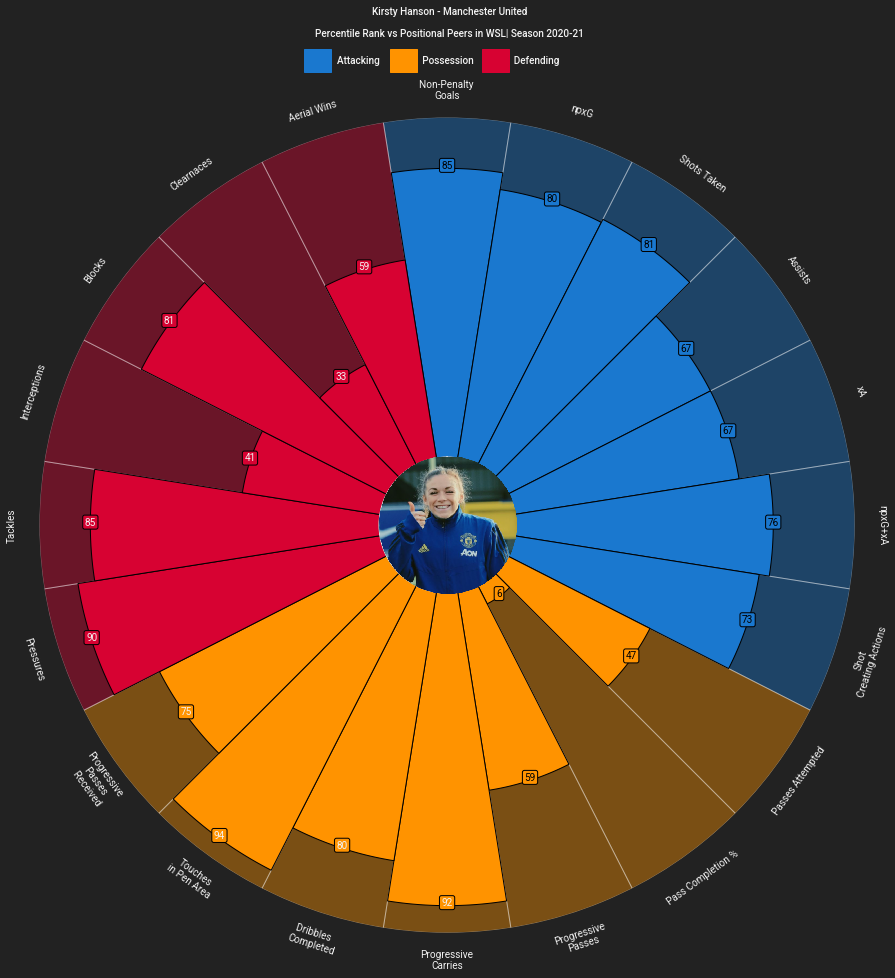

In [9]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [85,80,81,67,67,76,73,47,6,59,92,80,94,75,90,85,41,81,33,59]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Kirsty Hanson - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [10]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [11]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [12]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [13]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [14]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [15]:
kirsty_values =  [0.42,0.17,0.59,0.32,0.19,0.51,0.32]

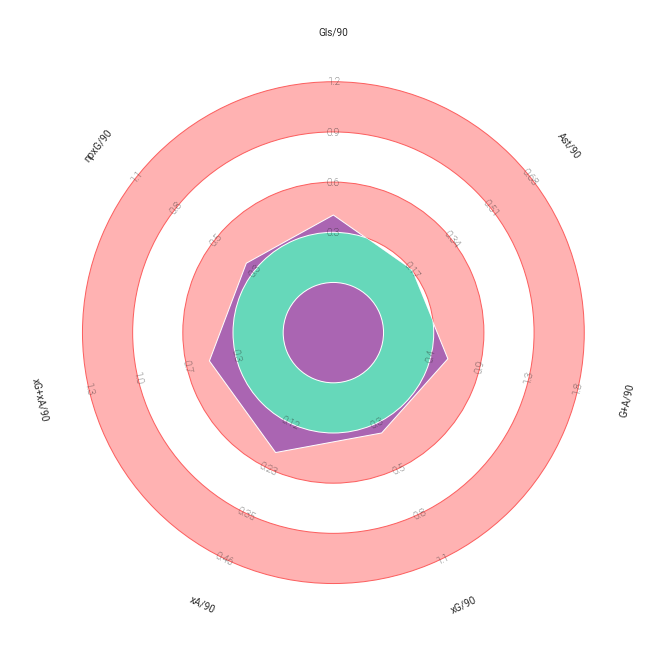

In [16]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(kirsty_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

Text(20    0.445
Name: Gls90, dtype: float64, 20    0.6
Name: GA90, dtype: float64, 'Kirsty Hanson')

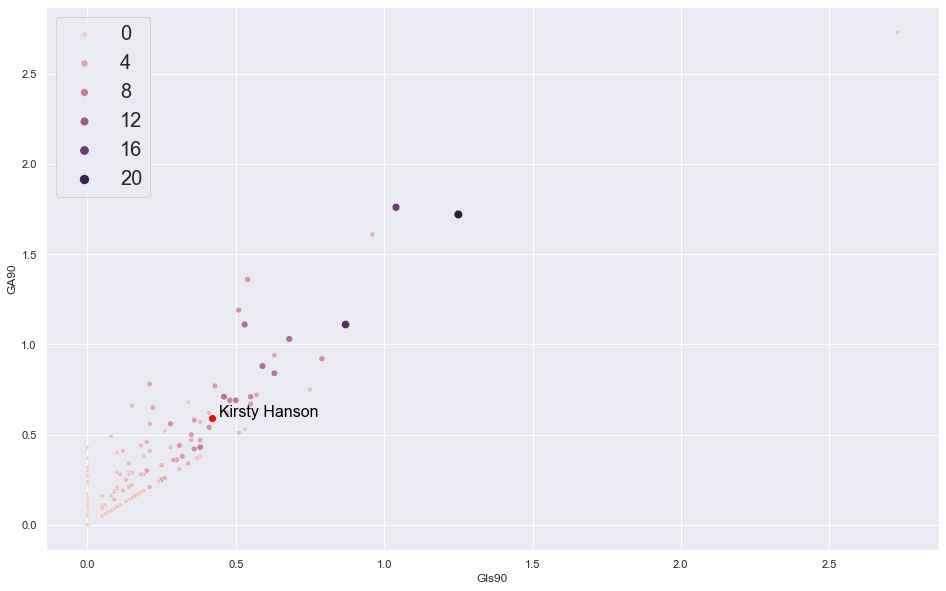

In [17]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls90", y="GA90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.42,0.59, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text
plt.text(df.Gls90[df.Player=='Kirsty Hanson']+0.025,df.GA90[df.Player=='Kirsty Hanson']+0.01,"Kirsty Hanson",fontdict=dict(color='black', alpha=1, size=16))

Text(20    0.34
Name: xG90, dtype: float64, 20    0.52
Name: xGxA90, dtype: float64, 'Kirsty Hanson')

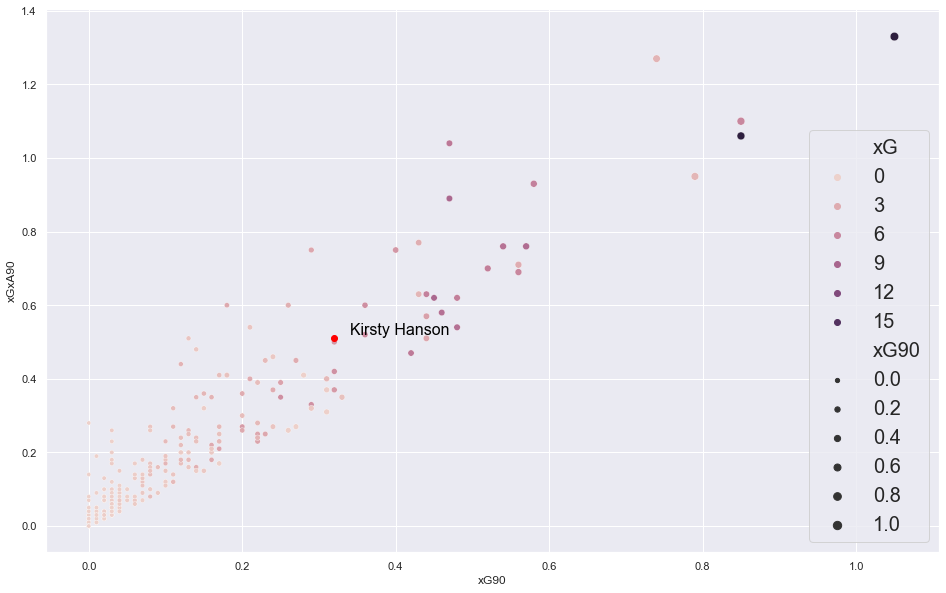

In [18]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG90", y="xGxA90", hue="xG", size="xG90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.32,0.51,color="red")
plt.text(df.xG90[df.Player=='Kirsty Hanson']+0.02,df.xGxA90[df.Player=='Kirsty Hanson']+0.01,"Kirsty Hanson",fontdict=dict(color='black', alpha=1, size=16))

In [19]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL Passing Stats.csv',encoding="latin1")

Text(16    24.5
Name: PPA, dtype: float64, 16    13.01
Name: CrsPA, dtype: float64, 'Kirsty Hanson')

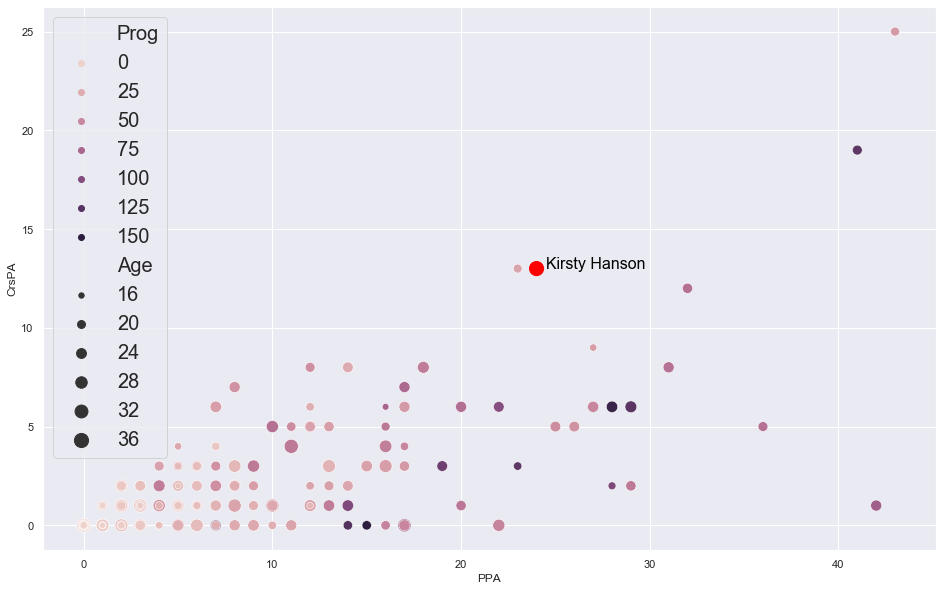

In [20]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="PPA", y="CrsPA", hue="Prog", size="Age",sizes=(20, 200))
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(24,13, color="red",sizes=(200,200))
plt.text(df.PPA[df.Player=='Kirsty Hanson']+0.5,df.CrsPA[df.Player=='Kirsty Hanson']+0.01,"Kirsty Hanson",fontdict=dict(color='black', alpha=1, size=16))

Text(16    34.5
Name: Prog, dtype: float64, 16    1142.01
Name: PrgDist, dtype: float64, 'Kirsty Hanson')

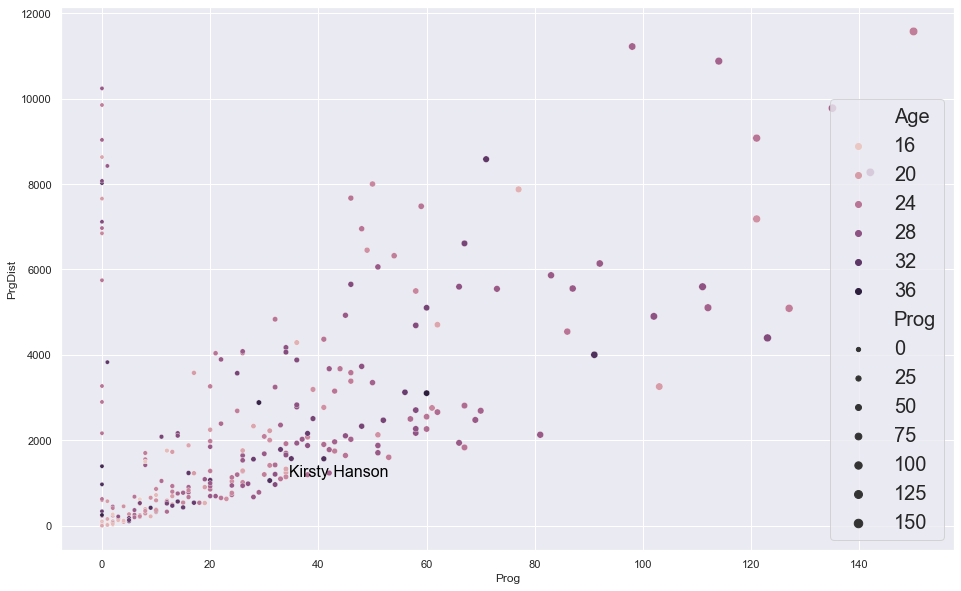

In [21]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Prog", y="PrgDist", hue="Age", size="Prog")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
#plt.scatter(31,8, color="red")
plt.text(df.Prog[df.Player=='Kirsty Hanson']+0.5,df.PrgDist[df.Player=='Kirsty Hanson']+0.01,"Kirsty Hanson",fontdict=dict(color='black', alpha=1, size=16))

In [22]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [23]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [24]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Kirsty Shotmaps.csv',encoding="latin1")

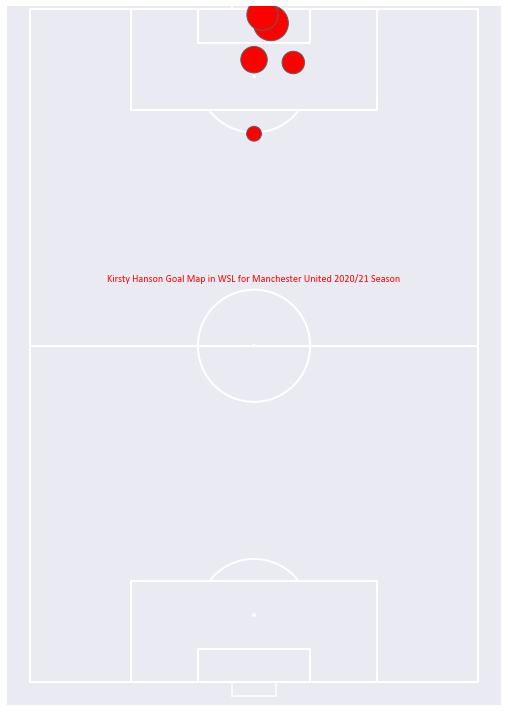

In [25]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Kirsty Hanson Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




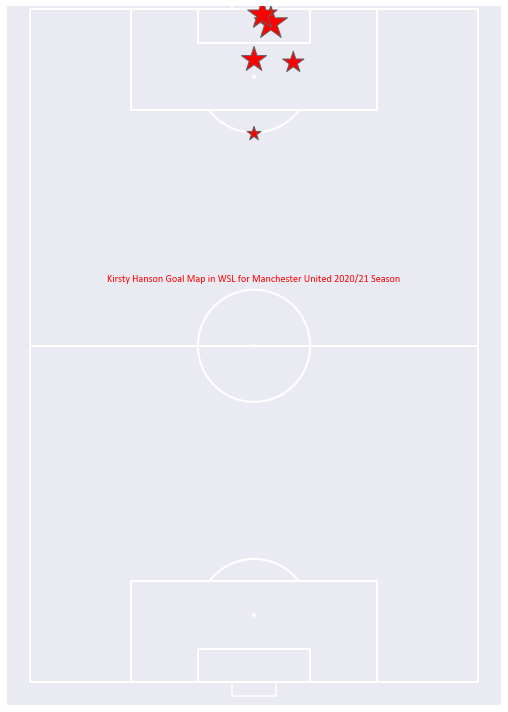

In [26]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='*',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Kirsty Hanson Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




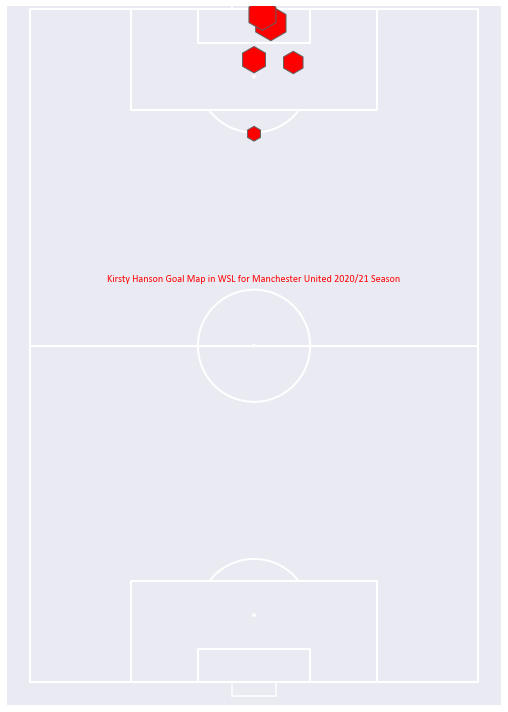

In [27]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='h',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Kirsty Hanson Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




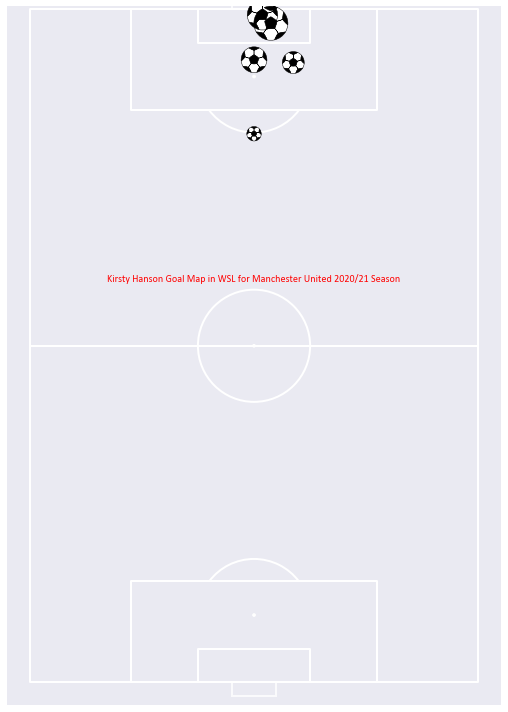

In [32]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='black',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Kirsty Hanson Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


